# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import environmentv1 as e
import seaborn as sns
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

1/3 -- 0.33475494384765625
0.35 -- 0.36702728271484375
0.4 -- 0.47370147705078125
0.45 -- 0.6032638549804688

In [6]:
env = e.Environment(0.45, 9)
from dqn_agent import Agent
agent = Agent(state_size=2, action_size=3, seed=0)

In [7]:
rho = 0.6032638549804688
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    return reward

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

Episode 1	  Score: -1681.79
0.995


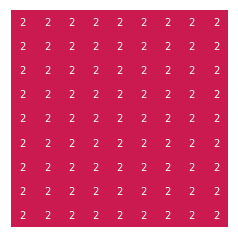

Episode 2	  Score: -1650.17
0.990025


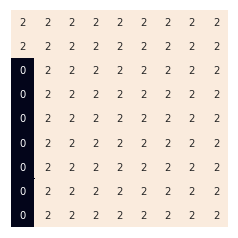

Episode 3	  Score: -1685.91
0.985074875


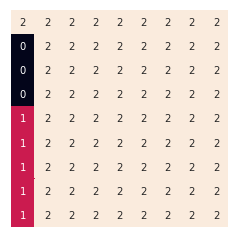

Episode 4	  Score: -1721.26
0.9801495006250001


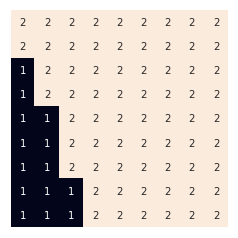

Episode 5	  Score: -1602.45
0.9752487531218751


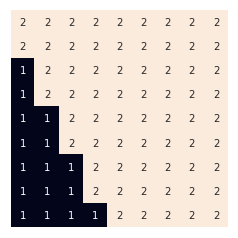

Episode 6	  Score: -1612.08
0.9703725093562657


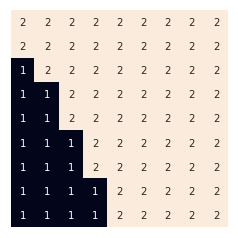

Episode 7	  Score: -1611.94
0.9655206468094844


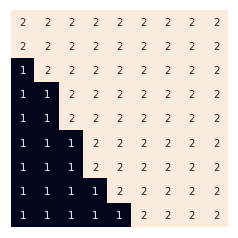

Episode 8	  Score: -1619.23
0.960693043575437


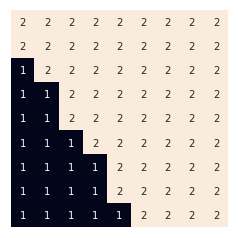

Episode 9	  Score: -1656.37
0.9558895783575597


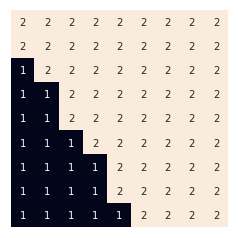

Episode 10	  Score: -1571.22
0.9511101304657719


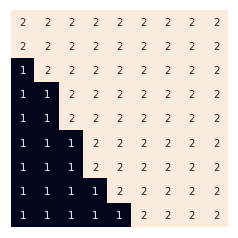

Episode 11	  Score: -1599.20
0.946354579813443


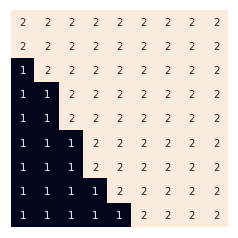

Episode 12	  Score: -1477.65
0.9416228069143757


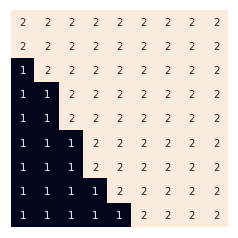

Episode 13	  Score: -1603.43
0.9369146928798039


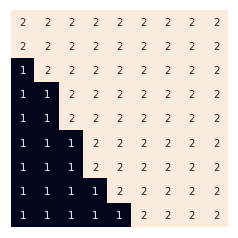

Episode 14	  Score: -1619.35
0.9322301194154049


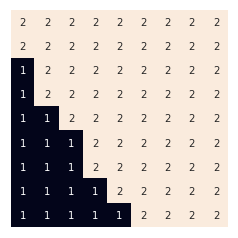

Episode 15	  Score: -1478.01
0.9275689688183278


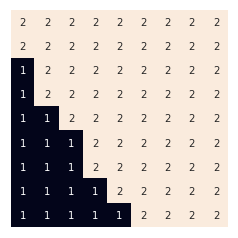

Episode 16	  Score: -1440.05
0.9229311239742362


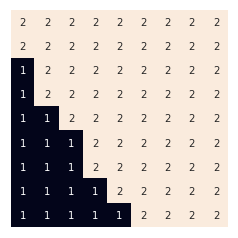

Episode 17	  Score: -1673.83
0.918316468354365


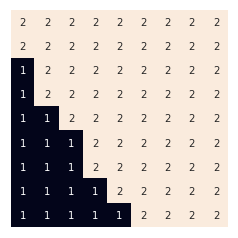

Episode 18	  Score: -1659.69
0.9137248860125932


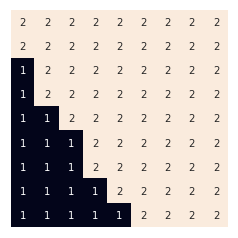

Episode 19	  Score: -1551.09
0.9091562615825302


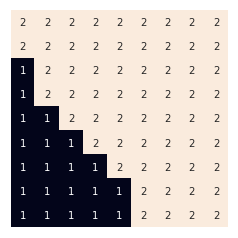

Episode 20	  Score: -1485.43
0.9046104802746175


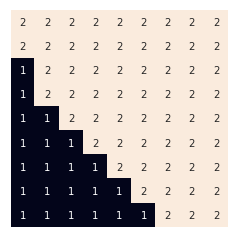

Episode 21	  Score: -1482.54
0.9000874278732445


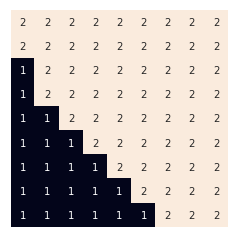

Episode 22	  Score: -1254.74
0.8955869907338783


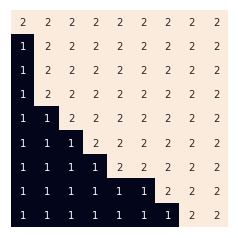

Episode 23	  Score: -1509.24
0.8911090557802088


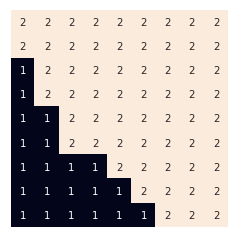

Episode 24	  Score: -1460.19
0.8866535105013078


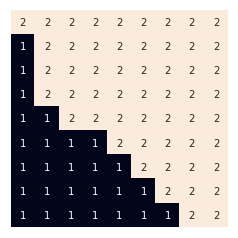

Episode 25	  Score: -1346.46
0.8822202429488013


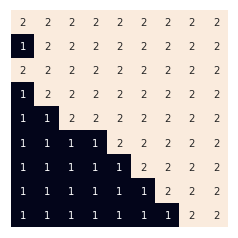

Episode 26	  Score: -1506.31
0.8778091417340573


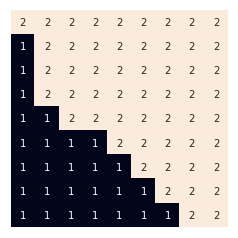

Episode 27	  Score: -1343.76
0.8734200960253871


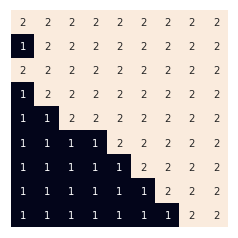

Episode 28	  Score: -1410.50
0.8690529955452602


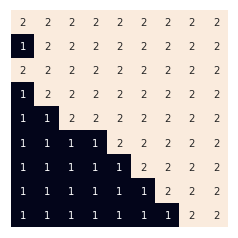

Episode 29	  Score: -1419.53
0.8647077305675338


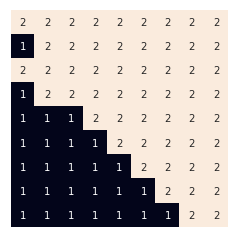

Episode 30	  Score: -1512.26
0.8603841919146962


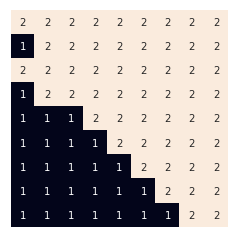

Episode 31	  Score: -1327.75
0.8560822709551227


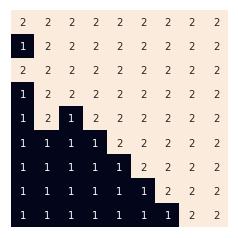

Episode 32	  Score: -1350.89
0.851801859600347


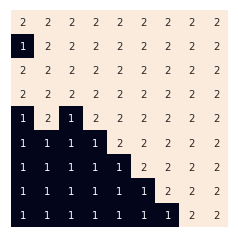

Episode 33	  Score: -1437.07
0.8475428503023453


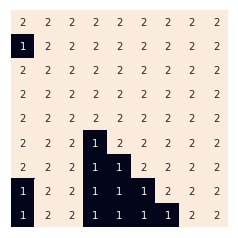

Episode 34	  Score: -1508.04
0.8433051360508336


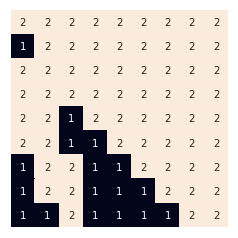

Episode 35	  Score: -1398.12
0.8390886103705794


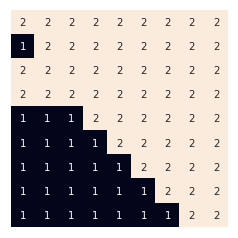

Episode 36	  Score: -1384.46
0.8348931673187264


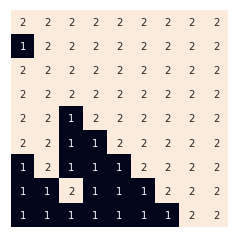

Episode 37	  Score: -1280.20
0.8307187014821328


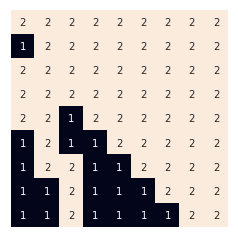

Episode 38	  Score: -1369.37
0.8265651079747222


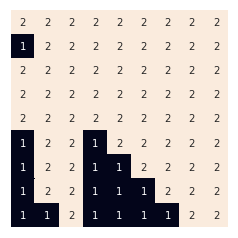

Episode 39	  Score: -1366.84
0.8224322824348486


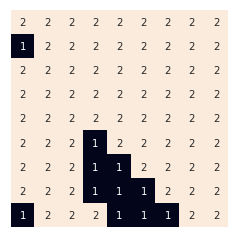

Episode 40	  Score: -1314.52
0.8183201210226743


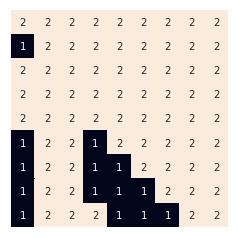

Episode 41	  Score: -1316.58
0.8142285204175609


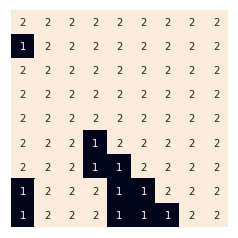

Episode 42	  Score: -1474.59
0.810157377815473


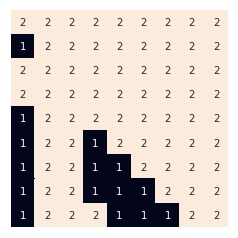

Episode 43	  Score: -1508.50
0.8061065909263957


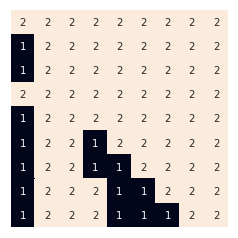

Episode 44	  Score: -1344.43
0.8020760579717637


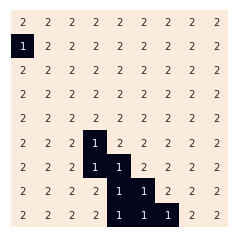

Episode 45	  Score: -1299.99
0.798065677681905


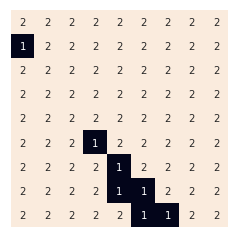

Episode 46	  Score: -1348.97
0.7940753492934954


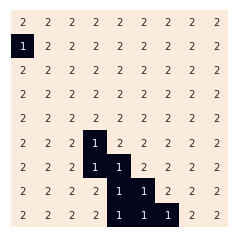

Episode 47	  Score: -1250.56
0.7901049725470279


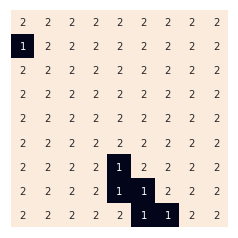

Episode 48	  Score: -1433.68
0.7861544476842928


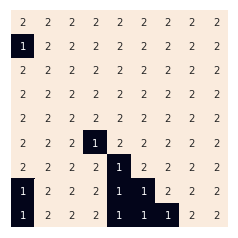

Episode 49	  Score: -1469.62
0.7822236754458713


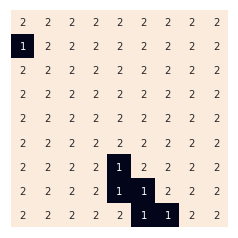

Episode 50	  Score: -1178.46
0.778312557068642


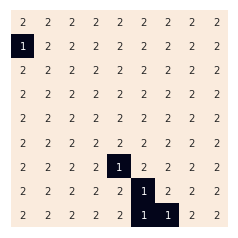

Episode 51	  Score: -1223.94
0.7744209942832988


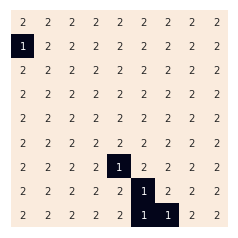

Episode 52	  Score: -1373.60
0.7705488893118823


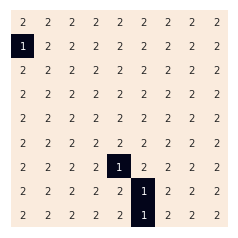

Episode 53	  Score: -1297.02
0.7666961448653229


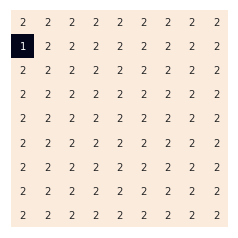

Episode 54	  Score: -1197.57
0.7628626641409962


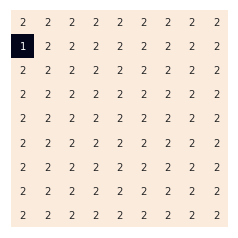

Episode 55	  Score: -1267.55
0.7590483508202912


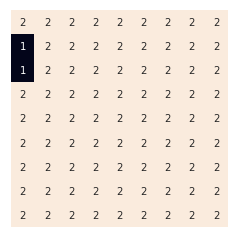

Episode 56	  Score: -1130.11
0.7552531090661897


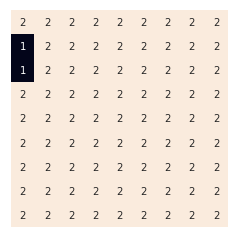

Episode 57	  Score: -1275.45
0.7514768435208588


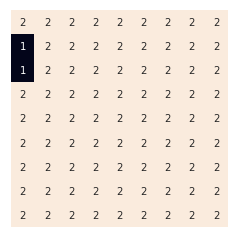

Episode 58	  Score: -1252.41
0.7477194593032545


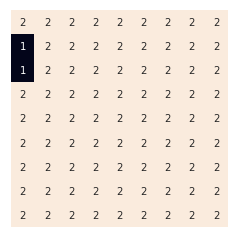

Episode 59	  Score: -1230.92
0.7439808620067382


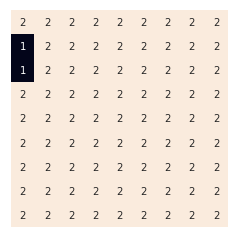

Episode 60	  Score: -1360.18
0.7402609576967045


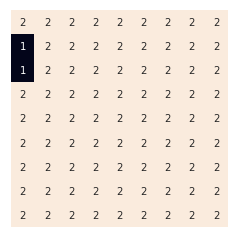

Episode 61	  Score: -1176.40
0.736559652908221


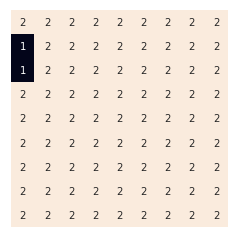

Episode 62	  Score: -1279.74
0.7328768546436799


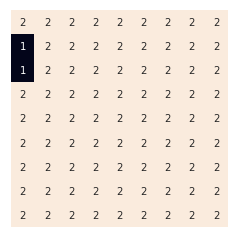

Episode 63	  Score: -1252.97
0.7292124703704616


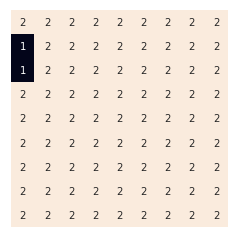

Episode 64	  Score: -1238.25
0.7255664080186093


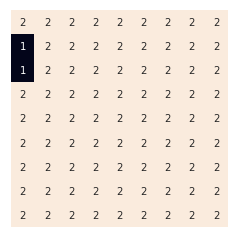

Episode 65	  Score: -1404.45
0.7219385759785162


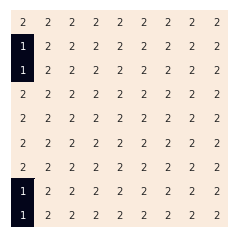

Episode 66	  Score: -1390.93
0.7183288830986236


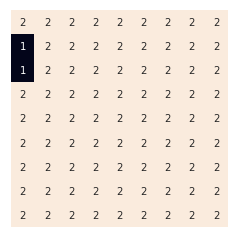

Episode 67	  Score: -1054.04
0.7147372386831305


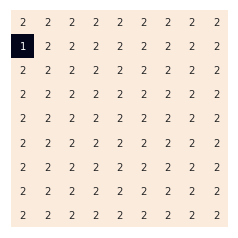

Episode 68	  Score: -1215.96
0.7111635524897149


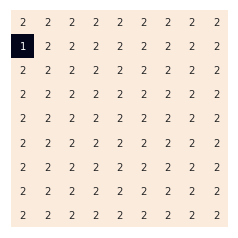

Episode 69	  Score: -1286.58
0.7076077347272662


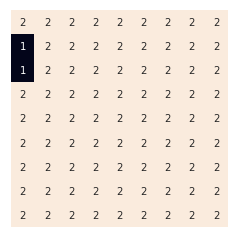

Episode 70	  Score: -1142.72
0.7040696960536299


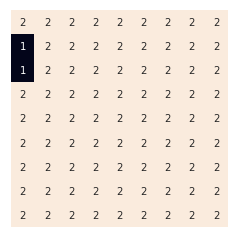

Episode 71	  Score: -1300.68
0.7005493475733617


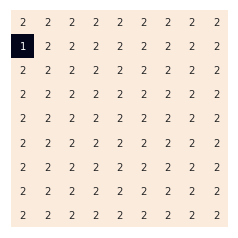

Episode 72	  Score: -1393.32
0.697046600835495


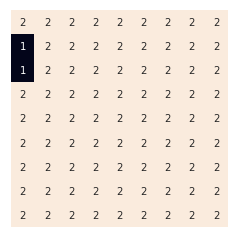

Episode 73	  Score: -1247.24
0.6935613678313175


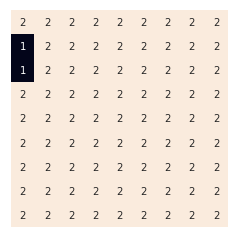

Episode 74	  Score: -1141.89
0.6900935609921609


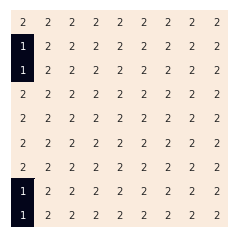

Episode 75	  Score: -1188.47
0.6866430931872001


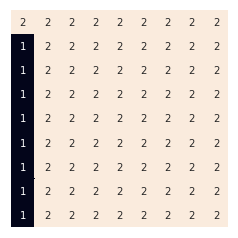

Episode 76	  Score: -1115.63
0.6832098777212641


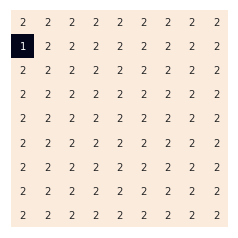

Episode 77	  Score: -1279.63
0.6797938283326578


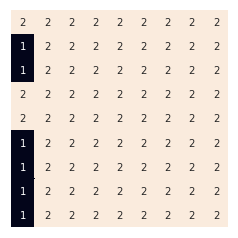

Episode 78	  Score: -1125.83
0.6763948591909945


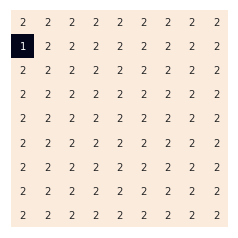

Episode 79	  Score: -1252.65
0.6730128848950395


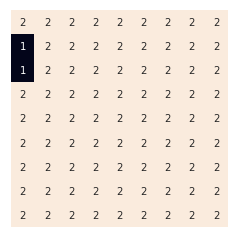

Episode 80	  Score: -1127.81
0.6696478204705644


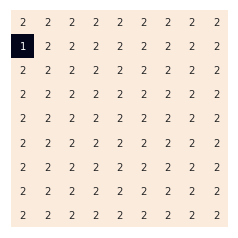

Episode 81	  Score: -1152.64
0.6662995813682115


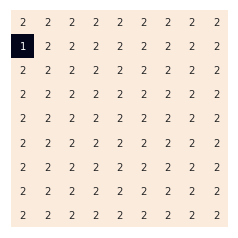

Episode 82	  Score: -1100.27
0.6629680834613705


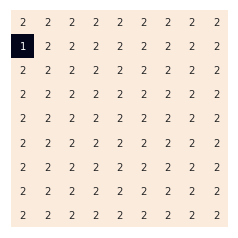

Episode 83	  Score: -1118.63
0.6596532430440636


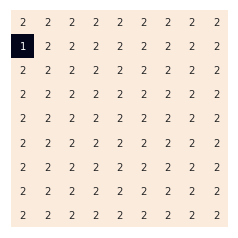

Episode 84	  Score: -1150.70
0.6563549768288433


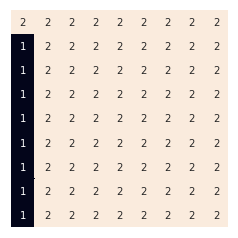

Episode 85	  Score: -1161.73
0.653073201944699


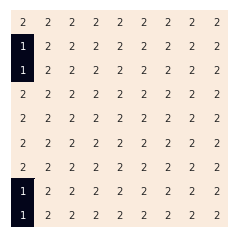

Episode 86	  Score: -1173.07
0.6498078359349755


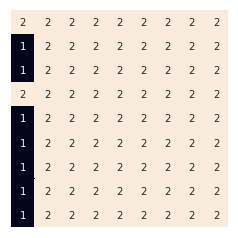

Episode 87	  Score: -1122.25
0.6465587967553006


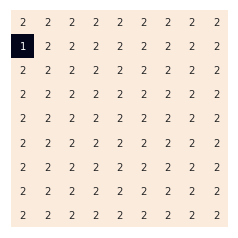

Episode 88	  Score: -1005.14
0.6433260027715241


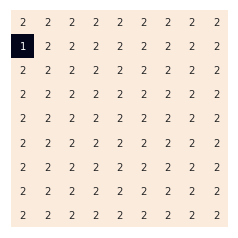

Episode 89	  Score: -1118.35
0.6401093727576664


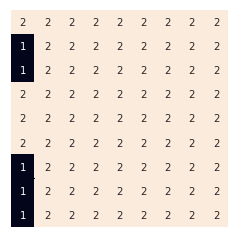

Episode 90	  Score: -995.76
0.6369088258938781


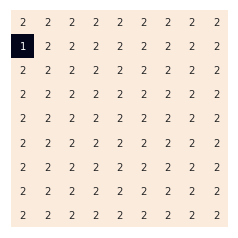

Episode 91	  Score: -1058.78
0.6337242817644086


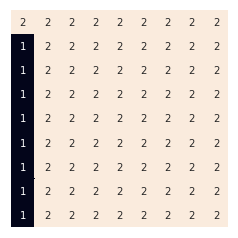

Episode 92	  Score: -1151.54
0.6305556603555866


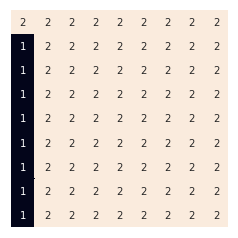

Episode 93	  Score: -1207.87
0.6274028820538087


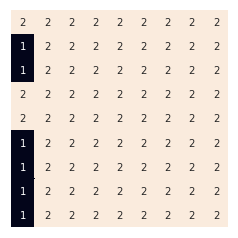

Episode 94	  Score: -1072.59
0.6242658676435396


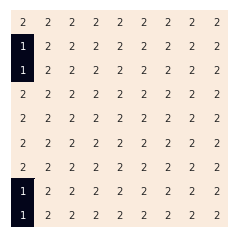

Episode 95	  Score: -1201.13
0.6211445383053219


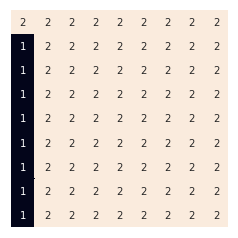

Episode 96	  Score: -1033.07
0.6180388156137953


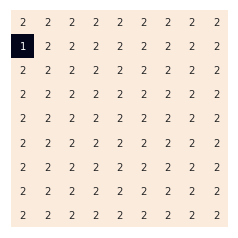

Episode 97	  Score: -1059.92
0.6149486215357263


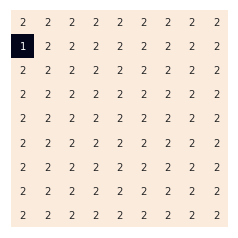

Episode 98	  Score: -1047.53
0.6118738784280476


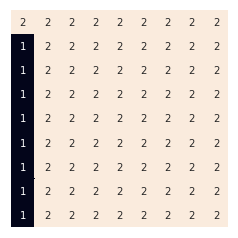

Episode 99	  Score: -1129.37
0.6088145090359074


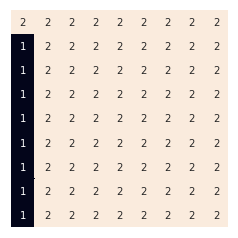

Episode 100	  Score: -1122.98
0.6057704364907278


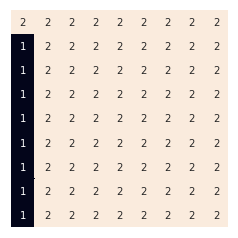

Episode 101	  Score: -1097.85
0.6027415843082742


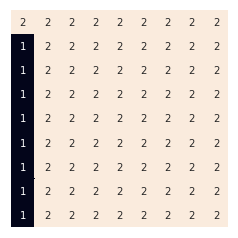

Episode 102	  Score: -1057.40
0.5997278763867329


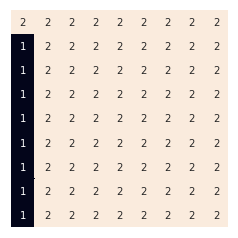

Episode 103	  Score: -982.63
0.5967292370047992


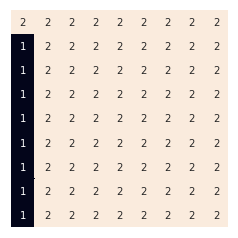

Episode 104	  Score: -972.69
0.5937455908197752


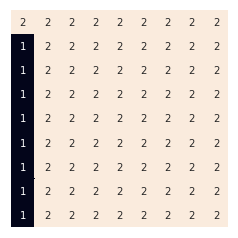

Episode 105	  Score: -1138.03
0.5907768628656763


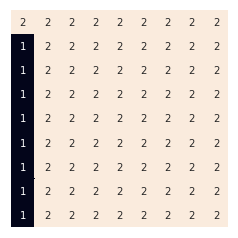

Episode 106	  Score: -865.22
0.5878229785513479


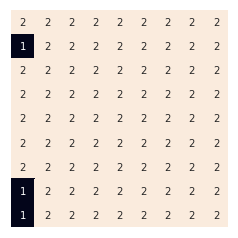

Episode 107	  Score: -1135.71
0.5848838636585911


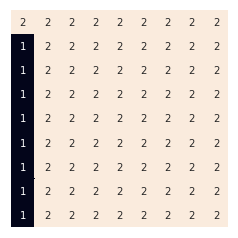

Episode 108	  Score: -1123.30
0.5819594443402982


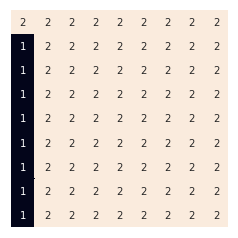

Episode 109	  Score: -1078.02
0.5790496471185967


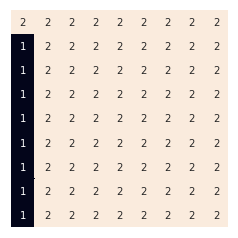

Episode 110	  Score: -1041.88
0.5761543988830038


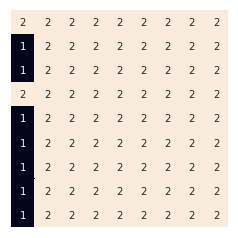

Episode 111	  Score: -904.24
0.5732736268885887


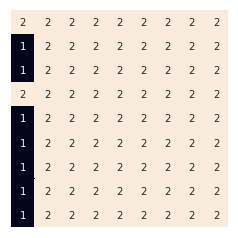

Episode 112	  Score: -1117.13
0.5704072587541458


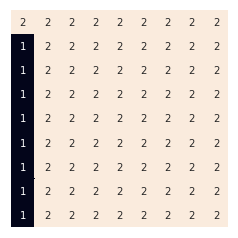

Episode 113	  Score: -946.01
0.567555222460375


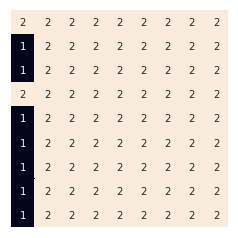

Episode 114	  Score: -934.05
0.5647174463480732


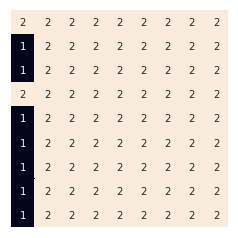

Episode 115	  Score: -922.21
0.5618938591163328


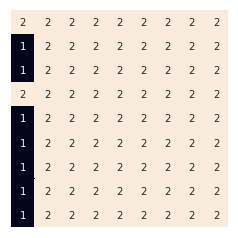

Episode 116	  Score: -1070.25
0.5590843898207511


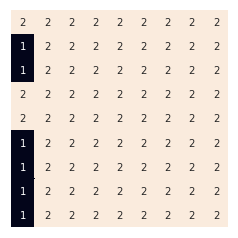

Episode 117	  Score: -959.83
0.5562889678716474


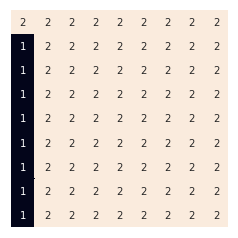

Episode 118	  Score: -929.29
0.5535075230322891


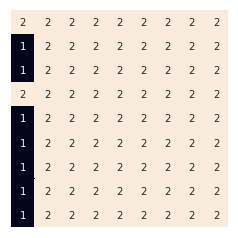

Episode 119	  Score: -941.08
0.5507399854171277


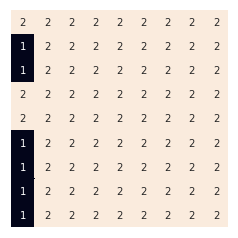

Episode 120	  Score: -892.26
0.547986285490042


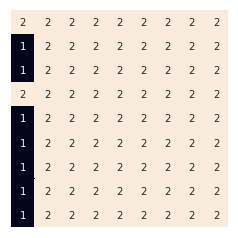

Episode 121	  Score: -951.83
0.5452463540625918


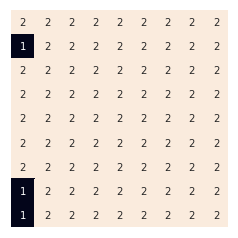

Episode 122	  Score: -956.69
0.5425201222922789


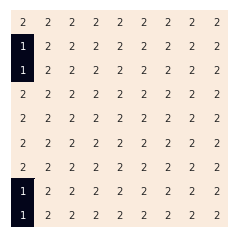

Episode 123	  Score: -947.93
0.5398075216808175


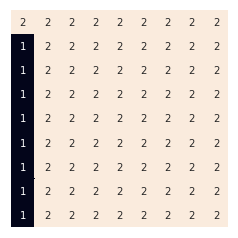

Episode 124	  Score: -951.23
0.5371084840724134


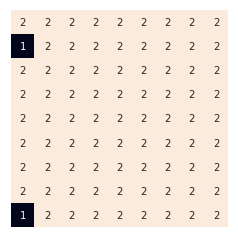

Episode 125	  Score: -974.63
0.5344229416520513


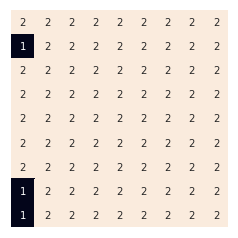

Episode 126	  Score: -1018.95
0.531750826943791


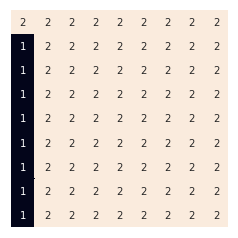

Episode 127	  Score: -1018.19
0.5290920728090721


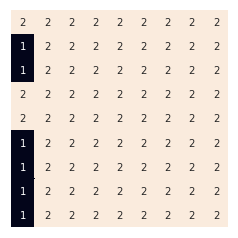

Episode 128	  Score: -966.15
0.5264466124450268


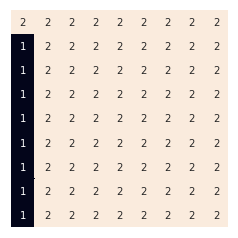

Episode 129	  Score: -966.48
0.5238143793828016


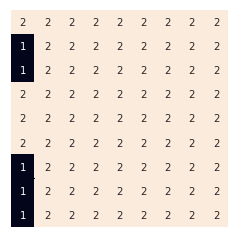

Episode 130	  Score: -902.60
0.5211953074858876


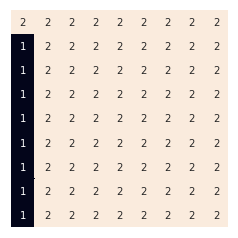

Episode 131	  Score: -1081.13
0.5185893309484582


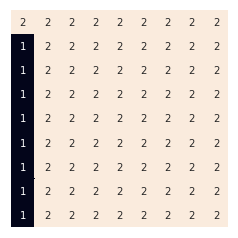

Episode 132	  Score: -999.95
0.5159963842937159


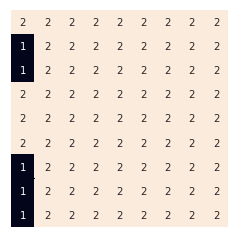

Episode 133	  Score: -894.79
0.5134164023722473


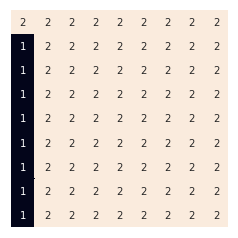

Episode 134	  Score: -946.56
0.510849320360386


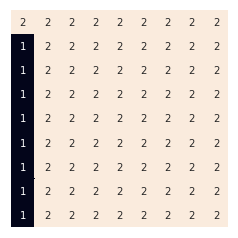

Episode 135	  Score: -976.91
0.5082950737585841


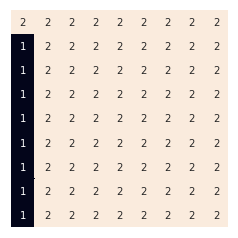

Episode 136	  Score: -927.35
0.5057535983897912


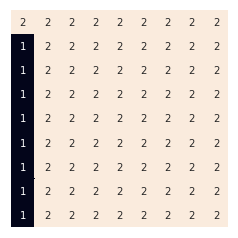

Episode 137	  Score: -1043.02
0.5032248303978422


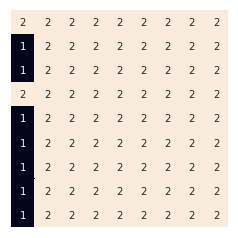

Episode 138	  Score: -839.23
0.500708706245853


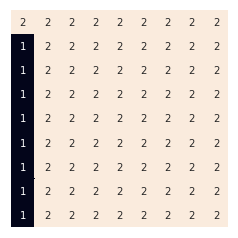

Episode 139	  Score: -955.86
0.4982051627146237


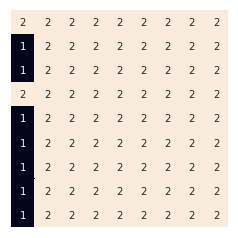

Episode 140	  Score: -967.69
0.49571413690105054


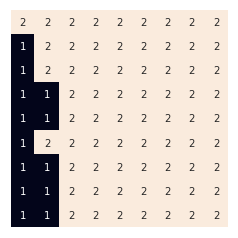

Episode 141	  Score: -922.83
0.4932355662165453


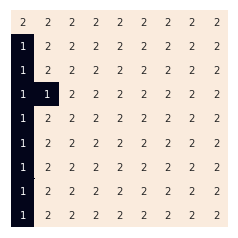

Episode 142	  Score: -950.16
0.4907693883854626


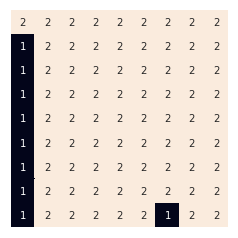

Episode 143	  Score: -1015.68
0.4883155414435353


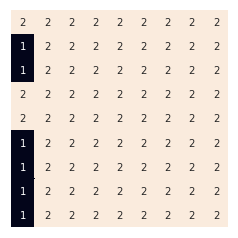

Episode 144	  Score: -751.91
0.4858739637363176


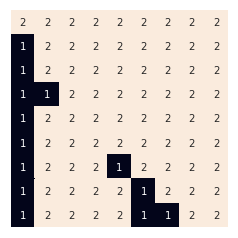

Episode 145	  Score: -923.73
0.483444593917636


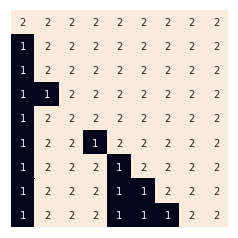

Episode 146	  Score: -1072.40
0.4810273709480478


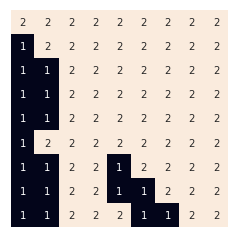

Episode 147	  Score: -778.70
0.47862223409330756


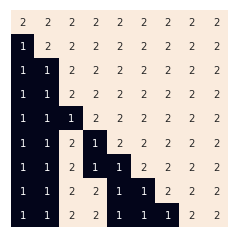

Episode 148	  Score: -837.30
0.47622912292284103


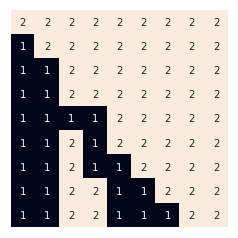

Episode 149	  Score: -911.96
0.4738479773082268


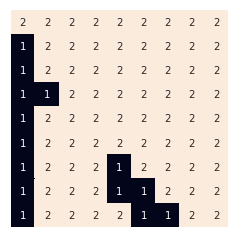

Episode 150	  Score: -920.18
0.47147873742168567


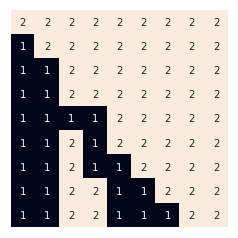

Episode 151	  Score: -873.87
0.46912134373457726


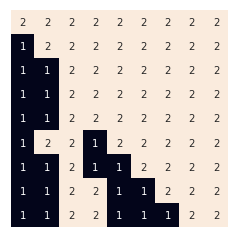

Episode 152	  Score: -830.76
0.46677573701590436


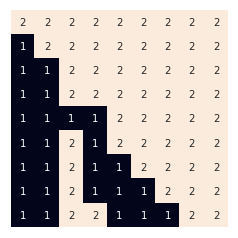

Episode 153	  Score: -818.32
0.46444185833082485


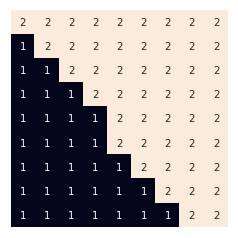

Episode 154	  Score: -796.86
0.46211964903917074


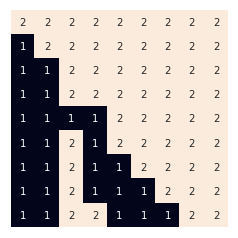

Episode 155	  Score: -839.98
0.4598090507939749


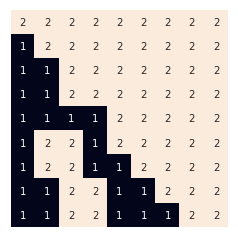

Episode 156	  Score: -888.86
0.457510005540005


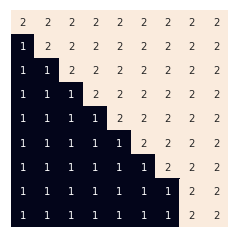

Episode 157	  Score: -778.34
0.45522245551230495


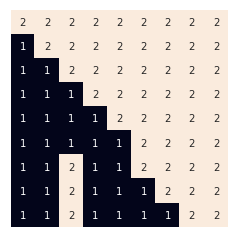

Episode 158	  Score: -772.54
0.4529463432347434


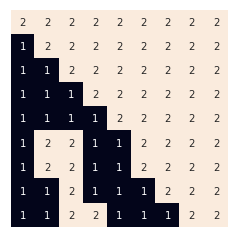

Episode 159	  Score: -926.88
0.4506816115185697


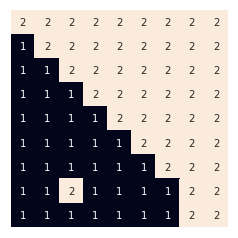

Episode 160	  Score: -817.24
0.4484282034609769


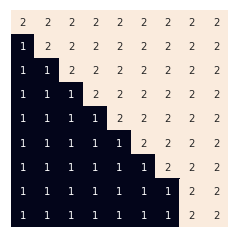

Episode 161	  Score: -871.98
0.446186062443672


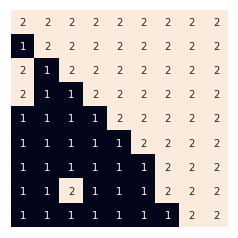

Episode 162	  Score: -805.66
0.4439551321314536


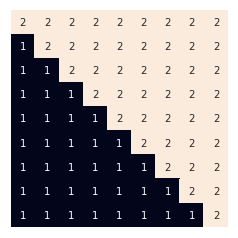

Episode 163	  Score: -817.17
0.4417353564707963


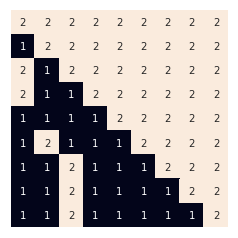

Episode 164	  Score: -900.11
0.43952667968844233


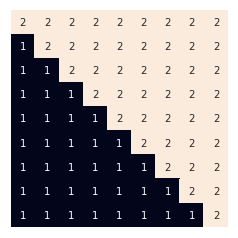

Episode 165	  Score: -717.96
0.43732904629000013


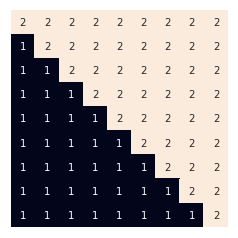

Episode 166	  Score: -816.41
0.4351424010585501


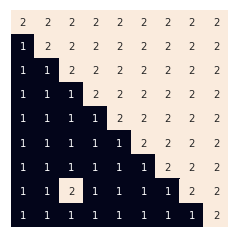

Episode 167	  Score: -691.90
0.43296668905325736


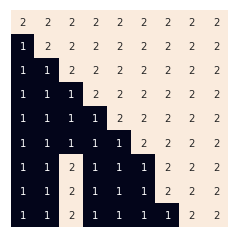

Episode 168	  Score: -745.25
0.43080185560799106


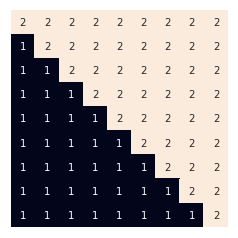

Episode 169	  Score: -729.58
0.4286478463299511


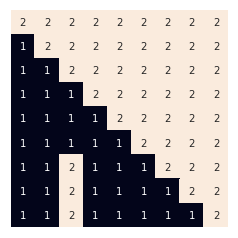

Episode 170	  Score: -864.85
0.42650460709830135


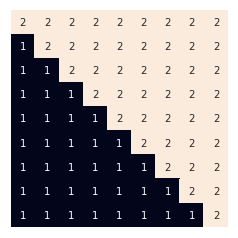

Episode 171	  Score: -831.10
0.42437208406280985


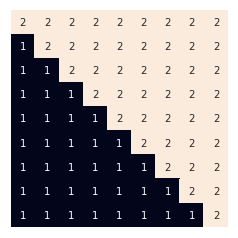

Episode 172	  Score: -748.60
0.4222502236424958


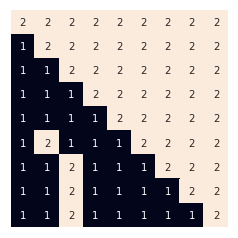

Episode 173	  Score: -765.48
0.42013897252428334


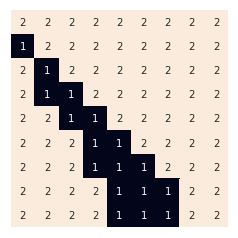

Episode 174	  Score: -798.58
0.4180382776616619


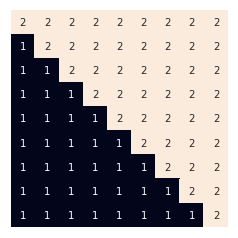

Episode 175	  Score: -800.74
0.4159480862733536


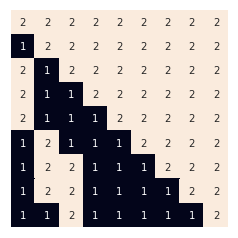

Episode 176	  Score: -813.25
0.41386834584198684


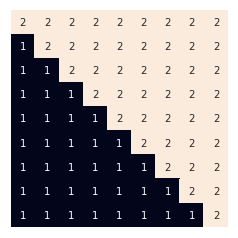

Episode 177	  Score: -805.09
0.4117990041127769


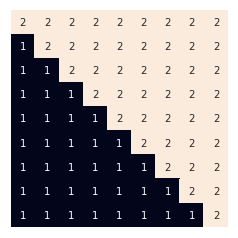

Episode 178	  Score: -727.49
0.40974000909221303


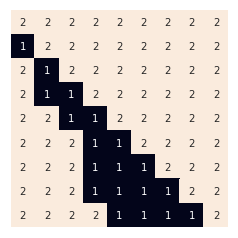

Episode 179	  Score: -646.02
0.40769130904675194


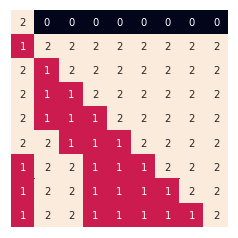

Episode 180	  Score: -749.45
0.40565285250151817


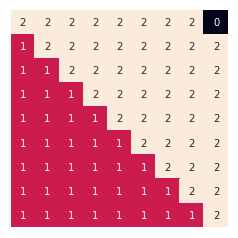

Episode 181	  Score: -654.37
0.4036245882390106


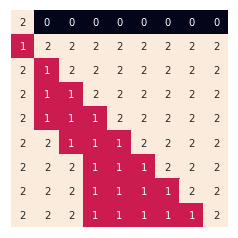

Episode 182	  Score: -743.46
0.4016064652978155


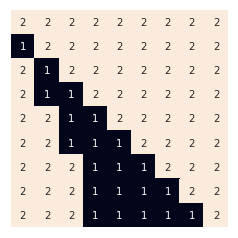

Episode 183	  Score: -769.03
0.3995984329713264


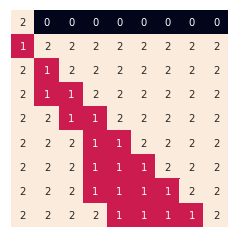

Episode 184	  Score: -707.65
0.3976004408064698


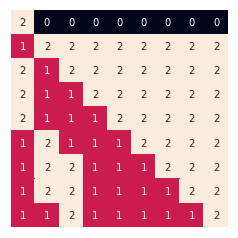

Episode 185	  Score: -606.45
0.39561243860243744


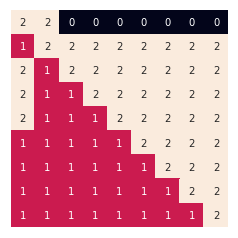

Episode 186	  Score: -658.08
0.3936343764094253


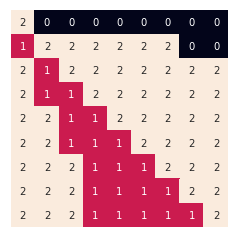

Episode 187	  Score: -507.17
0.39166620452737816


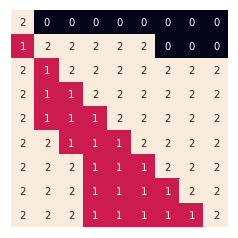

Episode 188	  Score: -590.13
0.3897078735047413


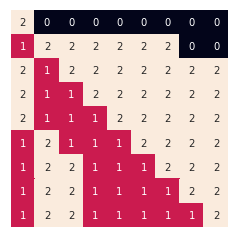

Episode 189	  Score: -647.10
0.3877593341372176


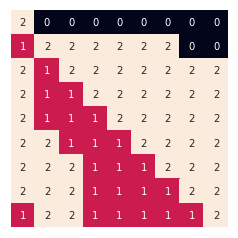

Episode 190	  Score: -610.34
0.3858205374665315


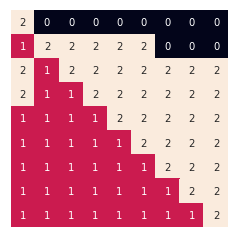

Episode 191	  Score: -594.51
0.38389143477919885


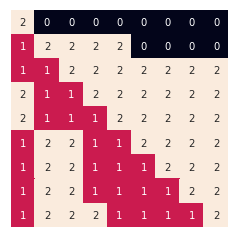

Episode 192	  Score: -612.09
0.3819719776053028


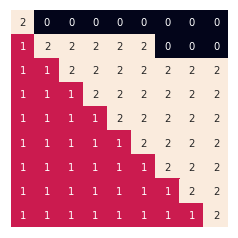

Episode 193	  Score: -526.17
0.3800621177172763


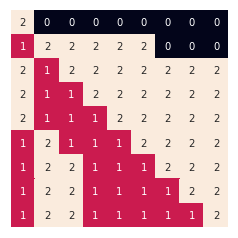

Episode 194	  Score: -599.73
0.37816180712868996


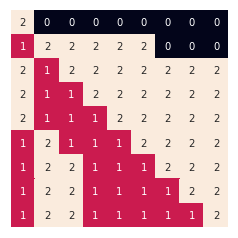

Episode 195	  Score: -547.87
0.37627099809304654


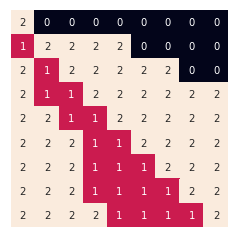

Episode 196	  Score: -600.23
0.3743896431025813


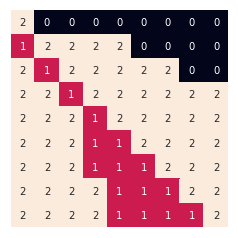

Episode 197	  Score: -554.49
0.37251769488706843


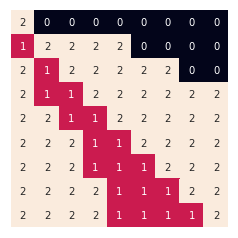

Episode 198	  Score: -595.29
0.3706551064126331


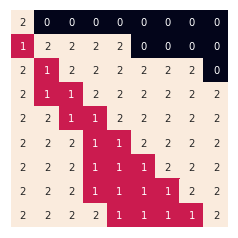

Episode 199	  Score: -478.35
0.36880183088056995


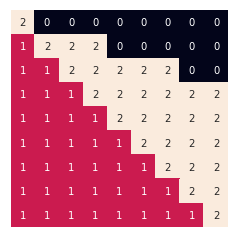

Episode 200	  Score: -509.25
0.3669578217261671


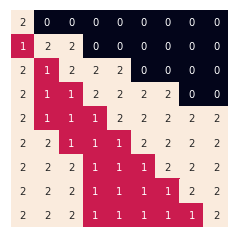

Episode 201	  Score: -533.00
0.36512303261753626


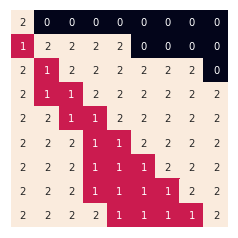

Episode 202	  Score: -552.46
0.3632974174544486


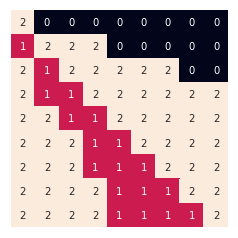

Episode 203	  Score: -667.38
0.3614809303671764


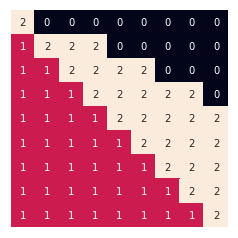

Episode 204	  Score: -620.50
0.3596735257153405


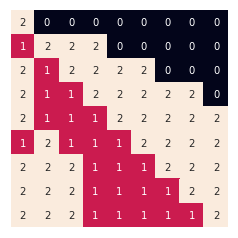

Episode 205	  Score: -534.64
0.3578751580867638


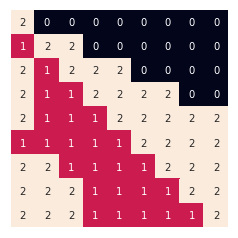

Episode 206	  Score: -543.24
0.35608578229633


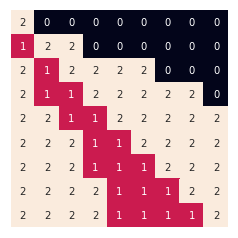

Episode 207	  Score: -574.86
0.3543053533848483


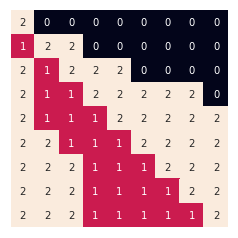

Episode 208	  Score: -573.52
0.35253382661792404


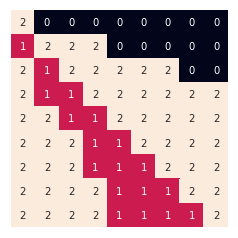

Episode 209	  Score: -544.20
0.3507711574848344


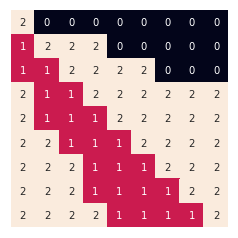

Episode 210	  Score: -629.99
0.34901730169741024


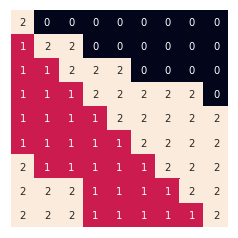

Episode 211	  Score: -502.10
0.3472722151889232


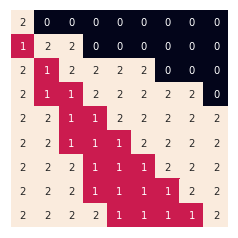

Episode 212	  Score: -514.60
0.3455358541129786


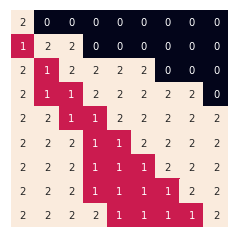

Episode 213	  Score: -482.01
0.3438081748424137


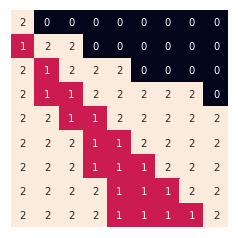

Episode 214	  Score: -470.55
0.3420891339682016


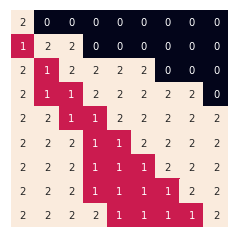

Episode 215	  Score: -533.75
0.3403786882983606


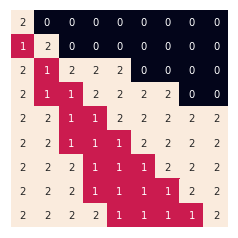

Episode 216	  Score: -469.90
0.3386767948568688


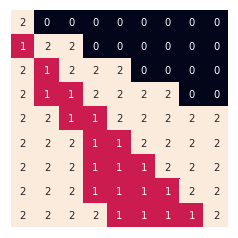

Episode 217	  Score: -572.10
0.33698341088258443


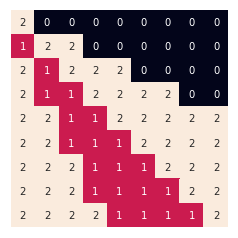

Episode 218	  Score: -499.92
0.3352984938281715


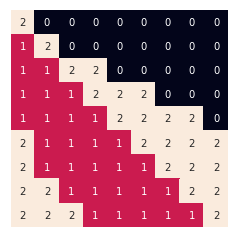

Episode 219	  Score: -456.90
0.33362200135903064


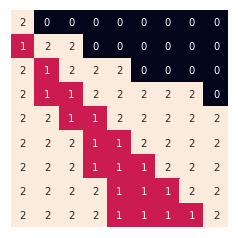

Episode 220	  Score: -532.13
0.33195389135223546


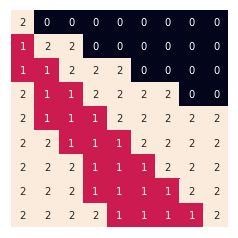

Episode 221	  Score: -552.20
0.3302941218954743


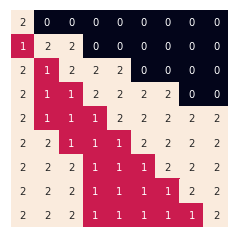

Episode 222	  Score: -504.95
0.32864265128599696


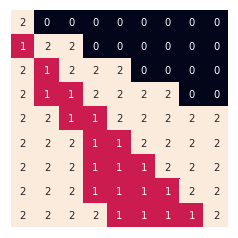

Episode 223	  Score: -501.34
0.326999438029567


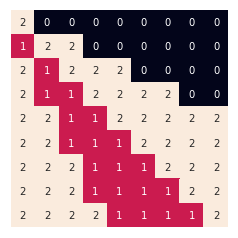

Episode 224	  Score: -529.35
0.3253644408394192


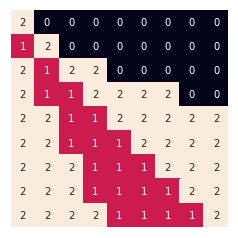

Episode 225	  Score: -449.30
0.3237376186352221


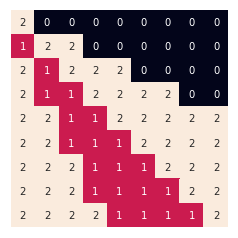

Episode 226	  Score: -398.35
0.322118930542046


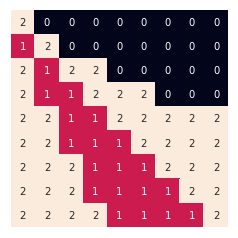

Episode 227	  Score: -611.68
0.32050833588933575


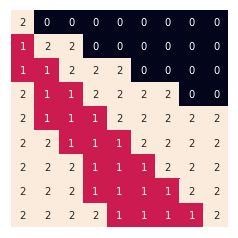

Episode 228	  Score: -494.30
0.31890579420988907


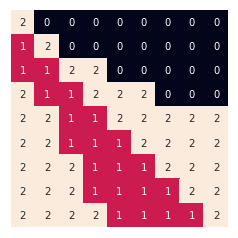

Episode 229	  Score: -553.80
0.3173112652388396


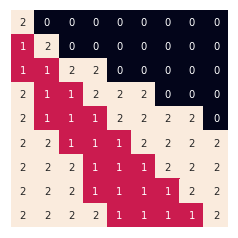

Episode 230	  Score: -443.98
0.3157247089126454


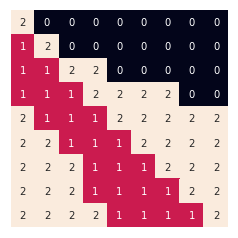

Episode 231	  Score: -545.99
0.3141460853680822


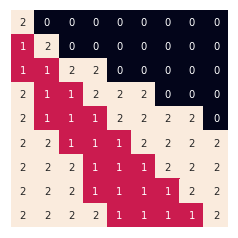

Episode 232	  Score: -613.84
0.3125753549412418


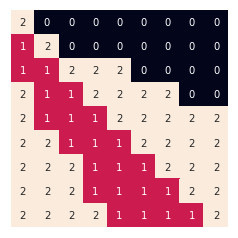

Episode 233	  Score: -502.13
0.31101247816653554


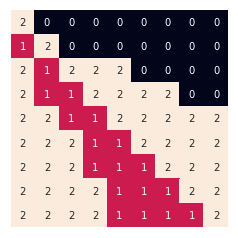

Episode 234	  Score: -487.28
0.30945741577570285


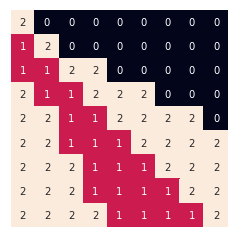

Episode 235	  Score: -467.83
0.3079101286968243


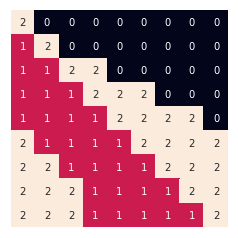

Episode 236	  Score: -524.32
0.3063705780533402


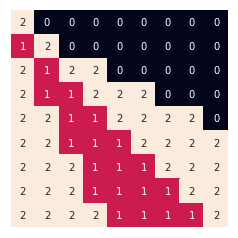

Episode 237	  Score: -417.48
0.30483872516307353


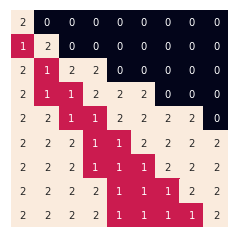

Episode 238	  Score: -502.16
0.3033145315372582


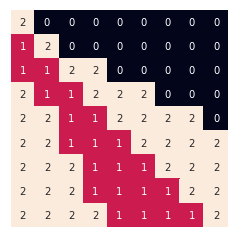

Episode 239	  Score: -402.58
0.3017979588795719


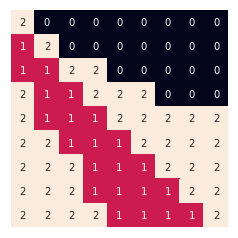

Episode 240	  Score: -479.52
0.30028896908517405


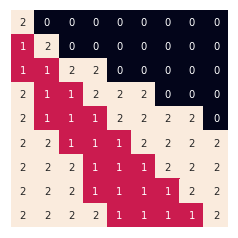

Episode 241	  Score: -460.94
0.2987875242397482


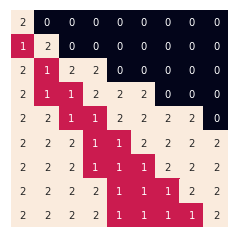

Episode 242	  Score: -550.85
0.29729358661854943


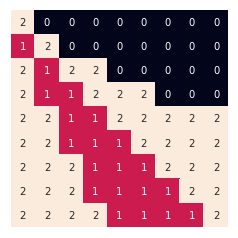

Episode 243	  Score: -427.85
0.29580711868545667


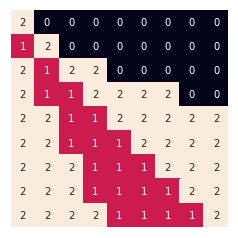

Episode 244	  Score: -478.98
0.2943280830920294


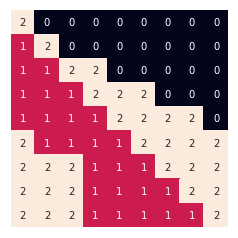

Episode 245	  Score: -477.31
0.29285644267656924


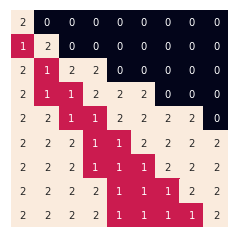

Episode 246	  Score: -436.44
0.2913921604631864


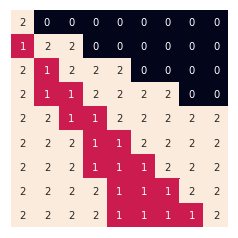

Episode 247	  Score: -503.56
0.28993519966087045


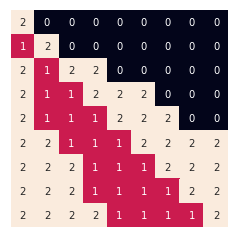

Episode 248	  Score: -429.26
0.2884855236625661


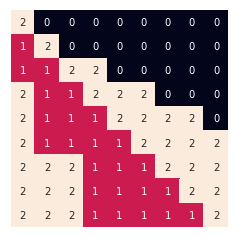

Episode 249	  Score: -462.68
0.28704309604425327


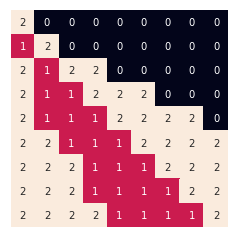

Episode 250	  Score: -462.44
0.285607880564032


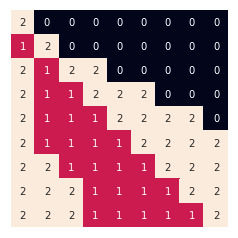

Episode 251	  Score: -478.98
0.28417984116121187


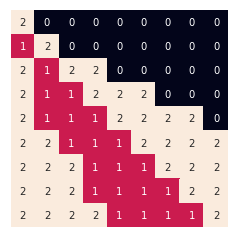

Episode 252	  Score: -431.63
0.2827589419554058


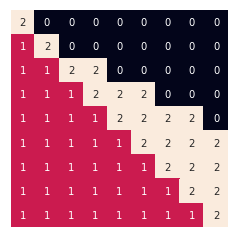

Episode 253	  Score: -446.53
0.28134514724562876


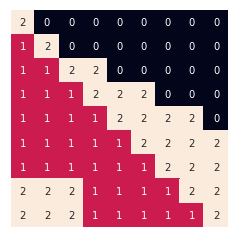

Episode 254	  Score: -458.19
0.2799384215094006


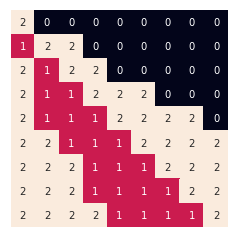

Episode 255	  Score: -412.96
0.27853872940185365


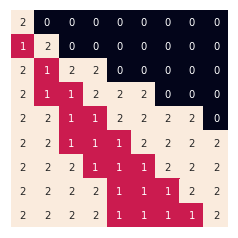

Episode 256	  Score: -426.12
0.27714603575484437


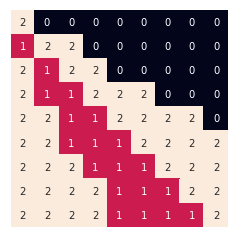

Episode 257	  Score: -404.87
0.2757603055760701


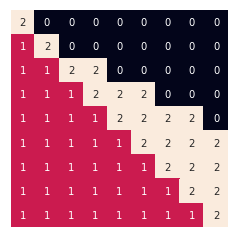

Episode 258	  Score: -484.34
0.2743815040481898


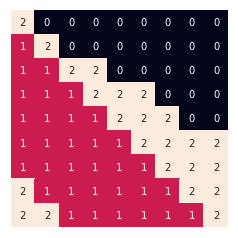

Episode 259	  Score: -457.81
0.2730095965279488


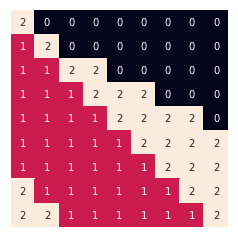

Episode 260	  Score: -479.34
0.27164454854530906


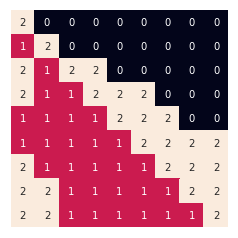

Episode 261	  Score: -381.20
0.2702863258025825


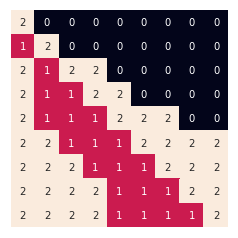

Episode 262	  Score: -325.25
0.2689348941735696


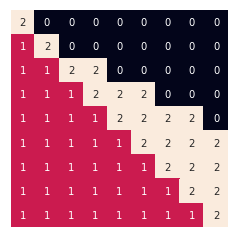

Episode 263	  Score: -485.62
0.26759021970270175


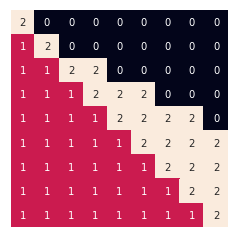

Episode 264	  Score: -376.37
0.2662522686041882


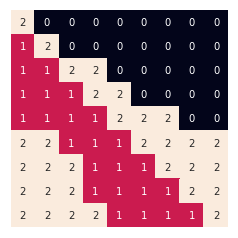

Episode 265	  Score: -375.18
0.2649210072611673


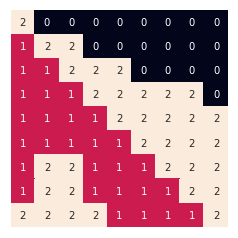

Episode 266	  Score: -468.87
0.26359640222486147


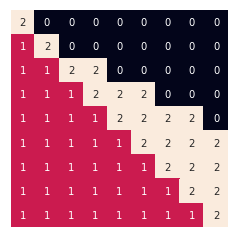

Episode 267	  Score: -367.09
0.26227842021373715


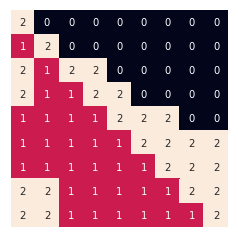

Episode 268	  Score: -388.61
0.2609670281126685


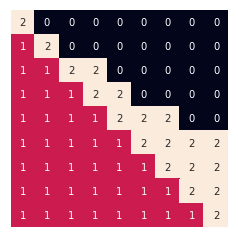

Episode 269	  Score: -433.22
0.25966219297210513


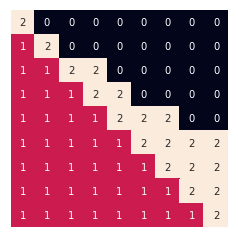

Episode 270	  Score: -345.87
0.2583638820072446


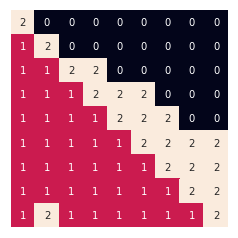

Episode 271	  Score: -380.05
0.2570720625972084


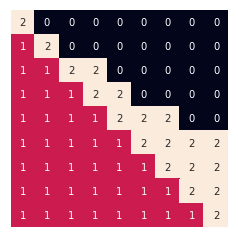

Episode 272	  Score: -383.23
0.25578670228422234


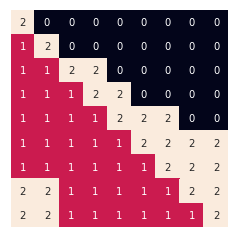

Episode 273	  Score: -391.67
0.25450776877280124


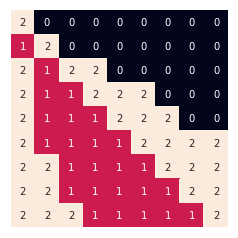

Episode 274	  Score: -384.56
0.2532352299289372


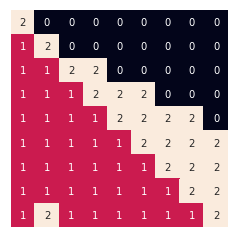

Episode 275	  Score: -399.07
0.2519690537792925


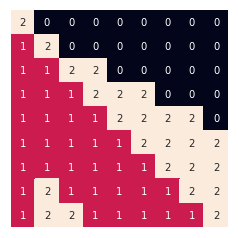

Episode 276	  Score: -388.09
0.2507092085103961


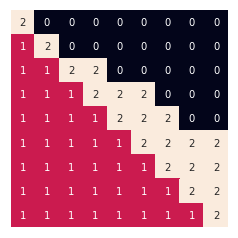

Episode 277	  Score: -340.72
0.2494556624678441


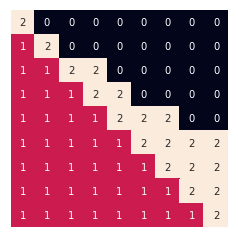

Episode 278	  Score: -455.54
0.24820838415550486


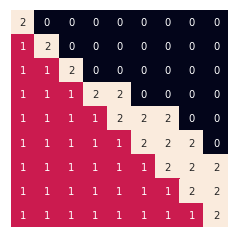

Episode 279	  Score: -337.34
0.24696734223472733


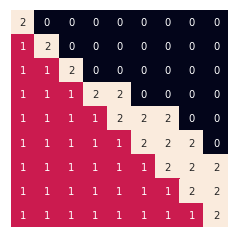

Episode 280	  Score: -374.88
0.2457325055235537


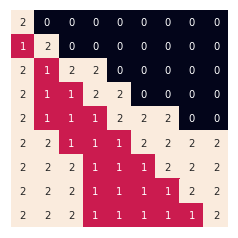

Episode 281	  Score: -344.57
0.24450384299593592


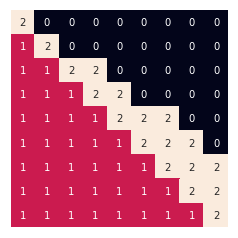

Episode 282	  Score: -297.65
0.24328132378095624


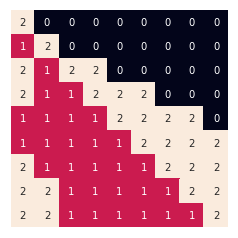

Episode 283	  Score: -320.56
0.24206491716205145


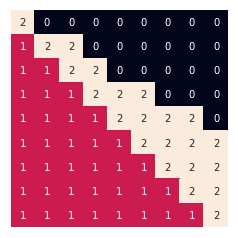

Episode 284	  Score: -414.85
0.2408545925762412


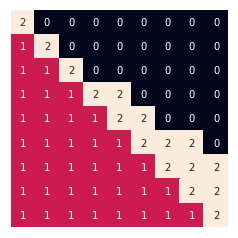

Episode 285	  Score: -482.41
0.23965031961336


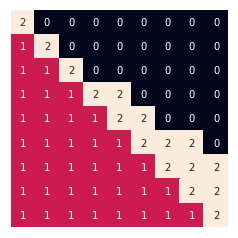

Episode 286	  Score: -449.81
0.2384520680152932


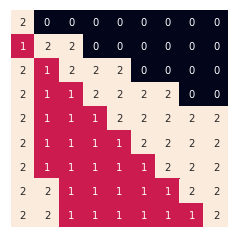

Episode 287	  Score: -477.84
0.23725980767521673


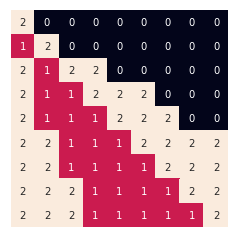

Episode 288	  Score: -331.14
0.23607350863684065


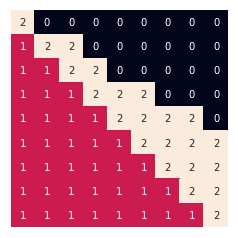

Episode 289	  Score: -345.29
0.23489314109365644


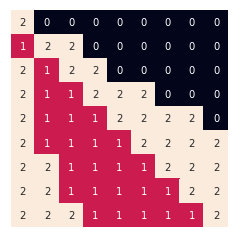

Episode 290	  Score: -363.26
0.23371867538818816


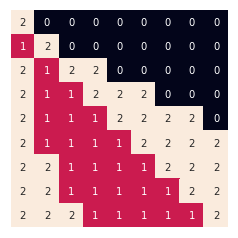

Episode 291	  Score: -337.89
0.23255008201124722


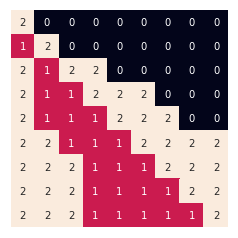

Episode 292	  Score: -395.29
0.231387331601191


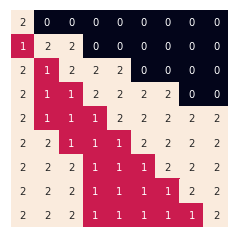

Episode 293	  Score: -379.56
0.23023039494318503


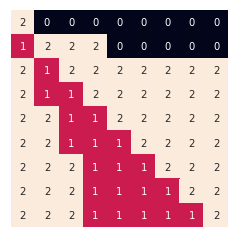

Episode 294	  Score: -346.06
0.2290792429684691


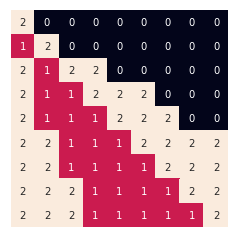

Episode 295	  Score: -326.56
0.22793384675362674


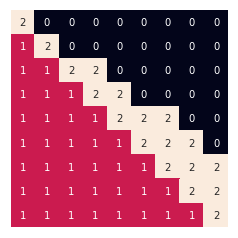

Episode 296	  Score: -431.38
0.22679417751985861


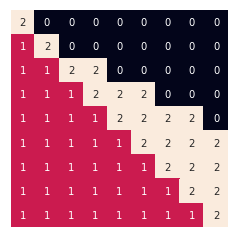

Episode 297	  Score: -392.06
0.22566020663225933


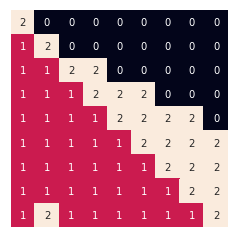

Episode 298	  Score: -326.51
0.22453190559909803


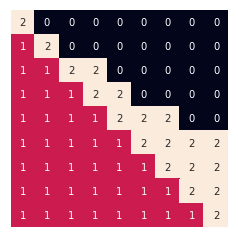

Episode 299	  Score: -360.84
0.22340924607110255


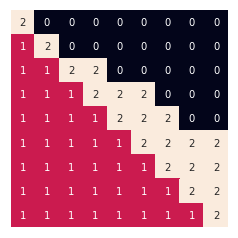

Episode 300	  Score: -331.46
0.22229219984074702


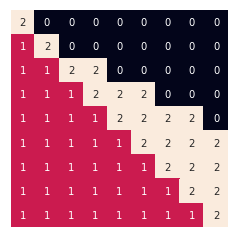

Episode 301	  Score: -391.50
0.2211807388415433


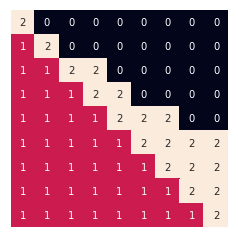

Episode 302	  Score: -365.56
0.22007483514733558


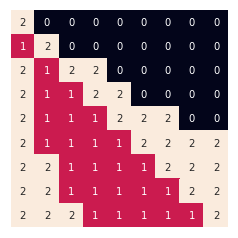

Episode 303	  Score: -369.50
0.2189744609715989


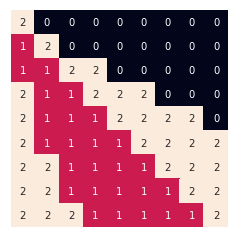

Episode 304	  Score: -330.28
0.2178795886667409


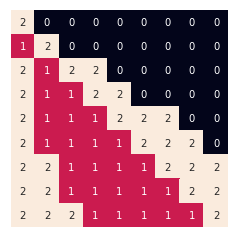

Episode 305	  Score: -350.45
0.2167901907234072


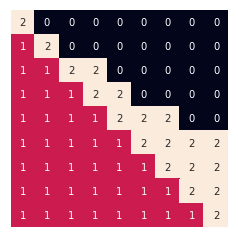

Episode 306	  Score: -398.50
0.21570623976979014


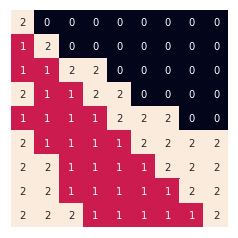

Episode 307	  Score: -363.94
0.21462770857094118


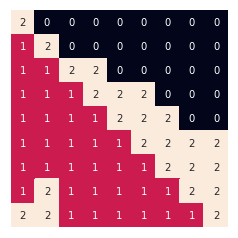

Episode 308	  Score: -348.72
0.21355457002808648


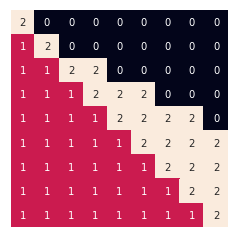

Episode 309	  Score: -316.14
0.21248679717794605


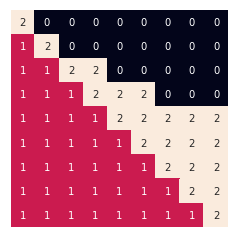

Episode 310	  Score: -295.86
0.21142436319205632


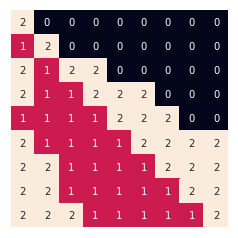

Episode 311	  Score: -327.59
0.21036724137609603


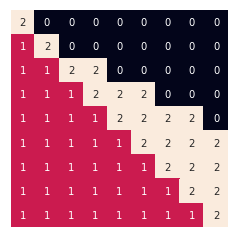

Episode 312	  Score: -303.98
0.20931540516921554


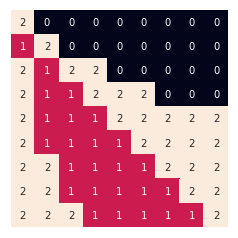

Episode 313	  Score: -245.79
0.20826882814336947


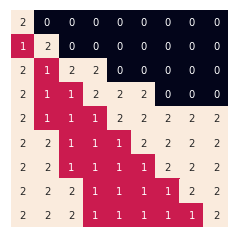

Episode 314	  Score: -324.04
0.20722748400265262


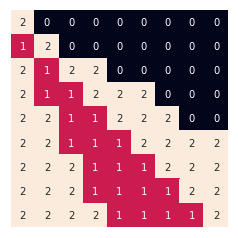

Episode 315	  Score: -263.55
0.20619134658263935


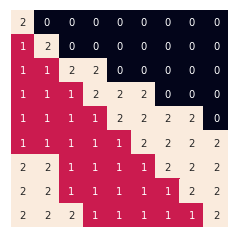

Episode 316	  Score: -366.12
0.20516038984972615


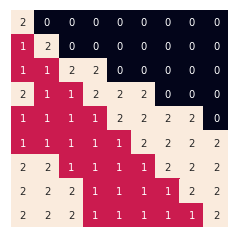

Episode 317	  Score: -307.94
0.2041345879004775


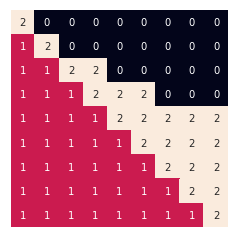

Episode 318	  Score: -311.85
0.2031139149609751


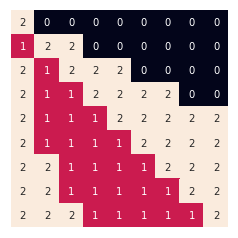

Episode 319	  Score: -393.17
0.20209834538617025


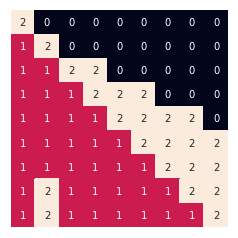

Episode 320	  Score: -283.87
0.2010878536592394


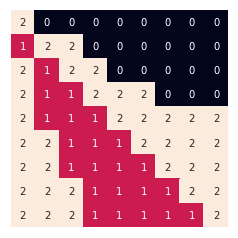

Episode 321	  Score: -237.33
0.2000824143909432


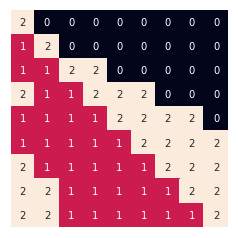

Episode 322	  Score: -412.36
0.19908200231898848


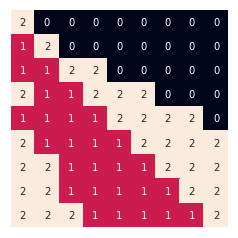

Episode 323	  Score: -354.62
0.19808659230739353


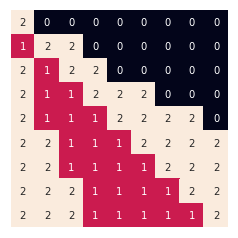

Episode 324	  Score: -281.66
0.19709615934585656


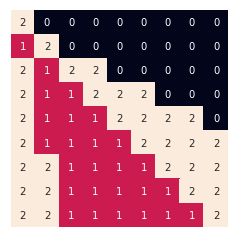

Episode 325	  Score: -323.99
0.19611067854912728


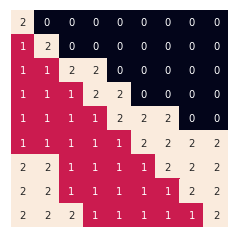

Episode 326	  Score: -324.27
0.19513012515638165


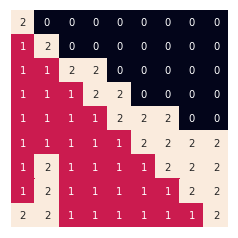

Episode 327	  Score: -286.49
0.19415447453059972


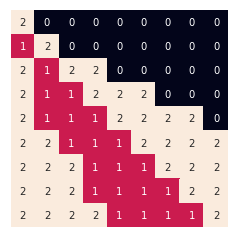

Episode 328	  Score: -362.34
0.19318370215794672


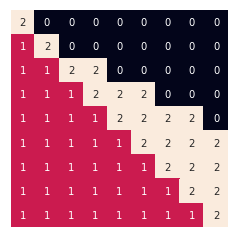

Episode 329	  Score: -352.73
0.192217783647157


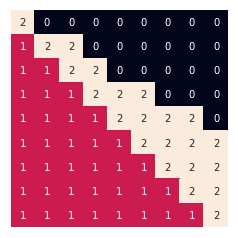

Episode 330	  Score: -339.24
0.1912566947289212


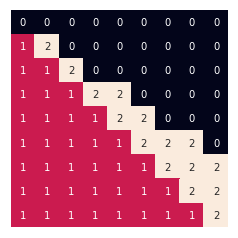

Episode 331	  Score: -277.02
0.1903004112552766


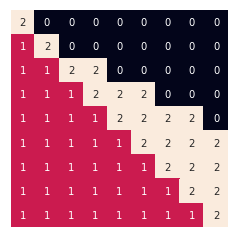

Episode 332	  Score: -309.05
0.18934890919900021


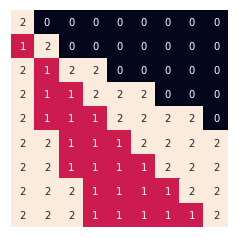

Episode 333	  Score: -336.19
0.18840216465300522


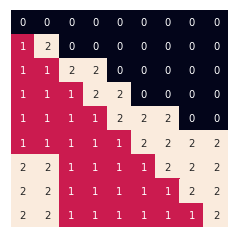

Episode 334	  Score: -258.74
0.18746015382974018


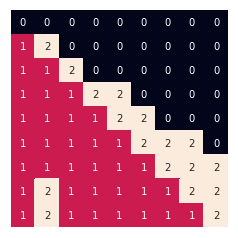

Episode 335	  Score: -317.56
0.1865228530605915


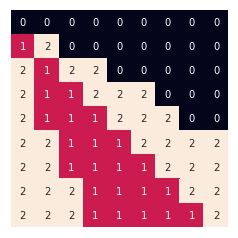

Episode 336	  Score: -241.26
0.18559023879528855


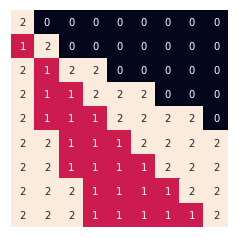

Episode 337	  Score: -282.65
0.1846622876013121


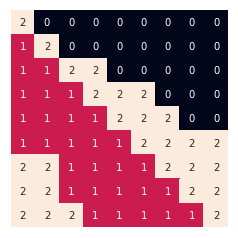

Episode 338	  Score: -295.82
0.18373897616330553


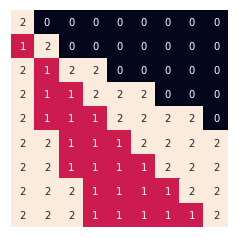

Episode 339	  Score: -341.50
0.182820281282489


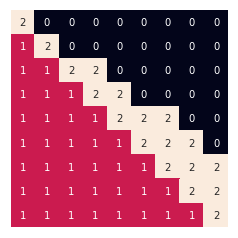

Episode 340	  Score: -303.05
0.18190617987607657


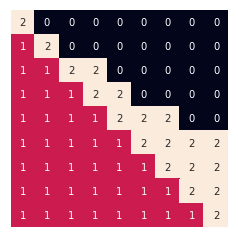

Episode 341	  Score: -265.38
0.18099664897669618


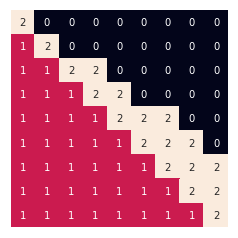

Episode 342	  Score: -372.93
0.1800916657318127


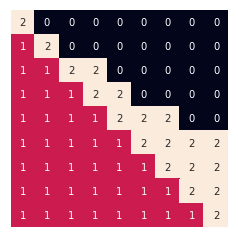

Episode 343	  Score: -365.81
0.17919120740315364


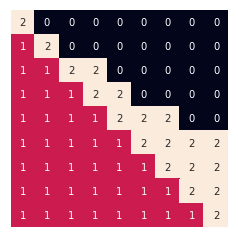

Episode 344	  Score: -265.03
0.17829525136613786


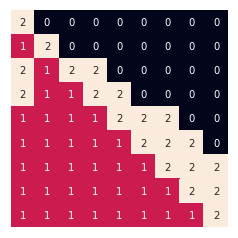

Episode 345	  Score: -226.84
0.17740377510930716


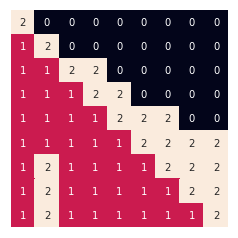

Episode 346	  Score: -265.82
0.17651675623376062


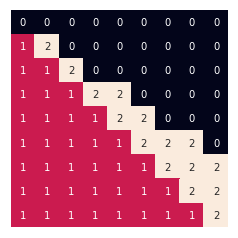

Episode 347	  Score: -369.33
0.1756341724525918


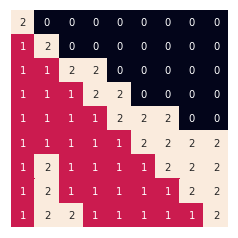

Episode 348	  Score: -313.04
0.17475600159032884


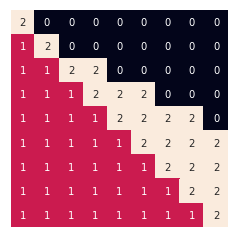

Episode 349	  Score: -289.73
0.17388222158237718


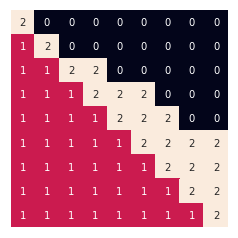

Episode 350	  Score: -290.91
0.1730128104744653


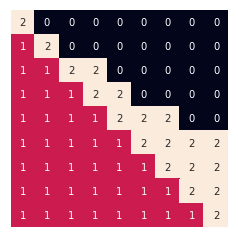

Episode 351	  Score: -244.90
0.17214774642209296


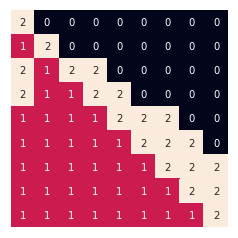

Episode 352	  Score: -259.82
0.1712870076899825


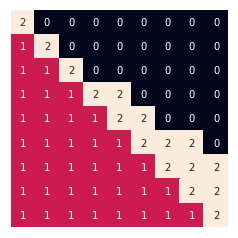

Episode 353	  Score: -301.81
0.17043057265153258


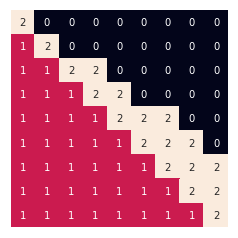

Episode 354	  Score: -250.04
0.16957841978827493


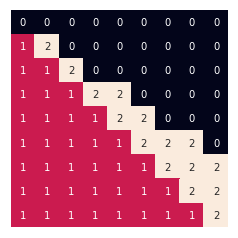

Episode 355	  Score: -360.31
0.16873052768933355


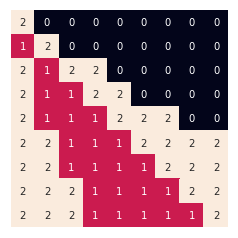

Episode 356	  Score: -212.47
0.1678868750508869


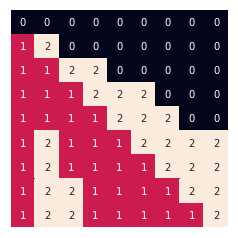

Episode 357	  Score: -244.98
0.16704744067563246


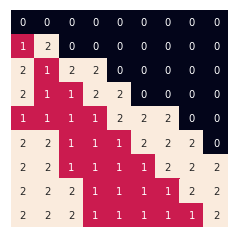

Episode 358	  Score: -261.97
0.1662122034722543


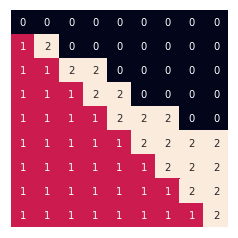

Episode 359	  Score: -260.00
0.16538114245489302


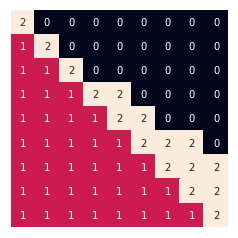

Episode 360	  Score: -322.31
0.16455423674261854


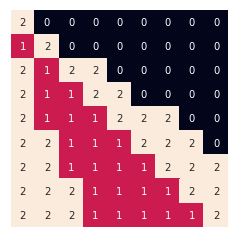

Episode 361	  Score: -186.97
0.16373146555890544


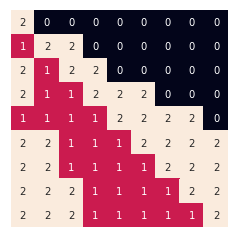

Episode 362	  Score: -221.55
0.16291280823111093


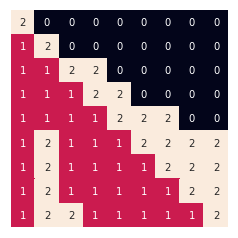

Episode 363	  Score: -303.08
0.16209824418995536


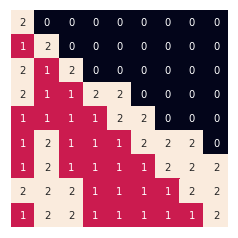

Episode 364	  Score: -234.36
0.16128775296900558


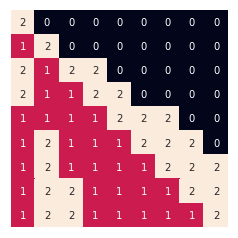

Episode 365	  Score: -242.16
0.16048131420416054


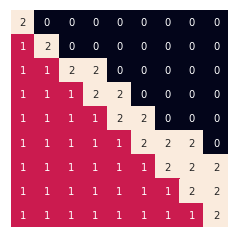

Episode 366	  Score: -269.39
0.15967890763313974


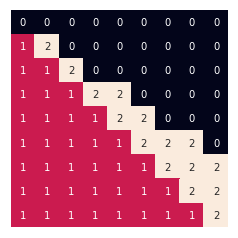

Episode 367	  Score: -245.25
0.15888051309497406


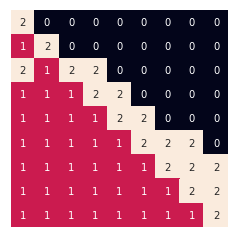

Episode 368	  Score: -286.82
0.1580861105294992


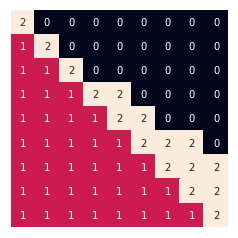

Episode 369	  Score: -321.82
0.1572956799768517


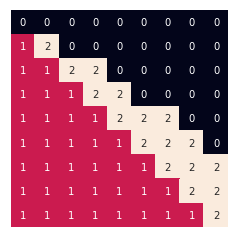

Episode 370	  Score: -245.31
0.15650920157696743


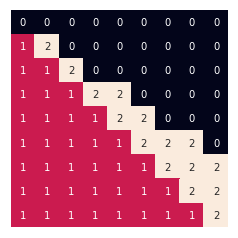

Episode 371	  Score: -226.95
0.1557266555690826


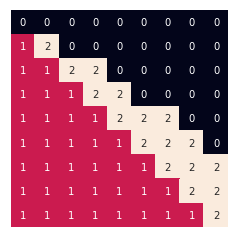

Episode 372	  Score: -260.40
0.1549480222912372


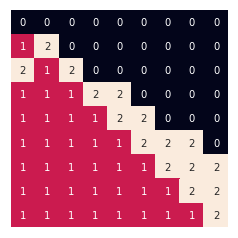

Episode 373	  Score: -252.55
0.15417328217978102


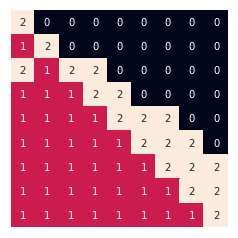

Episode 374	  Score: -239.36
0.1534024157688821


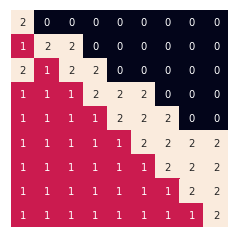

Episode 375	  Score: -201.02
0.1526354036900377


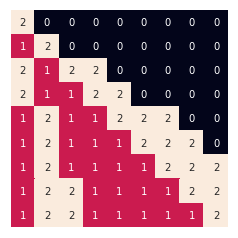

Episode 376	  Score: -220.62
0.1518722266715875


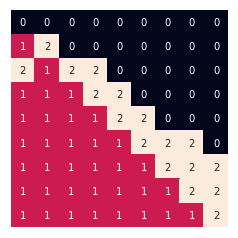

Episode 377	  Score: -308.54
0.15111286553822956


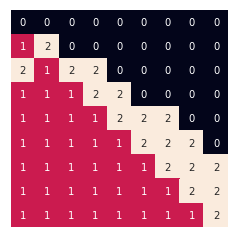

Episode 378	  Score: -260.70
0.15035730121053842


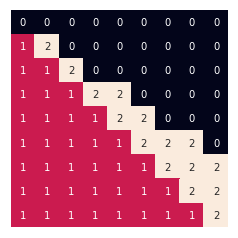

Episode 379	  Score: -170.64
0.14960551470448571


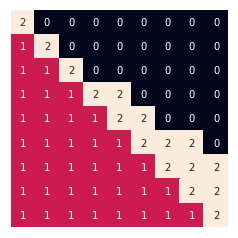

Episode 380	  Score: -187.71
0.14885748713096328


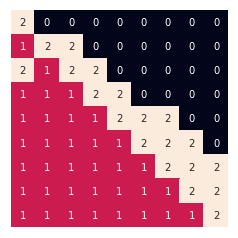

Episode 381	  Score: -287.86
0.14811319969530845


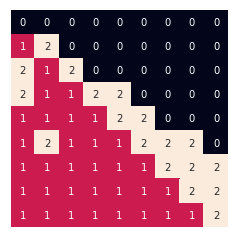

Episode 382	  Score: -339.58
0.1473726336968319


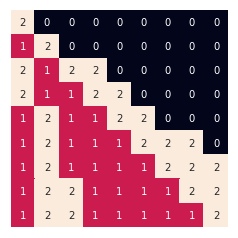

Episode 383	  Score: -217.03
0.14663577052834775


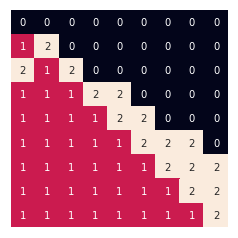

Episode 384	  Score: -243.87
0.14590259167570602


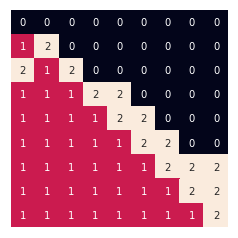

Episode 385	  Score: -247.01
0.1451730787173275


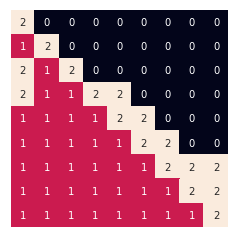

Episode 386	  Score: -294.10
0.14444721332374086


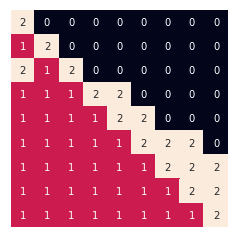

Episode 387	  Score: -251.23
0.14372497725712216


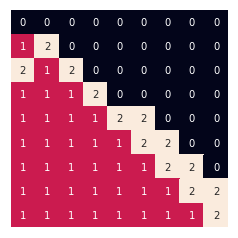

Episode 388	  Score: -232.52
0.14300635237083656


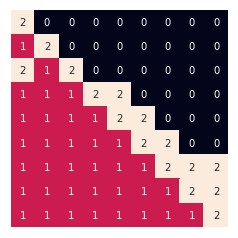

Episode 389	  Score: -253.96
0.14229132060898236


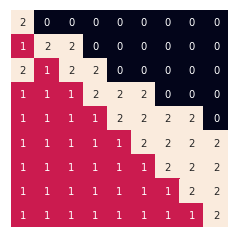

Episode 390	  Score: -294.27
0.14157986400593744


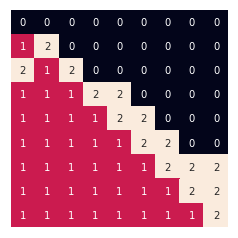

Episode 391	  Score: -220.66
0.14087196468590776


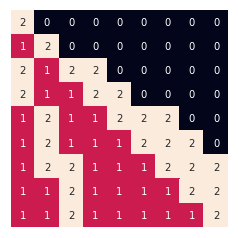

Episode 392	  Score: -228.35
0.14016760486247823


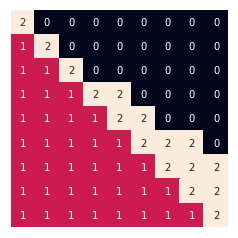

Episode 393	  Score: -290.24
0.13946676683816583


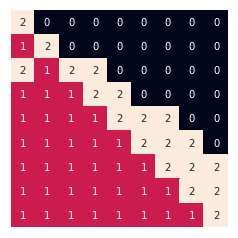

Episode 394	  Score: -230.43
0.138769433003975


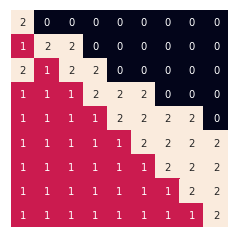

Episode 395	  Score: -280.43
0.13807558583895513


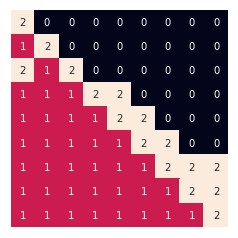

Episode 396	  Score: -198.66
0.13738520790976036


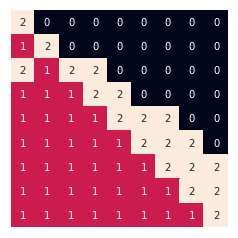

Episode 397	  Score: -221.81
0.13669828187021155


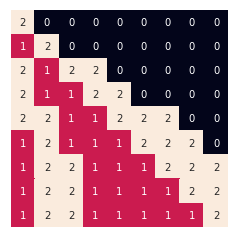

Episode 398	  Score: -247.73
0.13601479046086049


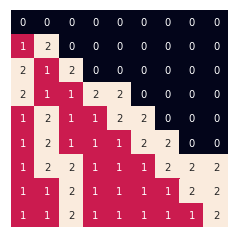

Episode 399	  Score: -172.47
0.1353347165085562


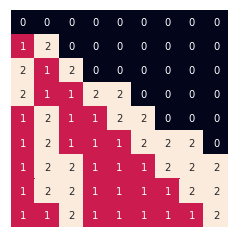

Episode 400	  Score: -221.72
0.1346580429260134


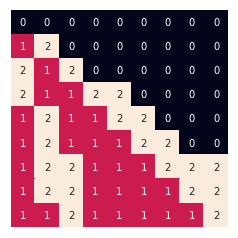

Episode 401	  Score: -217.69
0.13398475271138335


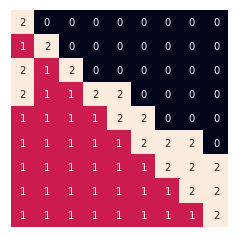

Episode 402	  Score: -289.32
0.13331482894782642


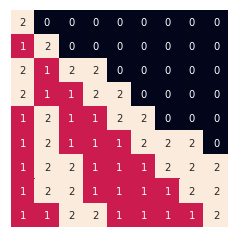

Episode 403	  Score: -227.80
0.13264825480308728


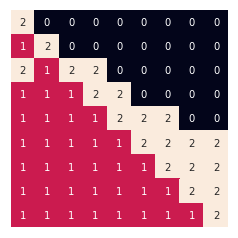

Episode 404	  Score: -242.41
0.13198501352907185


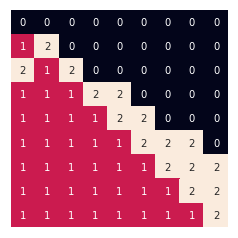

Episode 405	  Score: -179.66
0.1313250884614265


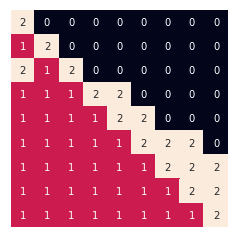

Episode 406	  Score: -239.41
0.13066846301911936


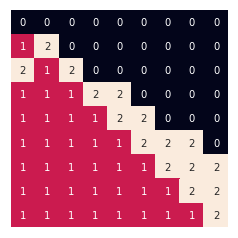

Episode 407	  Score: -249.59
0.13001512070402377


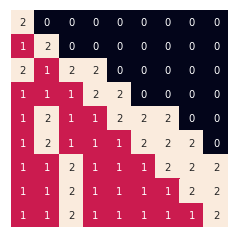

Episode 408	  Score: -258.82
0.12936504510050365


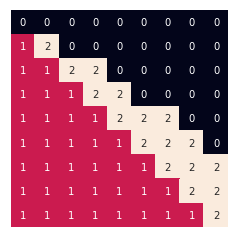

Episode 409	  Score: -246.84
0.12871821987500112


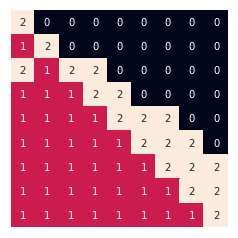

Episode 410	  Score: -211.52
0.12807462877562611


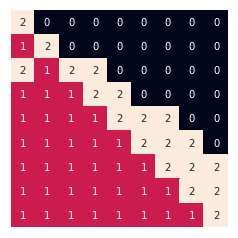

Episode 411	  Score: -149.64
0.12743425563174798


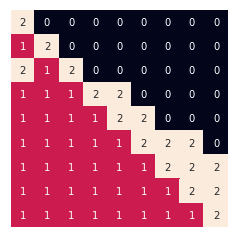

Episode 412	  Score: -204.46
0.12679708435358925


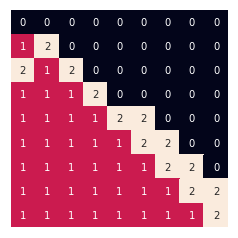

Episode 413	  Score: -234.89
0.1261630989318213


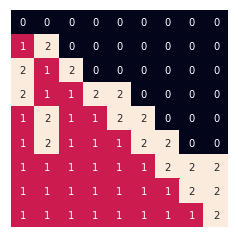

Episode 414	  Score: -177.81
0.1255322834371622


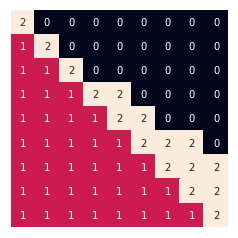

Episode 415	  Score: -243.74
0.12490462201997637


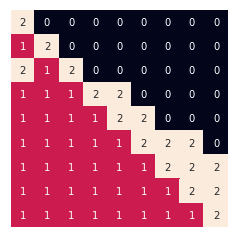

Episode 416	  Score: -196.69
0.1242800989098765


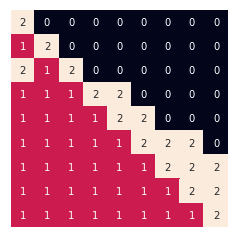

Episode 417	  Score: -228.11
0.12365869841532712


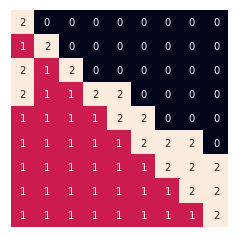

Episode 418	  Score: -221.49
0.12304040492325048


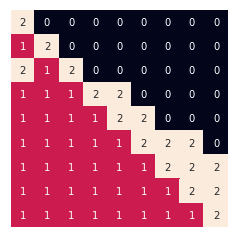

Episode 419	  Score: -274.95
0.12242520289863423


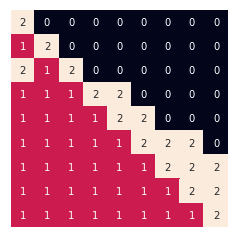

Episode 420	  Score: -194.47
0.12181307688414106


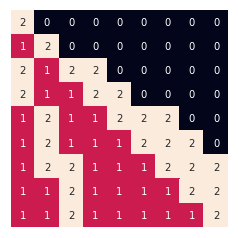

Episode 421	  Score: -239.38
0.12120401149972035


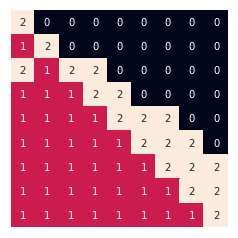

Episode 422	  Score: -225.31
0.12059799144222175


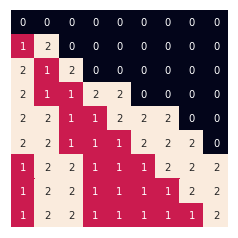

Episode 423	  Score: -149.32
0.11999500148501063


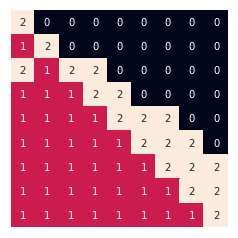

Episode 424	  Score: -197.32
0.11939502647758558


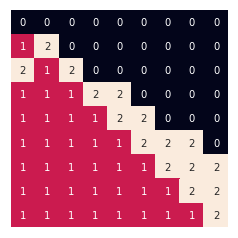

Episode 425	  Score: -192.55
0.11879805134519765


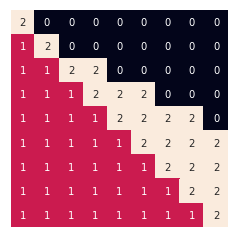

Episode 426	  Score: -294.11
0.11820406108847166


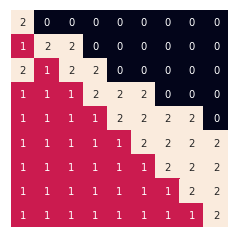

Episode 427	  Score: -187.06
0.1176130407830293


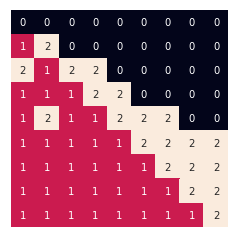

Episode 428	  Score: -194.10
0.11702497557911415


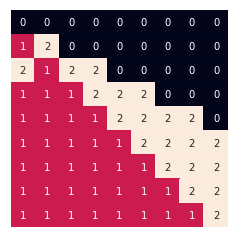

Episode 429	  Score: -244.25
0.11643985070121858


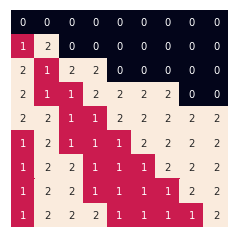

Episode 430	  Score: -214.58
0.11585765144771248


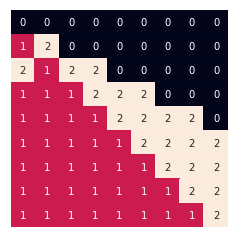

Episode 431	  Score: -169.06
0.11527836319047392


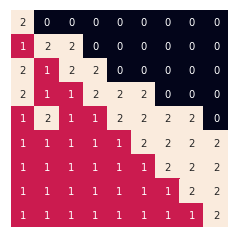

Episode 432	  Score: -167.76
0.11470197137452155


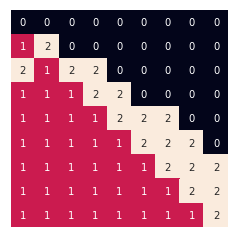

Episode 433	  Score: -218.49
0.11412846151764894


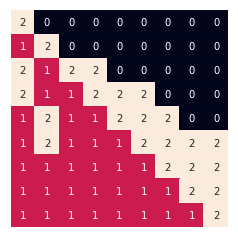

Episode 434	  Score: -229.02
0.1135578192100607


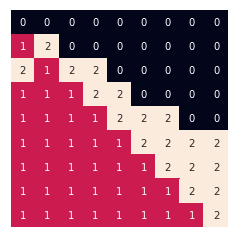

Episode 435	  Score: -264.13
0.11299003011401039


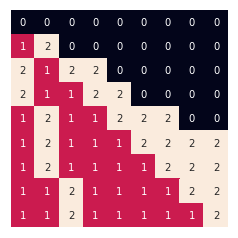

Episode 436	  Score: -172.90
0.11242507996344034


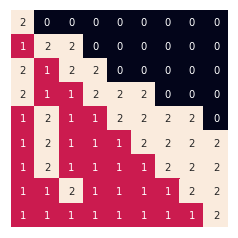

Episode 437	  Score: -209.50
0.11186295456362313


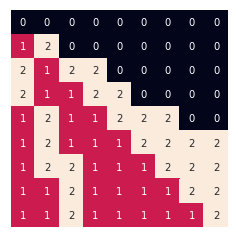

Episode 438	  Score: -220.44
0.11130363979080501


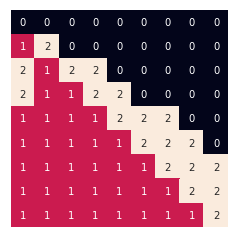

Episode 439	  Score: -212.65
0.11074712159185099


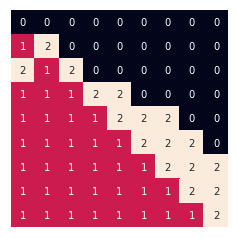

Episode 440	  Score: -238.14
0.11019338598389174


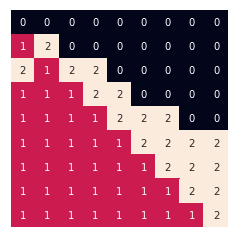

Episode 441	  Score: -180.03
0.10964241905397228


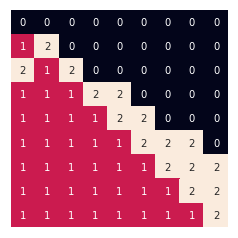

Episode 442	  Score: -142.64
0.10909420695870241


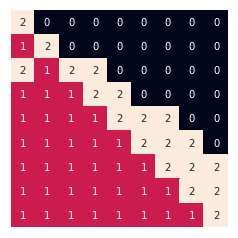

Episode 443	  Score: -190.79
0.1085487359239089


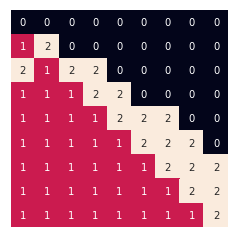

Episode 444	  Score: -228.76
0.10800599224428936


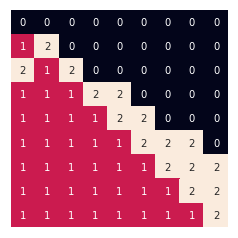

Episode 445	  Score: -163.78
0.10746596228306791


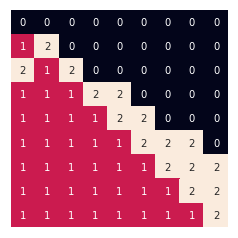

Episode 446	  Score: -217.14
0.10692863247165257


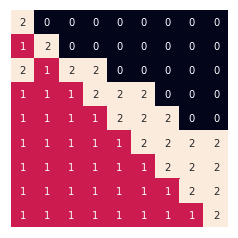

Episode 447	  Score: -179.77
0.1063939893092943


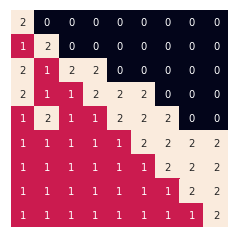

Episode 448	  Score: -176.12
0.10586201936274783


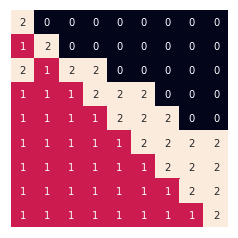

Episode 449	  Score: -186.79
0.10533270926593409


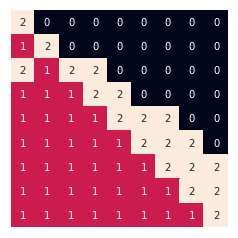

Episode 450	  Score: -179.28
0.10480604571960442


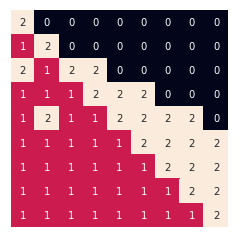

Episode 451	  Score: -207.31
0.1042820154910064


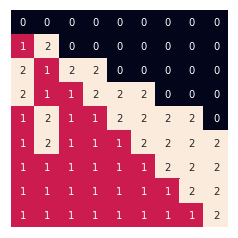

Episode 452	  Score: -213.42
0.10376060541355137


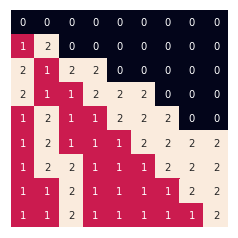

Episode 453	  Score: -198.07
0.1032418023864836


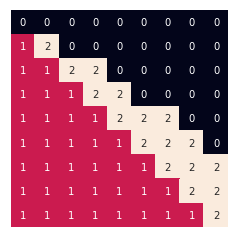

Episode 454	  Score: -227.92
0.10272559337455119


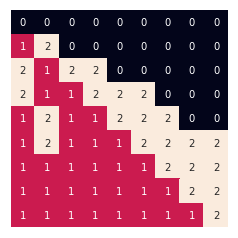

Episode 455	  Score: -169.27
0.10221196540767843


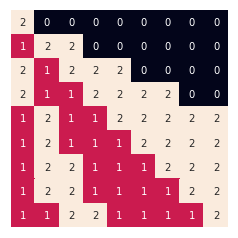

Episode 456	  Score: -174.56
0.10170090558064004


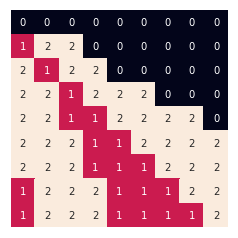

Episode 457	  Score: -199.28
0.10119240105273684


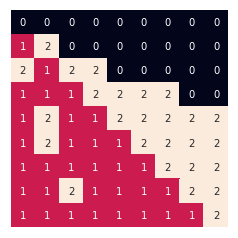

Episode 458	  Score: -192.76
0.10068643904747315


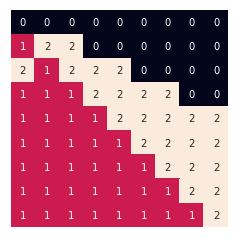

Episode 459	  Score: -149.83
0.10018300685223579


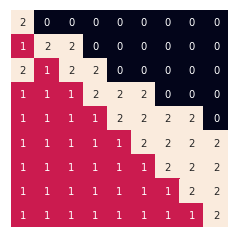

Episode 460	  Score: -223.78
0.0996820918179746


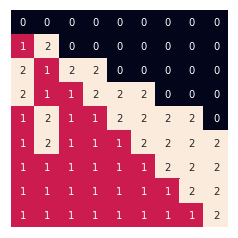

Episode 461	  Score: -170.26
0.09918368135888474


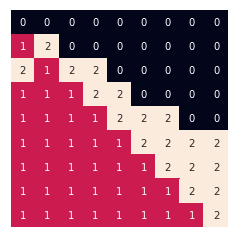

Episode 462	  Score: -172.94
0.09868776295209031


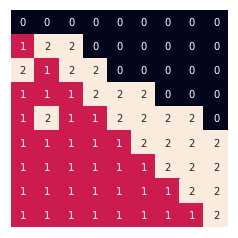

Episode 463	  Score: -227.06
0.09819432413732986


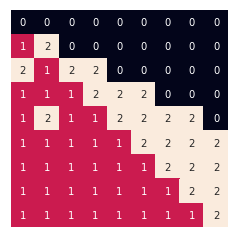

Episode 464	  Score: -177.80
0.09770335251664321


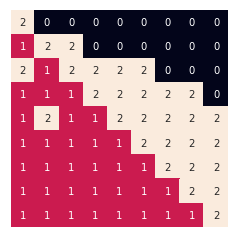

Episode 465	  Score: -207.10
0.09721483575406


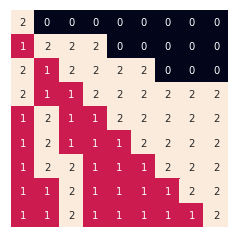

Episode 466	  Score: -88.81
0.09672876157528969


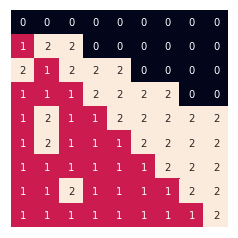

Episode 467	  Score: -149.91
0.09624511776741324


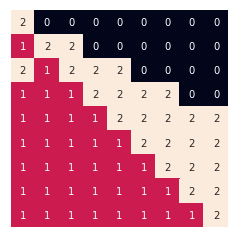

Episode 468	  Score: -167.46
0.09576389217857617


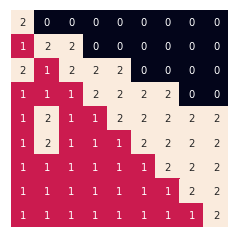

Episode 469	  Score: -188.23
0.09528507271768329


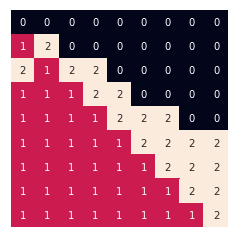

Episode 470	  Score: -180.07
0.09480864735409487


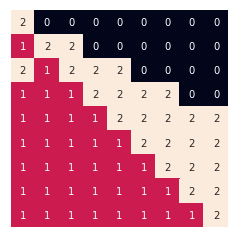

Episode 471	  Score: -149.80
0.0943346041173244


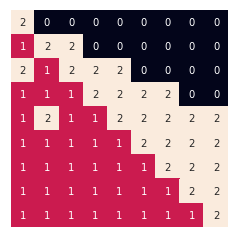

Episode 472	  Score: -126.90
0.09386293109673778


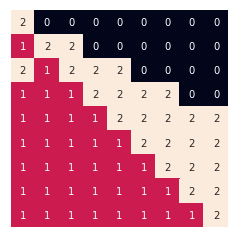

Episode 473	  Score: -187.05
0.09339361644125409


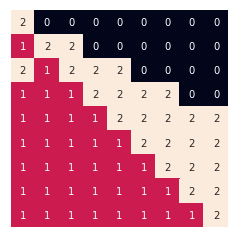

Episode 474	  Score: -184.61
0.09292664835904782


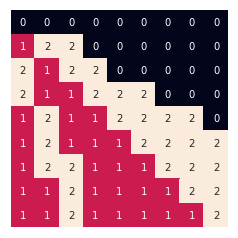

Episode 475	  Score: -169.12
0.09246201511725258


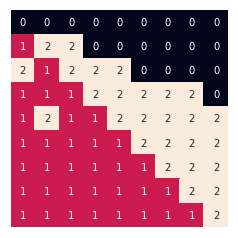

Episode 476	  Score: -154.59
0.09199970504166631


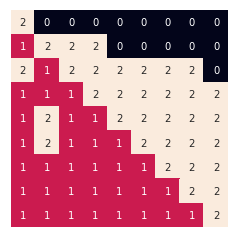

Episode 477	  Score: -199.84
0.09153970651645797


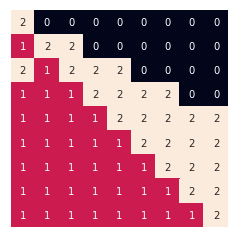

Episode 478	  Score: -225.65
0.09108200798387568


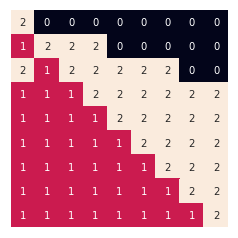

Episode 479	  Score: -213.94
0.0906265979439563


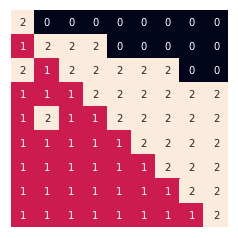

Episode 480	  Score: -193.41
0.09017346495423652


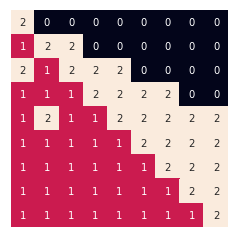

Episode 481	  Score: -131.04
0.08972259762946533


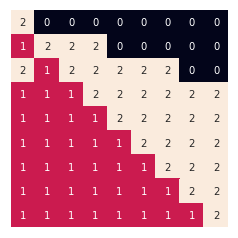

Episode 482	  Score: -153.61
0.089273984641318


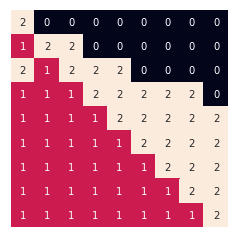

Episode 483	  Score: -163.31
0.0888276147181114


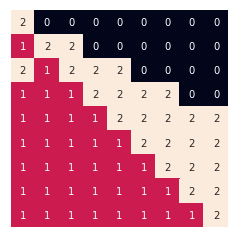

Episode 484	  Score: -171.22
0.08838347664452084


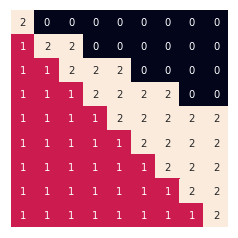

Episode 485	  Score: -175.20
0.08794155926129824


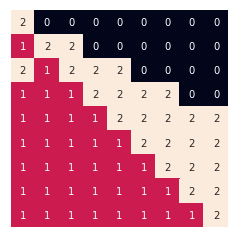

Episode 486	  Score: -179.79
0.08750185146499175


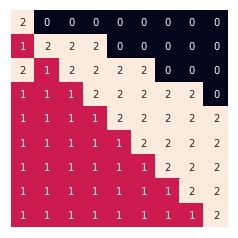

Episode 487	  Score: -155.16
0.08706434220766679


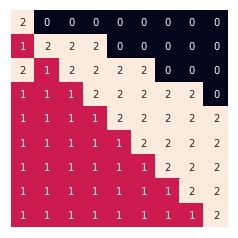

Episode 488	  Score: -185.40
0.08662902049662846


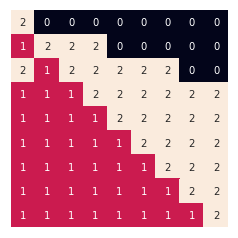

Episode 489	  Score: -152.19
0.08619587539414532


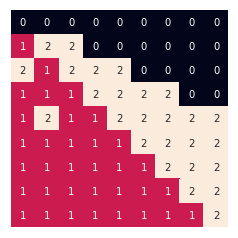

Episode 490	  Score: -162.72
0.08576489601717459


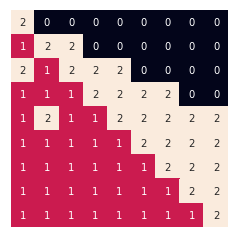

Episode 491	  Score: -129.88
0.08533607153708872


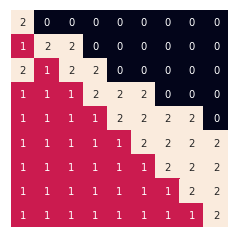

Episode 492	  Score: -181.09
0.08490939117940327


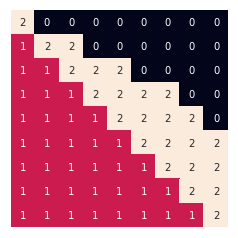

Episode 493	  Score: -163.83
0.08448484422350626


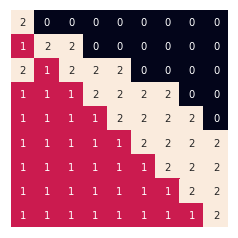

Episode 494	  Score: -205.99
0.08406242000238873


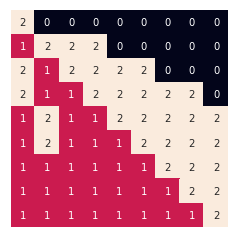

Episode 495	  Score: -177.69
0.08364210790237678


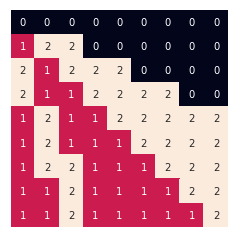

Episode 496	  Score: -176.46
0.0832238973628649


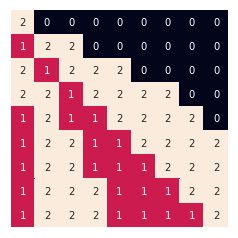

Episode 497	  Score: -173.09
0.08280777787605056


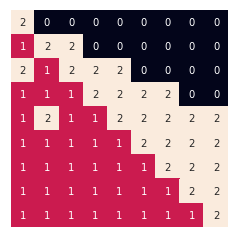

Episode 498	  Score: -188.03
0.08239373898667031


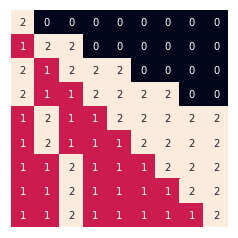

Episode 499	  Score: -179.22
0.08198177029173696


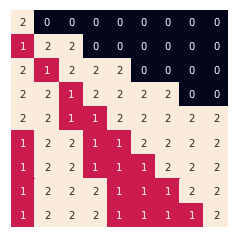

Episode 500	  Score: -152.74
0.08157186144027828


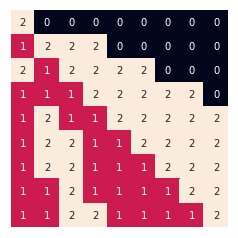

Episode 501	  Score: -172.10
0.0811640021330769


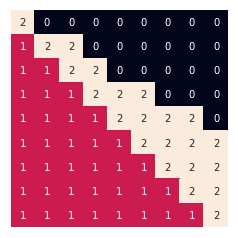

Episode 502	  Score: -167.20
0.08075818212241151


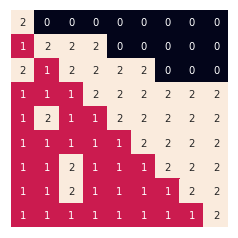

Episode 503	  Score: -148.26
0.08035439121179945


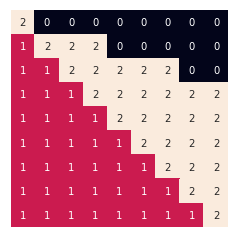

Episode 504	  Score: -126.21
0.07995261925574046


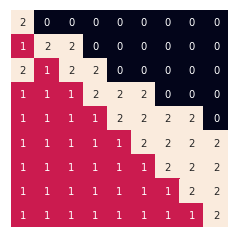

Episode 505	  Score: -111.42
0.07955285615946175


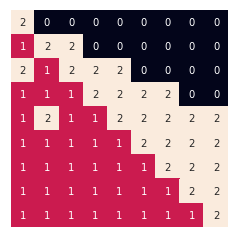

Episode 506	  Score: -177.12
0.07915509187866444


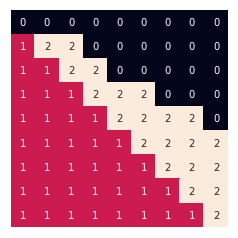

Episode 507	  Score: -164.45
0.07875931641927113


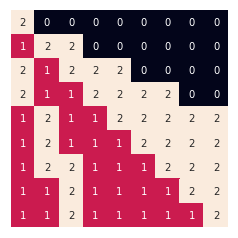

Episode 508	  Score: -212.55
0.07836551983717477


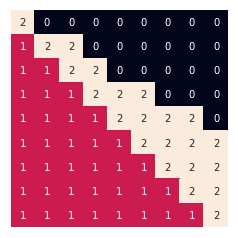

Episode 509	  Score: -163.34
0.07797369223798889


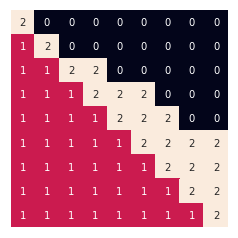

Episode 510	  Score: -162.50
0.07758382377679894


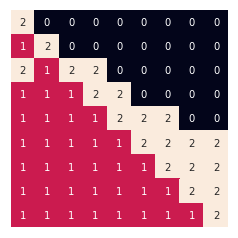

Episode 511	  Score: -181.31
0.07719590465791494


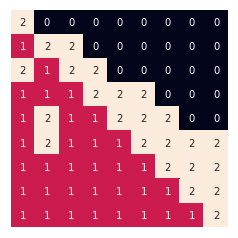

Episode 512	  Score: -119.21
0.07680992513462537


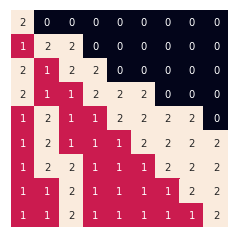

Episode 513	  Score: -139.97
0.07642587550895225


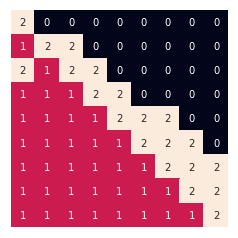

Episode 514	  Score: -146.34
0.07604374613140748


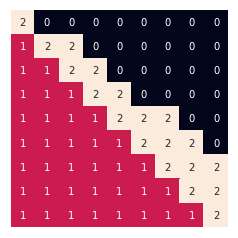

Episode 515	  Score: -185.71
0.07566352740075044


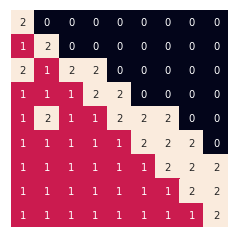

Episode 516	  Score: -151.43
0.07528520976374668


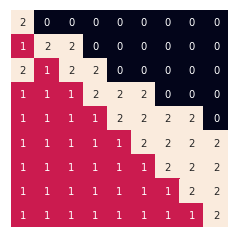

Episode 517	  Score: -191.48
0.07490878371492794


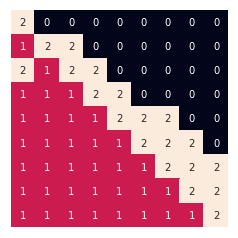

Episode 518	  Score: -199.88
0.0745342397963533


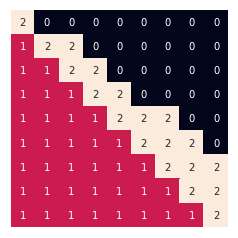

Episode 519	  Score: -80.38
0.07416156859737154


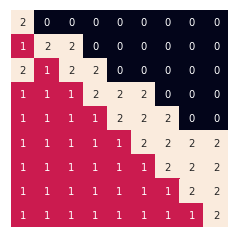

Episode 520	  Score: -182.32
0.07379076075438468


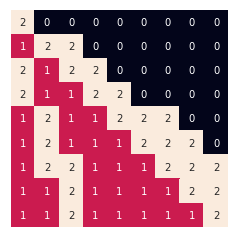

Episode 521	  Score: -134.61
0.07342180695061275


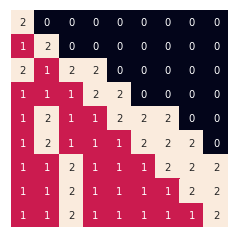

Episode 522	  Score: -185.41
0.07305469791585968


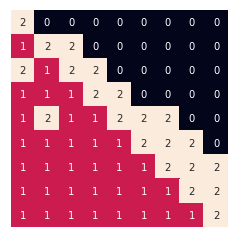

Episode 523	  Score: -121.06
0.07268942442628039


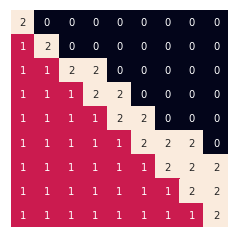

Episode 524	  Score: -152.34
0.07232597730414898


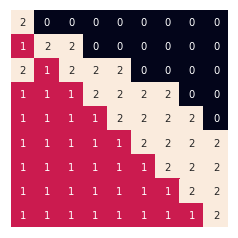

Episode 525	  Score: -159.13
0.07196434741762824


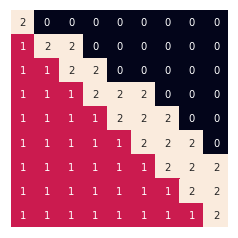

Episode 526	  Score: -169.12
0.0716045256805401


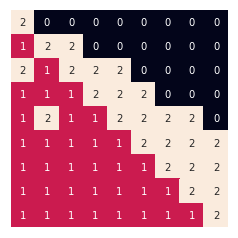

Episode 527	  Score: -150.03
0.0712465030521374


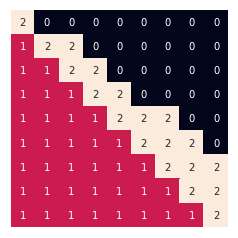

Episode 528	  Score: -192.68
0.0708902705368767


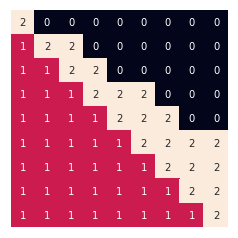

Episode 529	  Score: -139.15
0.07053581918419231


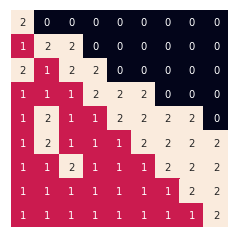

Episode 530	  Score: -177.82
0.07018314008827135


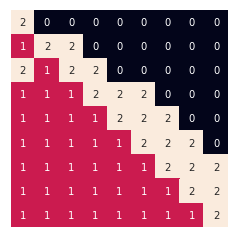

Episode 531	  Score: -117.81
0.06983222438783


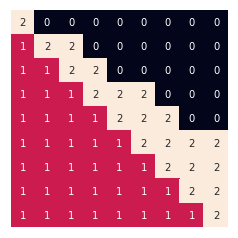

Episode 532	  Score: -141.26
0.06948306326589085


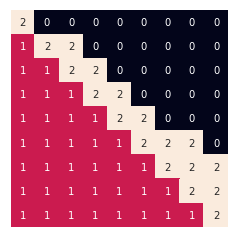

Episode 533	  Score: -128.42
0.0691356479495614


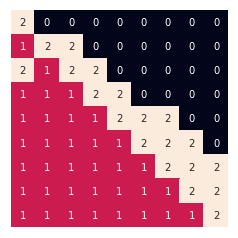

Episode 534	  Score: -136.62
0.06878996970981359


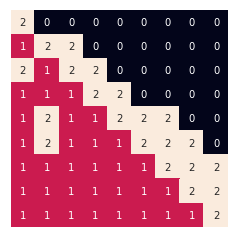

Episode 535	  Score: -178.04
0.06844601986126451


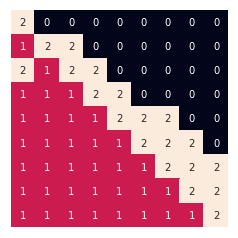

Episode 536	  Score: -153.53
0.06810378976195819


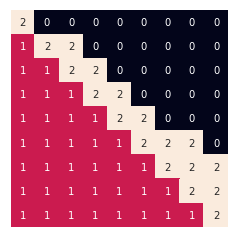

Episode 537	  Score: -184.60
0.0677632708131484


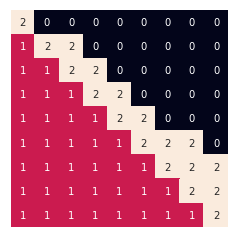

Episode 538	  Score: -146.71
0.06742445445908266


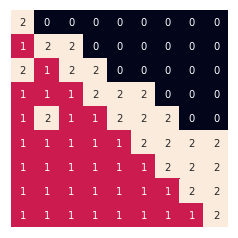

Episode 539	  Score: -127.47
0.06708733218678724


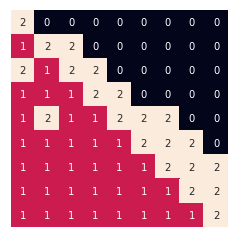

Episode 540	  Score: -125.11
0.0667518955258533


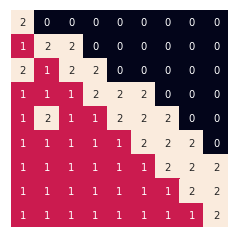

Episode 541	  Score: -97.38
0.06641813604822402


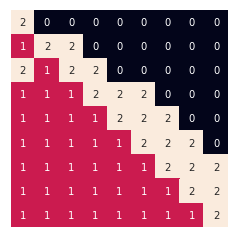

Episode 542	  Score: -139.24
0.0660860453679829


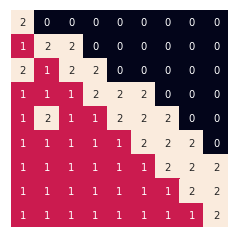

Episode 543	  Score: -82.49
0.06575561514114299


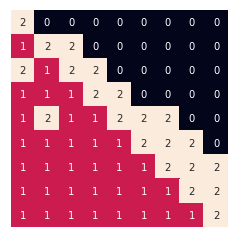

Episode 544	  Score: -103.75
0.06542683706543727


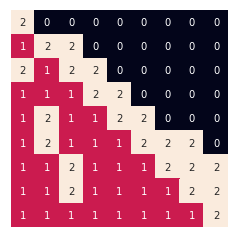

Episode 545	  Score: -110.76
0.06509970288011008


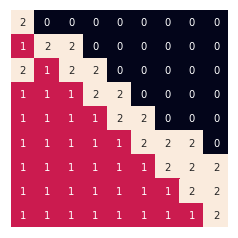

Episode 546	  Score: -137.35
0.06477420436570952


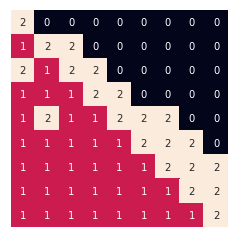

Episode 547	  Score: -130.34
0.06445033334388098


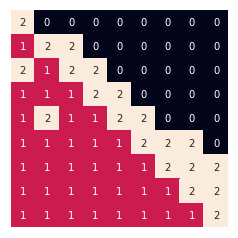

Episode 548	  Score: -134.42
0.06412808167716157


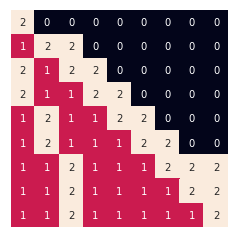

Episode 549	  Score: -147.97
0.06380744126877576


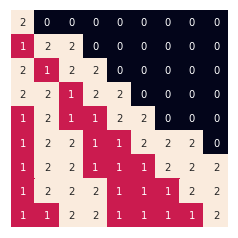

Episode 550	  Score: -156.65
0.06348840406243188


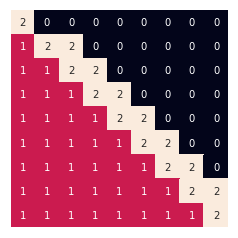

Episode 551	  Score: -133.36
0.06317096204211972


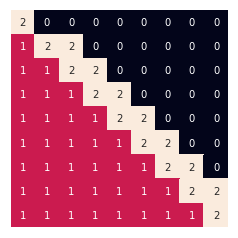

Episode 552	  Score: -136.71
0.06285510723190912


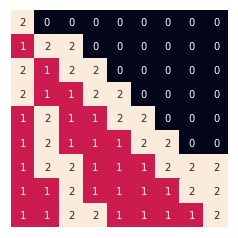

Episode 553	  Score: -140.50
0.06254083169574957


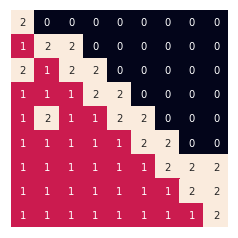

Episode 554	  Score: -119.04
0.062228127537270826


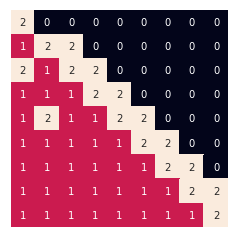

Episode 555	  Score: -150.76
0.06191698689958447


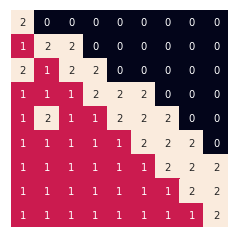

Episode 556	  Score: -152.13
0.061607401965086545


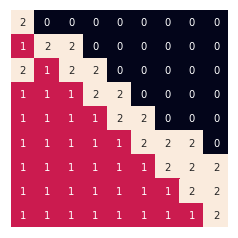

Episode 557	  Score: -144.88
0.06129936495526111


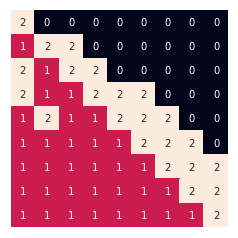

Episode 558	  Score: -179.94
0.0609928681304848


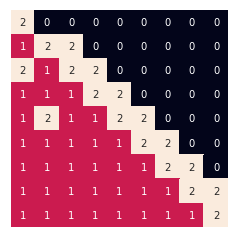

Episode 559	  Score: -134.42
0.060687903789832374


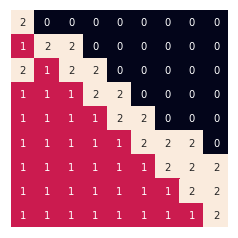

Episode 560	  Score: -145.45
0.06038446427088321


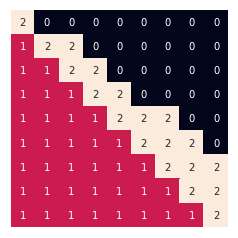

Episode 561	  Score: -163.59
0.06008254194952879


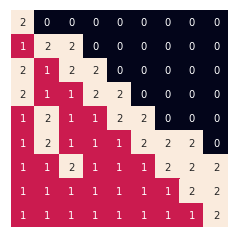

Episode 562	  Score: -121.25
0.05978212923978115


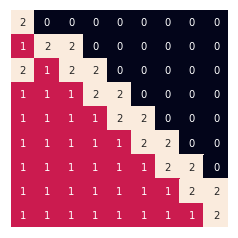

Episode 563	  Score: -116.45
0.05948321859358224


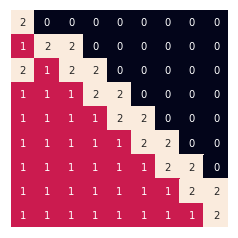

Episode 564	  Score: -95.56
0.05918580250061433


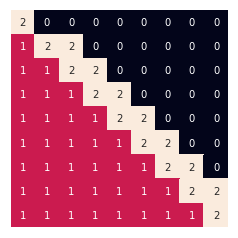

Episode 565	  Score: -107.24
0.058889873488111255


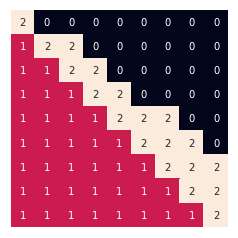

Episode 566	  Score: -126.57
0.058595424120670696


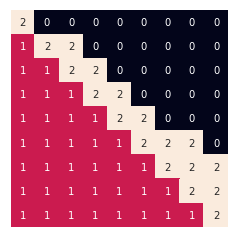

Episode 567	  Score: -112.83
0.05830244700006734


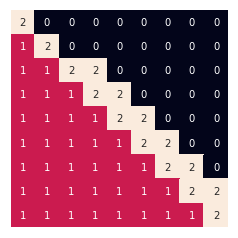

Episode 568	  Score: -108.07
0.058010934765067


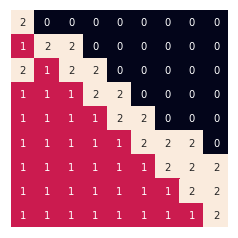

Episode 569	  Score: -139.28
0.05772088009124167


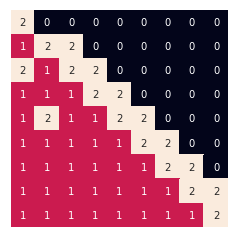

Episode 570	  Score: -166.17
0.05743227569078546


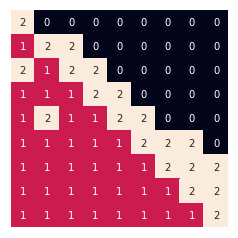

Episode 571	  Score: -72.97
0.05714511431233153


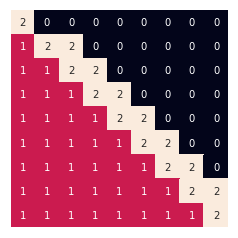

Episode 572	  Score: -124.69
0.05685938874076987


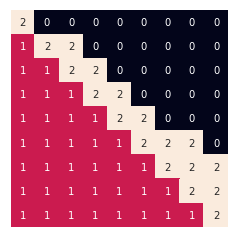

Episode 573	  Score: -184.36
0.056575091797066025


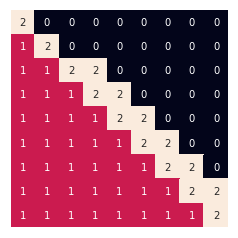

Episode 574	  Score: -110.95
0.056292216338080694


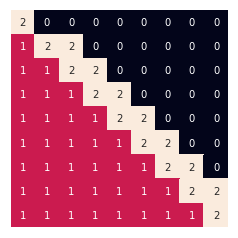

Episode 575	  Score: -126.10
0.05601075525639029


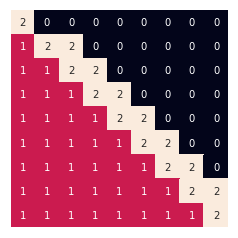

Episode 576	  Score: -163.83
0.05573070148010834


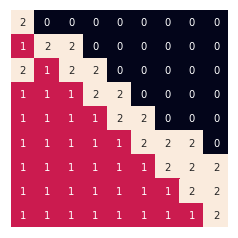

Episode 577	  Score: -143.34
0.0554520479727078


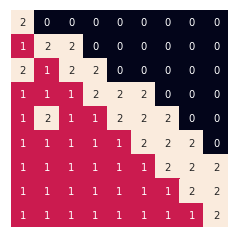

Episode 578	  Score: -73.25
0.05517478773284426


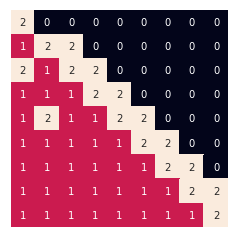

Episode 579	  Score: -110.97
0.05489891379418004


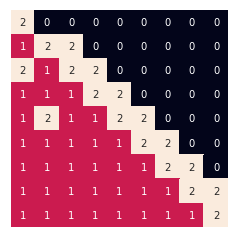

Episode 580	  Score: -102.92
0.05462441922520914


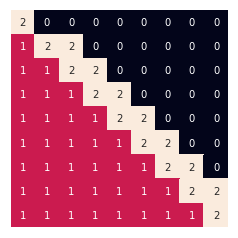

Episode 581	  Score: -101.83
0.0543512971290831


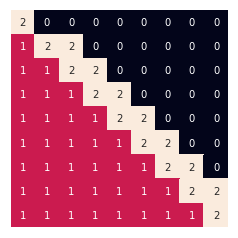

Episode 582	  Score: -106.85
0.05407954064343768


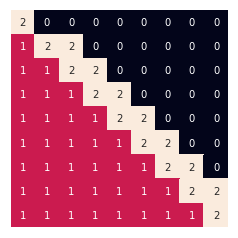

Episode 583	  Score: -87.59
0.05380914294022049


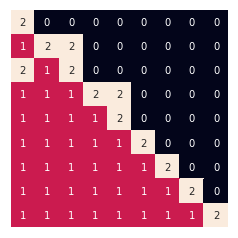

Episode 584	  Score: -122.45
0.05354009722551939


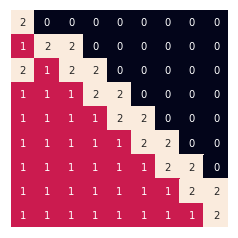

Episode 585	  Score: -126.51
0.05327239673939179


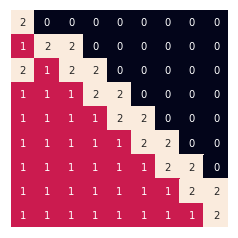

Episode 586	  Score: -152.26
0.053006034755694834


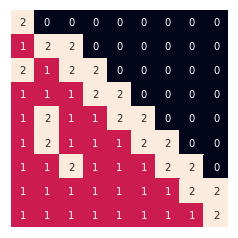

Episode 587	  Score: -96.72
0.052741004581916356


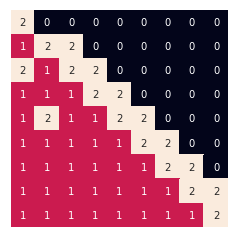

Episode 588	  Score: -153.05
0.052477299559006776


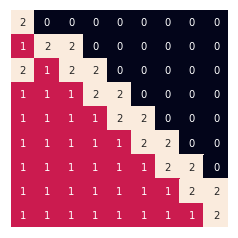

Episode 589	  Score: -112.80
0.052214913061211746


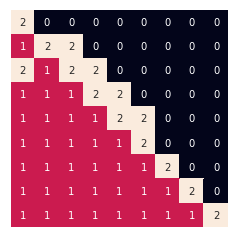

Episode 590	  Score: -125.91
0.05195383849590569


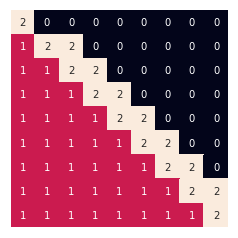

Episode 591	  Score: -114.80
0.05169406930342616


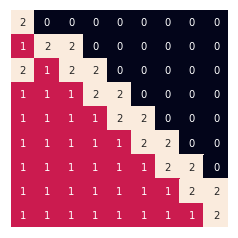

Episode 592	  Score: -103.35
0.05143559895690903


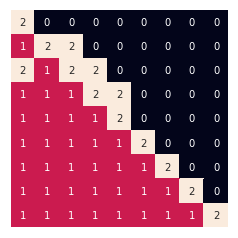

Episode 593	  Score: -110.78
0.051178420962124486


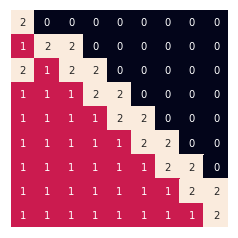

Episode 594	  Score: -120.64
0.05092252885731386


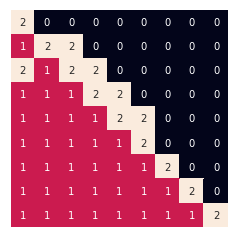

Episode 595	  Score: -83.53
0.05066791621302729


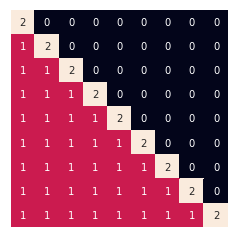

Episode 596	  Score: -133.48
0.05041457663196215


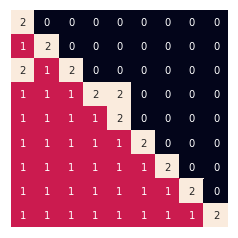

Episode 597	  Score: -83.75
0.050162503748802344


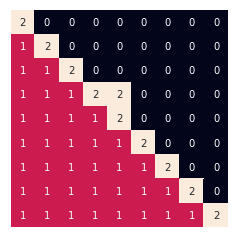

Episode 598	  Score: -76.72
0.049911691230058335


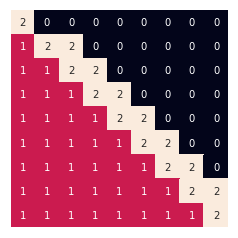

Episode 599	  Score: -132.64
0.04966213277390804


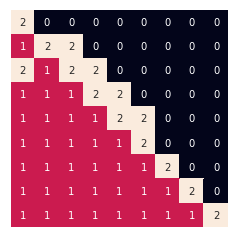

Episode 600	  Score: -132.87
0.0494138221100385


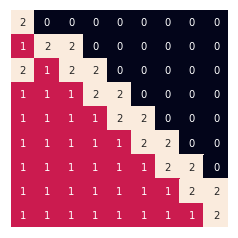

Episode 601	  Score: -106.57
0.04916675299948831


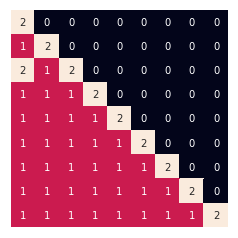

Episode 602	  Score: -153.45
0.04892091923449087


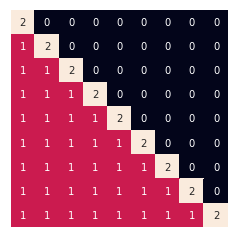

Episode 603	  Score: -79.78
0.04867631463831842


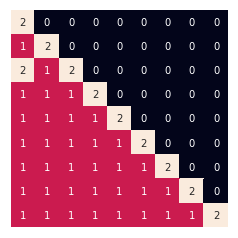

Episode 604	  Score: -115.57
0.048432933065126825


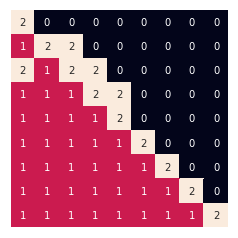

Episode 605	  Score: -96.40
0.048190768399801194


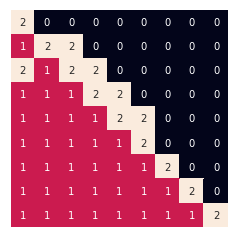

Episode 606	  Score: -118.90
0.04794981455780219


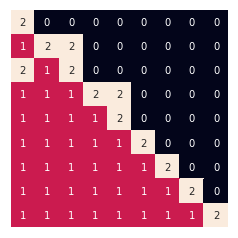

Episode 607	  Score: -167.07
0.04771006548501318


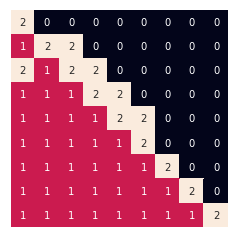

Episode 608	  Score: -125.99
0.047471515157588115


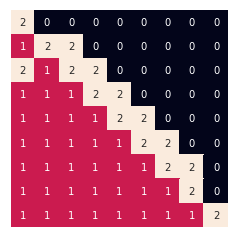

Episode 609	  Score: -131.28
0.047234157581800176


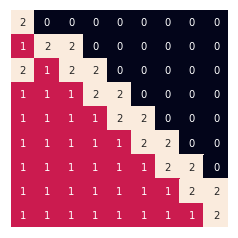

Episode 610	  Score: -79.99
0.046997986793891174


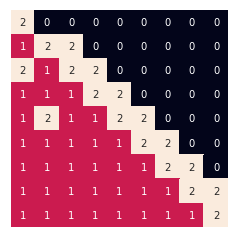

Episode 611	  Score: -137.99
0.04676299685992172


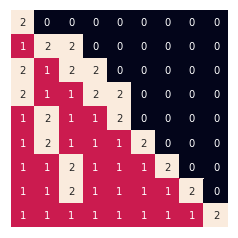

Episode 612	  Score: -98.48
0.04652918187562211


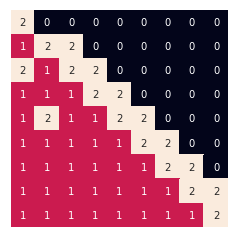

Episode 613	  Score: -152.48
0.046296535966244


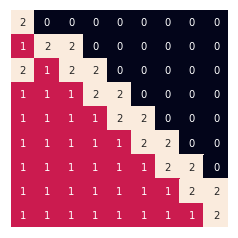

Episode 614	  Score: -112.19
0.046065053286412784


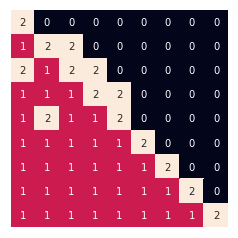

Episode 615	  Score: -85.61
0.04583472801998072


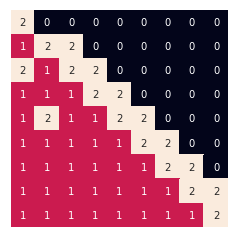

Episode 616	  Score: -90.82
0.045605554379880814


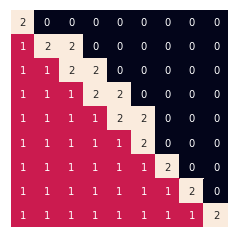

Episode 617	  Score: -108.05
0.04537752660798141


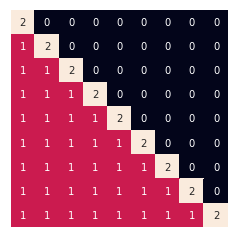

Episode 618	  Score: -83.28
0.0451506389749415


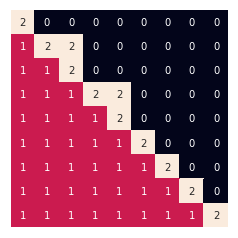

Episode 619	  Score: -144.05
0.044924885780066794


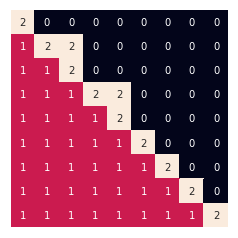

Episode 620	  Score: -89.05
0.04470026135116646


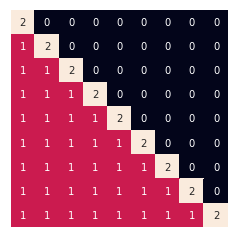

Episode 621	  Score: -73.13
0.04447676004441063


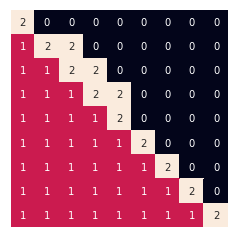

Episode 622	  Score: -103.16
0.04425437624418858


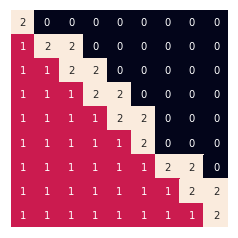

Episode 623	  Score: -171.93
0.04403310436296763


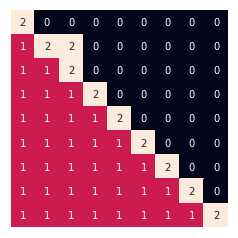

Episode 624	  Score: -105.10
0.043812938841152796


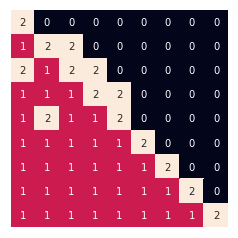

Episode 625	  Score: -57.06
0.04359387414694703


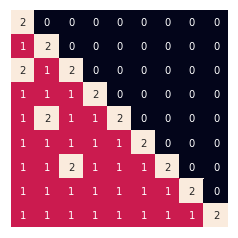

Episode 626	  Score: -134.64
0.043375904776212296


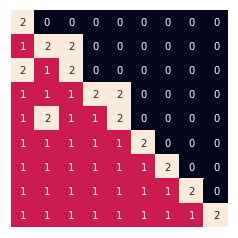

Episode 627	  Score: -80.66
0.043159025252331236


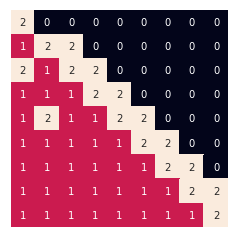

Episode 628	  Score: -150.92
0.04294323012606958


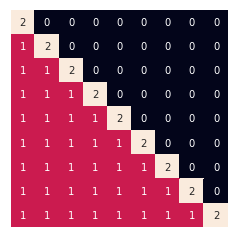

Episode 629	  Score: -147.62
0.04272851397543923


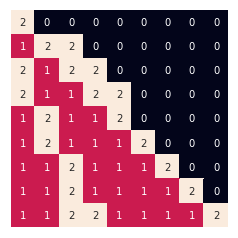

Episode 630	  Score: -107.78
0.04251487140556204


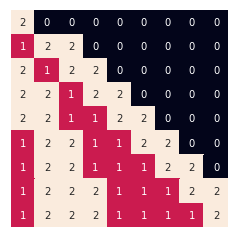

Episode 631	  Score: -121.15
0.04230229704853423


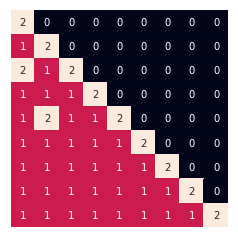

Episode 632	  Score: -98.37
0.04209078556329156


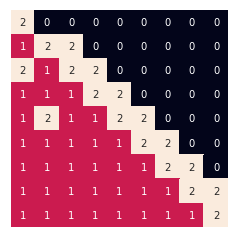

Episode 633	  Score: -72.03
0.0418803316354751


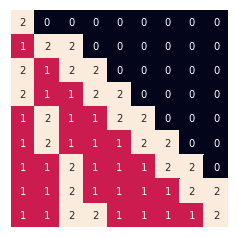

Episode 634	  Score: -114.26
0.041670929977297724


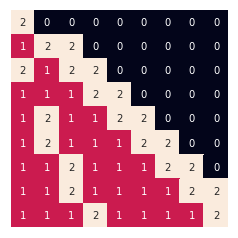

Episode 635	  Score: -116.57
0.04146257532741124


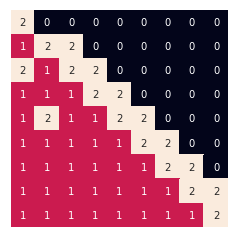

Episode 636	  Score: -101.13
0.04125526245077418


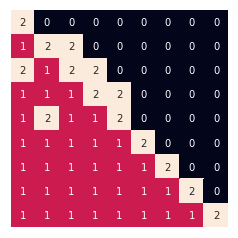

Episode 637	  Score: -114.76
0.04104898613852031


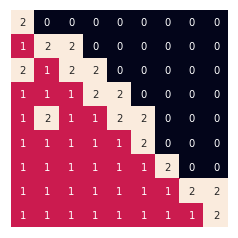

Episode 638	  Score: -110.80
0.04084374120782771


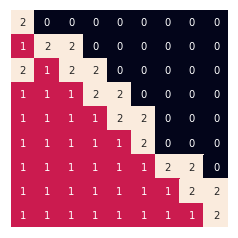

Episode 639	  Score: -126.51
0.04063952250178857


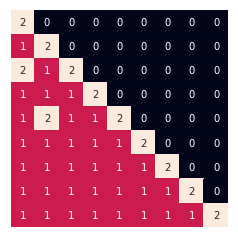

Episode 640	  Score: -86.61
0.04043632488927963


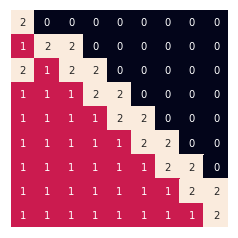

Episode 641	  Score: -99.57
0.04023414326483323


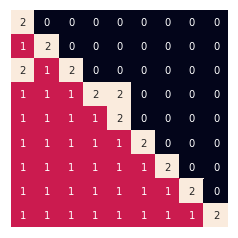

Episode 642	  Score: -130.42
0.040032972548509065


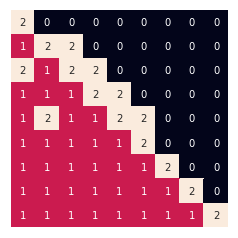

Episode 643	  Score: -114.90
0.03983280768576652


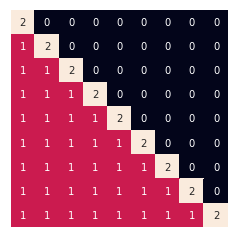

Episode 644	  Score: -103.16
0.03963364364733769


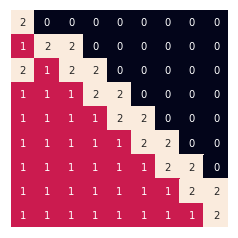

Episode 645	  Score: -84.92
0.039435475429100995


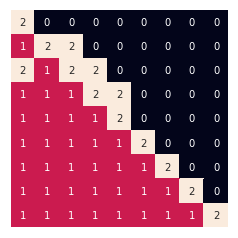

Episode 646	  Score: -84.11
0.03923829805195549


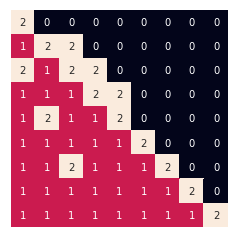

Episode 647	  Score: -105.57
0.03904210656169572


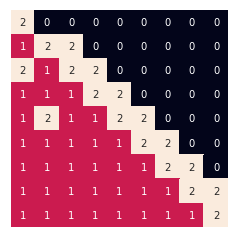

Episode 648	  Score: -109.54
0.03884689602888724


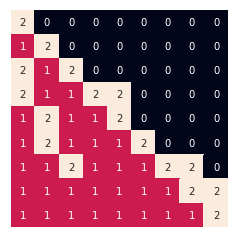

Episode 649	  Score: -114.45
0.0386526615487428


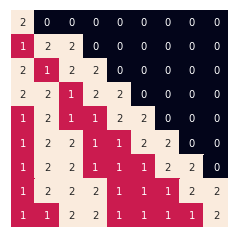

Episode 650	  Score: -98.10
0.03845939824099909


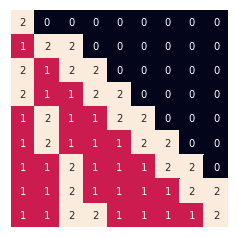

Episode 651	  Score: -103.11
0.03826710124979409


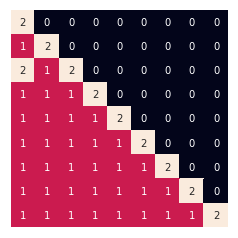

Episode 652	  Score: -82.78
0.038075765743545126


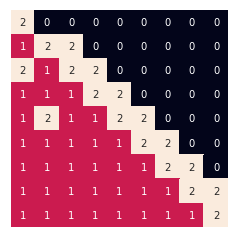

Episode 653	  Score: -98.94
0.0378853869148274


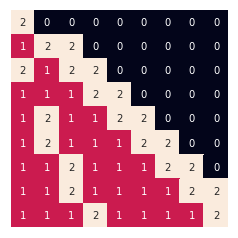

Episode 654	  Score: -137.15
0.03769595998025326


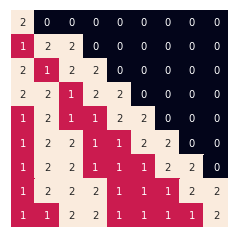

Episode 655	  Score: -98.81
0.03750748018035199


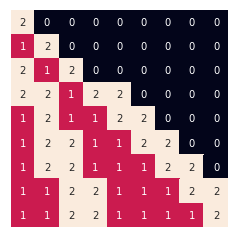

Episode 656	  Score: -88.99
0.037319942779450235


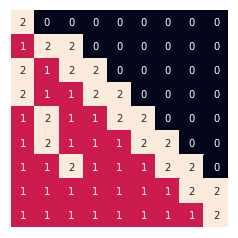

Episode 657	  Score: -86.62
0.037133343065552986


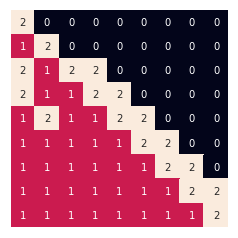

Episode 658	  Score: -88.38
0.03694767635022522


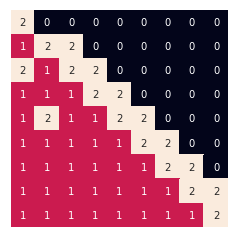

Episode 659	  Score: -108.57
0.036762937968474095


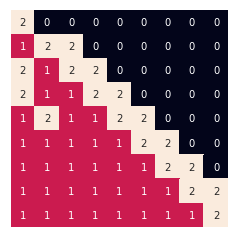

Episode 660	  Score: -145.55
0.03657912327863173


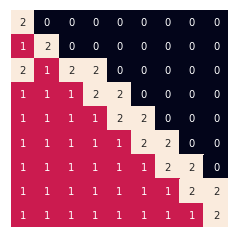

Episode 661	  Score: -94.24
0.036396227662238566


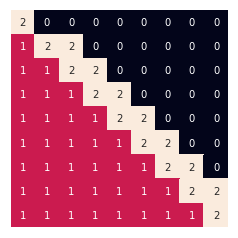

Episode 662	  Score: -111.26
0.03621424652392737


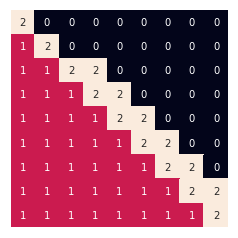

Episode 663	  Score: -70.94
0.036033175291307735


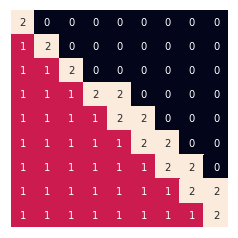

Episode 664	  Score: -130.86
0.03585300941485119


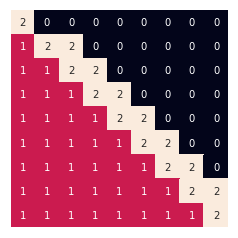

Episode 665	  Score: -65.38
0.035673744367776934


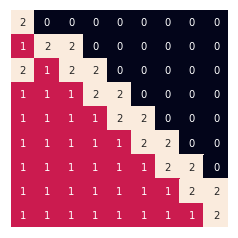

Episode 666	  Score: -142.45
0.03549537564593805


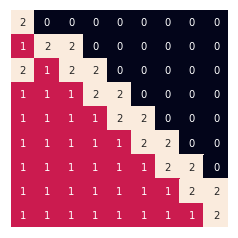

Episode 667	  Score: -119.05
0.035317898767708356


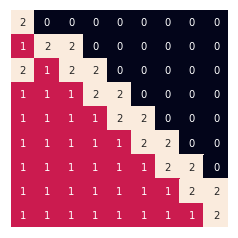

Episode 668	  Score: -94.19
0.03514130927386981


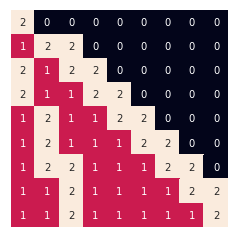

Episode 669	  Score: -131.47
0.03496560272750046


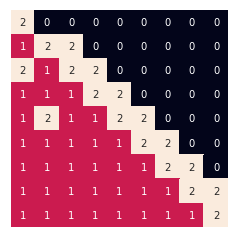

Episode 670	  Score: -129.85
0.03479077471386296


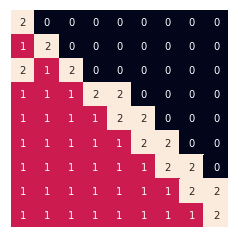

Episode 671	  Score: -121.64
0.03461682084029365


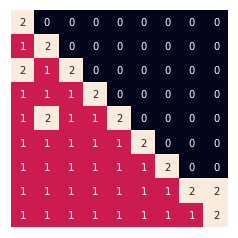

Episode 672	  Score: -71.43
0.034443736736092176


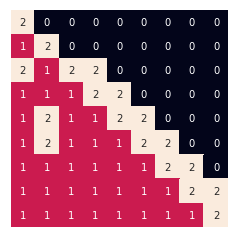

Episode 673	  Score: -101.56
0.034271518052411715


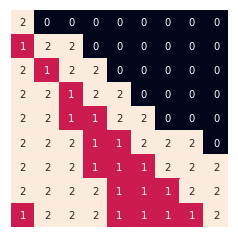

Episode 674	  Score: -113.51
0.034100160462149656


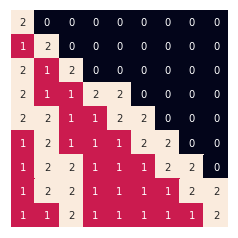

Episode 675	  Score: -52.05
0.03392965965983891


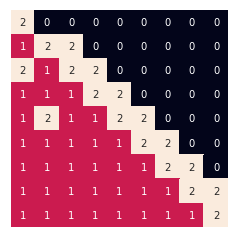

Episode 676	  Score: -66.08
0.033760011361539714


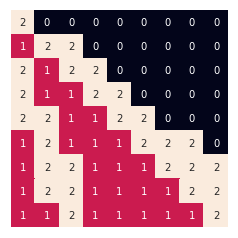

Episode 677	  Score: -103.72
0.03359121130473201


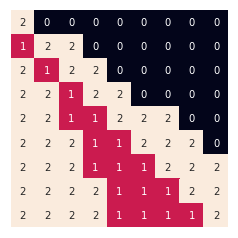

Episode 678	  Score: -100.24
0.033423255248208356


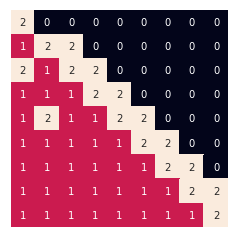

Episode 679	  Score: -159.88
0.03325613897196732


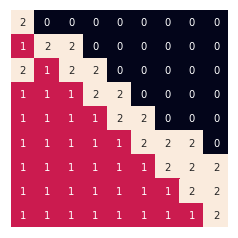

Episode 680	  Score: -88.68
0.03308985827710748


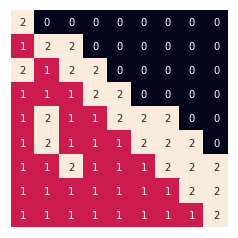

Episode 681	  Score: -86.80
0.032924408985721944


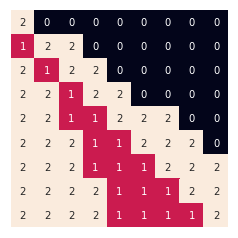

Episode 682	  Score: -106.37
0.03275978694079333


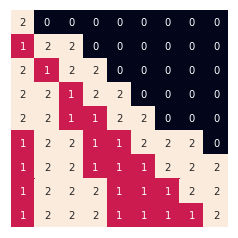

Episode 683	  Score: -87.63
0.032595988006089364


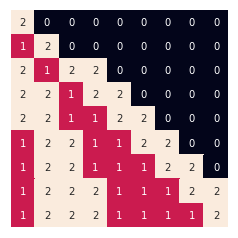

Episode 684	  Score: -74.10
0.032433008066058915


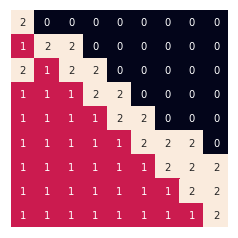

Episode 685	  Score: -73.13
0.03227084302572862


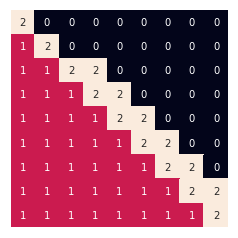

Episode 686	  Score: -107.86
0.032109488810599975


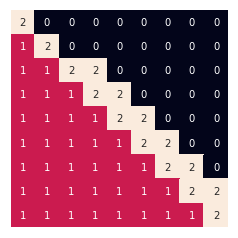

Episode 687	  Score: -83.94
0.031948941366546975


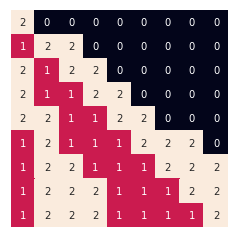

Episode 688	  Score: -52.03
0.03178919665971424


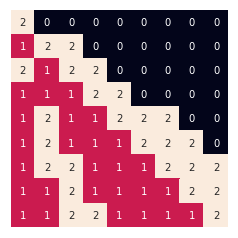

Episode 689	  Score: -94.91
0.03163025067641567


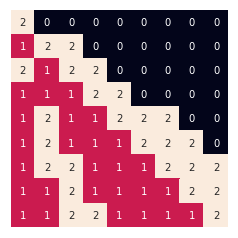

Episode 690	  Score: -76.88
0.03147209942303359


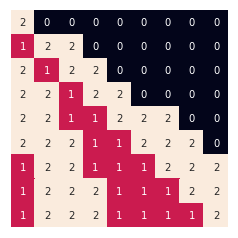

Episode 691	  Score: -155.94
0.03131473892591842


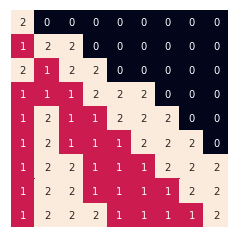

Episode 692	  Score: -88.21
0.031158165231288826


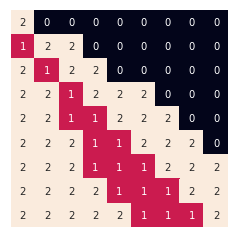

Episode 693	  Score: -74.53
0.03100237440513238


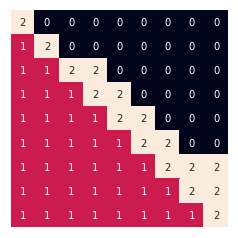

Episode 694	  Score: -96.53
0.030847362533106718


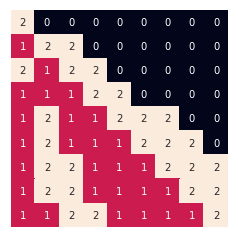

Episode 695	  Score: -100.03
0.030693125720441184


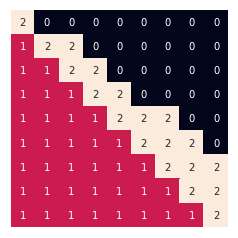

Episode 696	  Score: -74.87
0.030539660091838977


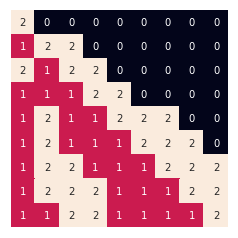

Episode 697	  Score: -89.34
0.03038696179137978


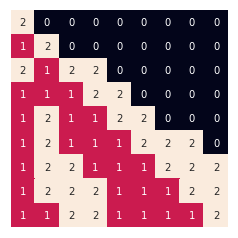

Episode 698	  Score: -97.86
0.030235026982422884


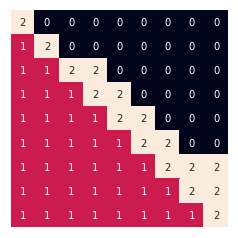

Episode 699	  Score: -87.15
0.030083851847510768


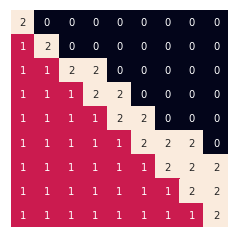

Episode 700	  Score: -104.13
0.029933432588273214


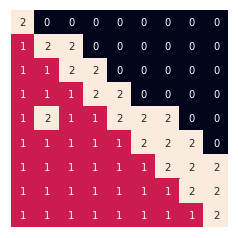

Episode 701	  Score: -100.76
0.029783765425331846


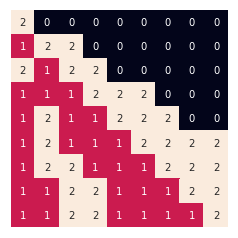

Episode 702	  Score: -83.82
0.029634846598205186


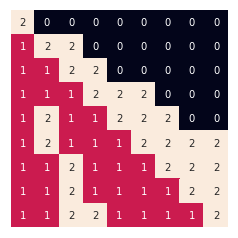

Episode 703	  Score: -100.97
0.02948667236521416


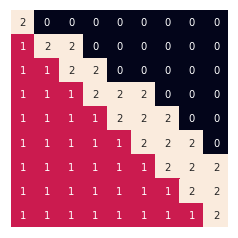

Episode 704	  Score: -27.59
0.029339239003388088


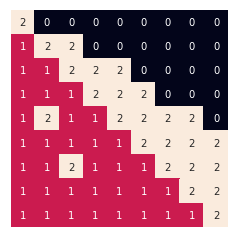

Episode 705	  Score: -140.37
0.029192542808371146


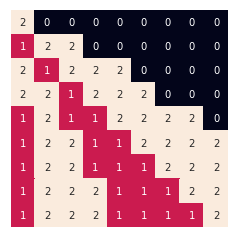

Episode 706	  Score: -66.72
0.02904658009432929


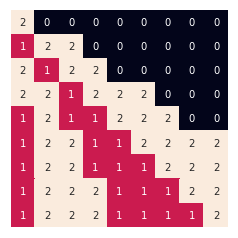

Episode 707	  Score: -80.78
0.028901347193857643


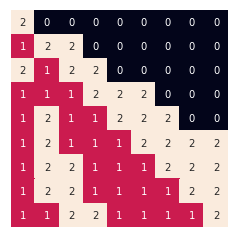

Episode 708	  Score: -76.73
0.028756840457888354


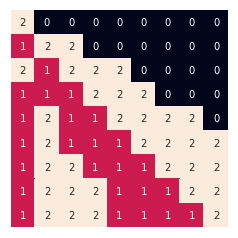

Episode 709	  Score: -99.10
0.02861305625559891


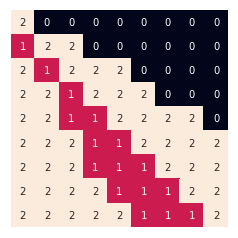

Episode 710	  Score: -71.06
0.028469990974320916


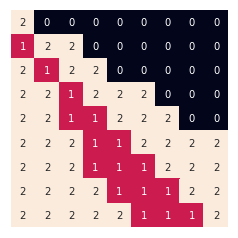

Episode 711	  Score: -93.34
0.02832764101944931


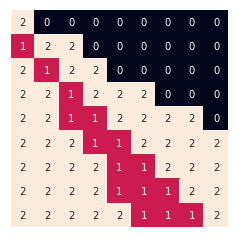

Episode 712	  Score: -124.75
0.028186002814352063


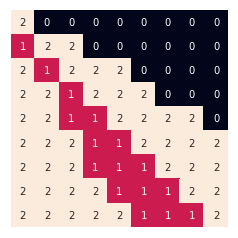

Episode 713	  Score: -88.41
0.0280450728002803


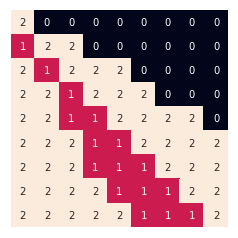

Episode 714	  Score: -60.95
0.0279048474362789


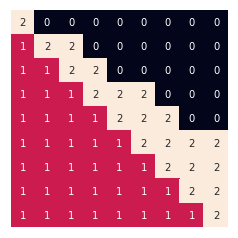

Episode 715	  Score: -110.32
0.027765323199097504


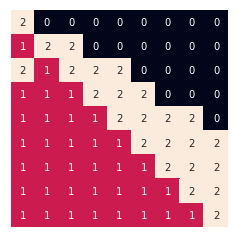

Episode 716	  Score: -64.23
0.027626496583102015


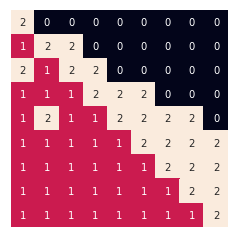

Episode 717	  Score: -56.94
0.027488364100186506


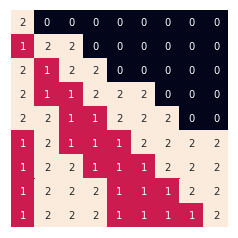

Episode 718	  Score: -71.86
0.027350922279685573


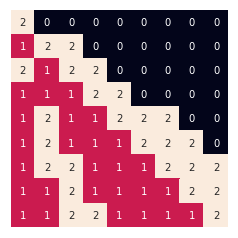

Episode 719	  Score: -89.73
0.027214167668287145


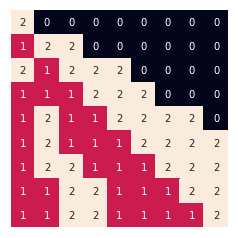

Episode 720	  Score: -99.85
0.02707809682994571


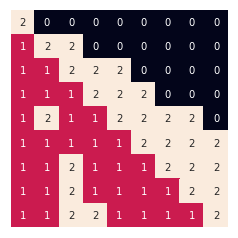

Episode 721	  Score: -88.19
0.02694270634579598


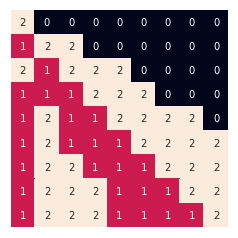

Episode 722	  Score: -120.10
0.026807992814067


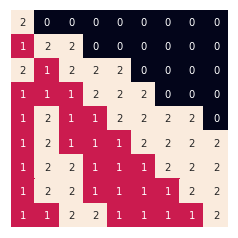

Episode 723	  Score: -73.73
0.026673952849996664


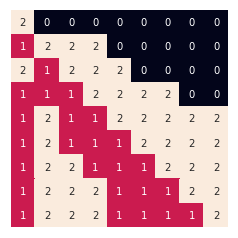

Episode 724	  Score: -90.27
0.02654058308574668


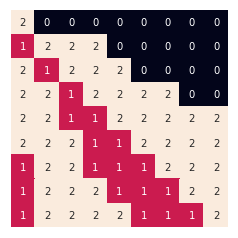

Episode 725	  Score: -114.59
0.026407880170317945


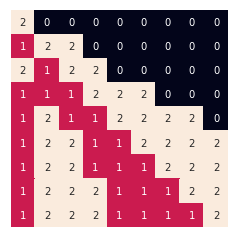

Episode 726	  Score: -108.34
0.026275840769466357


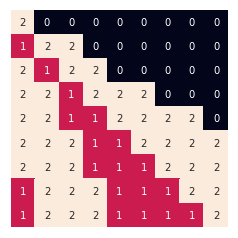

Episode 727	  Score: -65.48
0.026144461565619025


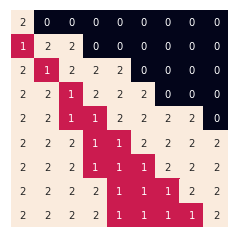

Episode 728	  Score: -102.62
0.02601373925779093


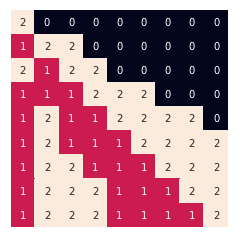

Episode 729	  Score: -91.05
0.025883670561501974


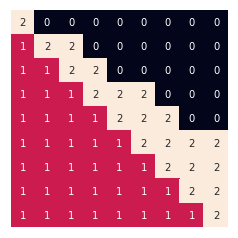

Episode 730	  Score: -101.63
0.025754252208694463


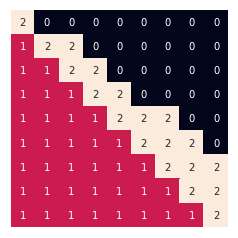

Episode 731	  Score: -80.43
0.02562548094765099


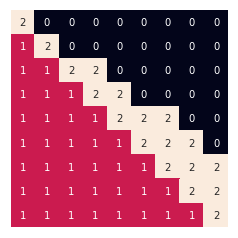

Episode 732	  Score: -80.91
0.025497353542912736


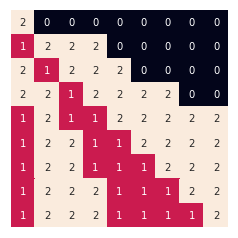

Episode 733	  Score: -73.67
0.02536986677519817


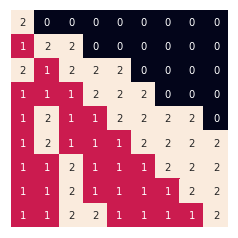

Episode 734	  Score: -100.35
0.02524301744132218


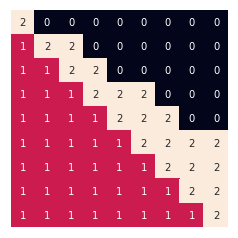

Episode 735	  Score: -69.62
0.025116802354115567


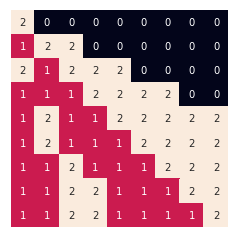

Episode 736	  Score: -95.75
0.024991218342344988


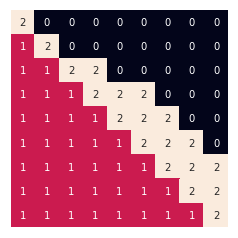

Episode 737	  Score: -67.86
0.024866262250633264


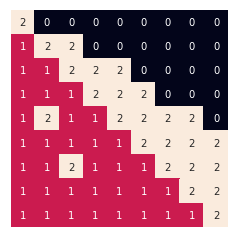

Episode 738	  Score: -60.37
0.024741930939380097


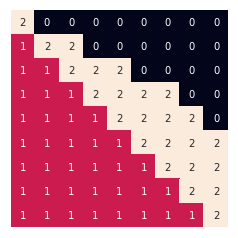

Episode 739	  Score: -55.05
0.024618221284683196


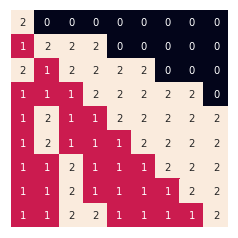

Episode 740	  Score: -85.19
0.02449513017825978


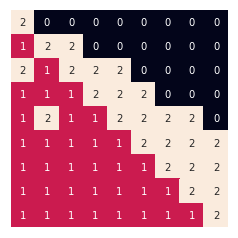

Episode 741	  Score: -97.19
0.02437265452736848


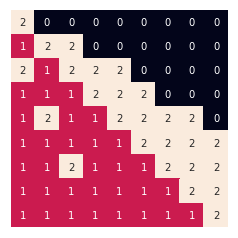

Episode 742	  Score: -31.05
0.024250791254731636


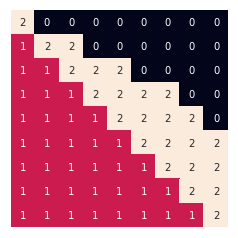

Episode 743	  Score: -106.62
0.024129537298457977


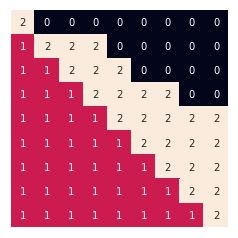

Episode 744	  Score: -67.38
0.024008889611965685


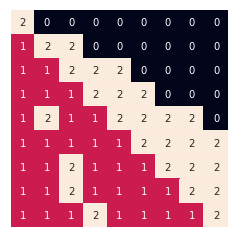

Episode 745	  Score: -91.05
0.023888845163905856


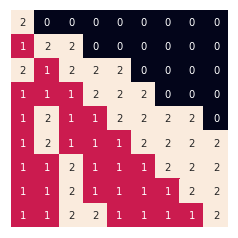

Episode 746	  Score: -73.87
0.023769400938086327


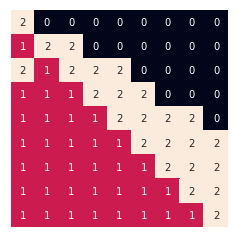

Episode 747	  Score: -52.16
0.023650553933395897


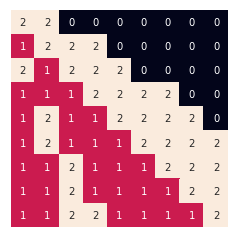

Episode 748	  Score: -84.66
0.023532301163728918


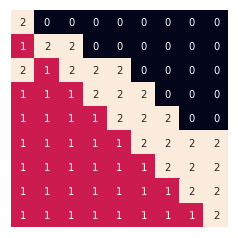

Episode 749	  Score: -96.51
0.023414639657910272


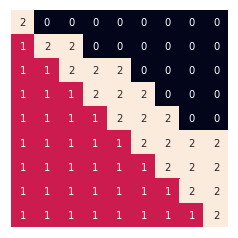

Episode 750	  Score: -52.25
0.023297566459620722


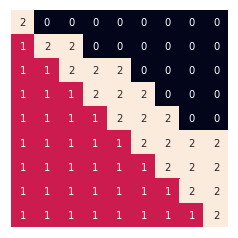

Episode 751	  Score: -94.40
0.023181078627322618


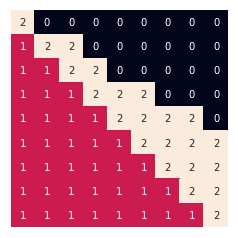

Episode 752	  Score: -75.35
0.023065173234186005


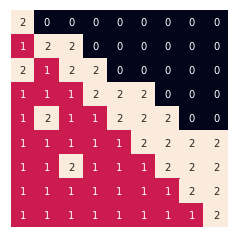

Episode 753	  Score: -88.76
0.022949847368015076


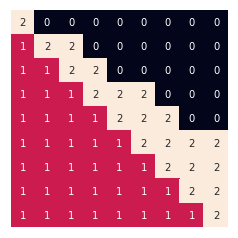

Episode 754	  Score: -101.94
0.022835098131175


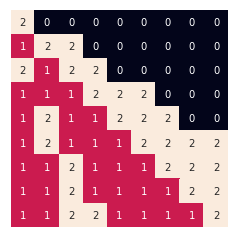

Episode 755	  Score: -109.48
0.022720922640519125


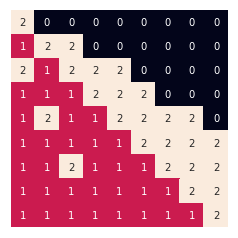

Episode 756	  Score: -75.59
0.02260731802731653


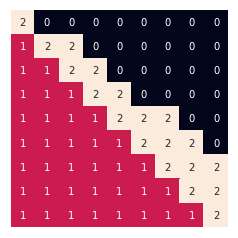

Episode 757	  Score: -87.04
0.022494281437179946


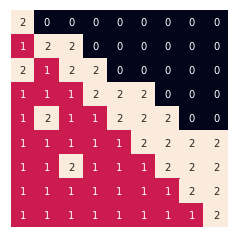

Episode 758	  Score: -72.13
0.022381810029994047


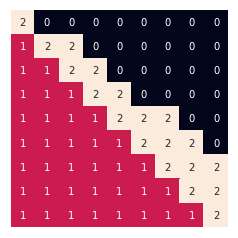

Episode 759	  Score: -80.46
0.022269900979844076


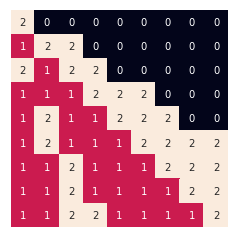

Episode 760	  Score: -91.51
0.022158551474944856


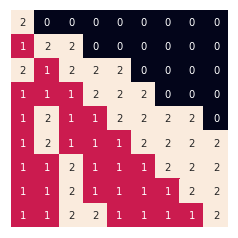

Episode 761	  Score: -83.35
0.022047758717570132


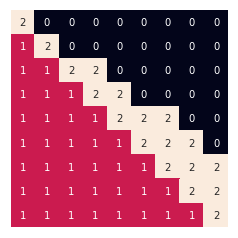

Episode 762	  Score: -90.51
0.021937519923982282


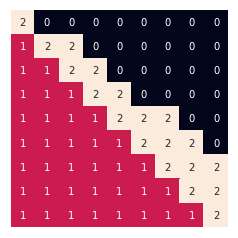

Episode 763	  Score: -87.53
0.021827832324362372


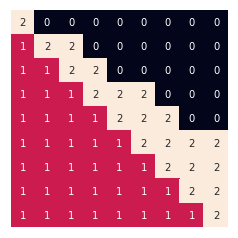

Episode 764	  Score: -67.49
0.02171869316274056


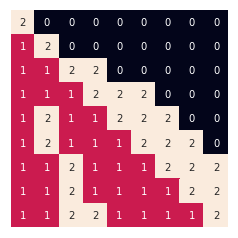

Episode 765	  Score: -83.62
0.021610099696926857


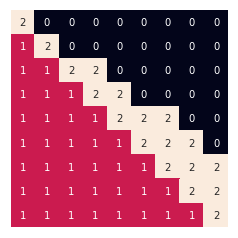

Episode 766	  Score: -85.16
0.021502049198442223


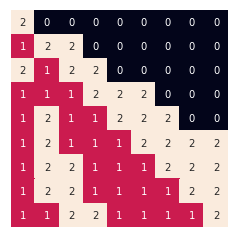

Episode 767	  Score: -87.38
0.021394538952450012


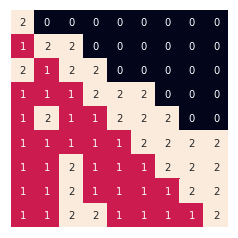

Episode 768	  Score: -127.85
0.02128756625768776


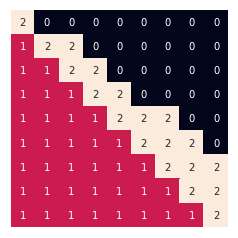

Episode 769	  Score: -118.09
0.021181128426399323


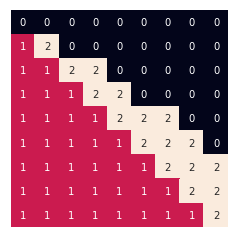

Episode 770	  Score: -120.85
0.021075222784267326


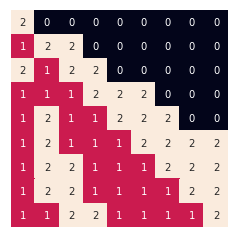

Episode 771	  Score: -81.95
0.020969846670345987


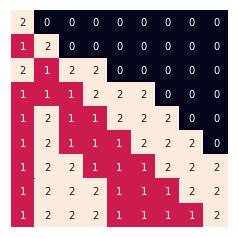

Episode 772	  Score: -66.73
0.020864997436994256


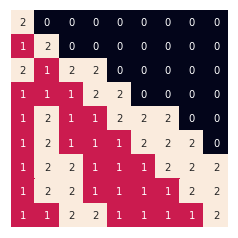

Episode 773	  Score: -49.51
0.020760672449809284


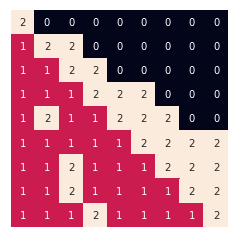

Episode 774	  Score: -95.87
0.020656869087560238


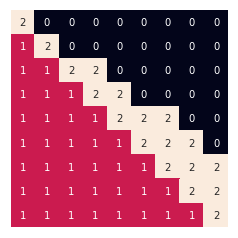

Episode 775	  Score: -96.86
0.020553584742122436


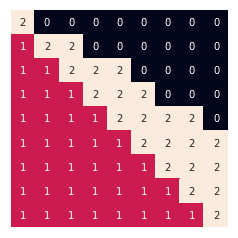

Episode 776	  Score: -68.51
0.020450816818411825


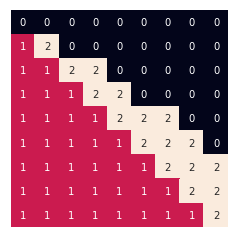

Episode 777	  Score: -61.92
0.020348562734319765


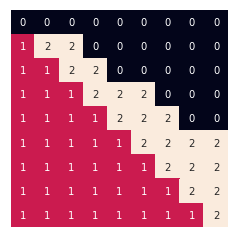

Episode 778	  Score: -74.73
0.020246819920648168


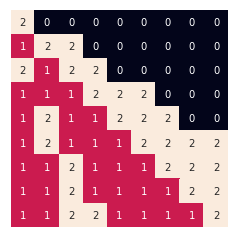

Episode 779	  Score: -78.53
0.020145585821044927


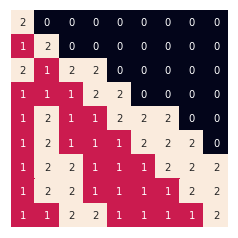

Episode 780	  Score: -89.46
0.020044857891939702


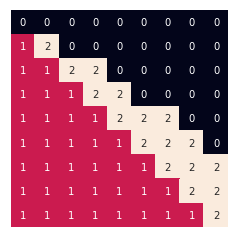

Episode 781	  Score: -52.63
0.019944633602480003


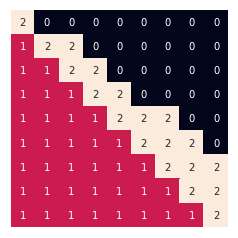

Episode 782	  Score: -99.97
0.019844910434467605


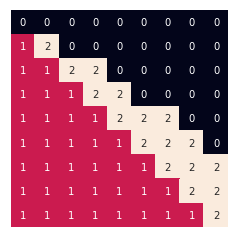

Episode 783	  Score: -87.29
0.019745685882295267


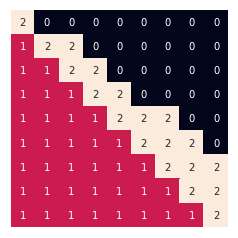

Episode 784	  Score: -91.18
0.01964695745288379


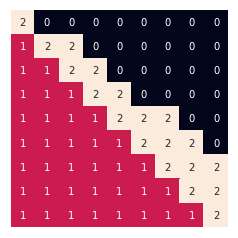

Episode 785	  Score: -78.27
0.01954872266561937


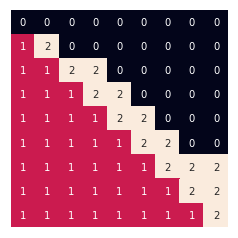

Episode 786	  Score: -55.89
0.019450979052291272


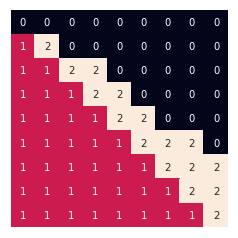

Episode 787	  Score: -66.87
0.019353724157029815


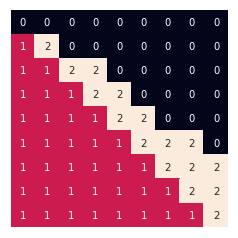

Episode 788	  Score: -73.34
0.019256955536244666


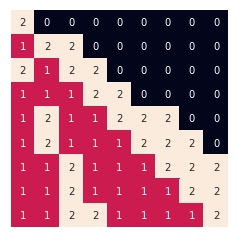

Episode 789	  Score: -84.27
0.019160670758563442


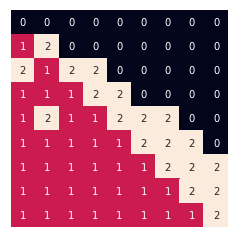

Episode 790	  Score: -77.20
0.019064867404770626


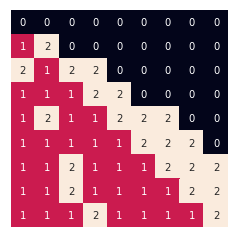

Episode 791	  Score: -79.13
0.018969543067746772


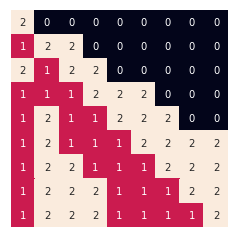

Episode 792	  Score: -71.92
0.018874695352408037


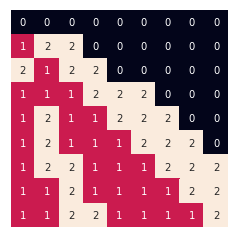

Episode 793	  Score: -82.81
0.018780321875645996


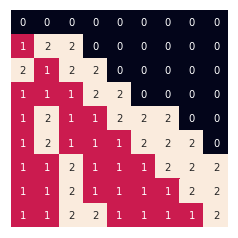

Episode 794	  Score: -47.89
0.018686420266267767


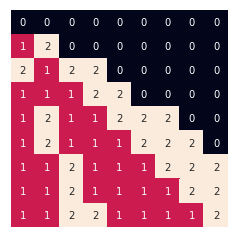

Episode 795	  Score: -51.99
0.018592988164936427


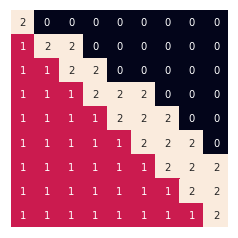

Episode 796	  Score: -68.38
0.018500023224111744


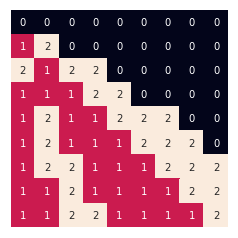

Episode 797	  Score: -98.65
0.018407523107991184


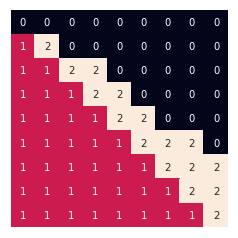

Episode 798	  Score: -84.72
0.01831548549245123


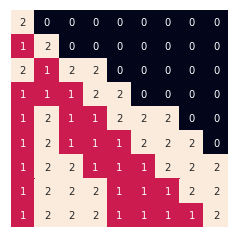

Episode 799	  Score: -74.75
0.018223908064988973


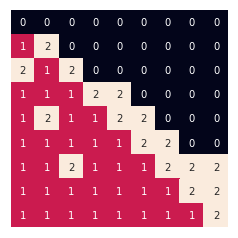

Episode 800	  Score: -67.62
0.018132788524664028


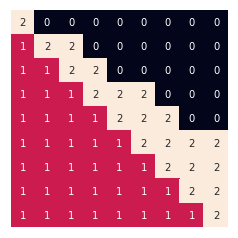

Episode 801	  Score: -91.79
0.018042124582040707


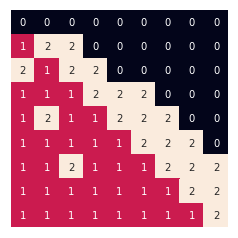

Episode 802	  Score: -51.13
0.017951913959130504


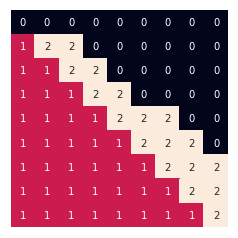

Episode 803	  Score: -49.25
0.01786215438933485


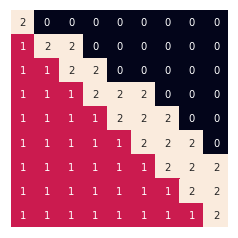

Episode 804	  Score: -104.70
0.017772843617388175


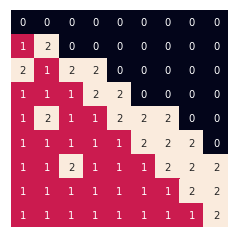

Episode 805	  Score: -62.11
0.017683979399301233


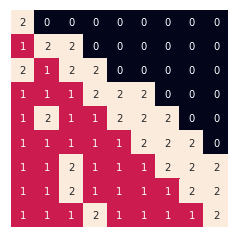

Episode 806	  Score: -69.56
0.017595559502304726


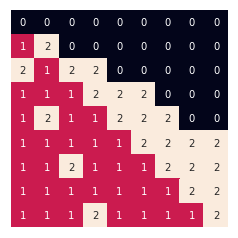

Episode 807	  Score: -61.57
0.0175075817047932


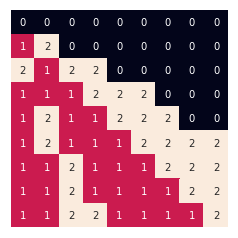

Episode 808	  Score: -79.35
0.017420043796269234


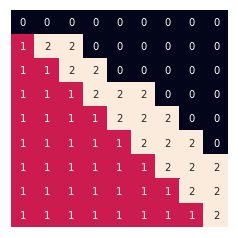

Episode 809	  Score: -85.32
0.017332943577287888


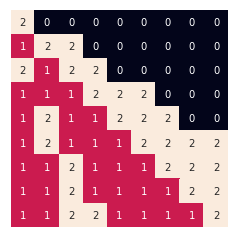

Episode 810	  Score: -92.56
0.01724627885940145


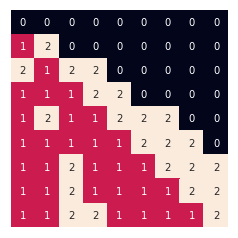

Episode 811	  Score: -82.84
0.017160047465104442


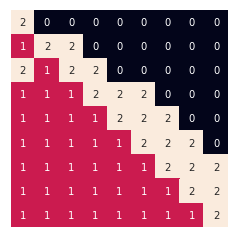

Episode 812	  Score: -71.10
0.01707424722777892


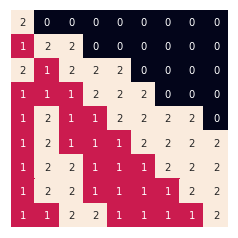

Episode 813	  Score: -102.81
0.016988875991640028


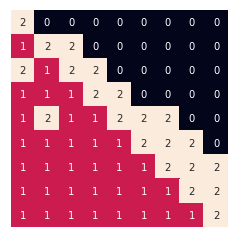

Episode 814	  Score: -50.08
0.016903931611681827


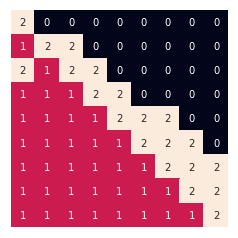

Episode 815	  Score: -66.82
0.01681941195362342


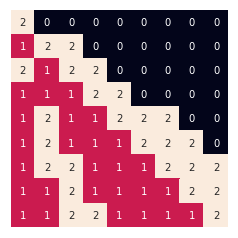

Episode 816	  Score: -63.94
0.016735314893855303


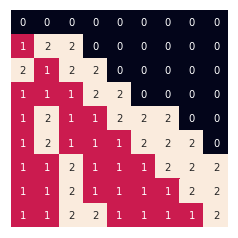

Episode 817	  Score: -56.32
0.016651638319386028


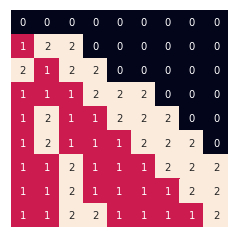

Episode 818	  Score: -65.29
0.0165683801277891


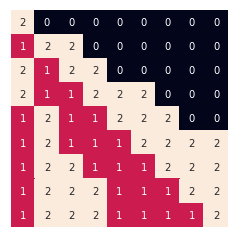

Episode 819	  Score: -22.10
0.016485538227150154


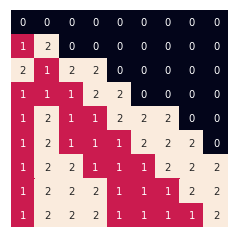

Episode 820	  Score: -102.81
0.0164031105360144


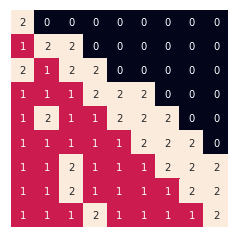

Episode 821	  Score: -94.91
0.01632109498333433


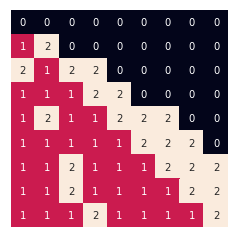

Episode 822	  Score: -44.76
0.016239489508417658


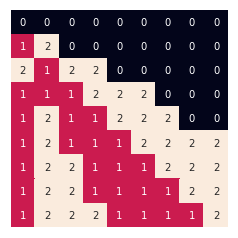

Episode 823	  Score: -121.37
0.01615829206087557


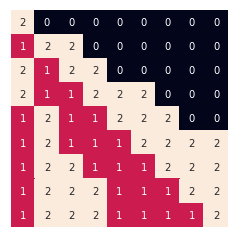

Episode 824	  Score: -76.03
0.01607750060057119


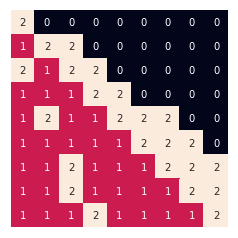

Episode 825	  Score: -93.10
0.015997113097568336


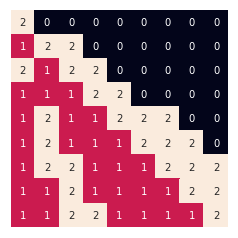

Episode 826	  Score: -25.75
0.015917127532080494


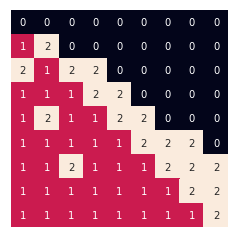

Episode 827	  Score: -41.72
0.01583754189442009


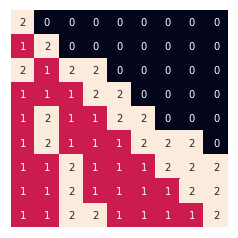

Episode 828	  Score: -44.49
0.01575835418494799


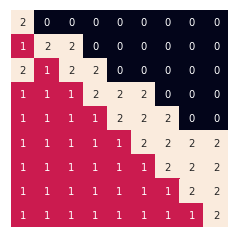

Episode 829	  Score: -57.51
0.01567956241402325


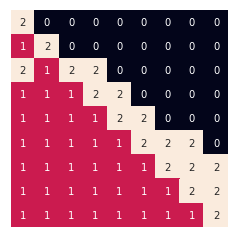

Episode 830	  Score: -89.16
0.015601164601953134


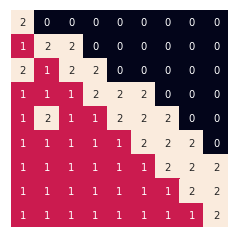

Episode 831	  Score: -94.63
0.015523158778943369


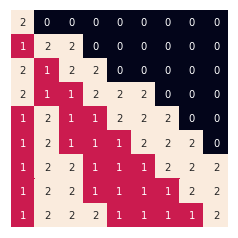

Episode 832	  Score: -94.51
0.015445542985048652


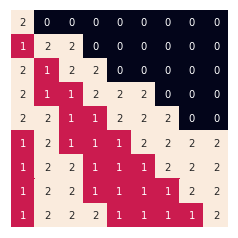

Episode 833	  Score: -76.99
0.015368315270123408


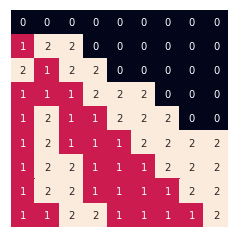

Episode 834	  Score: -86.94
0.01529147369377279


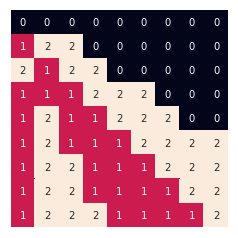

Episode 835	  Score: -62.27
0.015215016325303928


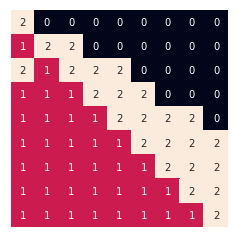

Episode 836	  Score: -97.27
0.015138941243677408


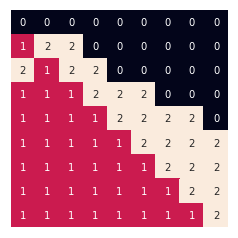

Episode 837	  Score: -115.89
0.01506324653745902


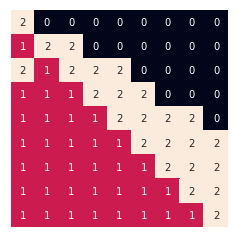

Episode 838	  Score: -72.39
0.014987930304771725


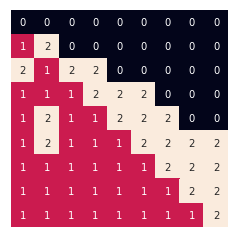

Episode 839	  Score: -105.18
0.014912990653247866


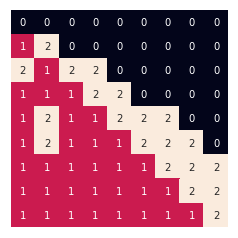

Episode 840	  Score: -107.75
0.014838425699981627


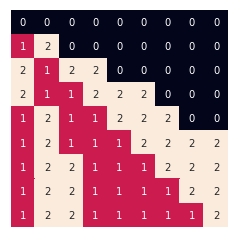

Episode 841	  Score: -57.78
0.01476423357148172


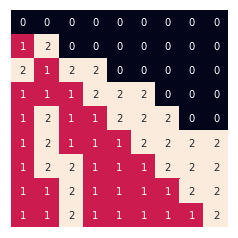

Episode 842	  Score: -52.29
0.014690412403624311


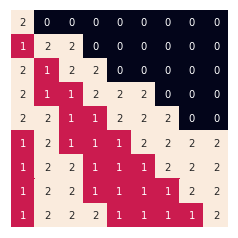

Episode 843	  Score: -49.27
0.01461696034160619


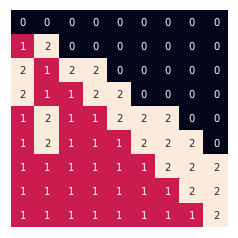

Episode 844	  Score: -89.08
0.014543875539898159


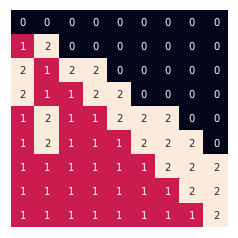

Episode 845	  Score: -64.95
0.014471156162198668


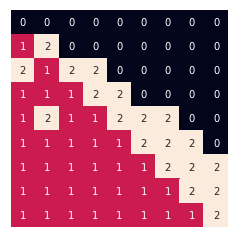

Episode 846	  Score: -73.46
0.014398800381387675


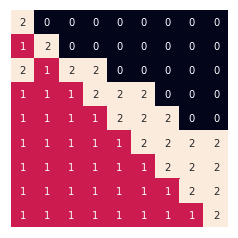

Episode 847	  Score: -107.49
0.014326806379480736


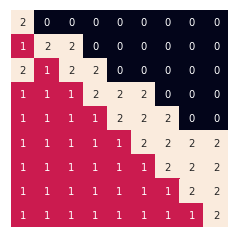

Episode 848	  Score: -61.91
0.014255172347583332


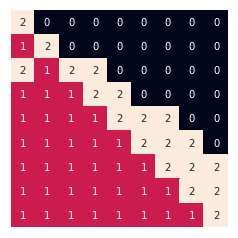

Episode 849	  Score: -57.10
0.014183896485845416


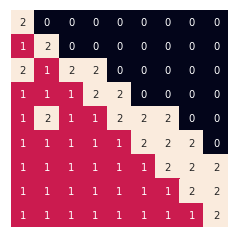

Episode 850	  Score: -68.08
0.014112977003416188


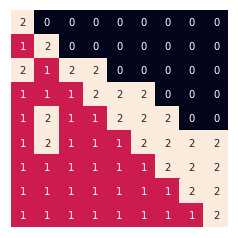

Episode 851	  Score: -75.91
0.014042412118399107


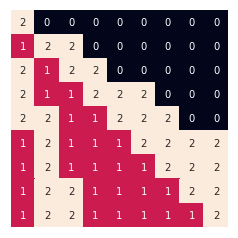

Episode 852	  Score: -64.94
0.013972200057807112


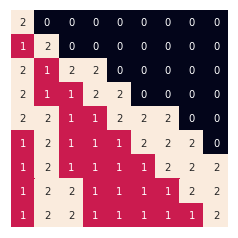

Episode 853	  Score: -87.73
0.013902339057518077


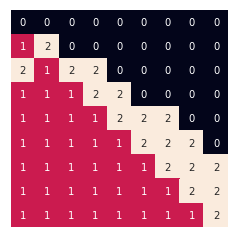

Episode 854	  Score: -70.80
0.013832827362230486


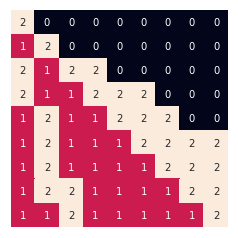

Episode 855	  Score: -59.53
0.013763663225419333


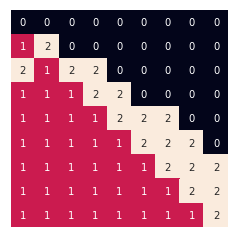

Episode 856	  Score: -68.10
0.013694844909292236


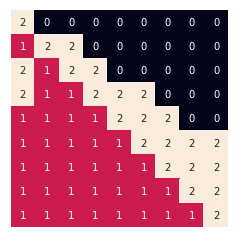

Episode 857	  Score: -93.91
0.013626370684745774


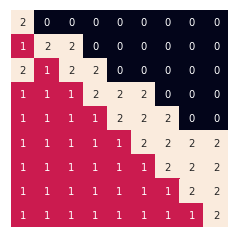

Episode 858	  Score: -65.63
0.013558238831322046


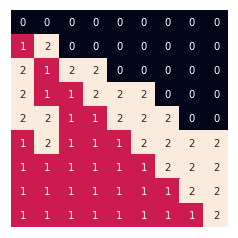

Episode 859	  Score: -71.87
0.013490447637165436


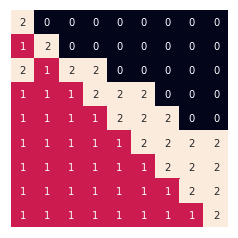

Episode 860	  Score: -64.35
0.013422995398979608


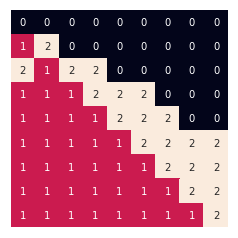

Episode 861	  Score: -94.67
0.01335588042198471


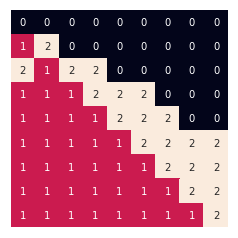

Episode 862	  Score: -91.78
0.013289101019874787


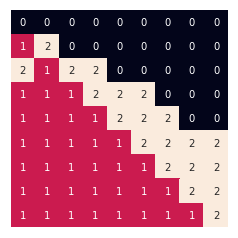

Episode 863	  Score: -89.87
0.013222655514775413


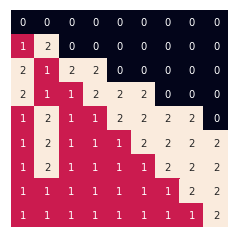

Episode 864	  Score: -84.72
0.013156542237201536


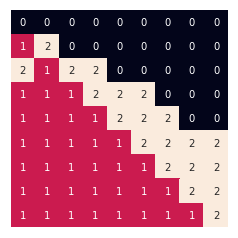

Episode 865	  Score: -85.78
0.013090759526015528


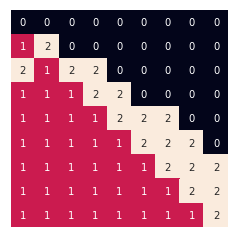

Episode 866	  Score: -82.24
0.01302530572838545


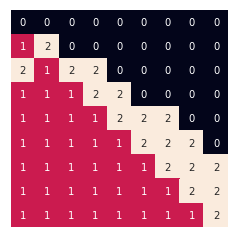

Episode 867	  Score: -44.25
0.012960179199743523


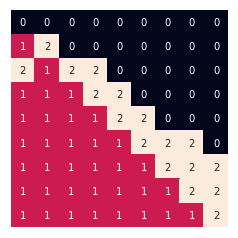

Episode 868	  Score: -92.80
0.012895378303744804


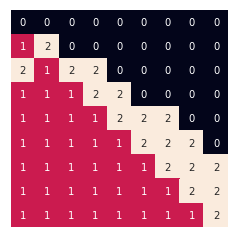

Episode 869	  Score: -89.89
0.01283090141222608


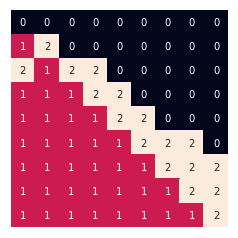

Episode 870	  Score: -94.63
0.012766746905164949


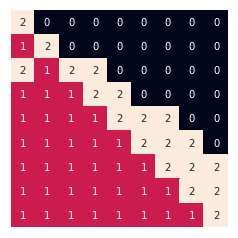

Episode 871	  Score: -55.51
0.012702913170639124


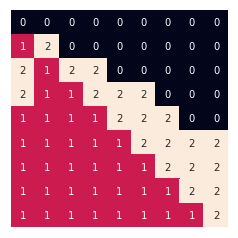

Episode 872	  Score: -80.80
0.012639398604785928


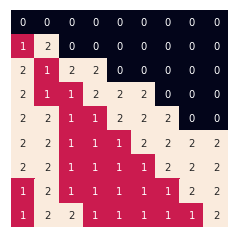

Episode 873	  Score: -52.35
0.012576201611761997


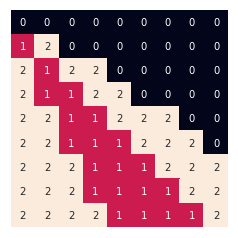

Episode 874	  Score: -80.44
0.012513320603703188


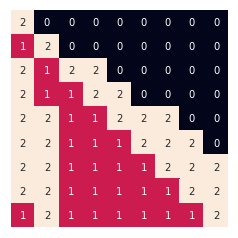

Episode 875	  Score: -56.11
0.012450754000684672


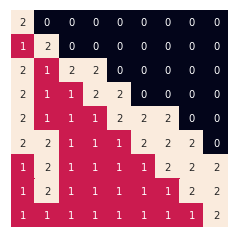

Episode 876	  Score: -41.11
0.012388500230681249


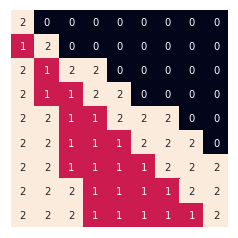

Episode 877	  Score: -103.56
0.012326557729527843


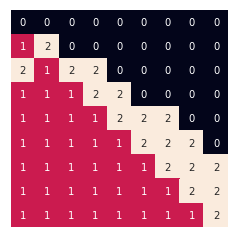

Episode 878	  Score: -80.15
0.012264924940880204


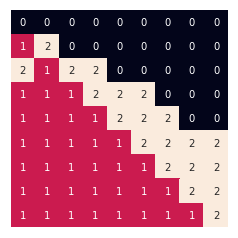

Episode 879	  Score: -83.22
0.012203600316175803


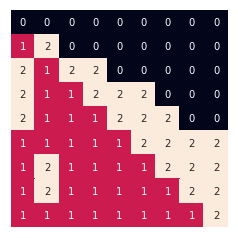

Episode 880	  Score: -61.99
0.012142582314594924


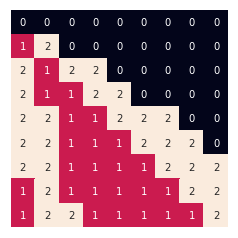

Episode 881	  Score: -80.30
0.01208186940302195


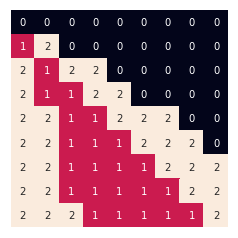

Episode 882	  Score: -86.72
0.01202146005600684


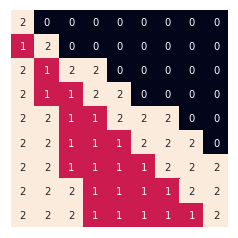

Episode 883	  Score: -104.73
0.011961352755726806


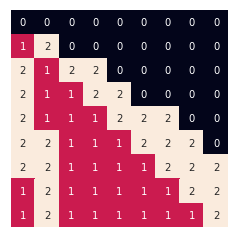

Episode 884	  Score: -52.67
0.01190154599194817


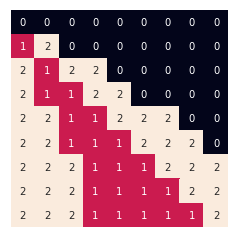

Episode 885	  Score: -67.03
0.01184203826198843


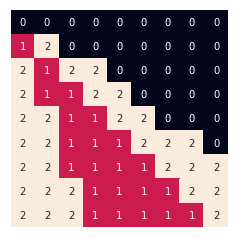

Episode 886	  Score: -87.16
0.011782828070678488


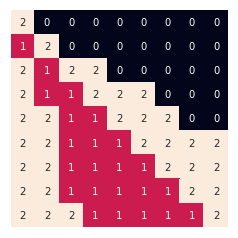

Episode 887	  Score: -27.54
0.011723913930325095


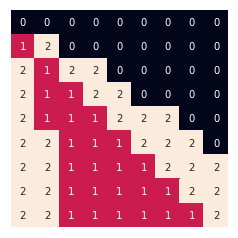

Episode 888	  Score: -110.70
0.01166529436067347


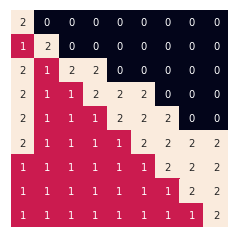

Episode 889	  Score: -81.13
0.011606967888870102


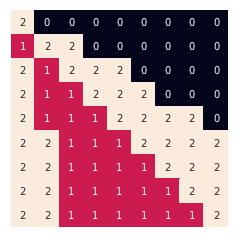

Episode 890	  Score: -57.34
0.01154893304942575


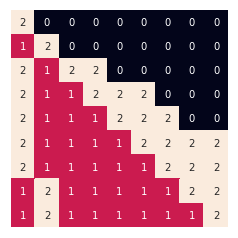

Episode 891	  Score: -54.86
0.011491188384178622


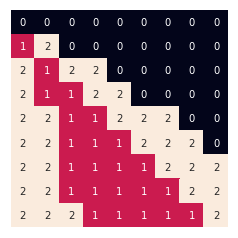

Episode 892	  Score: -64.63
0.011433732442257729


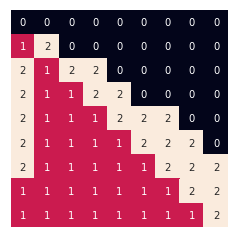

Episode 893	  Score: -64.72
0.01137656378004644


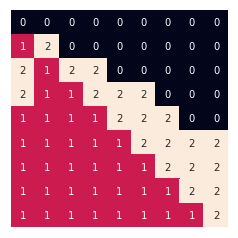

Episode 894	  Score: -71.25
0.011319680961146208


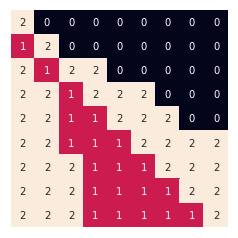

Episode 895	  Score: -77.54
0.011263082556340478


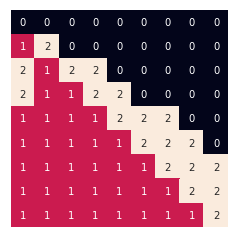

Episode 896	  Score: -61.68
0.011206767143558775


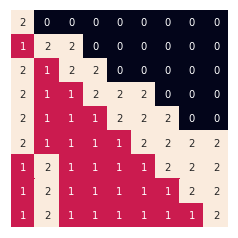

Episode 897	  Score: -47.16
0.011150733307840981


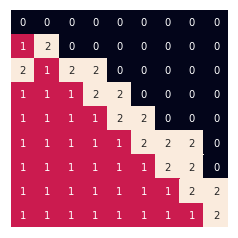

Episode 898	  Score: -104.16
0.011094979641301777


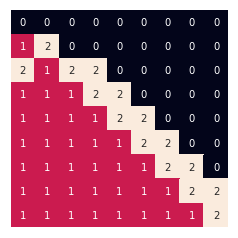

Episode 899	  Score: -54.27
0.011039504743095268


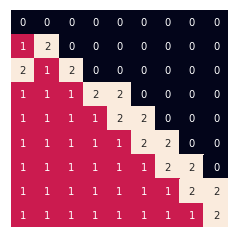

Episode 900	  Score: -82.65
0.01098430721937979


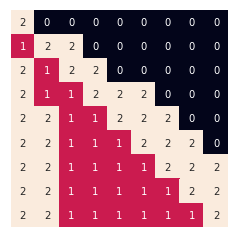

Episode 901	  Score: -53.30
0.010929385683282892


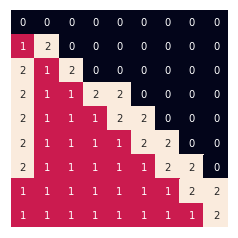

Episode 902	  Score: -55.99
0.010874738754866477


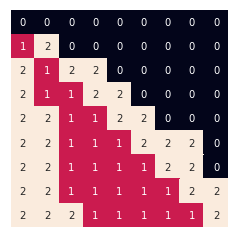

Episode 903	  Score: -64.67
0.010820365061092144


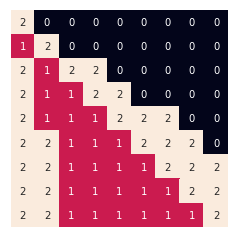

Episode 904	  Score: -72.16
0.010766263235786683


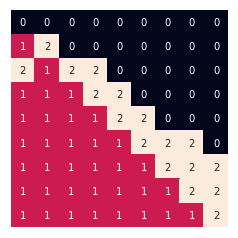

Episode 905	  Score: -53.70
0.01071243191960775


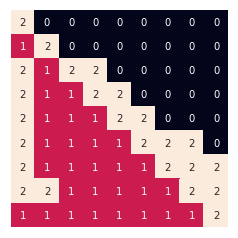

Episode 906	  Score: -62.72
0.010658869760009713


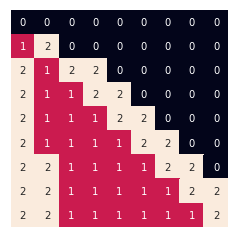

Episode 907	  Score: -67.67
0.010605575411209664


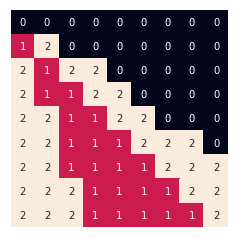

Episode 908	  Score: -67.32
0.010552547534153616


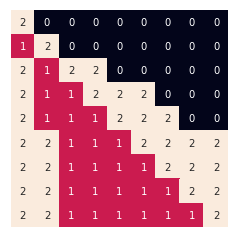

Episode 909	  Score: -50.63
0.010499784796482848


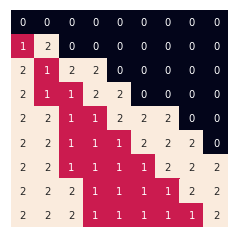

Episode 910	  Score: -66.94
0.010447285872500434


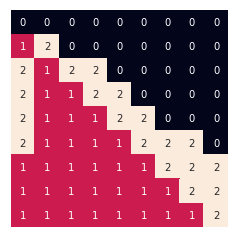

Episode 911	  Score: -47.91
0.01039504944313793


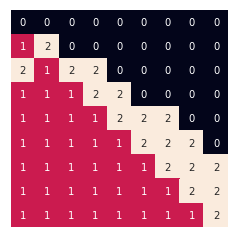

Episode 912	  Score: -75.15
0.010343074195922241


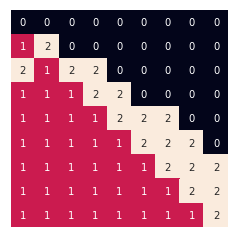

Episode 913	  Score: -55.67
0.01029135882494263


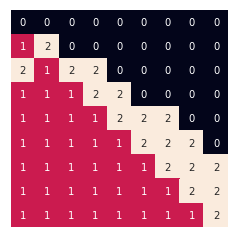

Episode 914	  Score: -76.78
0.010239902030817916


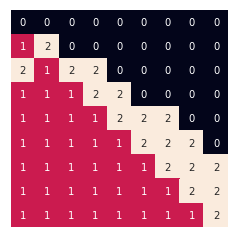

Episode 915	  Score: -47.49
0.010188702520663827


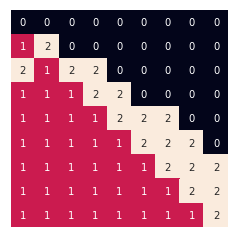

Episode 916	  Score: -76.37
0.010137759008060509


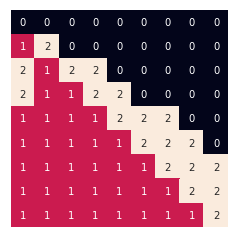

Episode 917	  Score: -64.73
0.010087070213020206


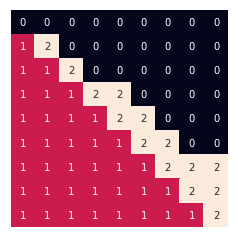

Episode 918	  Score: -54.13
0.010036634861955105


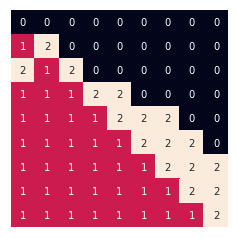

Episode 919	  Score: -52.54
0.01


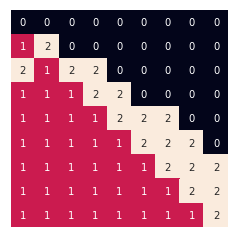

Episode 920	  Score: -107.34
0.01


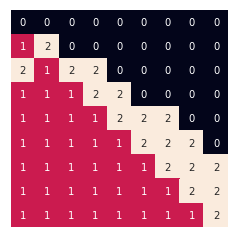

Episode 921	  Score: -71.87
0.01


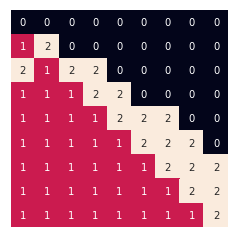

Episode 922	  Score: -79.63
0.01


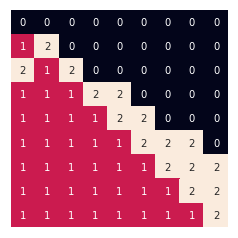

Episode 923	  Score: -93.08
0.01


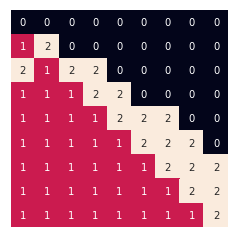

Episode 924	  Score: -73.91
0.01


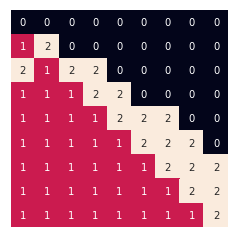

Episode 925	  Score: -69.06
0.01


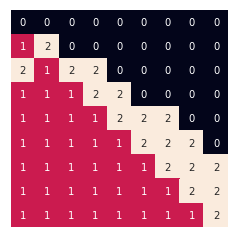

Episode 926	  Score: -58.11
0.01


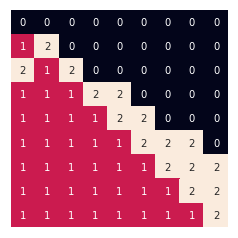

Episode 927	  Score: -64.38
0.01


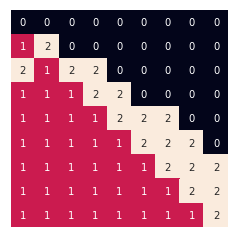

Episode 928	  Score: -62.87
0.01


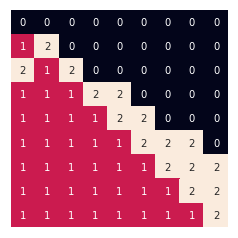

Episode 929	  Score: -65.22
0.01


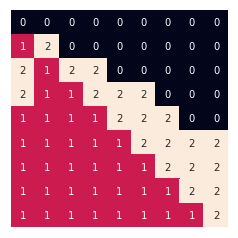

Episode 930	  Score: -42.11
0.01


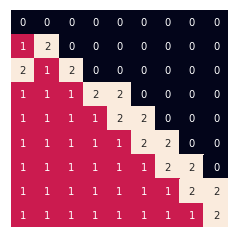

Episode 931	  Score: -41.34
0.01


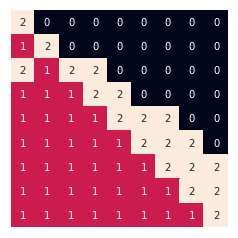

Episode 932	  Score: -50.84
0.01


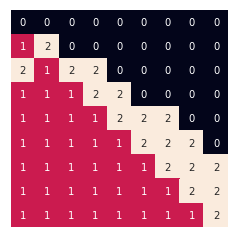

Episode 933	  Score: -44.46
0.01


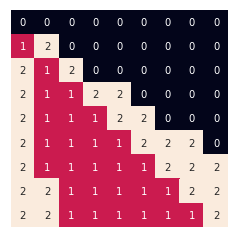

Episode 934	  Score: -36.59
0.01


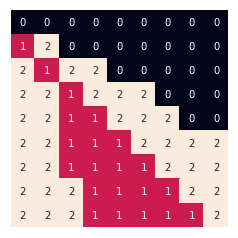

Episode 935	  Score: -82.62
0.01


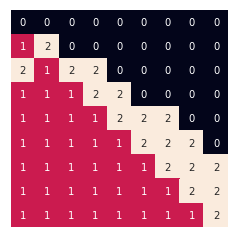

Episode 936	  Score: -37.22
0.01


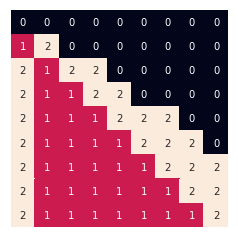

Episode 937	  Score: -62.16
0.01


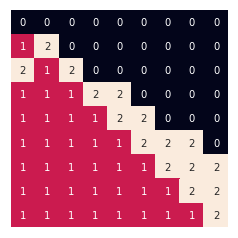

Episode 938	  Score: -44.86
0.01


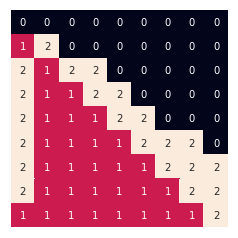

Episode 939	  Score: -70.84
0.01


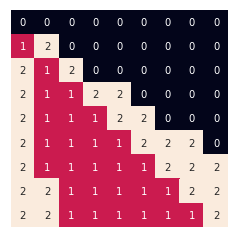

Episode 940	  Score: -21.30
0.01


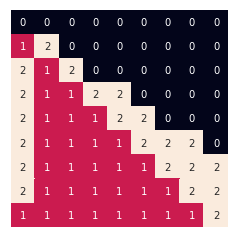

Episode 941	  Score: -69.94
0.01


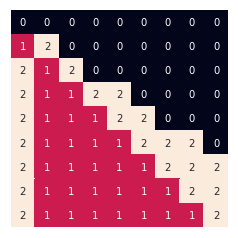

Episode 942	  Score: -93.05
0.01


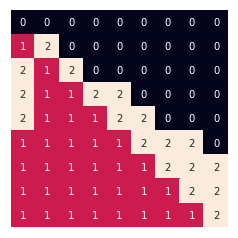

Episode 943	  Score: -65.70
0.01


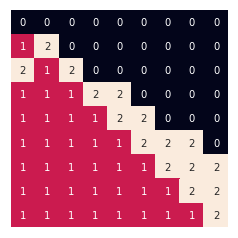

Episode 944	  Score: -31.00
0.01


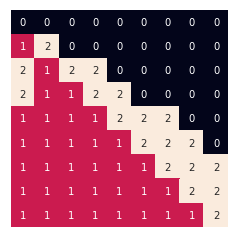

Episode 945	  Score: -53.70
0.01


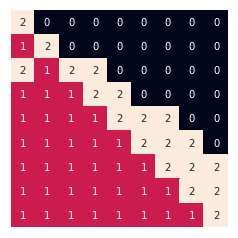

Episode 946	  Score: -67.67
0.01


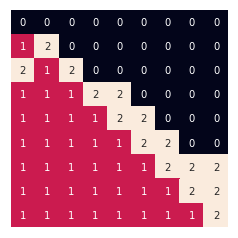

Episode 947	  Score: -74.68
0.01


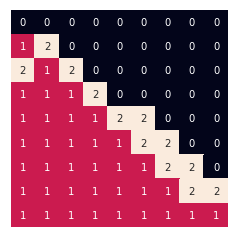

Episode 948	  Score: -42.08
0.01


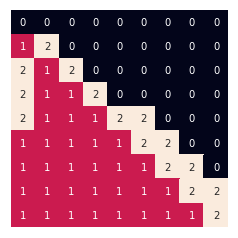

Episode 949	  Score: -89.68
0.01


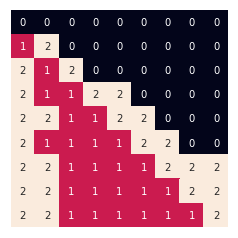

Episode 950	  Score: -66.75
0.01


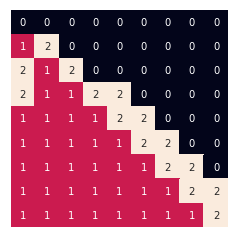

Episode 951	  Score: -80.10
0.01


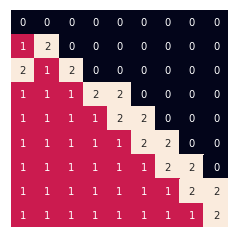

Episode 952	  Score: -58.08
0.01


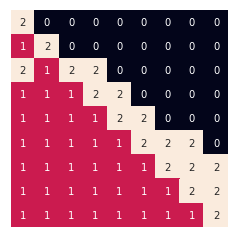

Episode 953	  Score: -53.29
0.01


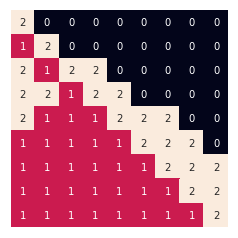

Episode 954	  Score: -68.30
0.01


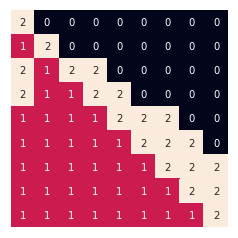

Episode 955	  Score: -56.95
0.01


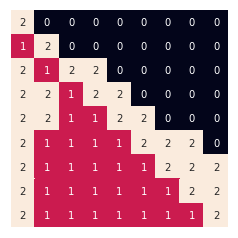

Episode 956	  Score: -122.94
0.01


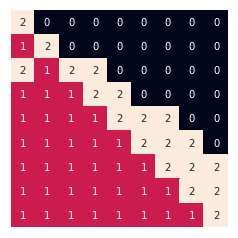

Episode 957	  Score: -76.68
0.01


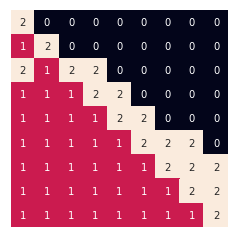

Episode 958	  Score: -67.01
0.01


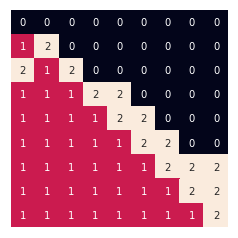

Episode 959	  Score: -101.35
0.01


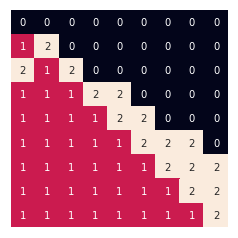

Episode 960	  Score: -53.72
0.01


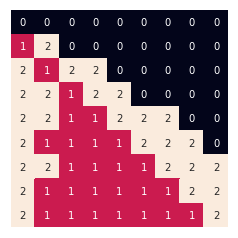

Episode 961	  Score: -62.53
0.01


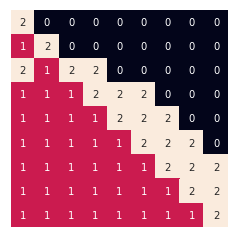

Episode 962	  Score: -61.72
0.01


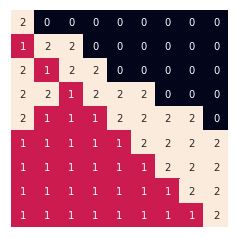

Episode 963	  Score: -78.75
0.01


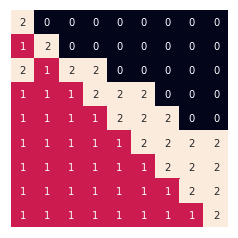

Episode 964	  Score: -93.92
0.01


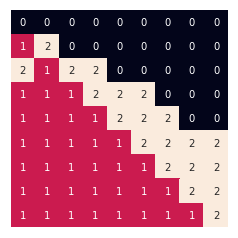

Episode 965	  Score: -90.10
0.01


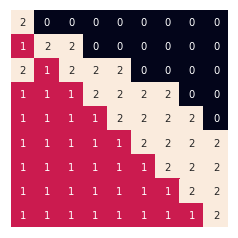

Episode 966	  Score: -59.49
0.01


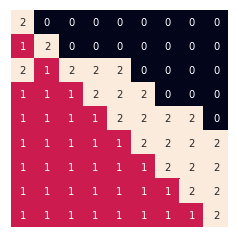

Episode 967	  Score: -48.73
0.01


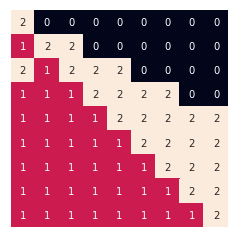

Episode 968	  Score: -64.91
0.01


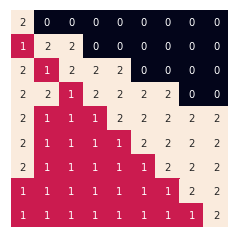

Episode 969	  Score: -95.16
0.01


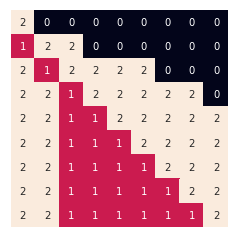

Episode 970	  Score: -79.48
0.01


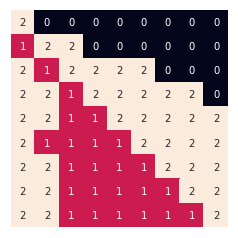

Episode 971	  Score: -45.06
0.01


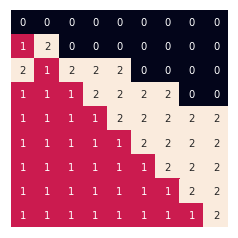

Episode 972	  Score: -49.94
0.01


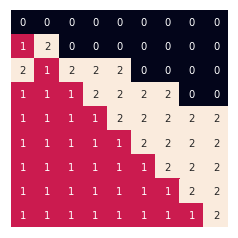

Episode 973	  Score: -55.01
0.01


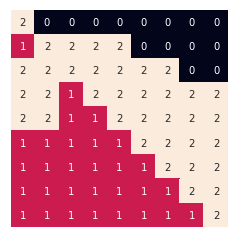

Episode 974	  Score: -70.44
0.01


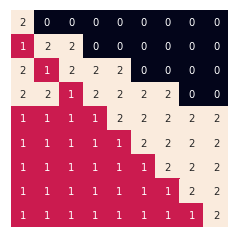

Episode 975	  Score: -71.86
0.01


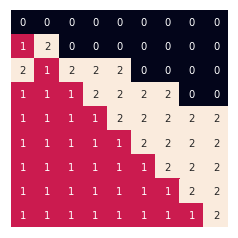

Episode 976	  Score: -52.48
0.01


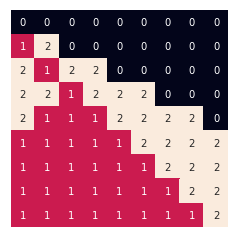

Episode 977	  Score: -95.15
0.01


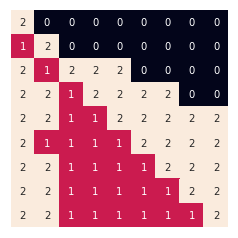

Episode 978	  Score: -76.27
0.01


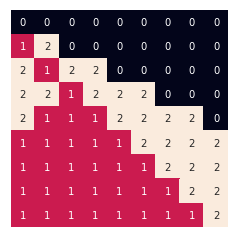

Episode 979	  Score: -57.82
0.01


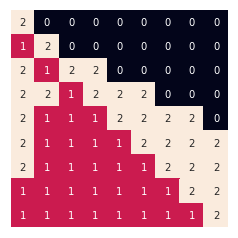

Episode 980	  Score: -49.87
0.01


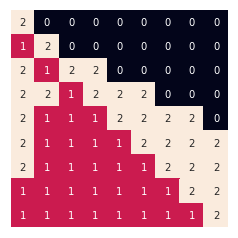

Episode 981	  Score: -57.06
0.01


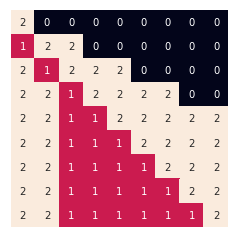

Episode 982	  Score: -49.43
0.01


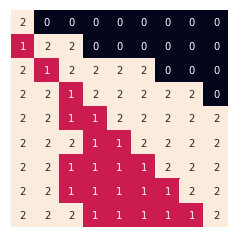

Episode 983	  Score: -72.19
0.01


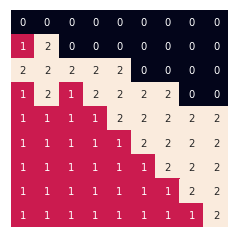

Episode 984	  Score: -89.62
0.01


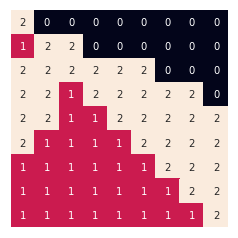

Episode 985	  Score: -79.68
0.01


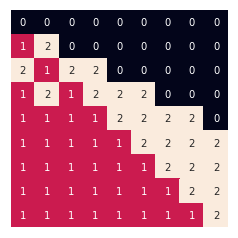

Episode 986	  Score: -84.44
0.01


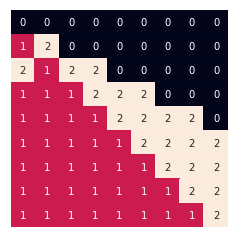

Episode 987	  Score: -63.61
0.01


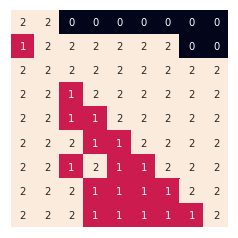

Episode 988	  Score: -70.95
0.01


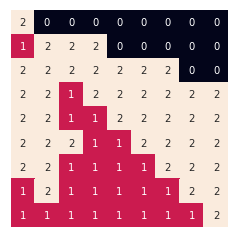

Episode 989	  Score: -33.67
0.01


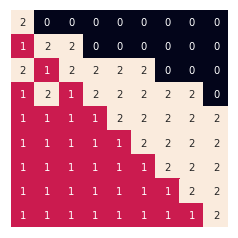

Episode 990	  Score: -77.29
0.01


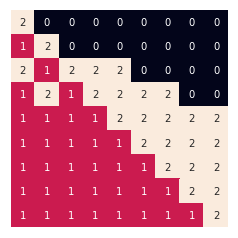

Episode 991	  Score: -60.51
0.01


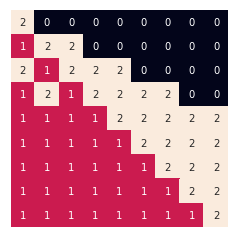

Episode 992	  Score: -55.65
0.01


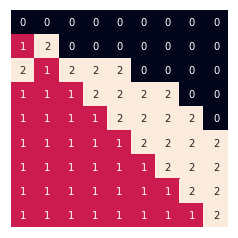

Episode 993	  Score: -56.73
0.01


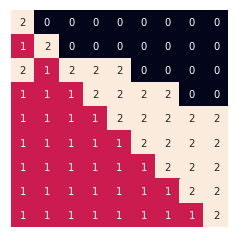

Episode 994	  Score: -71.51
0.01


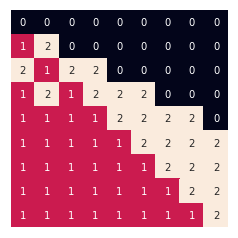

Episode 995	  Score: -78.25
0.01


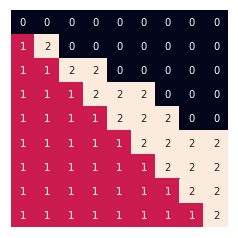

Episode 996	  Score: -35.72
0.01


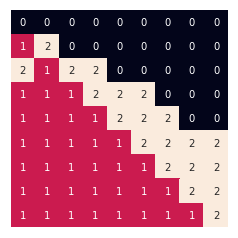

Episode 997	  Score: -62.37
0.01


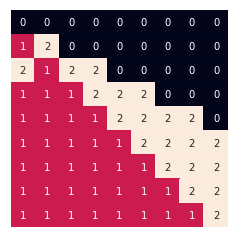

Episode 998	  Score: -32.29
0.01


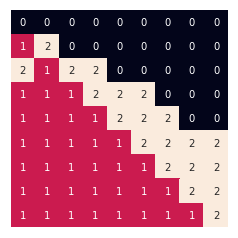

Episode 999	  Score: -99.94
0.01


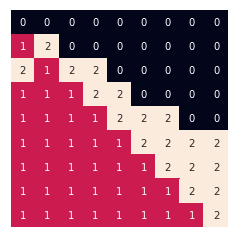

Episode 1000	  Score: -55.59
0.01


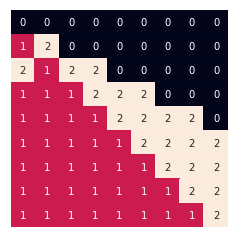

Episode 1001	  Score: -84.67
0.01


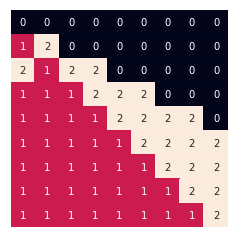

Episode 1002	  Score: -33.46
0.01


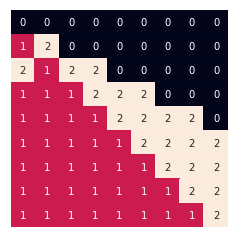

Episode 1003	  Score: -75.10
0.01


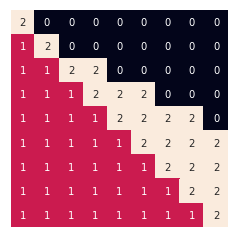

Episode 1004	  Score: -90.76
0.01


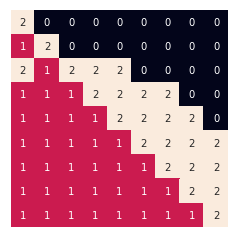

Episode 1005	  Score: -68.70
0.01


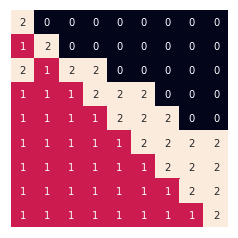

Episode 1006	  Score: -46.95
0.01


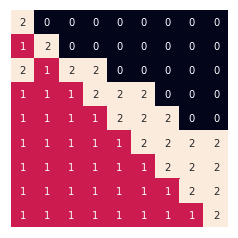

Episode 1007	  Score: -46.87
0.01


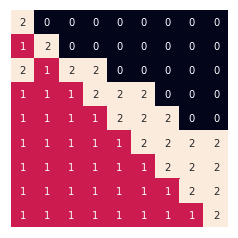

Episode 1008	  Score: -94.27
0.01


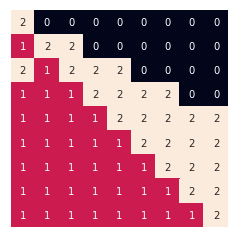

Episode 1009	  Score: -92.13
0.01


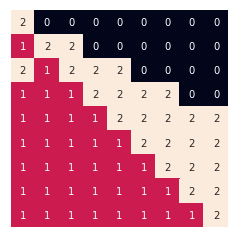

Episode 1010	  Score: -57.48
0.01


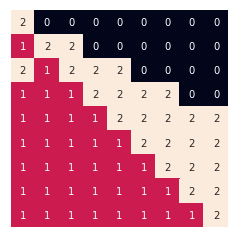

Episode 1011	  Score: -81.06
0.01


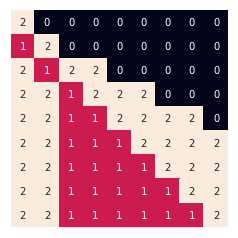

Episode 1012	  Score: -23.44
0.01


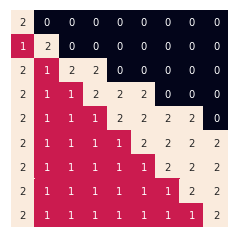

Episode 1013	  Score: -65.70
0.01


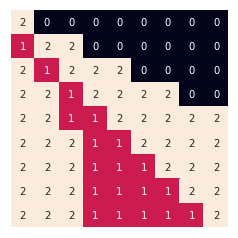

Episode 1014	  Score: -73.48
0.01


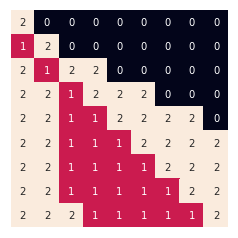

Episode 1015	  Score: -70.95
0.01


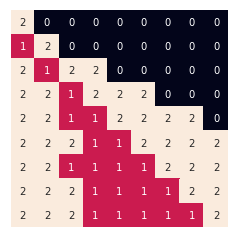

Episode 1016	  Score: -110.70
0.01


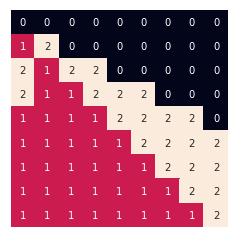

Episode 1017	  Score: -78.75
0.01


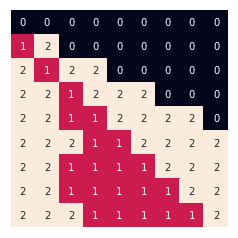

Episode 1018	  Score: -52.87
0.01


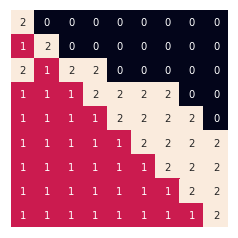

Episode 1019	  Score: -55.70
0.01


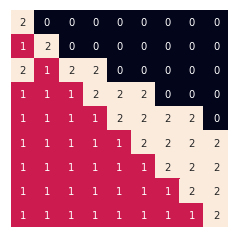

Episode 1020	  Score: -98.46
0.01


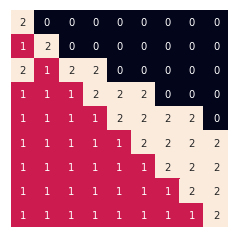

Episode 1021	  Score: -64.46
0.01


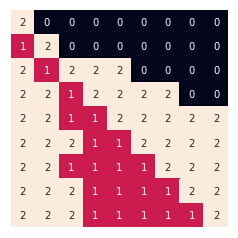

Episode 1022	  Score: -45.60
0.01


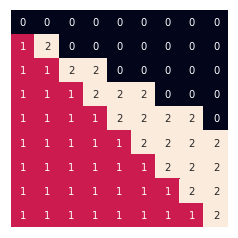

Episode 1023	  Score: -81.73
0.01


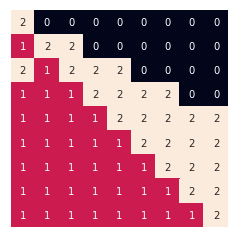

Episode 1024	  Score: -74.92
0.01


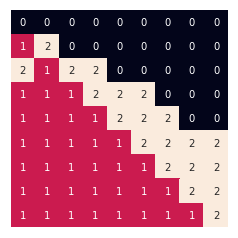

Episode 1025	  Score: -65.53
0.01


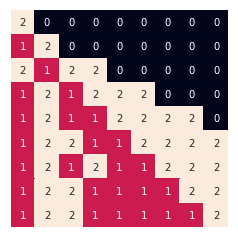

Episode 1026	  Score: -54.39
0.01


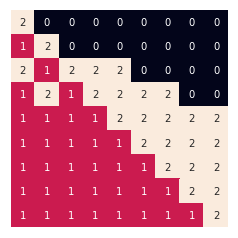

Episode 1027	  Score: -67.32
0.01


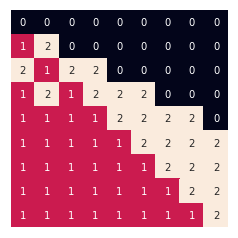

Episode 1028	  Score: -127.76
0.01


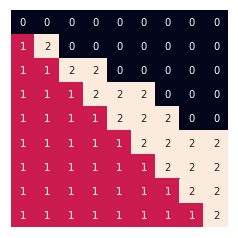

Episode 1029	  Score: -61.19
0.01


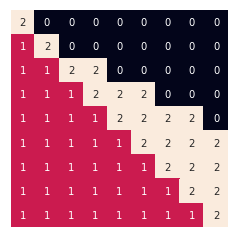

Episode 1030	  Score: -80.72
0.01


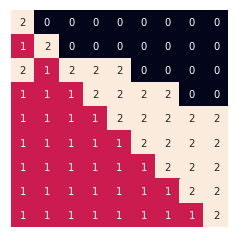

Episode 1031	  Score: -88.27
0.01


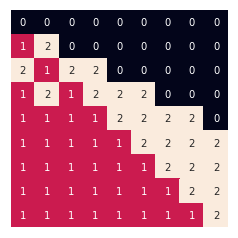

Episode 1032	  Score: -40.48
0.01


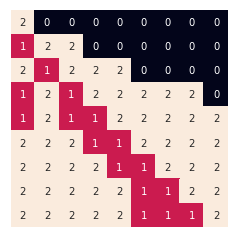

Episode 1033	  Score: -48.87
0.01


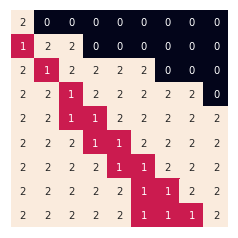

Episode 1034	  Score: -63.53
0.01


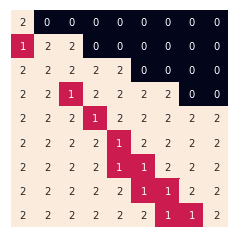

Episode 1035	  Score: -67.43
0.01


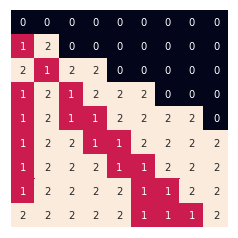

Episode 1036	  Score: -58.49
0.01


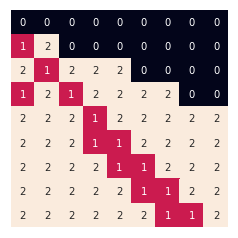

Episode 1037	  Score: -49.82
0.01


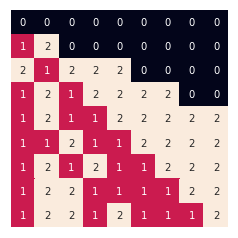

Episode 1038	  Score: -68.32
0.01


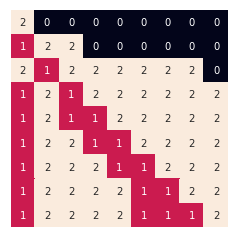

Episode 1039	  Score: -66.63
0.01


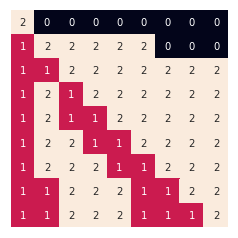

Episode 1040	  Score: -71.05
0.01


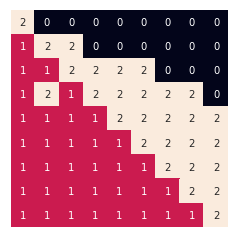

Episode 1041	  Score: -84.73
0.01


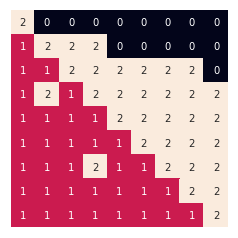

Episode 1042	  Score: -32.70
0.01


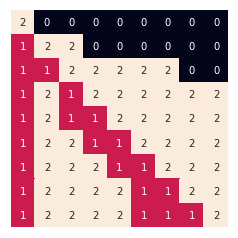

Episode 1043	  Score: -75.48
0.01


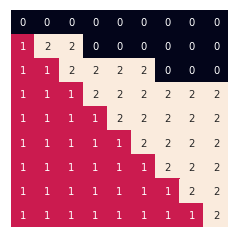

Episode 1044	  Score: -59.54
0.01


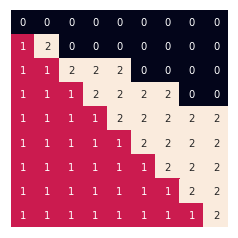

Episode 1045	  Score: -27.08
0.01


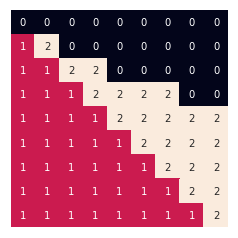

Episode 1046	  Score: -88.43
0.01


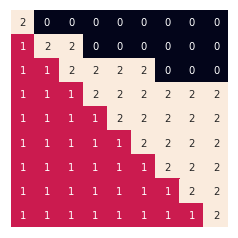

Episode 1047	  Score: -49.49
0.01


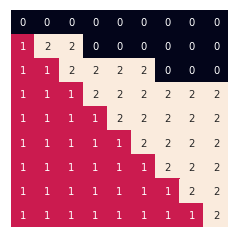

Episode 1048	  Score: -80.13
0.01


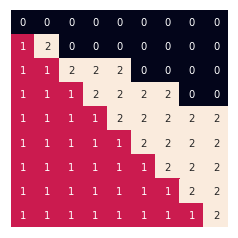

Episode 1049	  Score: -81.48
0.01


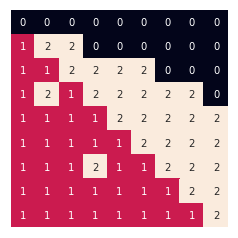

Episode 1050	  Score: -79.10
0.01


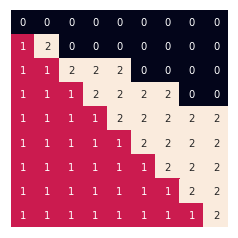

Episode 1051	  Score: -49.91
0.01


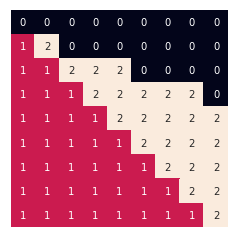

Episode 1052	  Score: -69.83
0.01


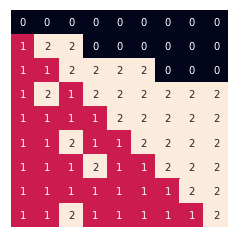

Episode 1053	  Score: -68.86
0.01


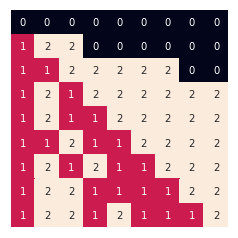

Episode 1054	  Score: -67.11
0.01


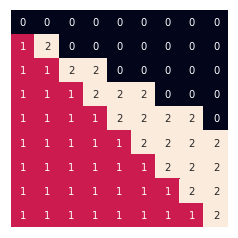

Episode 1055	  Score: -70.03
0.01


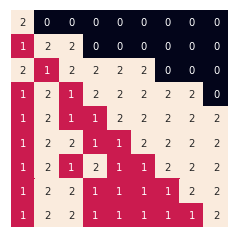

Episode 1056	  Score: -103.15
0.01


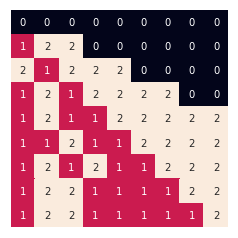

Episode 1057	  Score: -50.34
0.01


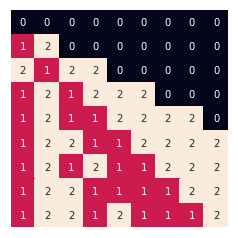

Episode 1058	  Score: -80.49
0.01


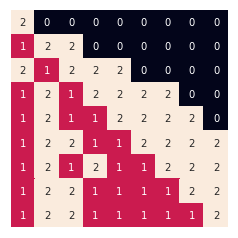

Episode 1059	  Score: -70.38
0.01


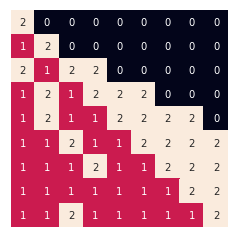

Episode 1060	  Score: -70.57
0.01


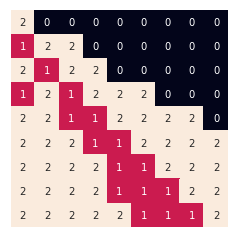

Episode 1061	  Score: -93.92
0.01


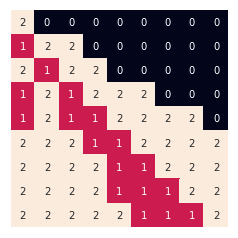

Episode 1062	  Score: -50.10
0.01


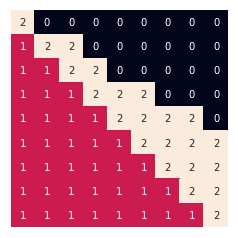

Episode 1063	  Score: -54.19
0.01


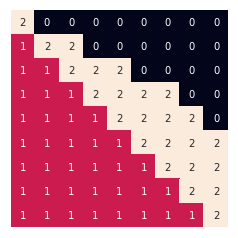

Episode 1064	  Score: -71.95
0.01


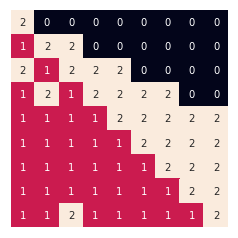

Episode 1065	  Score: -67.76
0.01


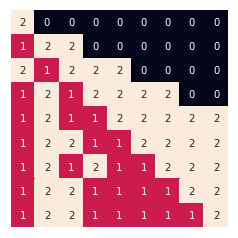

Episode 1066	  Score: -58.73
0.01


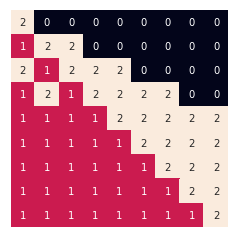

Episode 1067	  Score: -92.76
0.01


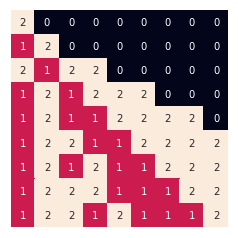

Episode 1068	  Score: -46.70
0.01


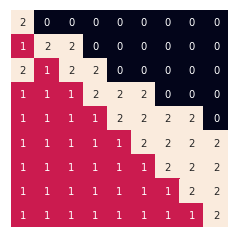

Episode 1069	  Score: -63.49
0.01


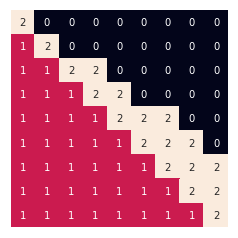

Episode 1070	  Score: -100.74
0.01


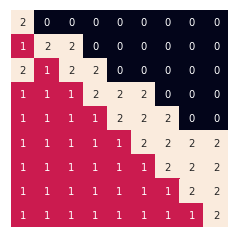

Episode 1071	  Score: -80.84
0.01


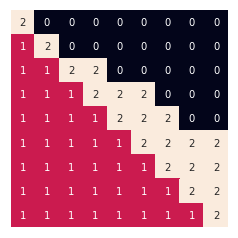

Episode 1072	  Score: -65.32
0.01


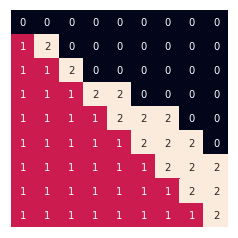

Episode 1073	  Score: -45.75
0.01


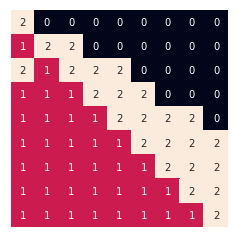

Episode 1074	  Score: -55.51
0.01


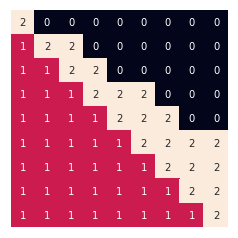

Episode 1075	  Score: -49.30
0.01


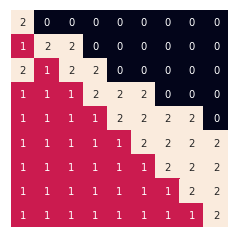

Episode 1076	  Score: -96.59
0.01


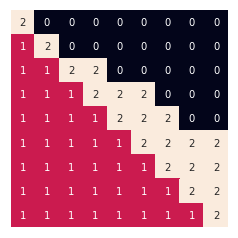

Episode 1077	  Score: -72.48
0.01


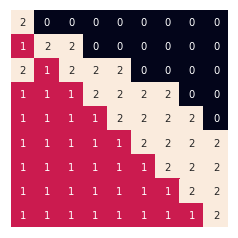

Episode 1078	  Score: -78.81
0.01


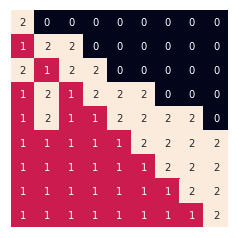

Episode 1079	  Score: -12.91
0.01


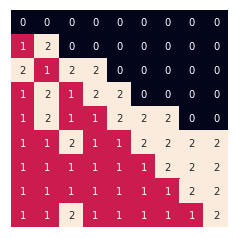

Episode 1080	  Score: -65.25
0.01


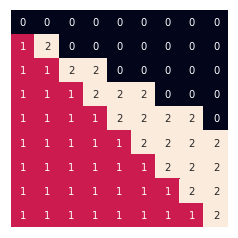

Episode 1081	  Score: -69.25
0.01


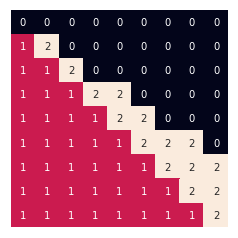

Episode 1082	  Score: -60.73
0.01


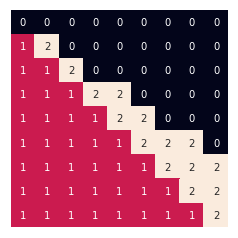

Episode 1083	  Score: -60.49
0.01


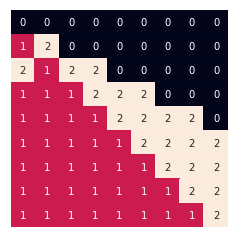

Episode 1084	  Score: -57.10
0.01


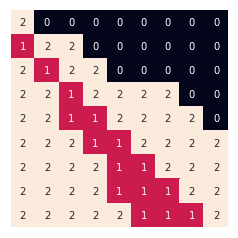

Episode 1085	  Score: -77.53
0.01


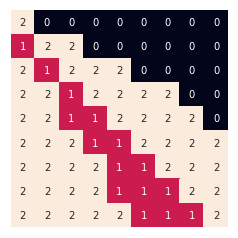

Episode 1086	  Score: -86.67
0.01


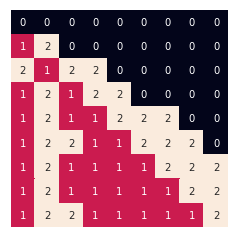

Episode 1087	  Score: -39.72
0.01


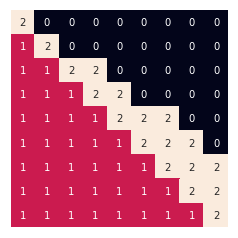

Episode 1088	  Score: -52.30
0.01


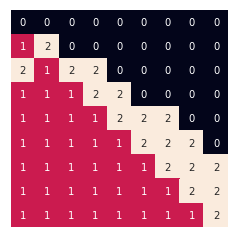

Episode 1089	  Score: -20.87
0.01


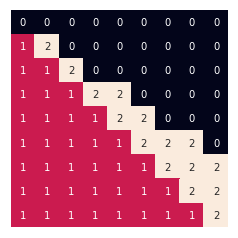

Episode 1090	  Score: -82.26
0.01


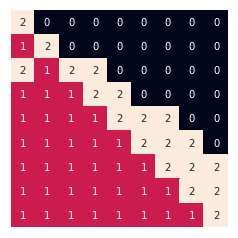

Episode 1091	  Score: -70.32
0.01


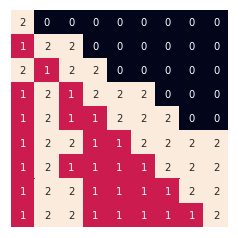

Episode 1092	  Score: -69.05
0.01


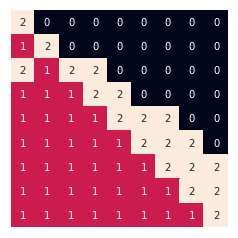

Episode 1093	  Score: -49.76
0.01


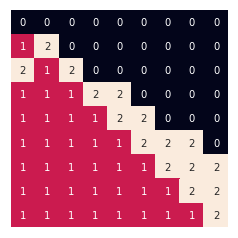

Episode 1094	  Score: -63.35
0.01


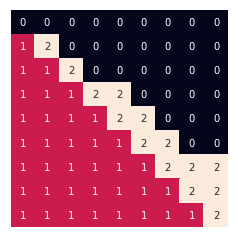

Episode 1095	  Score: -82.86
0.01


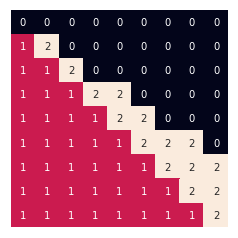

Episode 1096	  Score: -78.67
0.01


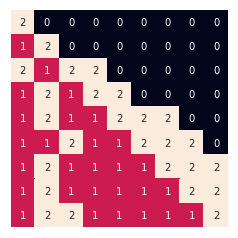

Episode 1097	  Score: -43.59
0.01


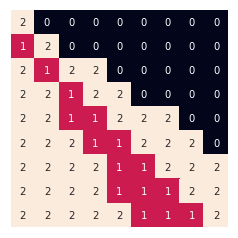

Episode 1098	  Score: -62.70
0.01


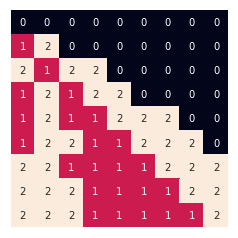

Episode 1099	  Score: -75.43
0.01


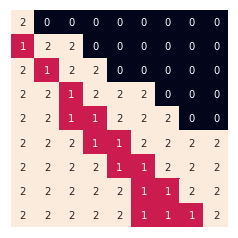

Episode 1100	  Score: -87.34
0.01


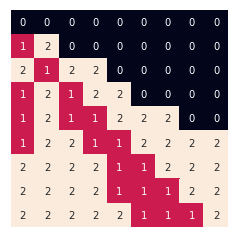

Episode 1101	  Score: -82.81
0.01


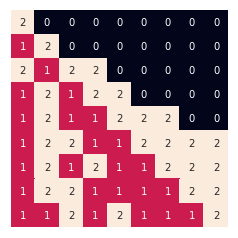

Episode 1102	  Score: -97.54
0.01


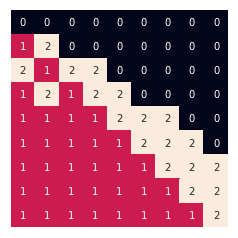

Episode 1103	  Score: -55.35
0.01


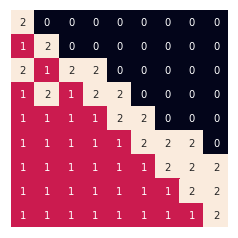

Episode 1104	  Score: -74.48
0.01


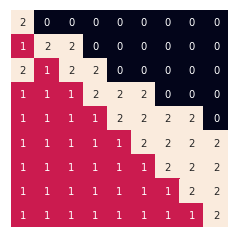

Episode 1105	  Score: -83.00
0.01


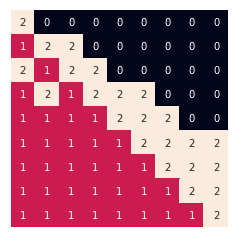

Episode 1106	  Score: -78.65
0.01


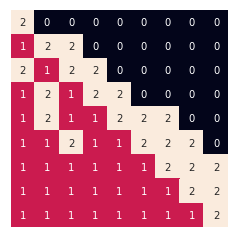

Episode 1107	  Score: -44.68
0.01


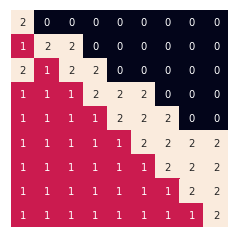

Episode 1108	  Score: -62.11
0.01


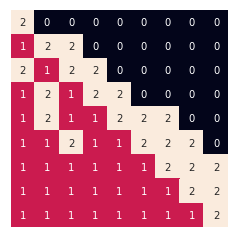

Episode 1109	  Score: -90.89
0.01


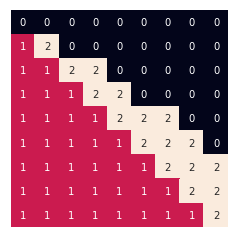

Episode 1110	  Score: -59.75
0.01


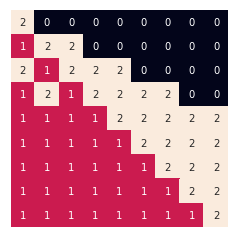

Episode 1111	  Score: -63.08
0.01


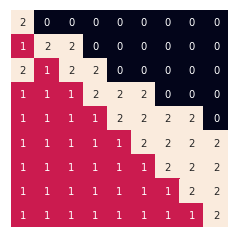

Episode 1112	  Score: -66.10
0.01


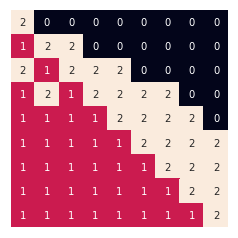

Episode 1113	  Score: -55.30
0.01


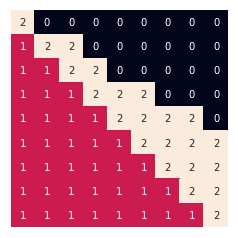

Episode 1114	  Score: -91.27
0.01


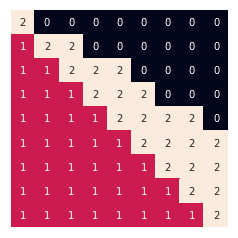

Episode 1115	  Score: -57.56
0.01


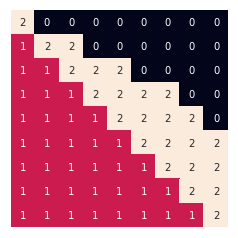

Episode 1116	  Score: -81.25
0.01


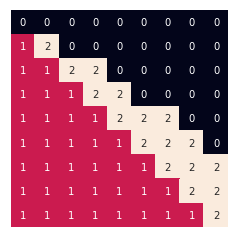

Episode 1117	  Score: -77.18
0.01


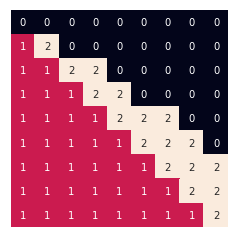

Episode 1118	  Score: -84.30
0.01


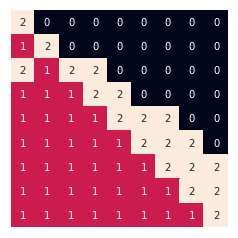

Episode 1119	  Score: -43.89
0.01


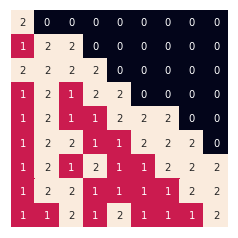

Episode 1120	  Score: -67.87
0.01


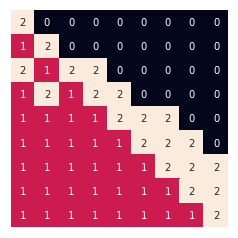

Episode 1121	  Score: -27.91
0.01


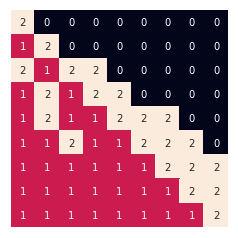

Episode 1122	  Score: -48.22
0.01


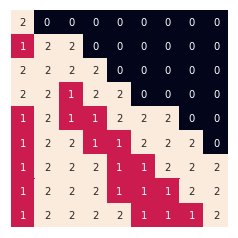

Episode 1123	  Score: -68.27
0.01


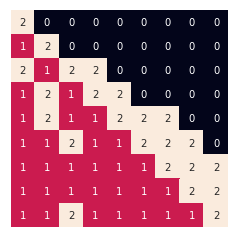

Episode 1124	  Score: -77.41
0.01


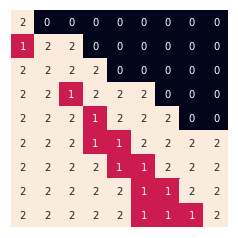

Episode 1125	  Score: -81.50
0.01


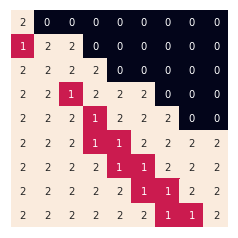

Episode 1126	  Score: -77.01
0.01


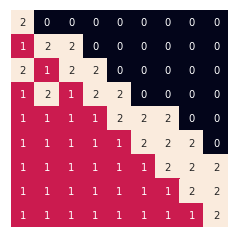

Episode 1127	  Score: -58.91
0.01


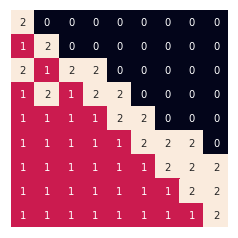

Episode 1128	  Score: -63.30
0.01


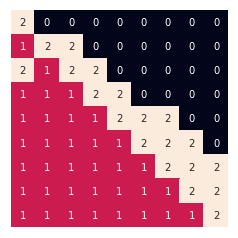

Episode 1129	  Score: -90.51
0.01


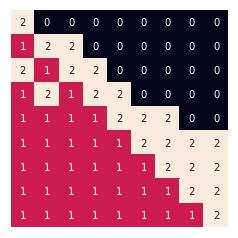

Episode 1130	  Score: -68.30
0.01


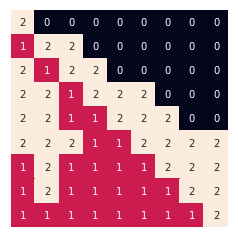

Episode 1131	  Score: -48.11
0.01


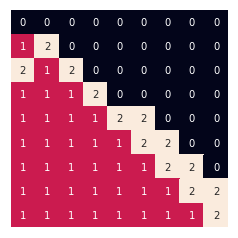

Episode 1132	  Score: -95.72
0.01


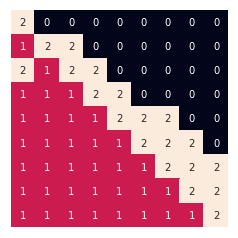

Episode 1133	  Score: -52.43
0.01


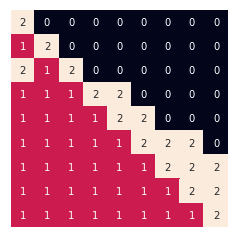

Episode 1134	  Score: -61.43
0.01


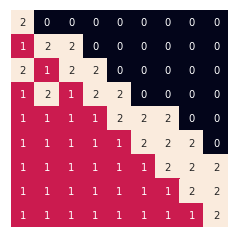

Episode 1135	  Score: -60.08
0.01


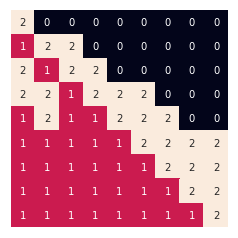

Episode 1136	  Score: -61.99
0.01


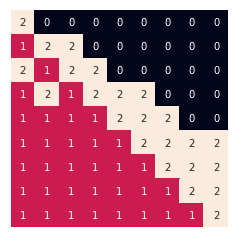

Episode 1137	  Score: -81.35
0.01


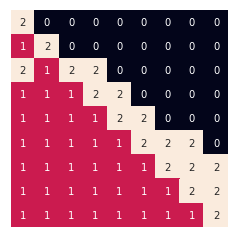

Episode 1138	  Score: -71.53
0.01


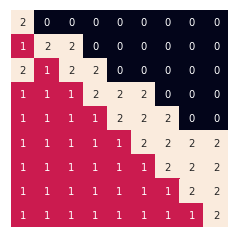

Episode 1139	  Score: -53.29
0.01


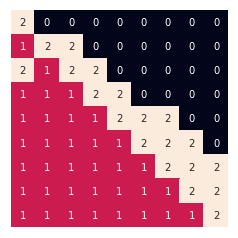

Episode 1140	  Score: -69.62
0.01


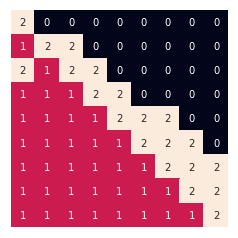

Episode 1141	  Score: -31.29
0.01


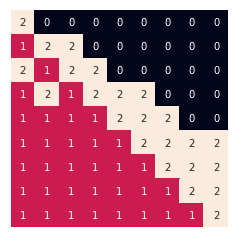

Episode 1142	  Score: -50.82
0.01


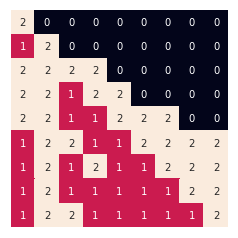

Episode 1143	  Score: -105.57
0.01


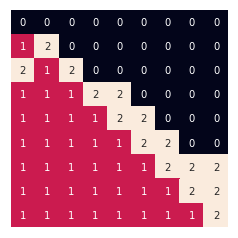

Episode 1144	  Score: -65.08
0.01


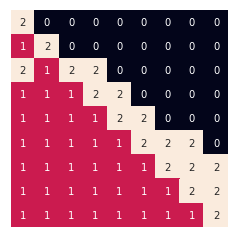

Episode 1145	  Score: -47.63
0.01


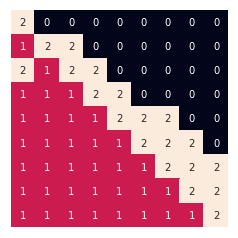

Episode 1146	  Score: -74.32
0.01


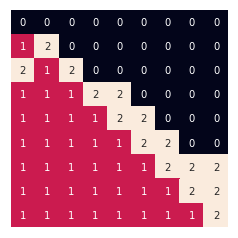

Episode 1147	  Score: -93.49
0.01


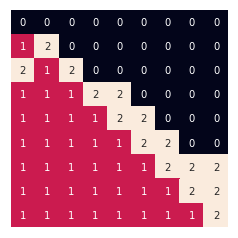

Episode 1148	  Score: -72.84
0.01


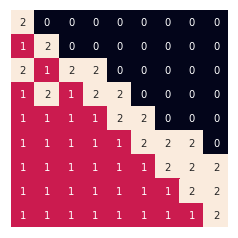

Episode 1149	  Score: -47.91
0.01


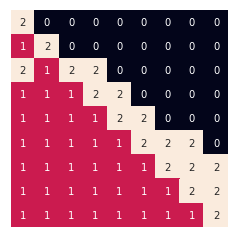

Episode 1150	  Score: -33.57
0.01


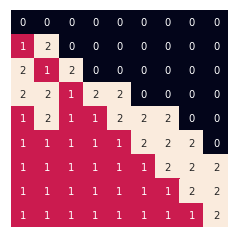

Episode 1151	  Score: -104.78
0.01


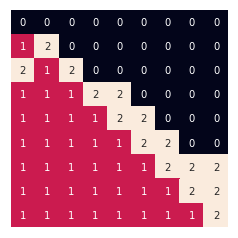

Episode 1152	  Score: -52.84
0.01


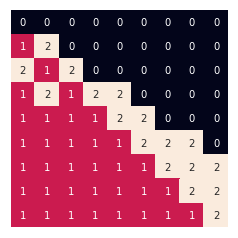

Episode 1153	  Score: -79.45
0.01


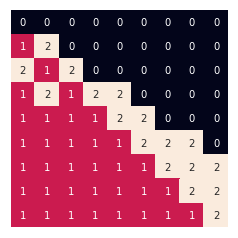

Episode 1154	  Score: -60.37
0.01


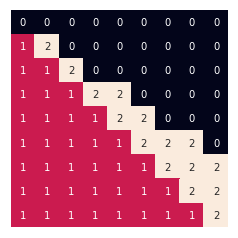

Episode 1155	  Score: -55.89
0.01


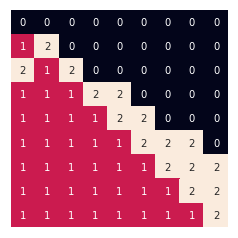

Episode 1156	  Score: -74.68
0.01


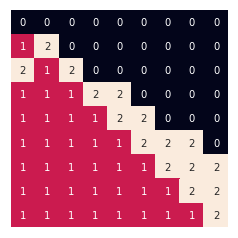

Episode 1157	  Score: -112.49
0.01


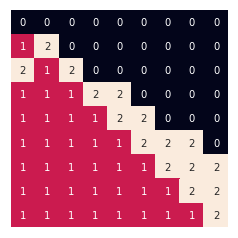

Episode 1158	  Score: -86.95
0.01


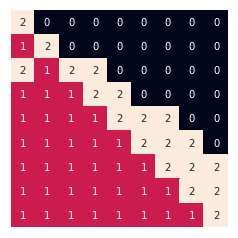

Episode 1159	  Score: -69.51
0.01


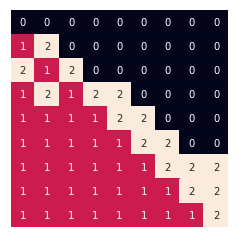

Episode 1160	  Score: -79.34
0.01


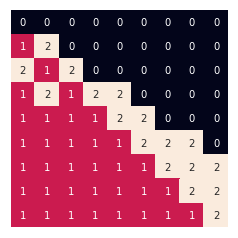

Episode 1161	  Score: -77.24
0.01


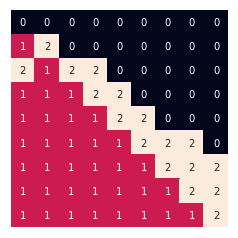

Episode 1162	  Score: -93.34
0.01


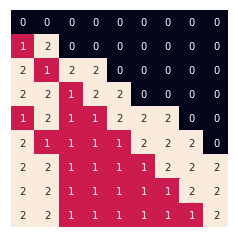

Episode 1163	  Score: -60.24
0.01


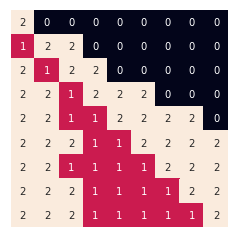

Episode 1164	  Score: -28.86
0.01


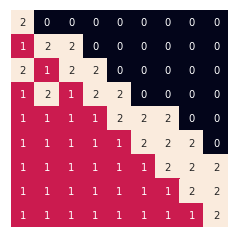

Episode 1165	  Score: -80.05
0.01


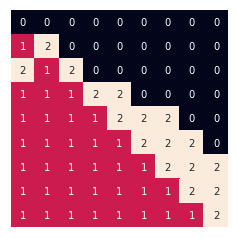

Episode 1166	  Score: -69.91
0.01


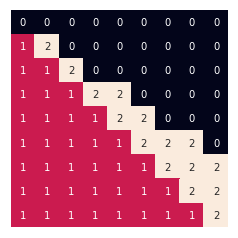

Episode 1167	  Score: -79.70
0.01


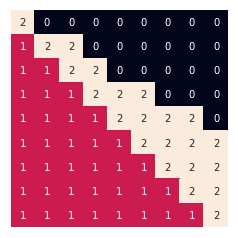

Episode 1168	  Score: -86.92
0.01


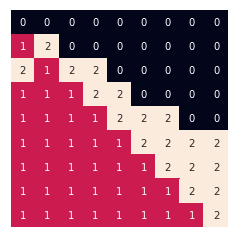

Episode 1169	  Score: -92.00
0.01


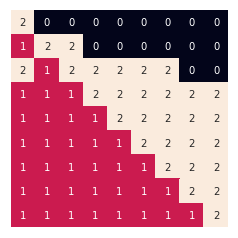

Episode 1170	  Score: -69.75
0.01


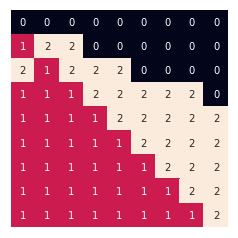

Episode 1171	  Score: -53.82
0.01


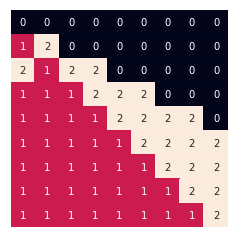

Episode 1172	  Score: -30.95
0.01


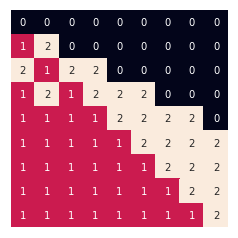

Episode 1173	  Score: -55.75
0.01


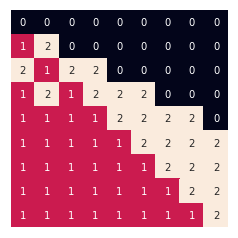

Episode 1174	  Score: -75.94
0.01


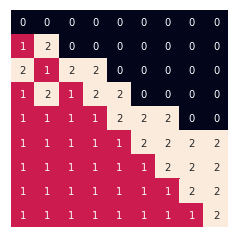

Episode 1175	  Score: -93.92
0.01


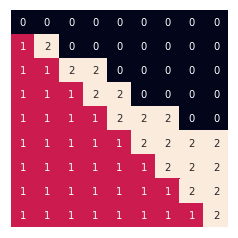

Episode 1176	  Score: -83.67
0.01


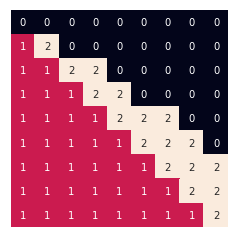

Episode 1177	  Score: -59.86
0.01


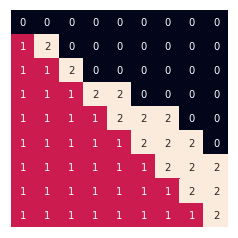

Episode 1178	  Score: -64.68
0.01


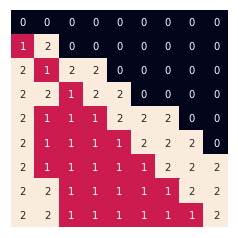

Episode 1179	  Score: -61.63
0.01


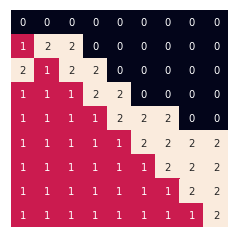

Episode 1180	  Score: -70.11
0.01


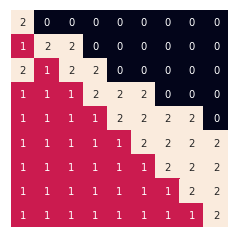

Episode 1181	  Score: -63.53
0.01


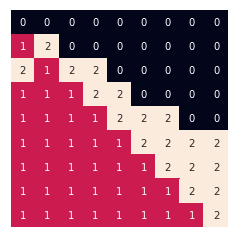

Episode 1182	  Score: -75.94
0.01


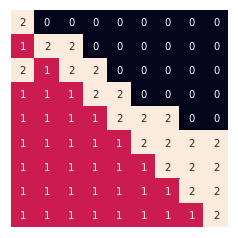

Episode 1183	  Score: -63.03
0.01


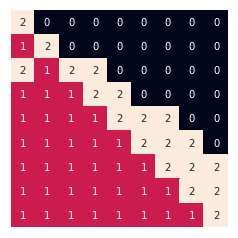

Episode 1184	  Score: -94.03
0.01


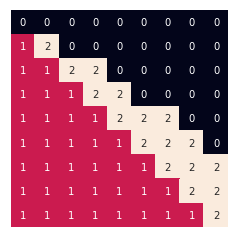

Episode 1185	  Score: -86.73
0.01


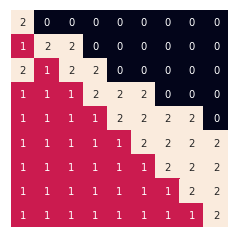

Episode 1186	  Score: -48.51
0.01


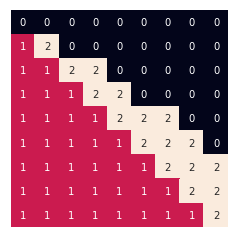

Episode 1187	  Score: -56.70
0.01


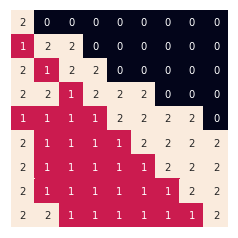

Episode 1188	  Score: -61.67
0.01


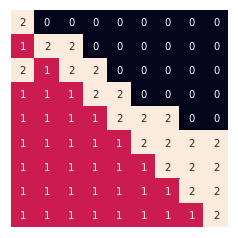

Episode 1189	  Score: -45.91
0.01


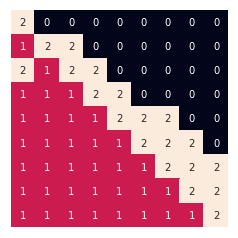

Episode 1190	  Score: -32.43
0.01


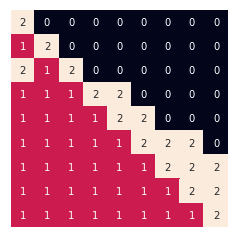

Episode 1191	  Score: -61.54
0.01


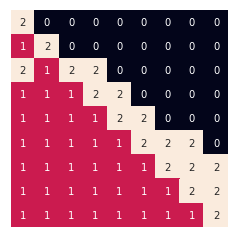

Episode 1192	  Score: -74.91
0.01


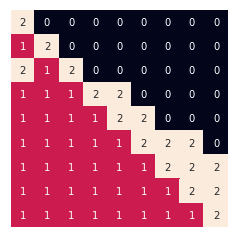

Episode 1193	  Score: -49.27
0.01


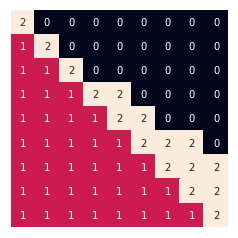

Episode 1194	  Score: -74.34
0.01


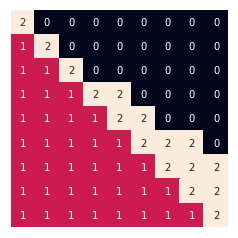

Episode 1195	  Score: -93.68
0.01


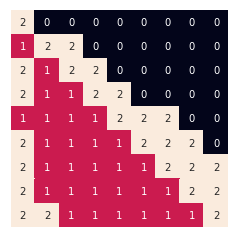

Episode 1196	  Score: -54.34
0.01


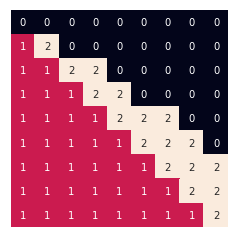

Episode 1197	  Score: -86.15
0.01


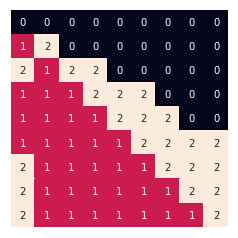

Episode 1198	  Score: -66.11
0.01


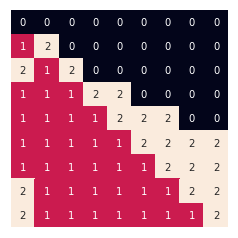

Episode 1199	  Score: -59.32
0.01


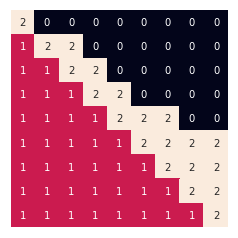

Episode 1200	  Score: -83.83
0.01


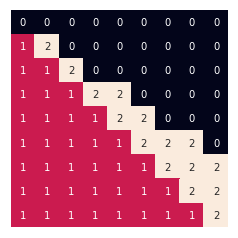

Episode 1201	  Score: -92.72
0.01


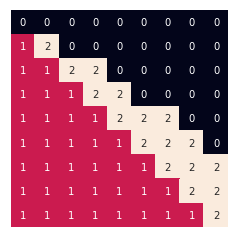

Episode 1202	  Score: -58.89
0.01


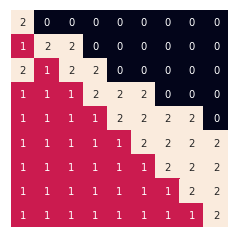

Episode 1203	  Score: -63.89
0.01


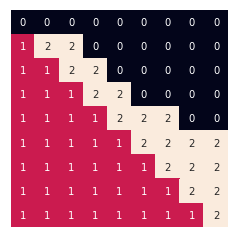

Episode 1204	  Score: -50.08
0.01


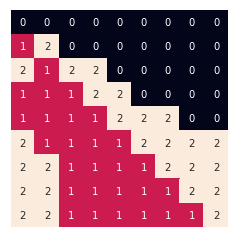

Episode 1205	  Score: -57.27
0.01


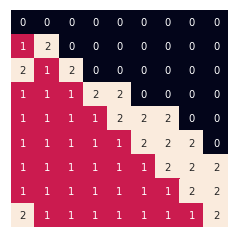

Episode 1206	  Score: -68.32
0.01


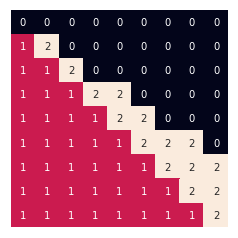

Episode 1207	  Score: -66.13
0.01


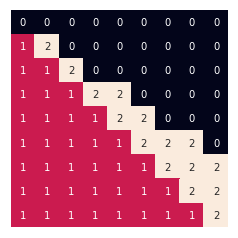

Episode 1208	  Score: -70.54
0.01


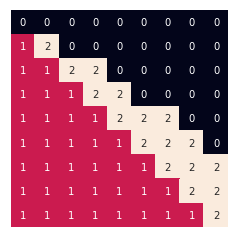

Episode 1209	  Score: -45.05
0.01


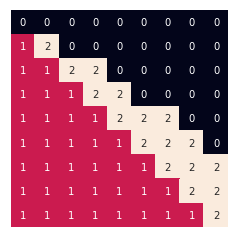

Episode 1210	  Score: -58.91
0.01


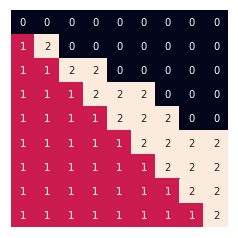

Episode 1211	  Score: -94.03
0.01


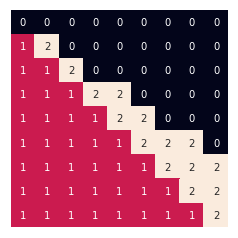

Episode 1212	  Score: -61.48
0.01


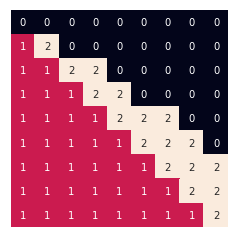

Episode 1213	  Score: -68.51
0.01


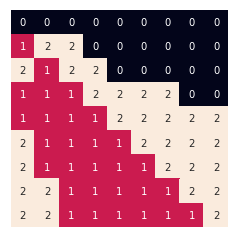

Episode 1214	  Score: -85.89
0.01


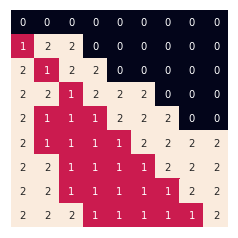

Episode 1215	  Score: -52.49
0.01


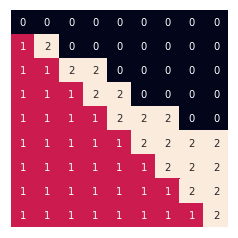

Episode 1216	  Score: -53.70
0.01


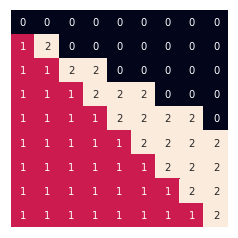

Episode 1217	  Score: -57.97
0.01


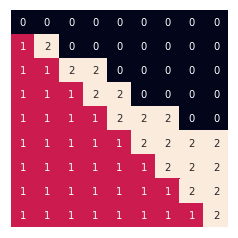

Episode 1218	  Score: -99.48
0.01


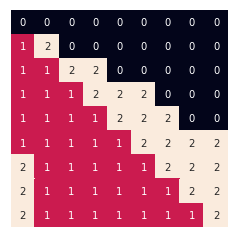

Episode 1219	  Score: -56.10
0.01


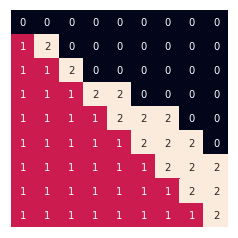

Episode 1220	  Score: -34.06
0.01


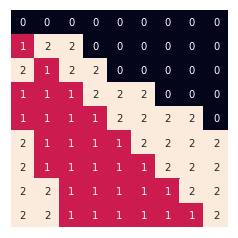

Episode 1221	  Score: -99.95
0.01


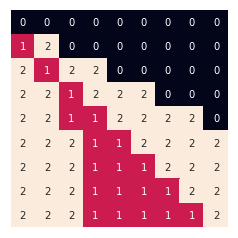

Episode 1222	  Score: -64.65
0.01


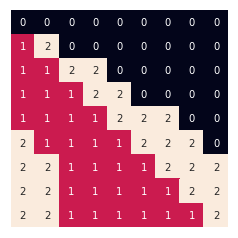

Episode 1223	  Score: -58.34
0.01


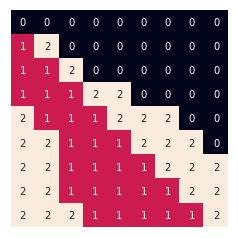

Episode 1224	  Score: -66.72
0.01


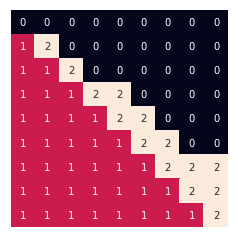

Episode 1225	  Score: -85.78
0.01


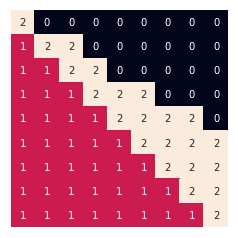

Episode 1226	  Score: -46.68
0.01


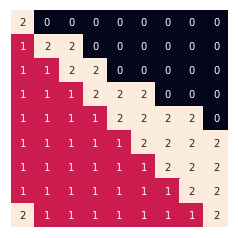

Episode 1227	  Score: -50.38
0.01


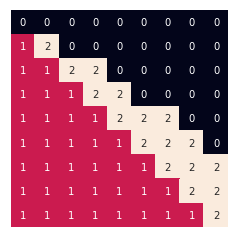

Episode 1228	  Score: -47.48
0.01


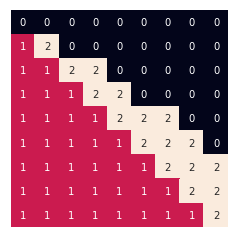

Episode 1229	  Score: -52.53
0.01


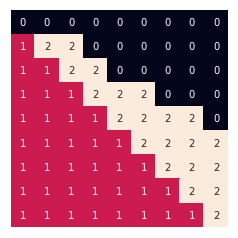

Episode 1230	  Score: -68.44
0.01


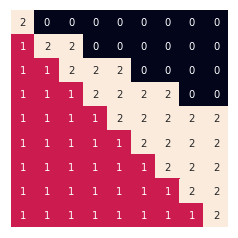

Episode 1231	  Score: -40.67
0.01


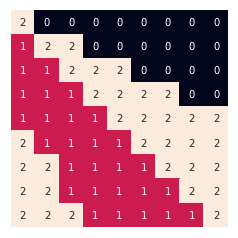

Episode 1232	  Score: -81.70
0.01


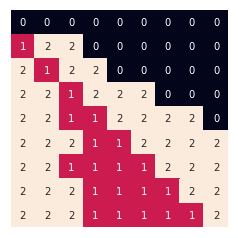

Episode 1233	  Score: -93.49
0.01


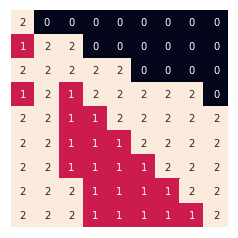

Episode 1234	  Score: -91.91
0.01


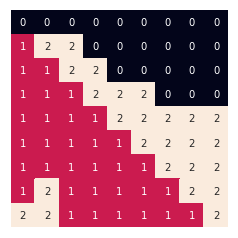

Episode 1235	  Score: -64.16
0.01


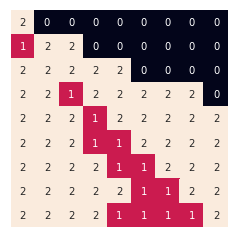

Episode 1236	  Score: -71.60
0.01


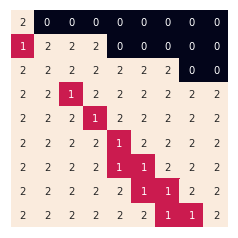

Episode 1237	  Score: -62.81
0.01


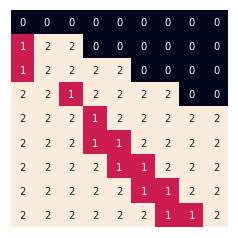

Episode 1238	  Score: -43.56
0.01


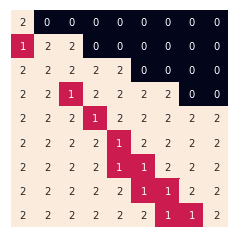

Episode 1239	  Score: -69.27
0.01


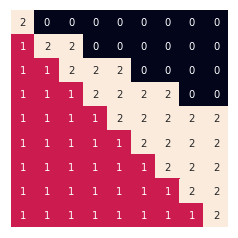

Episode 1240	  Score: -52.87
0.01


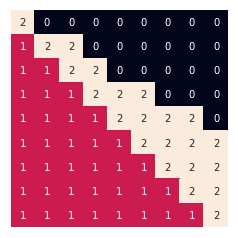

Episode 1241	  Score: -39.79
0.01


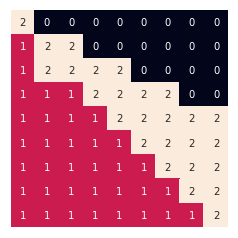

Episode 1242	  Score: -89.76
0.01


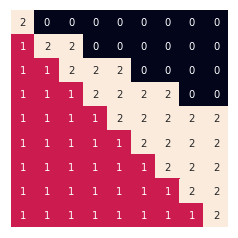

Episode 1243	  Score: -67.70
0.01


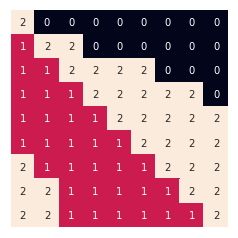

Episode 1244	  Score: -69.70
0.01


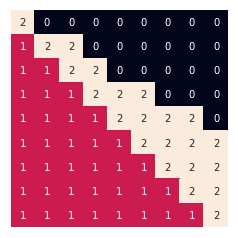

Episode 1245	  Score: -53.49
0.01


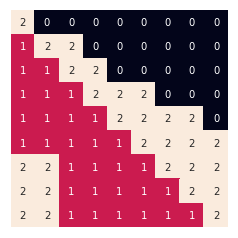

Episode 1246	  Score: -38.87
0.01


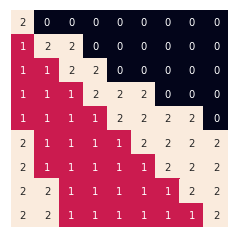

Episode 1247	  Score: -84.54
0.01


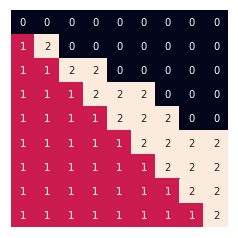

Episode 1248	  Score: -71.13
0.01


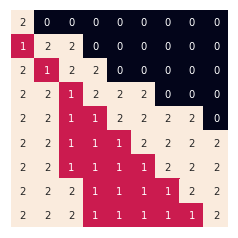

Episode 1249	  Score: -83.00
0.01


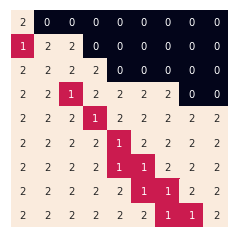

Episode 1250	  Score: -66.70
0.01


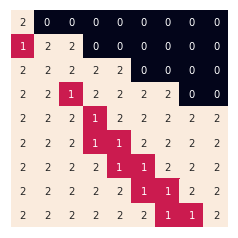

Episode 1251	  Score: -44.25
0.01


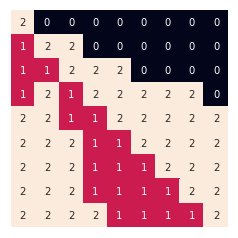

Episode 1252	  Score: -63.51
0.01


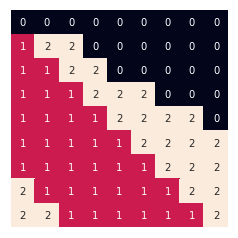

Episode 1253	  Score: -65.51
0.01


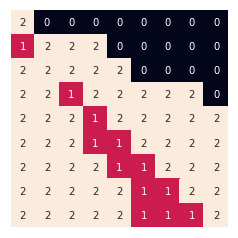

Episode 1254	  Score: -60.86
0.01


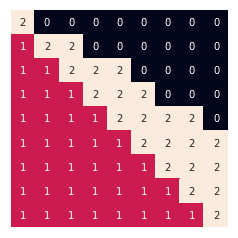

Episode 1255	  Score: -89.61
0.01


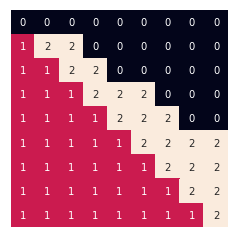

Episode 1256	  Score: -55.67
0.01


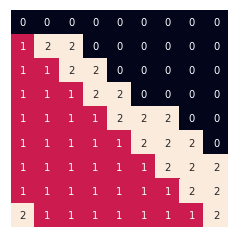

Episode 1257	  Score: -62.75
0.01


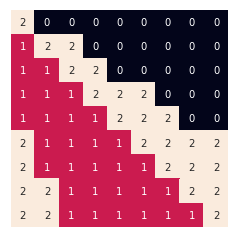

Episode 1258	  Score: -67.54
0.01


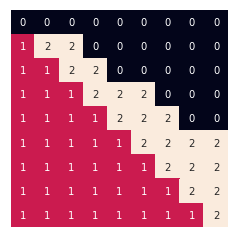

Episode 1259	  Score: -50.72
0.01


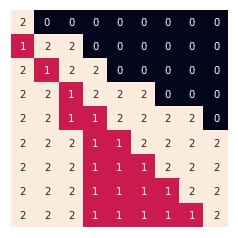

Episode 1260	  Score: -62.82
0.01


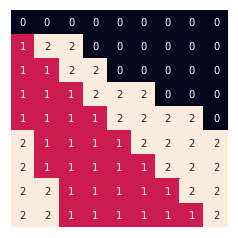

Episode 1261	  Score: -45.87
0.01


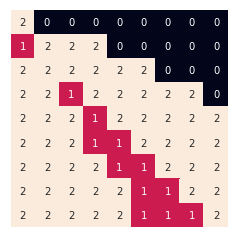

Episode 1262	  Score: -66.53
0.01


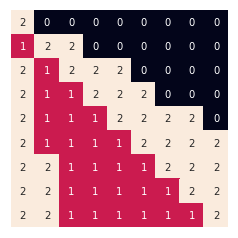

Episode 1263	  Score: -59.24
0.01


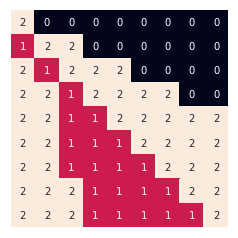

Episode 1264	  Score: -55.70
0.01


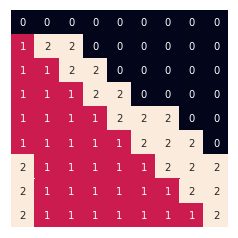

Episode 1265	  Score: -76.68
0.01


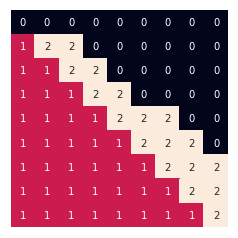

Episode 1266	  Score: -64.51
0.01


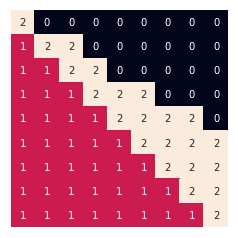

Episode 1267	  Score: -43.67
0.01


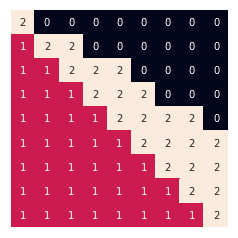

Episode 1268	  Score: -91.70
0.01


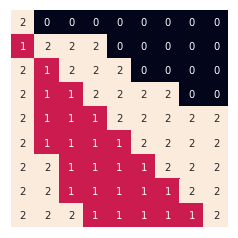

Episode 1269	  Score: -62.14
0.01


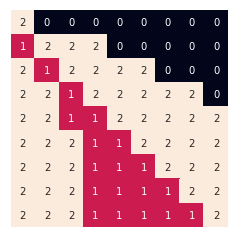

Episode 1270	  Score: -84.95
0.01


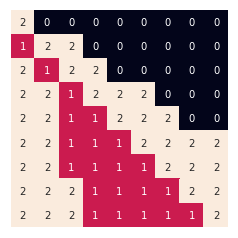

Episode 1271	  Score: -14.29
0.01


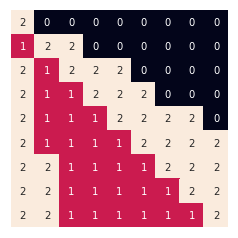

Episode 1272	  Score: -53.27
0.01


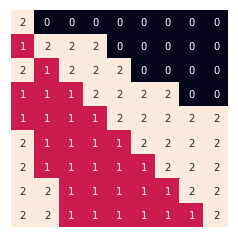

Episode 1273	  Score: -64.36
0.01


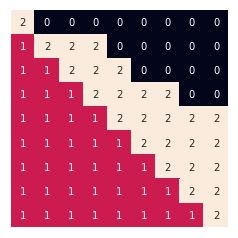

Episode 1274	  Score: -111.95
0.01


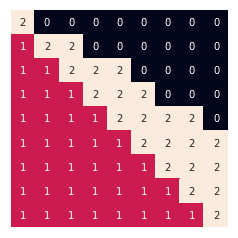

Episode 1275	  Score: -86.89
0.01


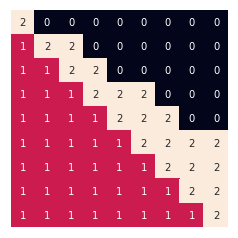

Episode 1276	  Score: -61.07
0.01


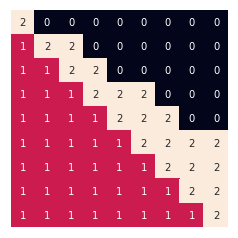

Episode 1277	  Score: -97.37
0.01


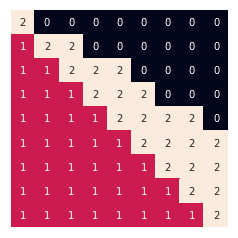

Episode 1278	  Score: -85.65
0.01


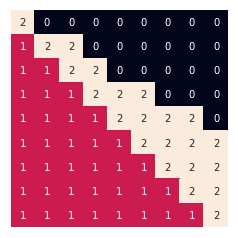

Episode 1279	  Score: -55.27
0.01


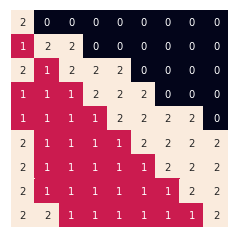

Episode 1280	  Score: -73.06
0.01


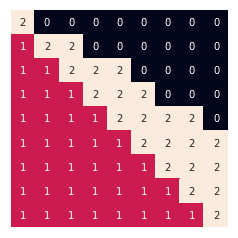

Episode 1281	  Score: -88.01
0.01


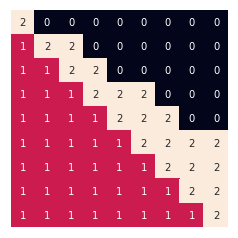

Episode 1282	  Score: -62.72
0.01


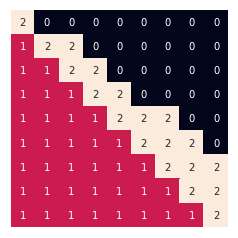

Episode 1283	  Score: -78.82
0.01


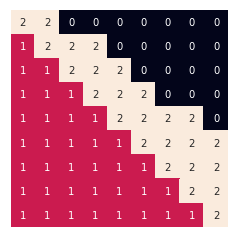

Episode 1284	  Score: -89.63
0.01


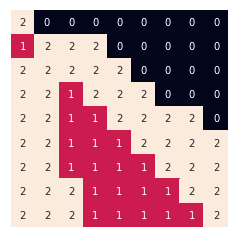

Episode 1285	  Score: -85.32
0.01


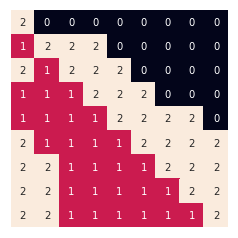

Episode 1286	  Score: -31.54
0.01


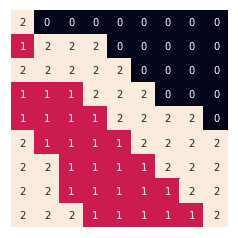

Episode 1287	  Score: -48.25
0.01


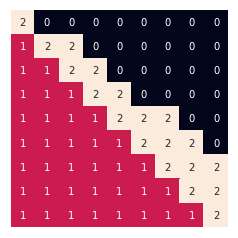

Episode 1288	  Score: -82.91
0.01


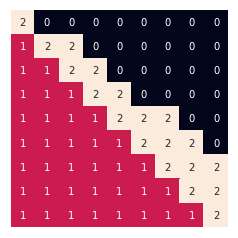

Episode 1289	  Score: -111.06
0.01


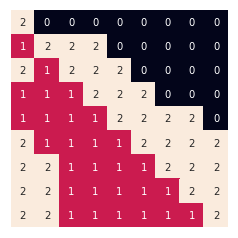

Episode 1290	  Score: -88.35
0.01


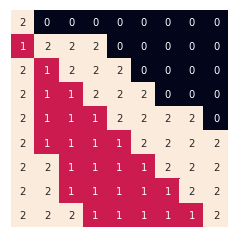

Episode 1291	  Score: -80.29
0.01


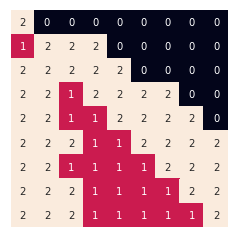

Episode 1292	  Score: -60.32
0.01


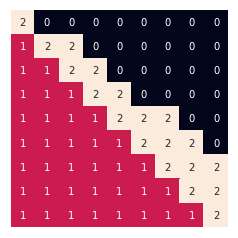

Episode 1293	  Score: -46.29
0.01


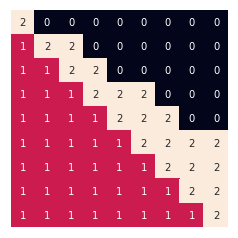

Episode 1294	  Score: -85.10
0.01


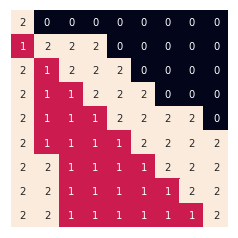

Episode 1295	  Score: -86.60
0.01


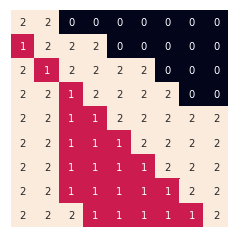

Episode 1296	  Score: -109.23
0.01


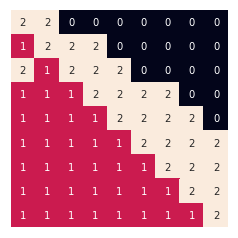

Episode 1297	  Score: -101.09
0.01


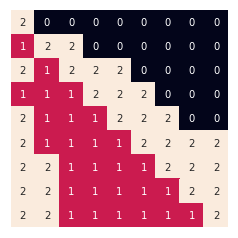

Episode 1298	  Score: -52.92
0.01


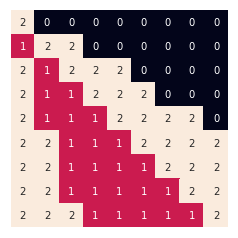

Episode 1299	  Score: -45.67
0.01


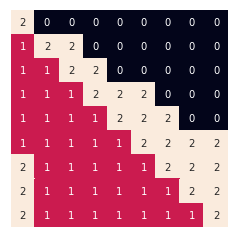

Episode 1300	  Score: -42.33
0.01


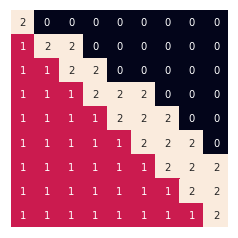

Episode 1301	  Score: -61.72
0.01


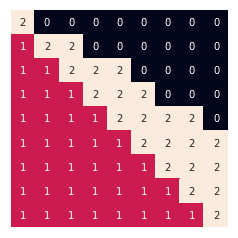

Episode 1302	  Score: -72.22
0.01


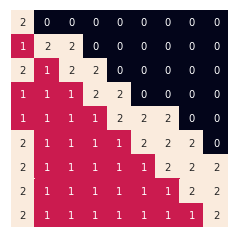

Episode 1303	  Score: -67.06
0.01


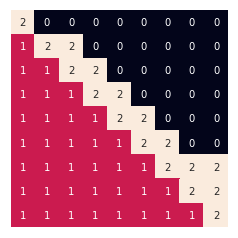

Episode 1304	  Score: -49.06
0.01


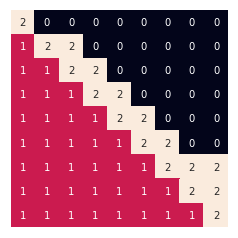

Episode 1305	  Score: -88.06
0.01


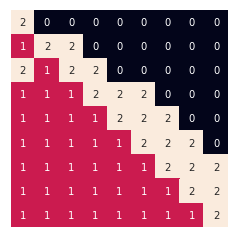

Episode 1306	  Score: -47.91
0.01


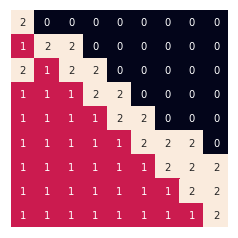

Episode 1307	  Score: -57.25
0.01


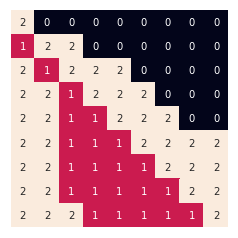

Episode 1308	  Score: -68.05
0.01


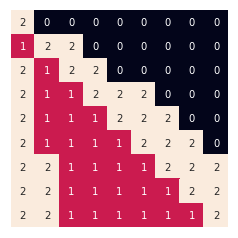

Episode 1309	  Score: -66.51
0.01


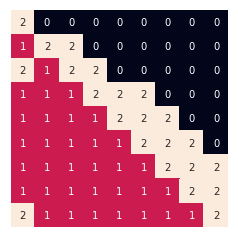

Episode 1310	  Score: -47.30
0.01


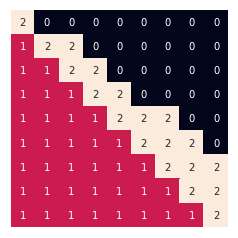

Episode 1311	  Score: -51.05
0.01


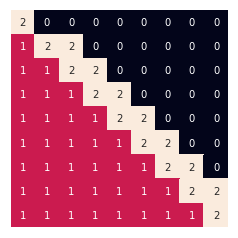

Episode 1312	  Score: -26.25
0.01


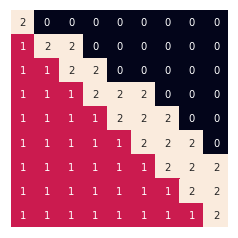

Episode 1313	  Score: -116.54
0.01


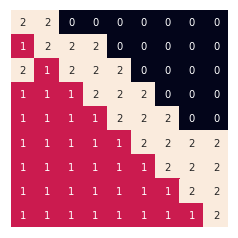

Episode 1314	  Score: -121.49
0.01


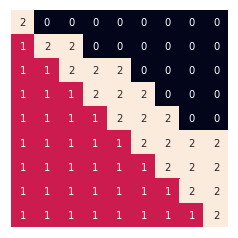

Episode 1315	  Score: -90.48
0.01


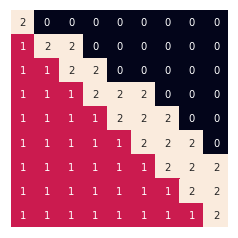

Episode 1316	  Score: -68.91
0.01


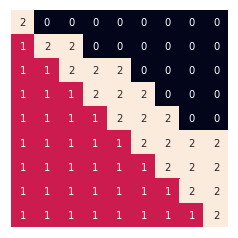

Episode 1317	  Score: -93.08
0.01


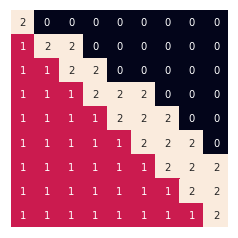

Episode 1318	  Score: -91.56
0.01


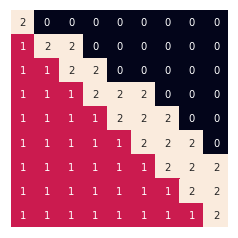

Episode 1319	  Score: -95.32
0.01


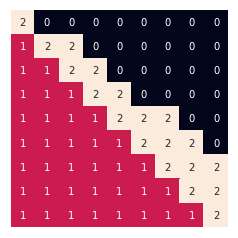

Episode 1320	  Score: -51.35
0.01


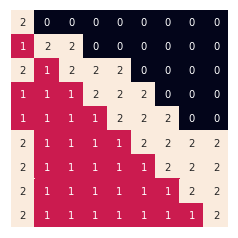

Episode 1321	  Score: -62.49
0.01


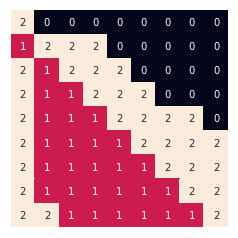

Episode 1322	  Score: -87.54
0.01


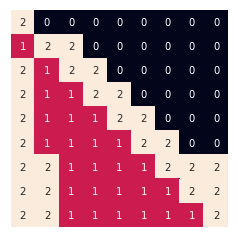

Episode 1323	  Score: -43.27
0.01


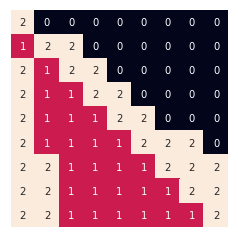

Episode 1324	  Score: -96.34
0.01


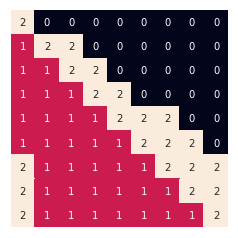

Episode 1325	  Score: -44.01
0.01


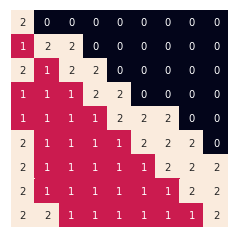

Episode 1326	  Score: -13.89
0.01


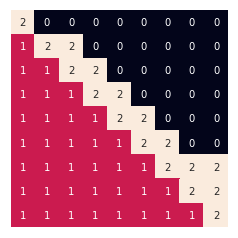

Episode 1327	  Score: -31.10
0.01


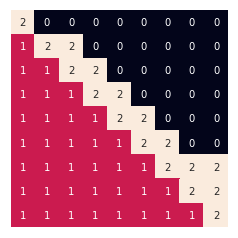

Episode 1328	  Score: -92.41
0.01


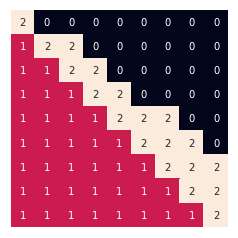

Episode 1329	  Score: -55.05
0.01


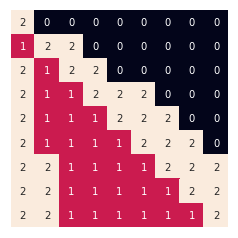

Episode 1330	  Score: -91.76
0.01


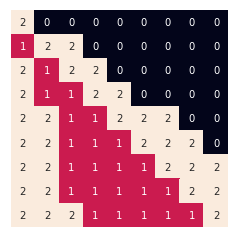

Episode 1331	  Score: -66.15
0.01


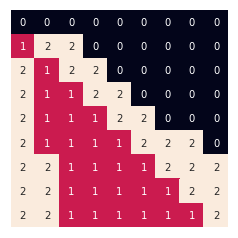

Episode 1332	  Score: -70.06
0.01


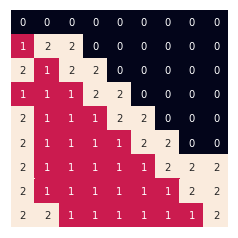

Episode 1333	  Score: -64.89
0.01


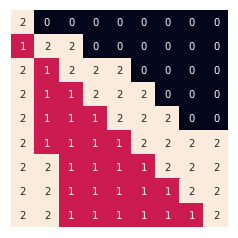

Episode 1334	  Score: -66.10
0.01


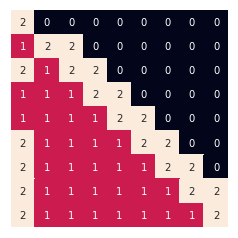

Episode 1335	  Score: -40.10
0.01


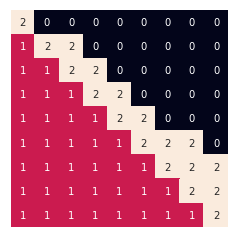

Episode 1336	  Score: -54.54
0.01


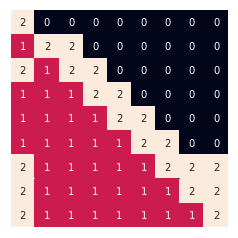

Episode 1337	  Score: -54.10
0.01


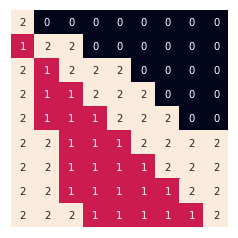

Episode 1338	  Score: -50.70
0.01


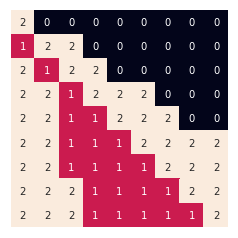

Episode 1339	  Score: -78.78
0.01


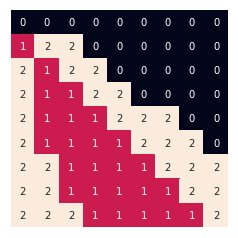

Episode 1340	  Score: -72.13
0.01


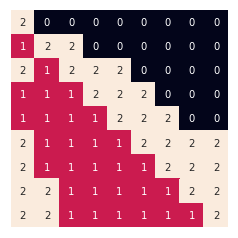

Episode 1341	  Score: -58.53
0.01


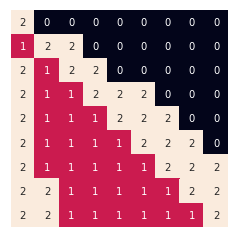

Episode 1342	  Score: -74.94
0.01


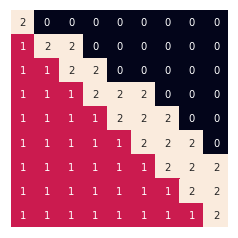

Episode 1343	  Score: -62.89
0.01


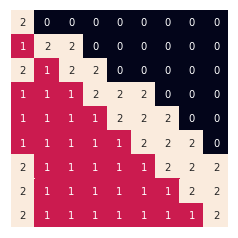

Episode 1344	  Score: -65.79
0.01


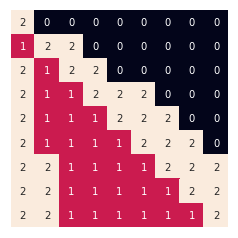

Episode 1345	  Score: -89.92
0.01


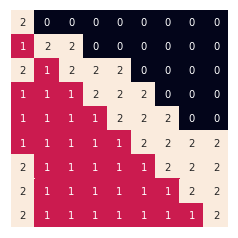

Episode 1346	  Score: -84.08
0.01


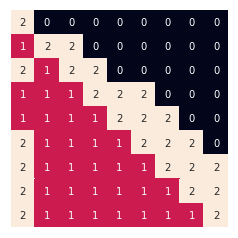

Episode 1347	  Score: -37.44
0.01


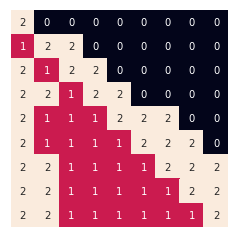

Episode 1348	  Score: -52.18
0.01


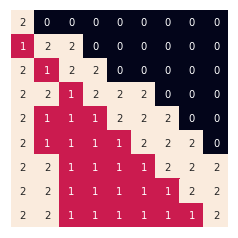

Episode 1349	  Score: -112.30
0.01


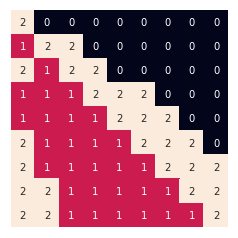

Episode 1350	  Score: -67.92
0.01


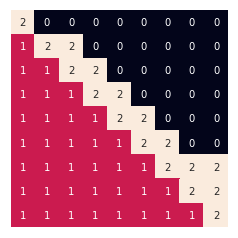

Episode 1351	  Score: -50.11
0.01


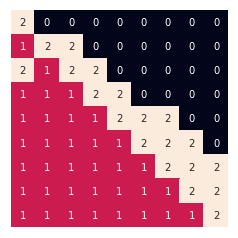

Episode 1352	  Score: -84.37
0.01


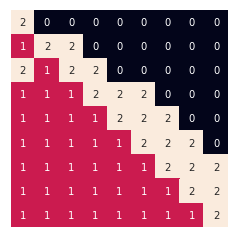

Episode 1353	  Score: -95.92
0.01


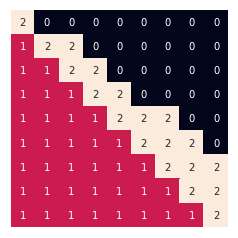

Episode 1354	  Score: -89.54
0.01


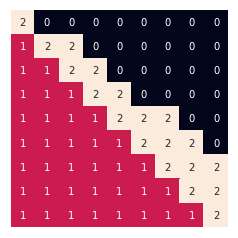

Episode 1355	  Score: -73.27
0.01


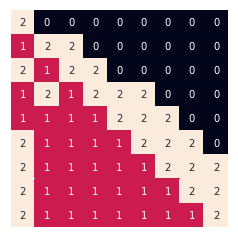

Episode 1356	  Score: -66.13
0.01


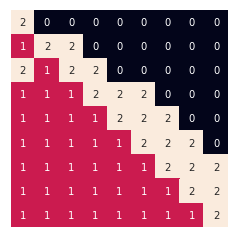

Episode 1357	  Score: -99.65
0.01


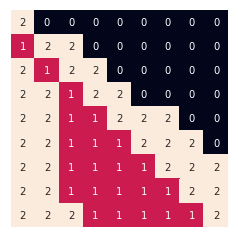

Episode 1358	  Score: -76.63
0.01


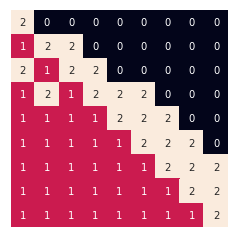

Episode 1359	  Score: -44.94
0.01


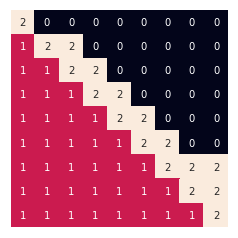

Episode 1360	  Score: -60.91
0.01


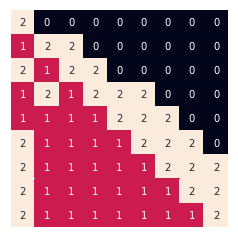

Episode 1361	  Score: -87.91
0.01


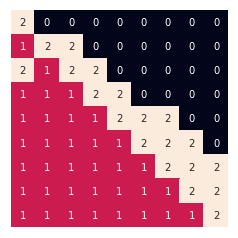

Episode 1362	  Score: -56.99
0.01


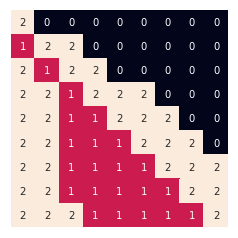

Episode 1363	  Score: -52.57
0.01


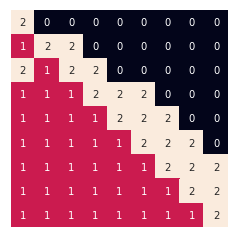

Episode 1364	  Score: -101.06
0.01


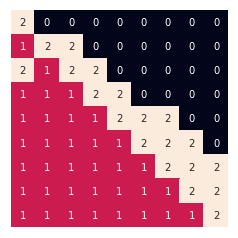

Episode 1365	  Score: -50.68
0.01


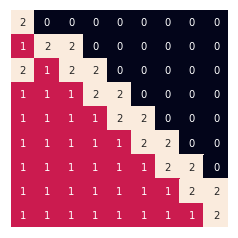

Episode 1366	  Score: -58.06
0.01


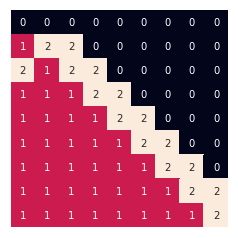

Episode 1367	  Score: -74.06
0.01


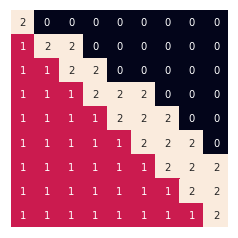

Episode 1368	  Score: -82.29
0.01


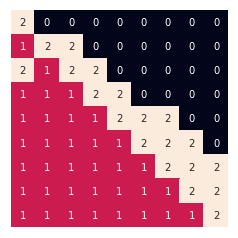

Episode 1369	  Score: -19.30
0.01


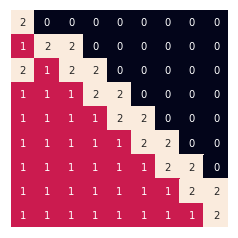

Episode 1370	  Score: -72.65
0.01


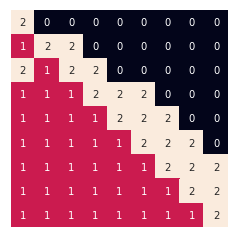

Episode 1371	  Score: -41.53
0.01


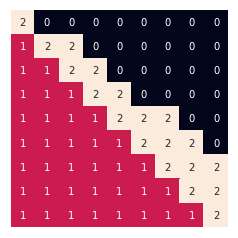

Episode 1372	  Score: -58.48
0.01


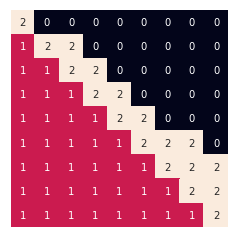

Episode 1373	  Score: -61.49
0.01


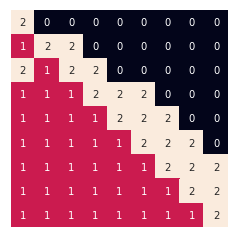

Episode 1374	  Score: -66.37
0.01


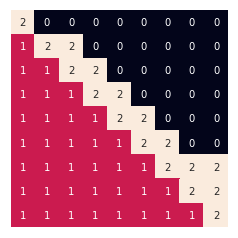

Episode 1375	  Score: -75.67
0.01


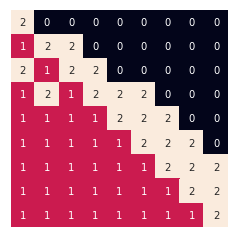

Episode 1376	  Score: -79.43
0.01


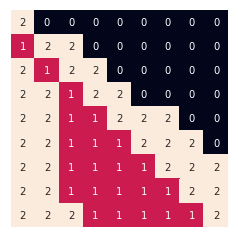

Episode 1377	  Score: -89.04
0.01


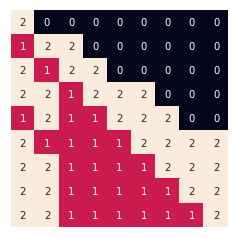

Episode 1378	  Score: -75.35
0.01


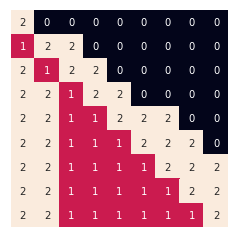

Episode 1379	  Score: -46.89
0.01


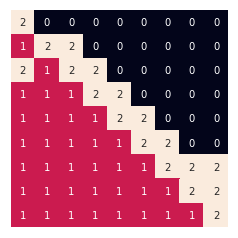

Episode 1380	  Score: -39.51
0.01


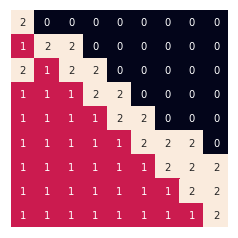

Episode 1381	  Score: -83.11
0.01


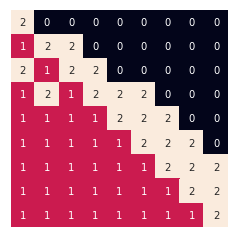

Episode 1382	  Score: -80.49
0.01


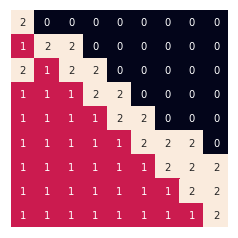

Episode 1383	  Score: -59.89
0.01


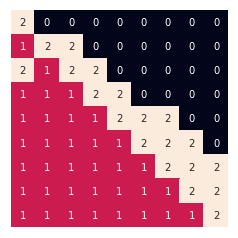

Episode 1384	  Score: -53.46
0.01


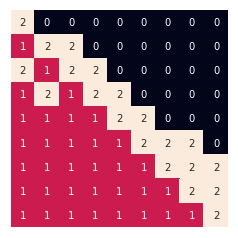

Episode 1385	  Score: -82.68
0.01


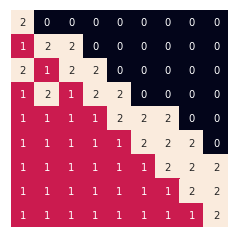

Episode 1386	  Score: -78.19
0.01


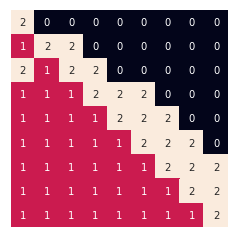

Episode 1387	  Score: -73.81
0.01


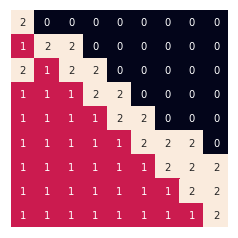

Episode 1388	  Score: -71.24
0.01


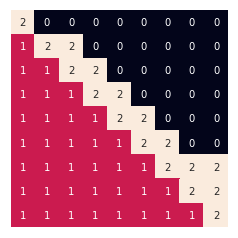

Episode 1389	  Score: -56.92
0.01


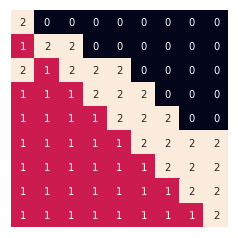

Episode 1390	  Score: -103.86
0.01


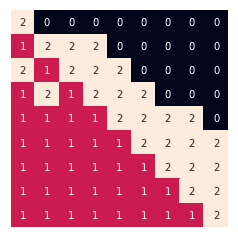

Episode 1391	  Score: -75.91
0.01


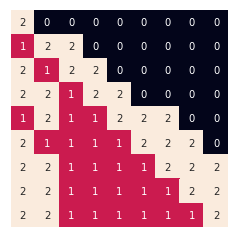

Episode 1392	  Score: -74.27
0.01


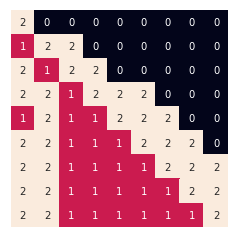

Episode 1393	  Score: -68.72
0.01


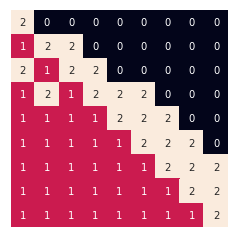

Episode 1394	  Score: -46.22
0.01


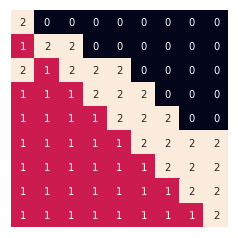

Episode 1395	  Score: -85.67
0.01


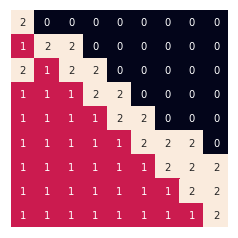

Episode 1396	  Score: -51.65
0.01


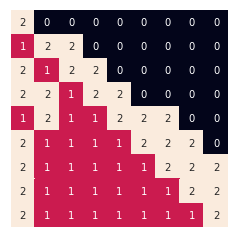

Episode 1397	  Score: -83.11
0.01


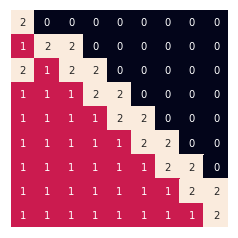

Episode 1398	  Score: -56.41
0.01


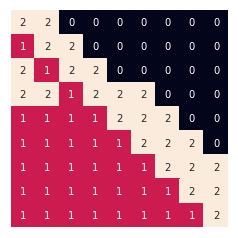

Episode 1399	  Score: -110.36
0.01


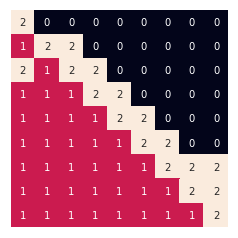

Episode 1400	  Score: -58.23
0.01


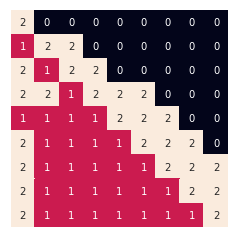

Episode 1401	  Score: -113.15
0.01


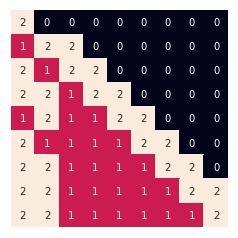

Episode 1402	  Score: -81.57
0.01


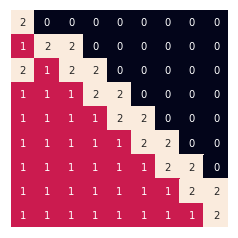

Episode 1403	  Score: -89.08
0.01


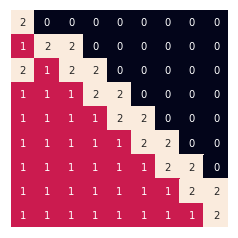

Episode 1404	  Score: -90.70
0.01


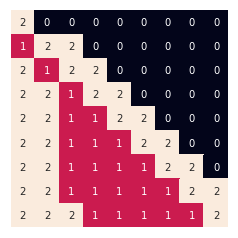

Episode 1405	  Score: -38.13
0.01


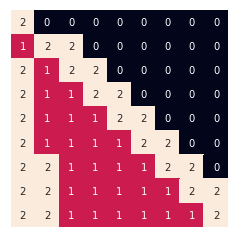

Episode 1406	  Score: -55.97
0.01


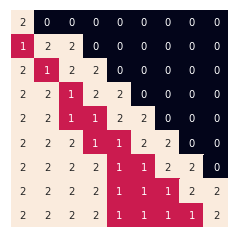

Episode 1407	  Score: -68.15
0.01


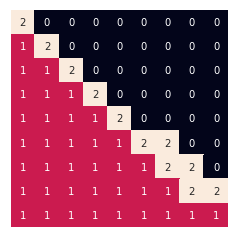

Episode 1408	  Score: -104.75
0.01


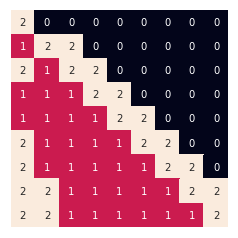

Episode 1409	  Score: -57.94
0.01


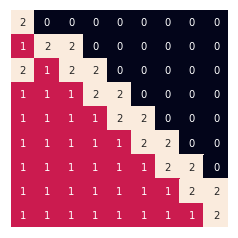

Episode 1410	  Score: -72.91
0.01


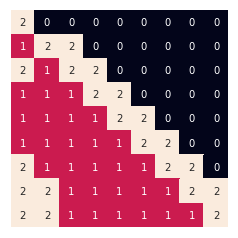

Episode 1411	  Score: -92.08
0.01


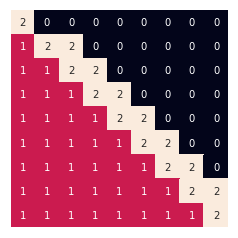

Episode 1412	  Score: -60.48
0.01


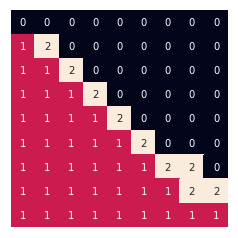

Episode 1413	  Score: -59.49
0.01


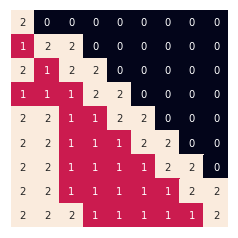

Episode 1414	  Score: -85.19
0.01


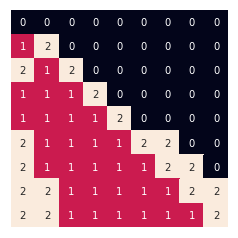

Episode 1415	  Score: -88.34
0.01


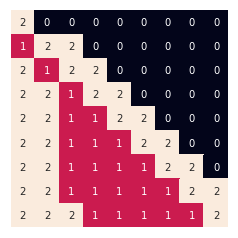

Episode 1416	  Score: -74.65
0.01


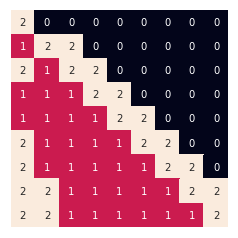

Episode 1417	  Score: -29.89
0.01


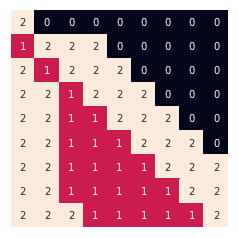

Episode 1418	  Score: -70.89
0.01


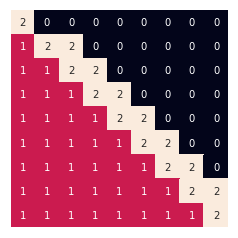

Episode 1419	  Score: -57.48
0.01


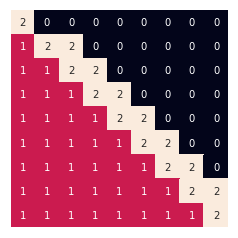

Episode 1420	  Score: -61.03
0.01


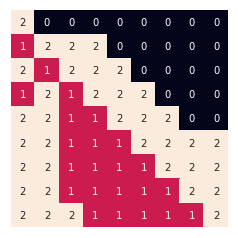

Episode 1421	  Score: -76.01
0.01


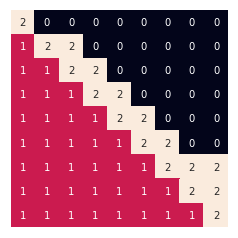

Episode 1422	  Score: -48.91
0.01


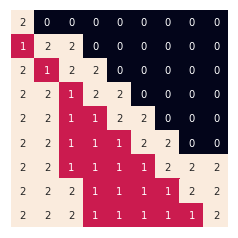

Episode 1423	  Score: -57.65
0.01


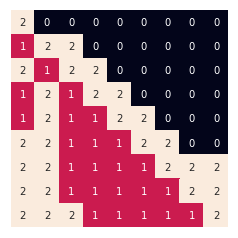

Episode 1424	  Score: -91.95
0.01


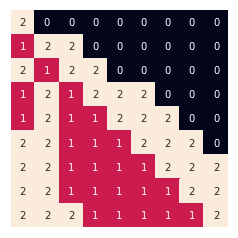

Episode 1425	  Score: -54.27
0.01


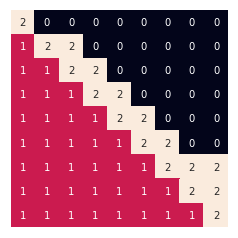

Episode 1426	  Score: -79.76
0.01


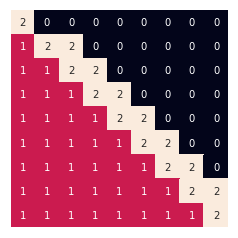

Episode 1427	  Score: -53.70
0.01


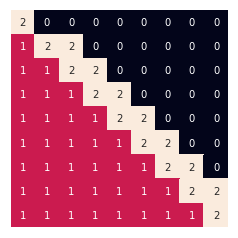

Episode 1428	  Score: -94.99
0.01


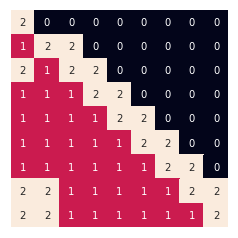

Episode 1429	  Score: -91.15
0.01


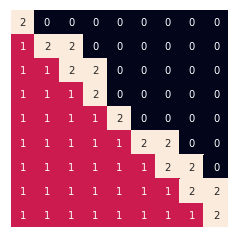

Episode 1430	  Score: -57.32
0.01


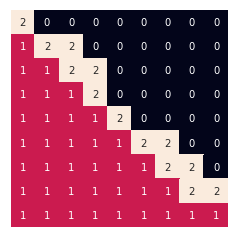

Episode 1431	  Score: -70.32
0.01


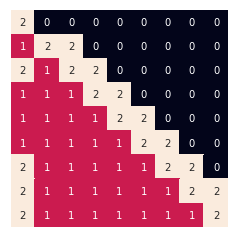

Episode 1432	  Score: -69.91
0.01


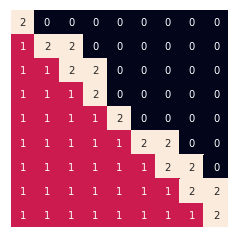

Episode 1433	  Score: -69.65
0.01


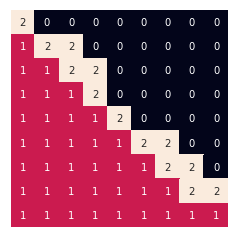

Episode 1434	  Score: -72.05
0.01


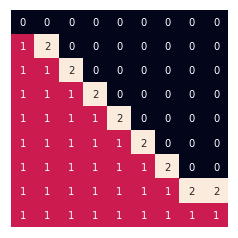

Episode 1435	  Score: -65.11
0.01


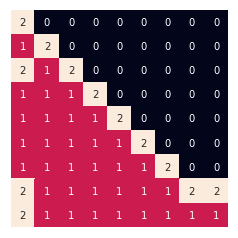

Episode 1436	  Score: -39.20
0.01


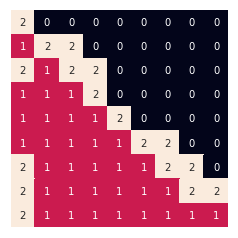

Episode 1437	  Score: -62.73
0.01


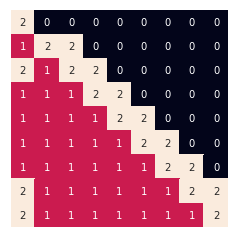

Episode 1438	  Score: -79.51
0.01


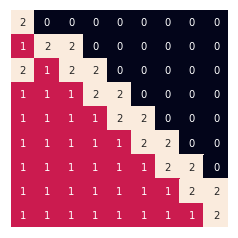

Episode 1439	  Score: -71.54
0.01


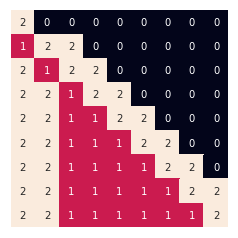

Episode 1440	  Score: -52.06
0.01


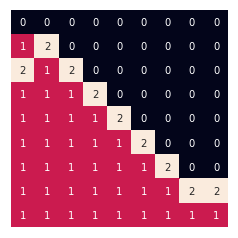

Episode 1441	  Score: -80.10
0.01


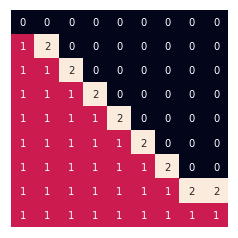

Episode 1442	  Score: -70.43
0.01


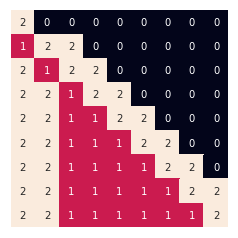

Episode 1443	  Score: -63.08
0.01


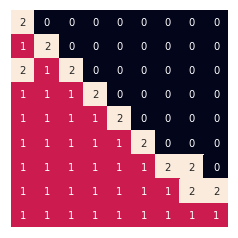

Episode 1444	  Score: -77.10
0.01


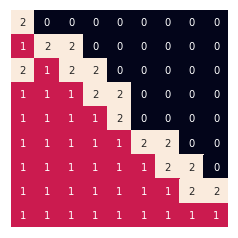

Episode 1445	  Score: -64.10
0.01


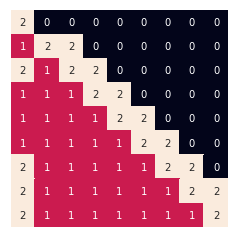

Episode 1446	  Score: -90.84
0.01


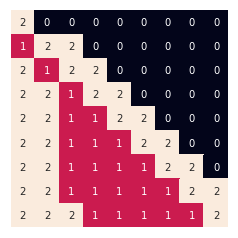

Episode 1447	  Score: -43.06
0.01


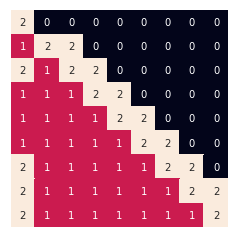

Episode 1448	  Score: -84.30
0.01


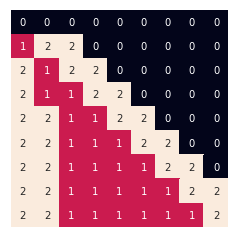

Episode 1449	  Score: -73.73
0.01


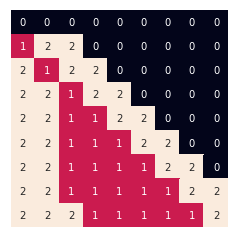

Episode 1450	  Score: -33.67
0.01


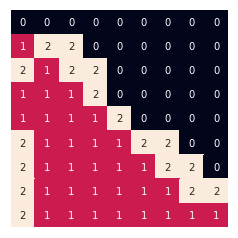

Episode 1451	  Score: -36.48
0.01


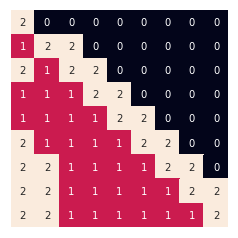

Episode 1452	  Score: -73.49
0.01


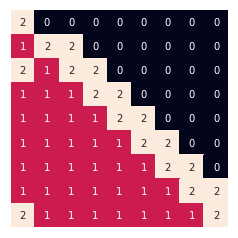

Episode 1453	  Score: -95.65
0.01


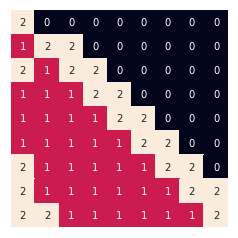

Episode 1454	  Score: -61.43
0.01


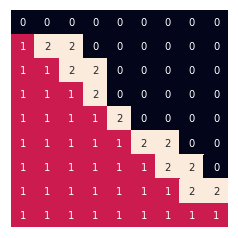

Episode 1455	  Score: -65.15
0.01


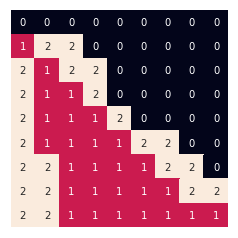

Episode 1456	  Score: -88.08
0.01


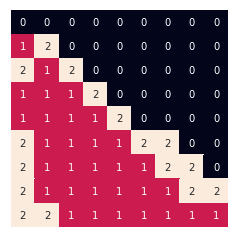

Episode 1457	  Score: -65.06
0.01


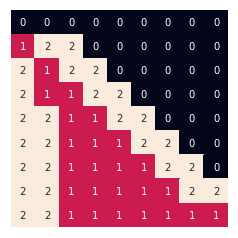

Episode 1458	  Score: -46.25
0.01


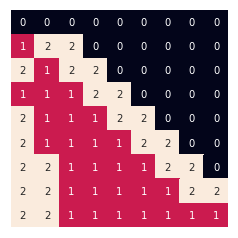

Episode 1459	  Score: -68.91
0.01


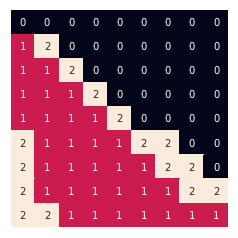

Episode 1460	  Score: -81.78
0.01


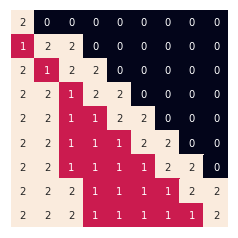

Episode 1461	  Score: -64.10
0.01


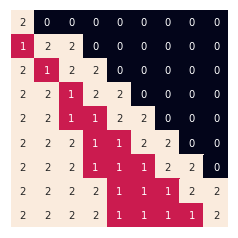

Episode 1462	  Score: -37.44
0.01


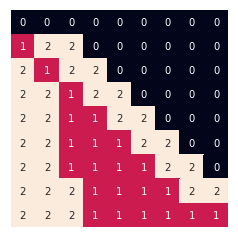

Episode 1463	  Score: -54.68
0.01


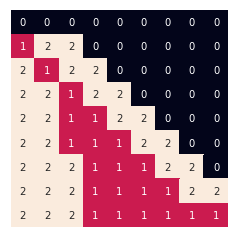

Episode 1464	  Score: -72.46
0.01


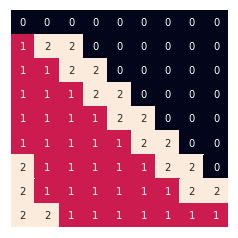

Episode 1465	  Score: -34.29
0.01


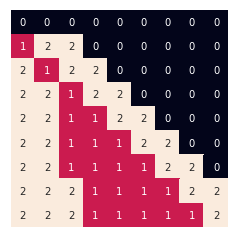

Episode 1466	  Score: -58.51
0.01


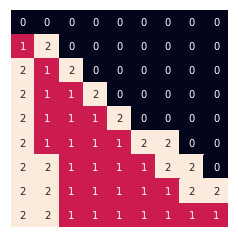

Episode 1467	  Score: -54.54
0.01


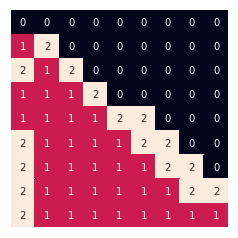

Episode 1468	  Score: -93.06
0.01


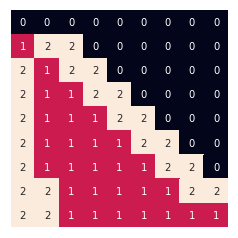

Episode 1469	  Score: -71.72
0.01


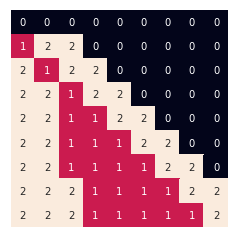

Episode 1470	  Score: -66.27
0.01


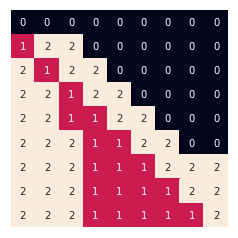

Episode 1471	  Score: -80.03
0.01


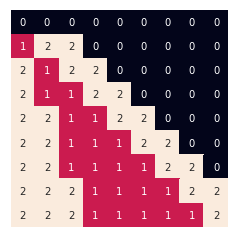

Episode 1472	  Score: -86.67
0.01


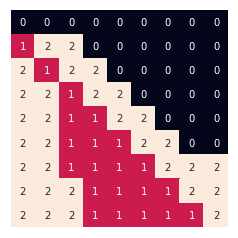

Episode 1473	  Score: -85.03
0.01


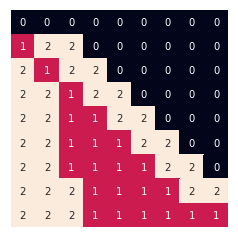

Episode 1474	  Score: -65.95
0.01


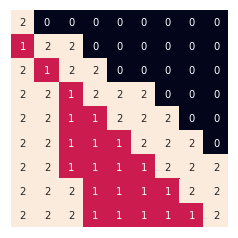

Episode 1475	  Score: -78.99
0.01


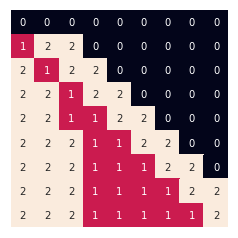

Episode 1476	  Score: -54.29
0.01


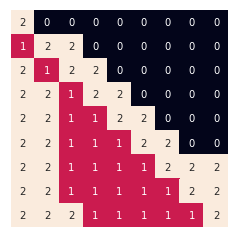

Episode 1477	  Score: -86.84
0.01


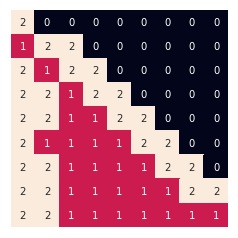

Episode 1478	  Score: -30.84
0.01


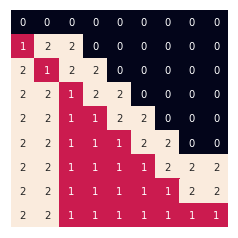

Episode 1479	  Score: -75.49
0.01


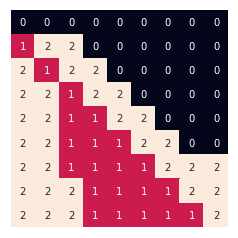

Episode 1480	  Score: -102.48
0.01


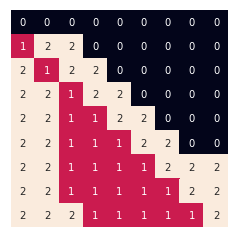

Episode 1481	  Score: -97.97
0.01


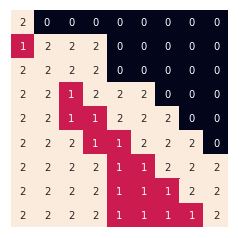

Episode 1482	  Score: -53.81
0.01


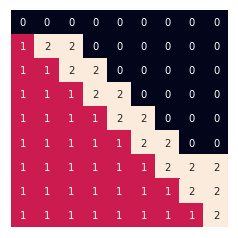

Episode 1483	  Score: -68.68
0.01


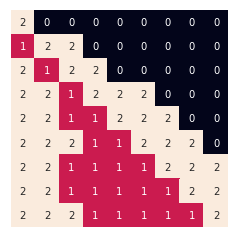

Episode 1484	  Score: -45.94
0.01


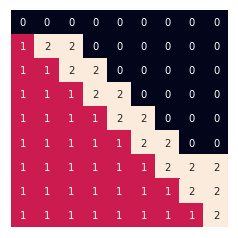

Episode 1485	  Score: -69.10
0.01


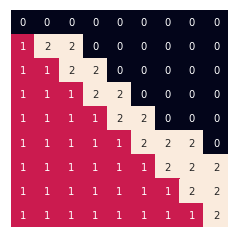

Episode 1486	  Score: -100.76
0.01


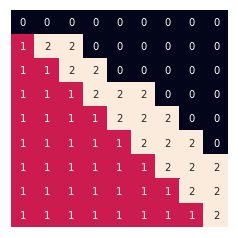

Episode 1487	  Score: -49.06
0.01


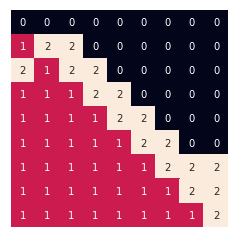

Episode 1488	  Score: -62.75
0.01


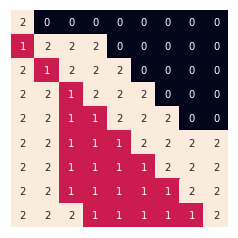

Episode 1489	  Score: -93.34
0.01


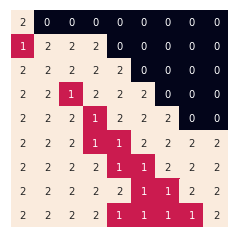

Episode 1490	  Score: -60.94
0.01


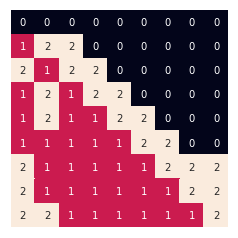

Episode 1491	  Score: -36.13
0.01


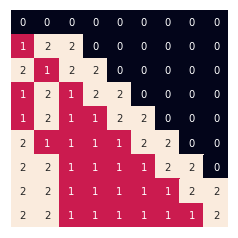

Episode 1492	  Score: -28.60
0.01


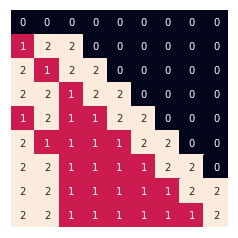

Episode 1493	  Score: -77.54
0.01


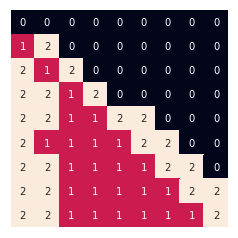

Episode 1494	  Score: -79.24
0.01


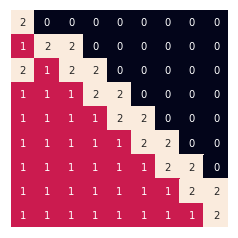

Episode 1495	  Score: -73.92
0.01


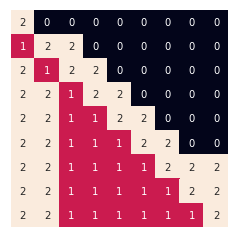

Episode 1496	  Score: -88.72
0.01


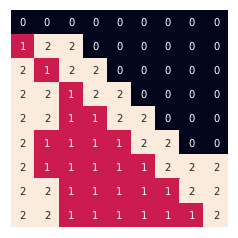

Episode 1497	  Score: -74.63
0.01


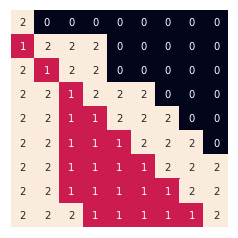

Episode 1498	  Score: -49.46
0.01


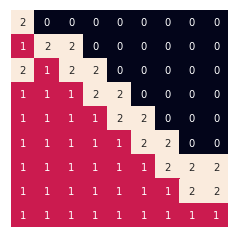

Episode 1499	  Score: -56.44
0.01


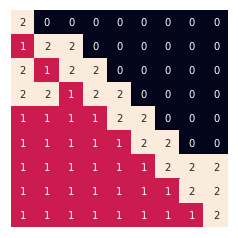

Episode 1500	  Score: -78.51
0.01


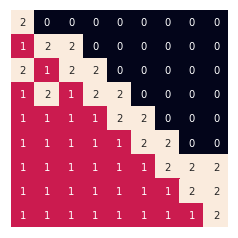

Episode 1501	  Score: -67.59
0.01


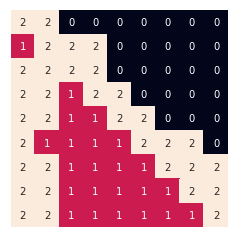

Episode 1502	  Score: -117.06
0.01


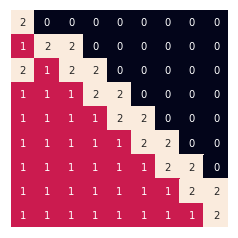

Episode 1503	  Score: -66.48
0.01


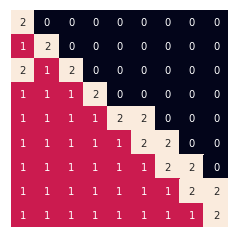

Episode 1504	  Score: -51.68
0.01


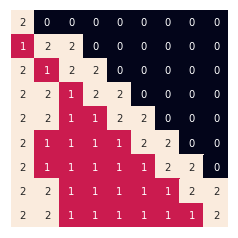

Episode 1505	  Score: -73.25
0.01


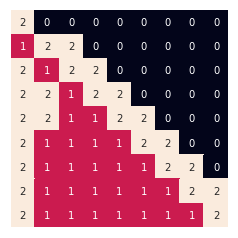

Episode 1506	  Score: -85.24
0.01


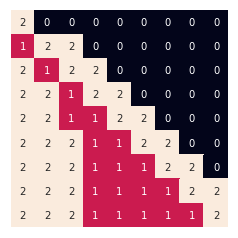

Episode 1507	  Score: -74.27
0.01


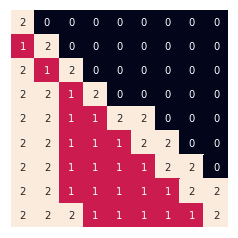

Episode 1508	  Score: -54.60
0.01


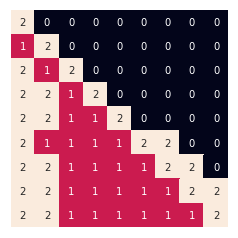

Episode 1509	  Score: -81.15
0.01


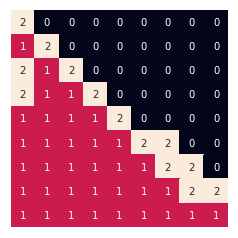

Episode 1510	  Score: -89.62
0.01


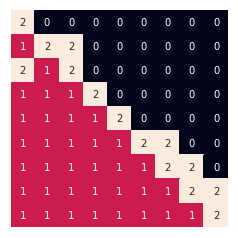

Episode 1511	  Score: -89.24
0.01


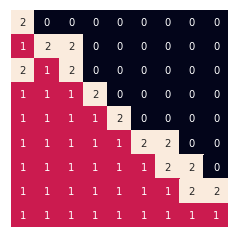

Episode 1512	  Score: -90.54
0.01


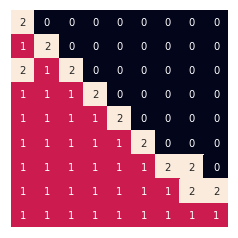

Episode 1513	  Score: -90.65
0.01


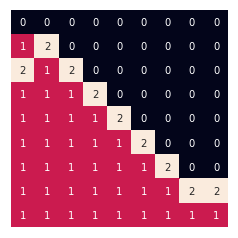

Episode 1514	  Score: -43.49
0.01


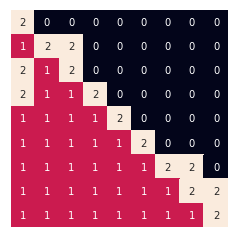

Episode 1515	  Score: -74.05
0.01


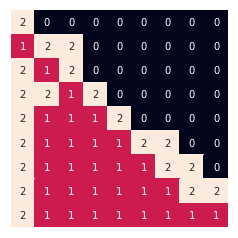

Episode 1516	  Score: -69.08
0.01


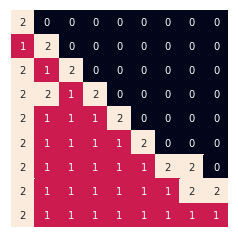

Episode 1517	  Score: -89.08
0.01


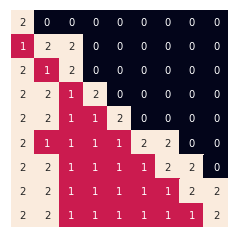

Episode 1518	  Score: -73.44
0.01


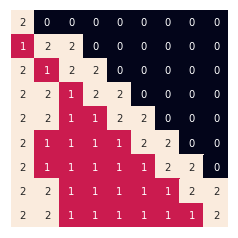

Episode 1519	  Score: -63.10
0.01


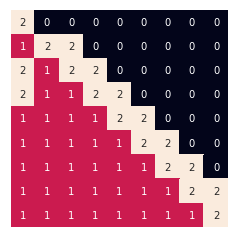

Episode 1520	  Score: -82.65
0.01


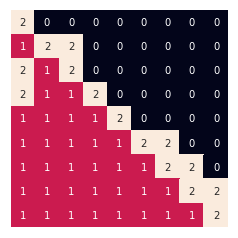

Episode 1521	  Score: -68.48
0.01


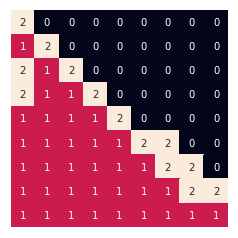

Episode 1522	  Score: -48.27
0.01


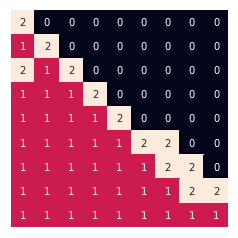

Episode 1523	  Score: -35.29
0.01


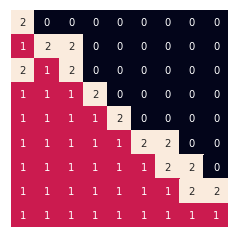

Episode 1524	  Score: -87.01
0.01


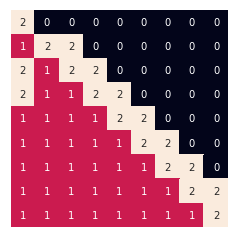

Episode 1525	  Score: -62.53
0.01


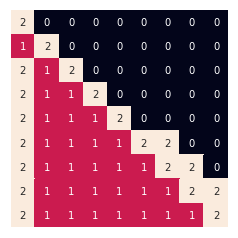

Episode 1526	  Score: -70.82
0.01


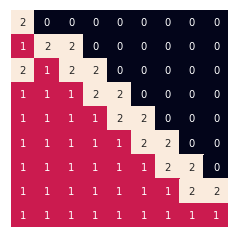

Episode 1527	  Score: -65.89
0.01


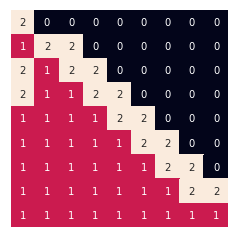

Episode 1528	  Score: -32.01
0.01


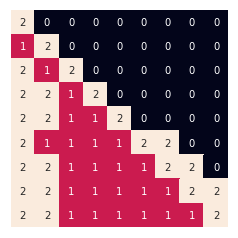

Episode 1529	  Score: -71.32
0.01


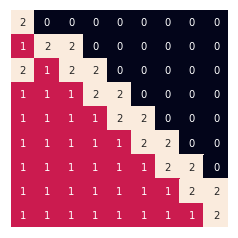

Episode 1530	  Score: -97.05
0.01


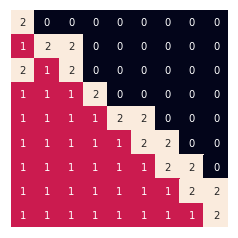

Episode 1531	  Score: -37.89
0.01


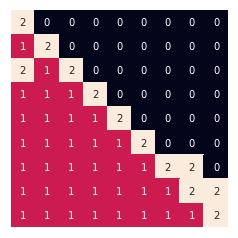

Episode 1532	  Score: -80.81
0.01


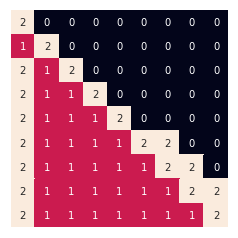

Episode 1533	  Score: -44.30
0.01


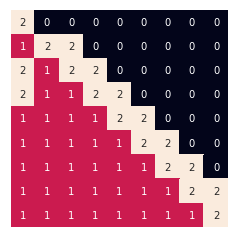

Episode 1534	  Score: -36.49
0.01


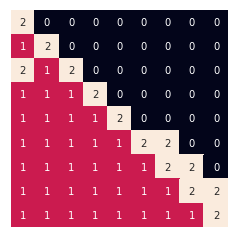

Episode 1535	  Score: -32.84
0.01


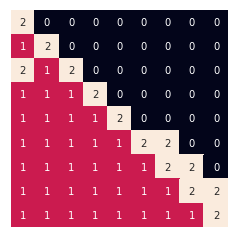

Episode 1536	  Score: -49.06
0.01


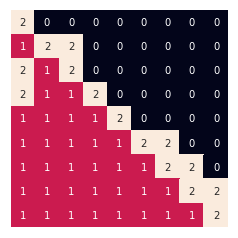

Episode 1537	  Score: -62.44
0.01


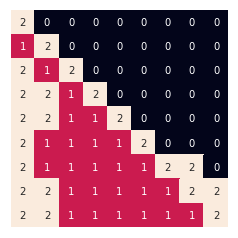

Episode 1538	  Score: -63.53
0.01


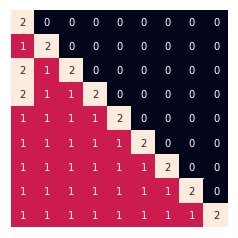

Episode 1539	  Score: -61.22
0.01


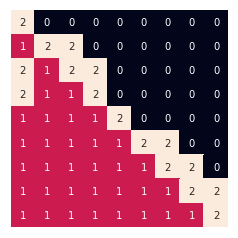

Episode 1540	  Score: -63.87
0.01


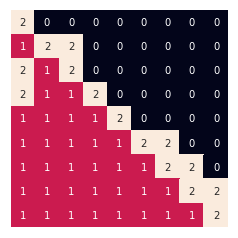

Episode 1541	  Score: -54.27
0.01


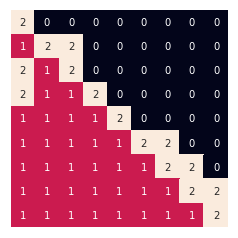

Episode 1542	  Score: -39.01
0.01


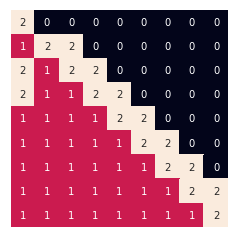

Episode 1543	  Score: -71.70
0.01


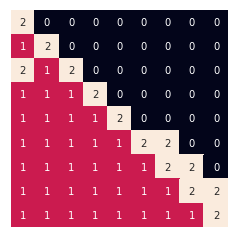

Episode 1544	  Score: -49.63
0.01


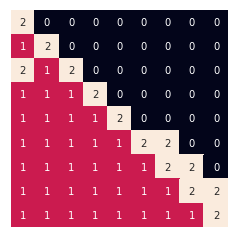

Episode 1545	  Score: -65.68
0.01


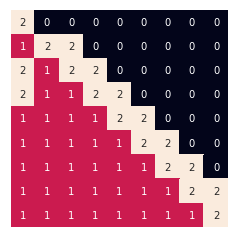

Episode 1546	  Score: -49.67
0.01


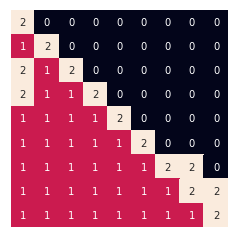

Episode 1547	  Score: -61.75
0.01


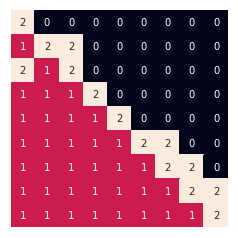

Episode 1548	  Score: -36.91
0.01


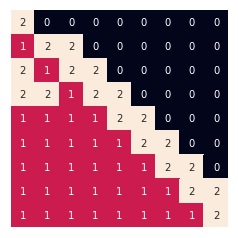

Episode 1549	  Score: -81.35
0.01


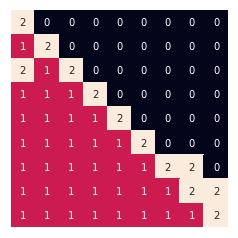

Episode 1550	  Score: -104.91
0.01


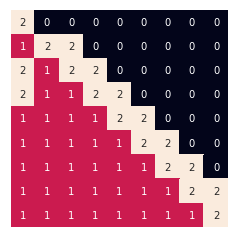

Episode 1551	  Score: -0.37
0.01


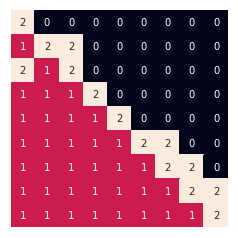

Episode 1552	  Score: -46.33
0.01


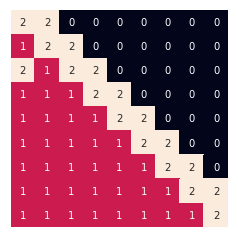

Episode 1553	  Score: -103.54
0.01


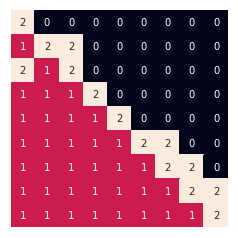

Episode 1554	  Score: -75.51
0.01


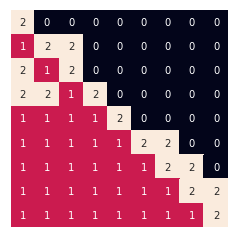

Episode 1555	  Score: -92.94
0.01


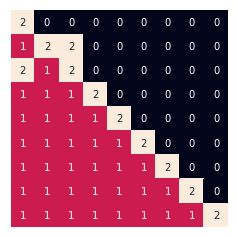

Episode 1556	  Score: -63.82
0.01


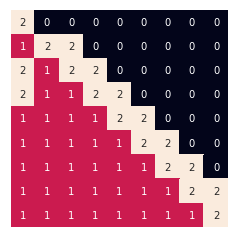

Episode 1557	  Score: -105.51
0.01


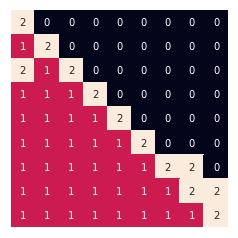

Episode 1558	  Score: -45.94
0.01


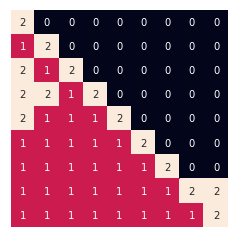

Episode 1559	  Score: -74.44
0.01


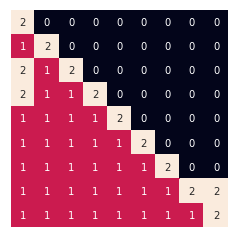

Episode 1560	  Score: -79.35
0.01


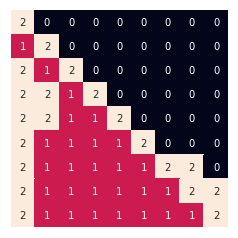

Episode 1561	  Score: -66.49
0.01


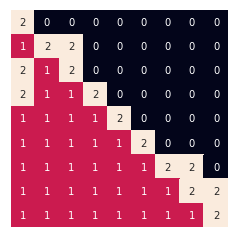

Episode 1562	  Score: -39.08
0.01


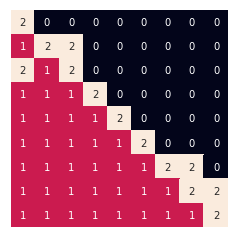

Episode 1563	  Score: -91.14
0.01


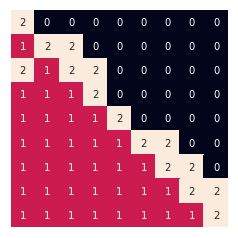

Episode 1564	  Score: -58.43
0.01


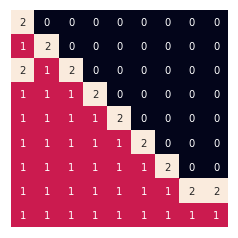

Episode 1565	  Score: -57.57
0.01


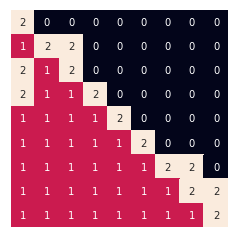

Episode 1566	  Score: -86.19
0.01


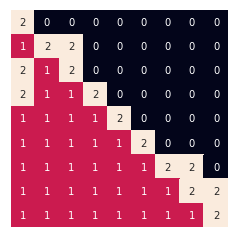

Episode 1567	  Score: -71.65
0.01


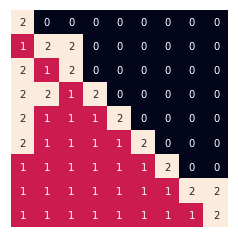

Episode 1568	  Score: -79.11
0.01


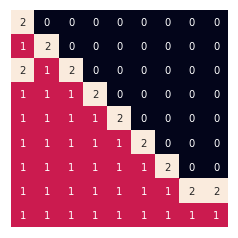

Episode 1569	  Score: -82.87
0.01


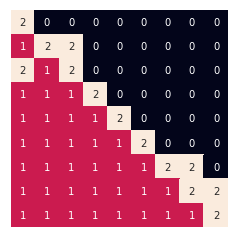

Episode 1570	  Score: -57.68
0.01


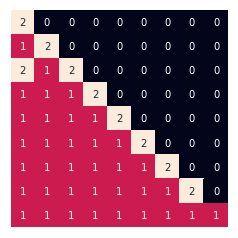

Episode 1571	  Score: -92.25
0.01


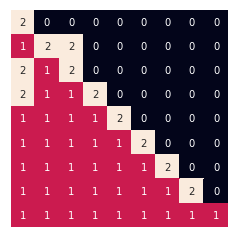

Episode 1572	  Score: -80.68
0.01


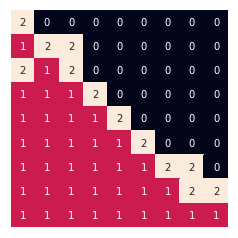

Episode 1573	  Score: -48.91
0.01


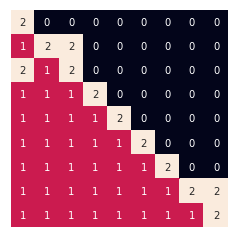

Episode 1574	  Score: -74.06
0.01


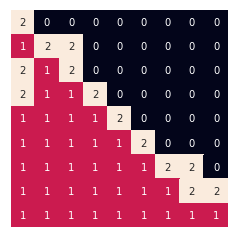

Episode 1575	  Score: -89.48
0.01


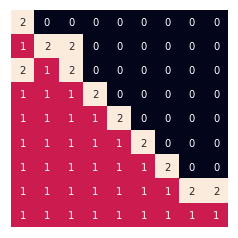

Episode 1576	  Score: -49.53
0.01


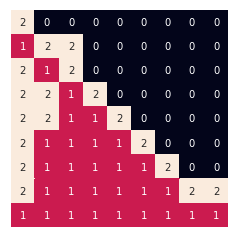

Episode 1577	  Score: -94.32
0.01


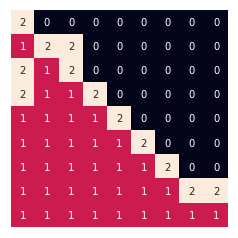

Episode 1578	  Score: -61.05
0.01


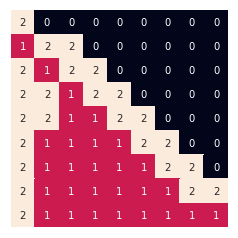

Episode 1579	  Score: -61.53
0.01


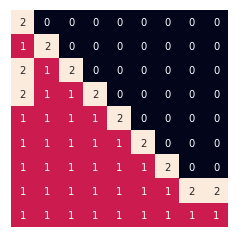

Episode 1580	  Score: -69.37
0.01


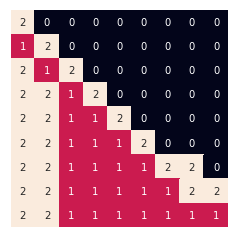

Episode 1581	  Score: -100.16
0.01


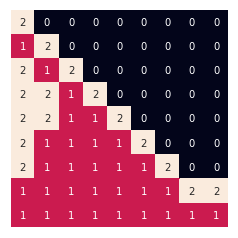

Episode 1582	  Score: -70.35
0.01


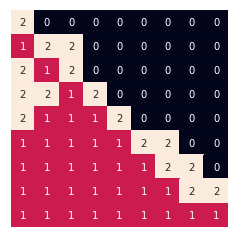

Episode 1583	  Score: -43.54
0.01


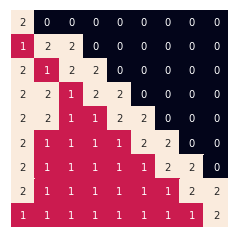

Episode 1584	  Score: -72.87
0.01


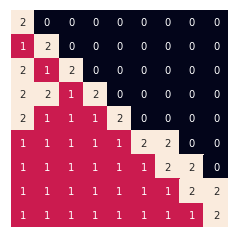

Episode 1585	  Score: -74.63
0.01


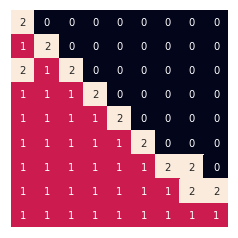

Episode 1586	  Score: -61.87
0.01


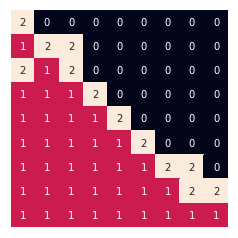

Episode 1587	  Score: -69.06
0.01


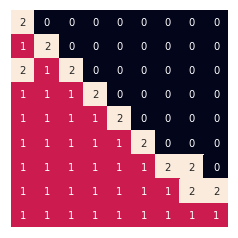

Episode 1588	  Score: -60.51
0.01


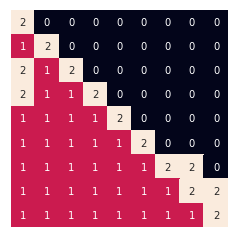

Episode 1589	  Score: -63.68
0.01


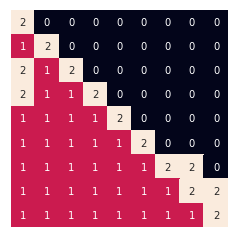

Episode 1590	  Score: -70.32
0.01


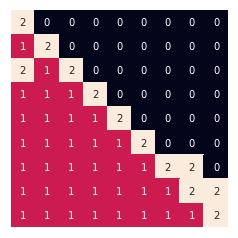

Episode 1591	  Score: -93.75
0.01


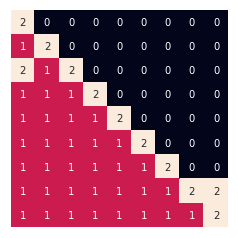

Episode 1592	  Score: -83.24
0.01


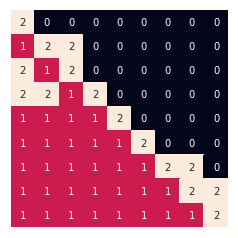

Episode 1593	  Score: -83.36
0.01


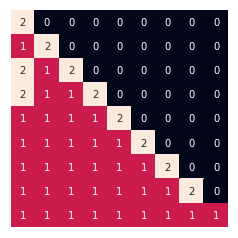

Episode 1594	  Score: -63.87
0.01


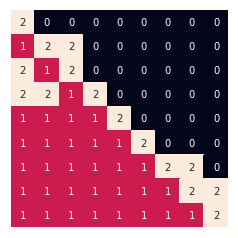

Episode 1595	  Score: -58.30
0.01


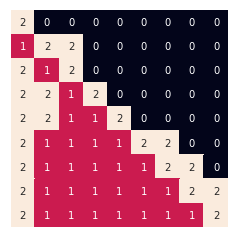

Episode 1596	  Score: -87.82
0.01


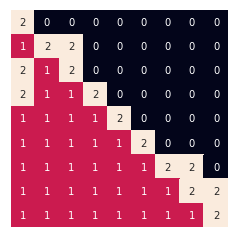

Episode 1597	  Score: -83.10
0.01


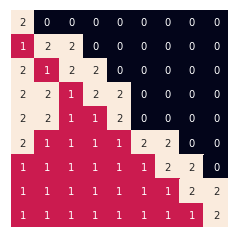

Episode 1598	  Score: -64.01
0.01


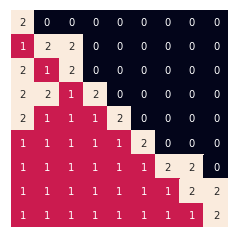

Episode 1599	  Score: -81.13
0.01


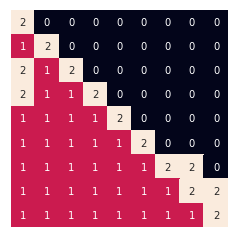

Episode 1600	  Score: -70.89
0.01


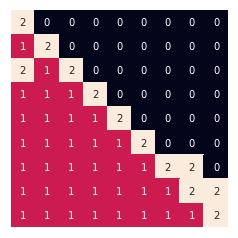

Episode 1601	  Score: -76.29
0.01


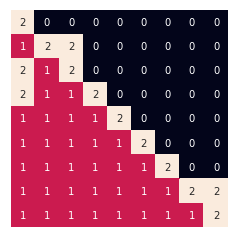

Episode 1602	  Score: -89.78
0.01


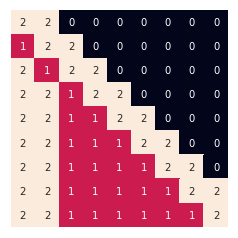

Episode 1603	  Score: -105.17
0.01


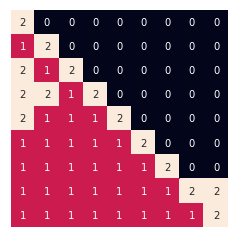

Episode 1604	  Score: -53.43
0.01


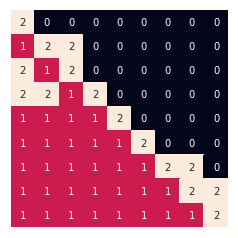

Episode 1605	  Score: -50.92
0.01


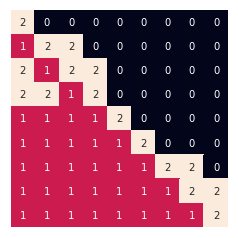

Episode 1606	  Score: -63.63
0.01


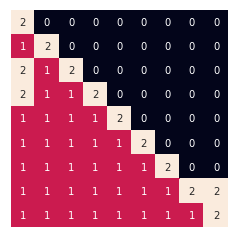

Episode 1607	  Score: -52.94
0.01


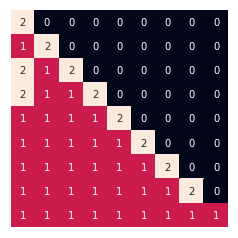

Episode 1608	  Score: -73.72
0.01


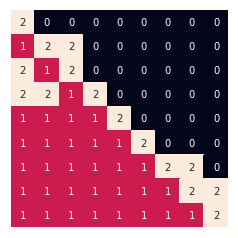

Episode 1609	  Score: -68.25
0.01


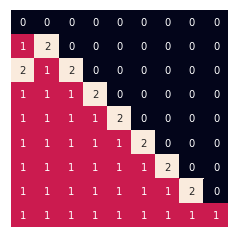

Episode 1610	  Score: -82.27
0.01


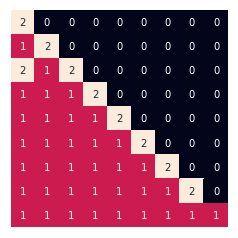

Episode 1611	  Score: -77.51
0.01


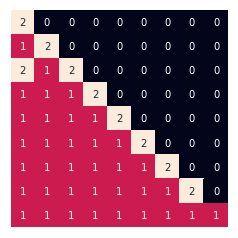

Episode 1612	  Score: -75.95
0.01


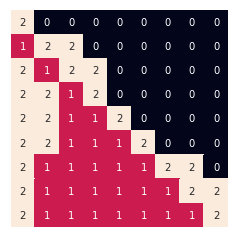

Episode 1613	  Score: -66.65
0.01


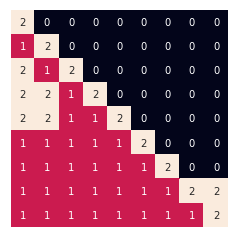

Episode 1614	  Score: -62.59
0.01


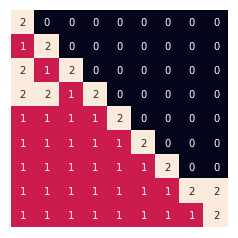

Episode 1615	  Score: -65.41
0.01


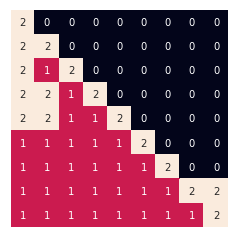

Episode 1616	  Score: -73.50
0.01


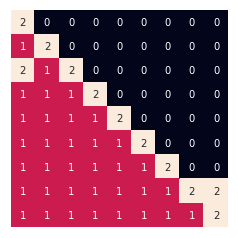

Episode 1617	  Score: -77.32
0.01


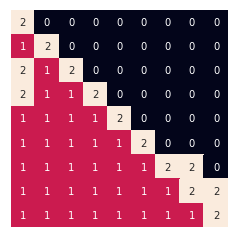

Episode 1618	  Score: -92.29
0.01


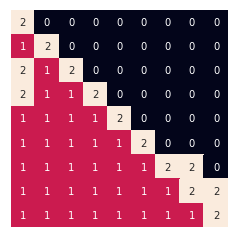

Episode 1619	  Score: -81.69
0.01


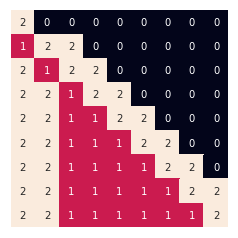

Episode 1620	  Score: -88.12
0.01


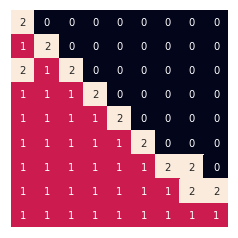

Episode 1621	  Score: -51.08
0.01


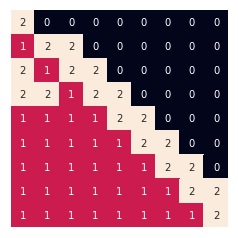

Episode 1622	  Score: -72.08
0.01


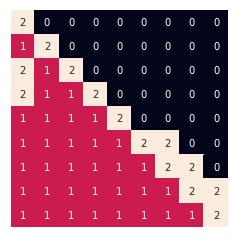

Episode 1623	  Score: -74.86
0.01


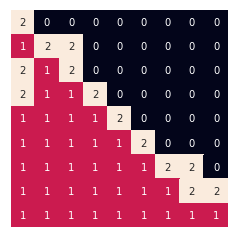

Episode 1624	  Score: -78.26
0.01


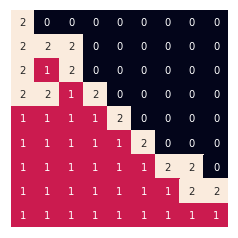

Episode 1625	  Score: -81.77
0.01


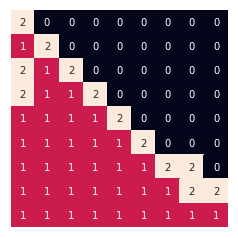

Episode 1626	  Score: -64.09
0.01


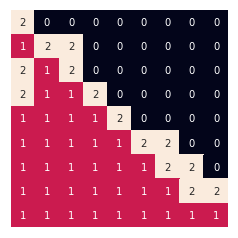

Episode 1627	  Score: -97.27
0.01


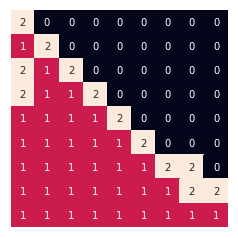

Episode 1628	  Score: -72.49
0.01


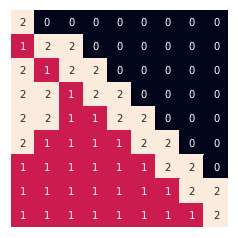

Episode 1629	  Score: -59.34
0.01


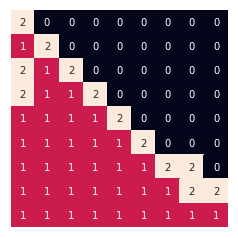

Episode 1630	  Score: -73.73
0.01


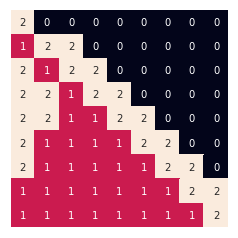

Episode 1631	  Score: -68.92
0.01


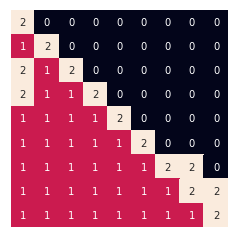

Episode 1632	  Score: -92.57
0.01


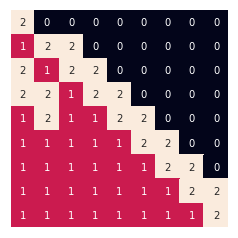

Episode 1633	  Score: -85.32
0.01


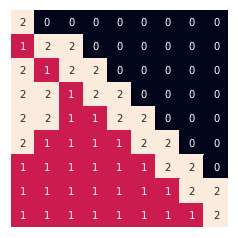

Episode 1634	  Score: -75.75
0.01


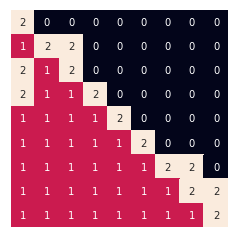

Episode 1635	  Score: -78.06
0.01


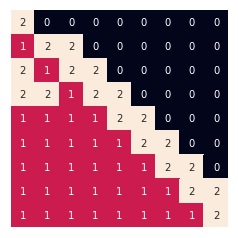

Episode 1636	  Score: -79.11
0.01


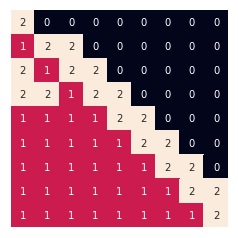

Episode 1637	  Score: -90.30
0.01


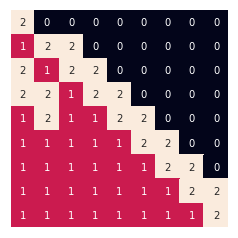

Episode 1638	  Score: -62.56
0.01


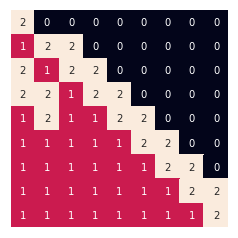

Episode 1639	  Score: -51.11
0.01


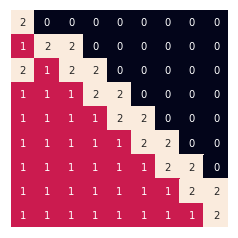

Episode 1640	  Score: -67.92
0.01


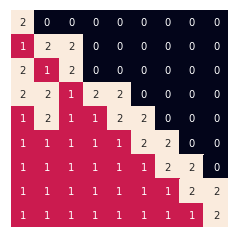

Episode 1641	  Score: -77.99
0.01


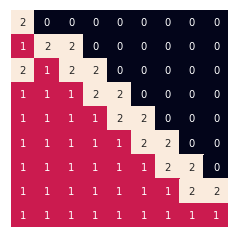

Episode 1642	  Score: -77.76
0.01


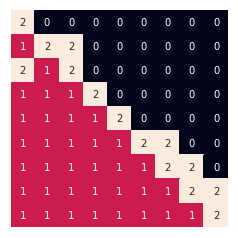

Episode 1643	  Score: -70.81
0.01


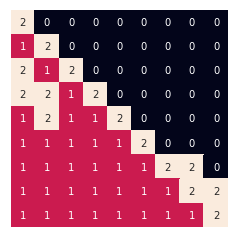

Episode 1644	  Score: -79.68
0.01


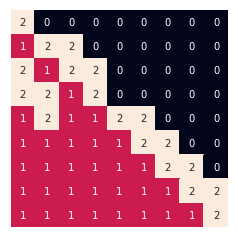

Episode 1645	  Score: -68.10
0.01


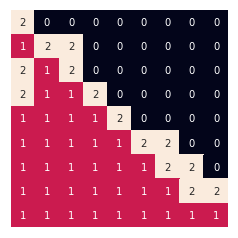

Episode 1646	  Score: -40.89
0.01


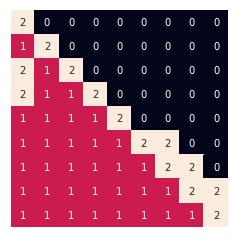

Episode 1647	  Score: -65.11
0.01


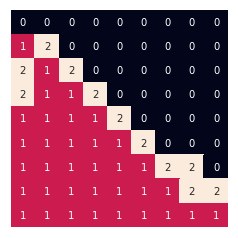

Episode 1648	  Score: -76.86
0.01


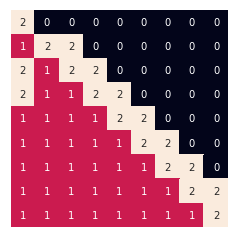

Episode 1649	  Score: -85.95
0.01


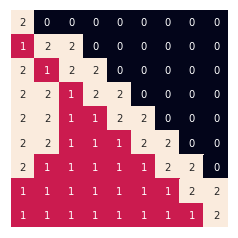

Episode 1650	  Score: -64.68
0.01


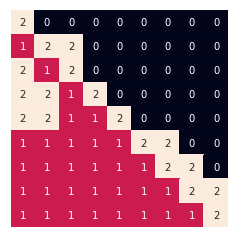

Episode 1651	  Score: -98.30
0.01


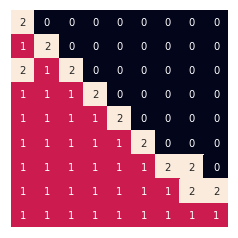

Episode 1652	  Score: -50.94
0.01


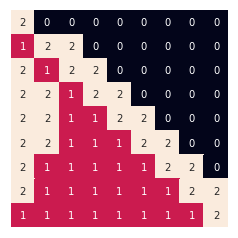

Episode 1653	  Score: -57.61
0.01


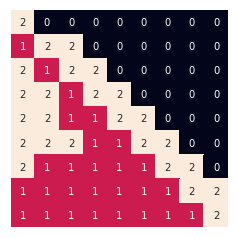

Episode 1654	  Score: -39.46
0.01


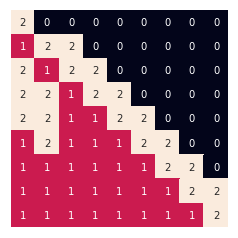

Episode 1655	  Score: -57.25
0.01


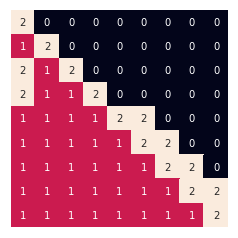

Episode 1656	  Score: -93.49
0.01


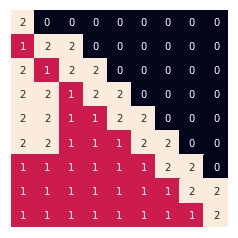

Episode 1657	  Score: -72.34
0.01


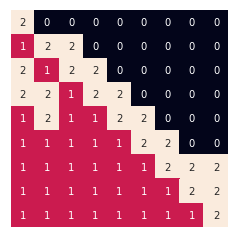

Episode 1658	  Score: -73.72
0.01


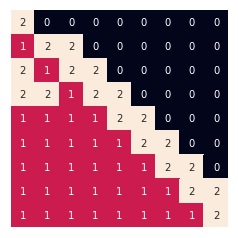

Episode 1659	  Score: -83.48
0.01


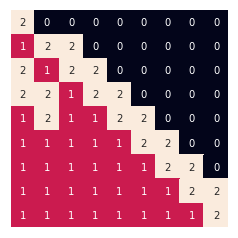

Episode 1660	  Score: -53.70
0.01


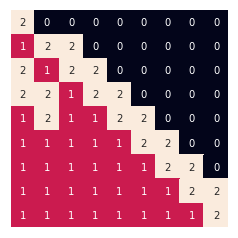

Episode 1661	  Score: -66.08
0.01


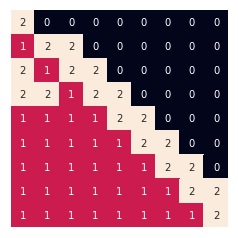

Episode 1662	  Score: -55.92
0.01


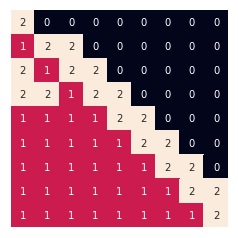

Episode 1663	  Score: -69.29
0.01


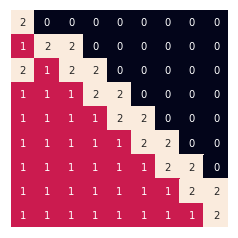

Episode 1664	  Score: -66.27
0.01


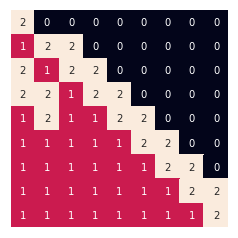

Episode 1665	  Score: -58.27
0.01


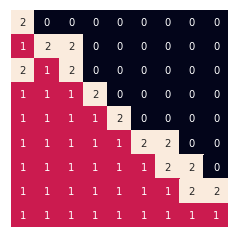

Episode 1666	  Score: -83.32
0.01


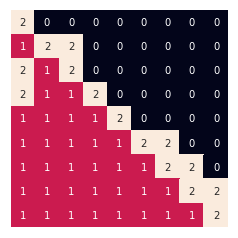

Episode 1667	  Score: -77.51
0.01


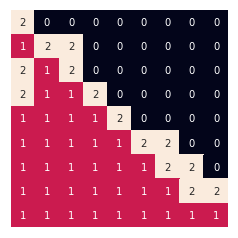

Episode 1668	  Score: -69.16
0.01


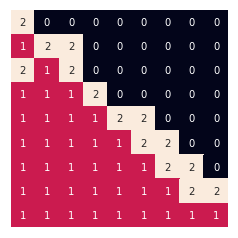

Episode 1669	  Score: -51.51
0.01


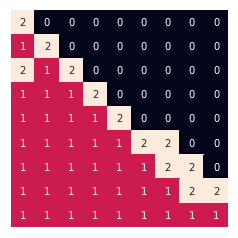

Episode 1670	  Score: -76.68
0.01


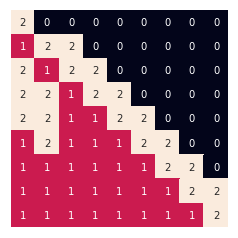

Episode 1671	  Score: -82.25
0.01


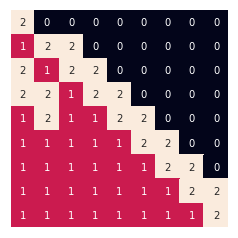

Episode 1672	  Score: -75.34
0.01


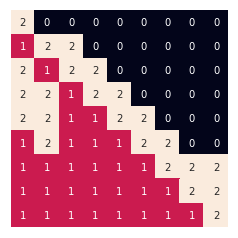

Episode 1673	  Score: -68.97
0.01


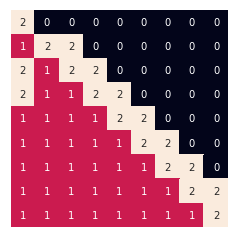

Episode 1674	  Score: -20.48
0.01


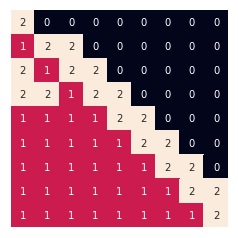

Episode 1675	  Score: -64.15
0.01


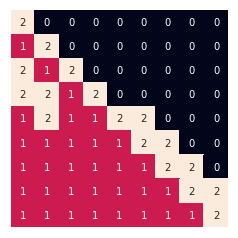

Episode 1676	  Score: -88.27
0.01


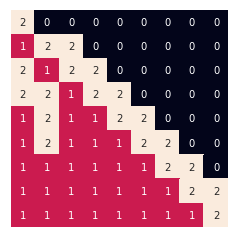

Episode 1677	  Score: -32.44
0.01


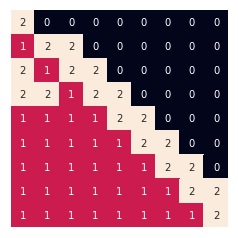

Episode 1678	  Score: -54.56
0.01


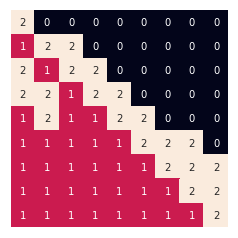

Episode 1679	  Score: -69.92
0.01


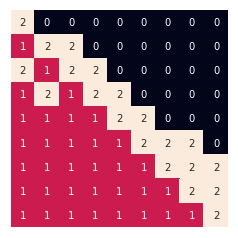

Episode 1680	  Score: -58.87
0.01


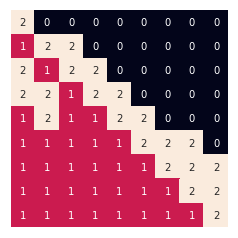

Episode 1681	  Score: -68.34
0.01


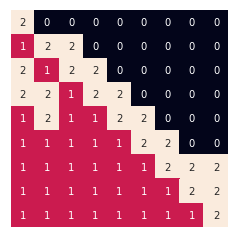

Episode 1682	  Score: -71.92
0.01


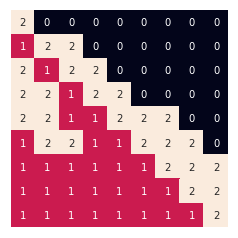

Episode 1683	  Score: -56.91
0.01


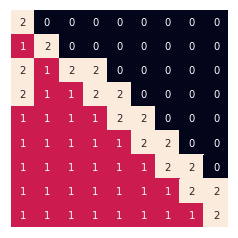

Episode 1684	  Score: -40.65
0.01


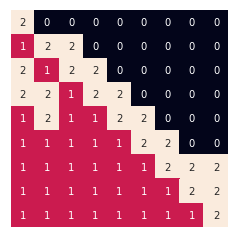

Episode 1685	  Score: -58.68
0.01


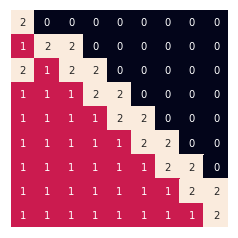

Episode 1686	  Score: -59.72
0.01


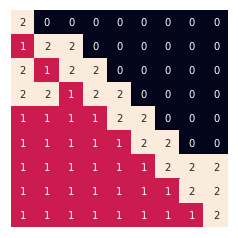

Episode 1687	  Score: -46.11
0.01


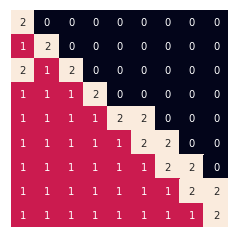

Episode 1688	  Score: -84.38
0.01


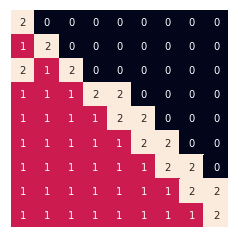

Episode 1689	  Score: -68.67
0.01


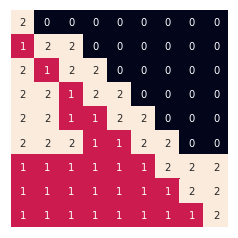

Episode 1690	  Score: -80.87
0.01


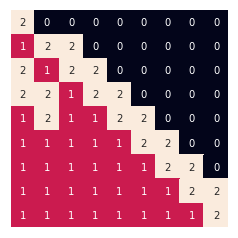

Episode 1691	  Score: -44.25
0.01


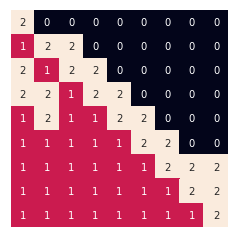

Episode 1692	  Score: -72.01
0.01


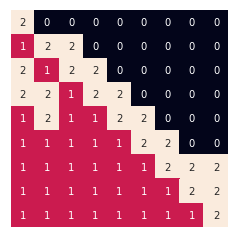

Episode 1693	  Score: -62.03
0.01


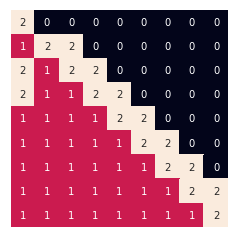

Episode 1694	  Score: -89.10
0.01


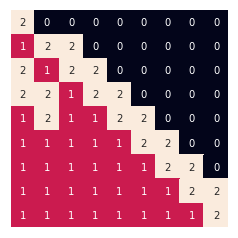

Episode 1695	  Score: -46.36
0.01


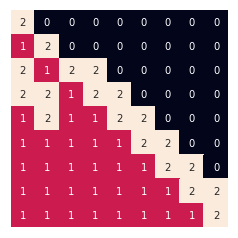

Episode 1696	  Score: -55.03
0.01


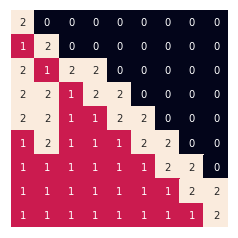

Episode 1697	  Score: -82.70
0.01


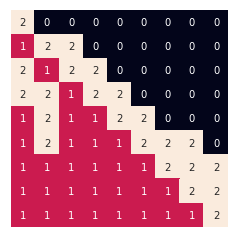

Episode 1698	  Score: -73.51
0.01


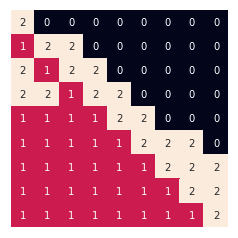

Episode 1699	  Score: -33.73
0.01


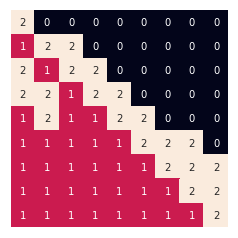

Episode 1700	  Score: -71.56
0.01


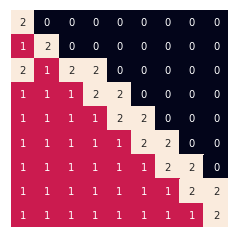

Episode 1701	  Score: -73.13
0.01


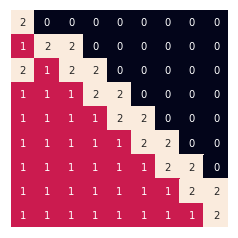

Episode 1702	  Score: -53.32
0.01


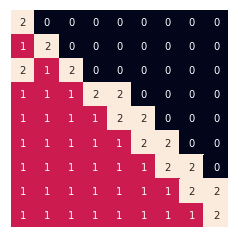

Episode 1703	  Score: -96.32
0.01


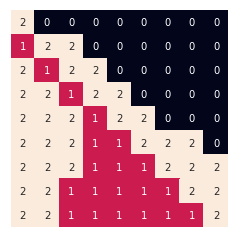

Episode 1704	  Score: -90.82
0.01


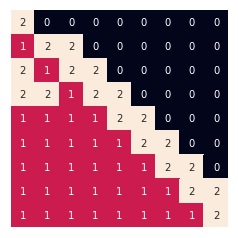

Episode 1705	  Score: -63.05
0.01


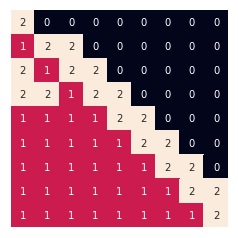

Episode 1706	  Score: -51.44
0.01


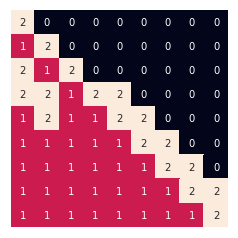

Episode 1707	  Score: -83.55
0.01


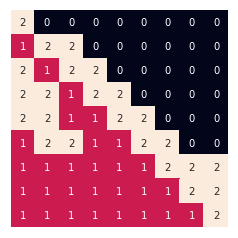

Episode 1708	  Score: -60.08
0.01


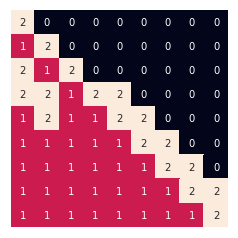

Episode 1709	  Score: -25.05
0.01


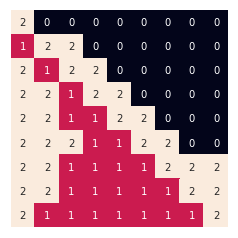

Episode 1710	  Score: -89.32
0.01


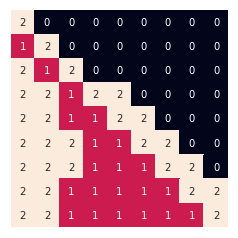

Episode 1711	  Score: -52.72
0.01


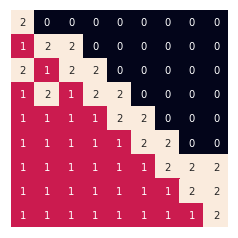

Episode 1712	  Score: -70.76
0.01


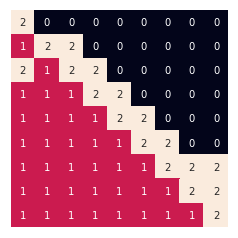

Episode 1713	  Score: -84.32
0.01


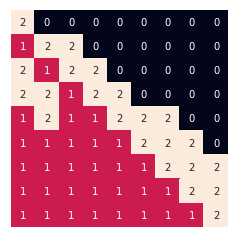

Episode 1714	  Score: -55.11
0.01


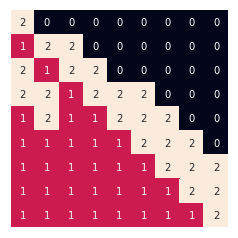

Episode 1715	  Score: -90.17
0.01


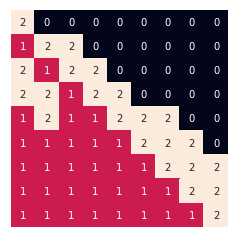

Episode 1716	  Score: -61.38
0.01


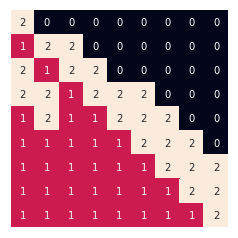

Episode 1717	  Score: -46.24
0.01


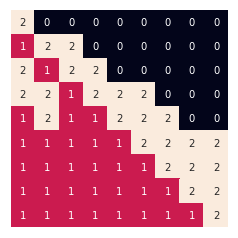

Episode 1718	  Score: -53.01
0.01


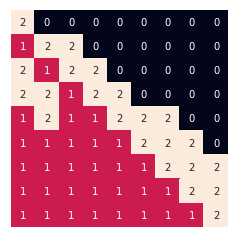

Episode 1719	  Score: -63.59
0.01


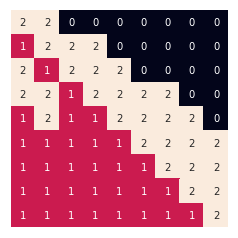

Episode 1720	  Score: -83.59
0.01


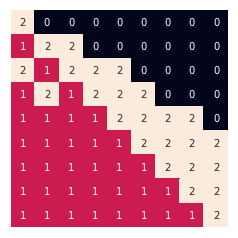

Episode 1721	  Score: -79.97
0.01


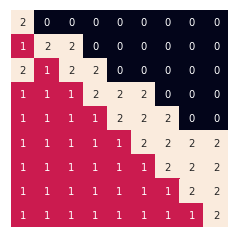

Episode 1722	  Score: -69.00
0.01


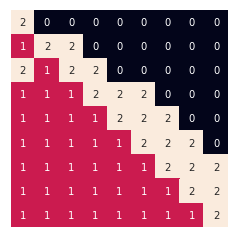

Episode 1723	  Score: -50.76
0.01


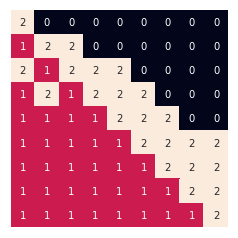

Episode 1724	  Score: -37.32
0.01


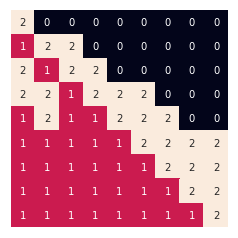

Episode 1725	  Score: -58.75
0.01


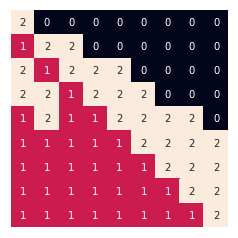

Episode 1726	  Score: -65.03
0.01


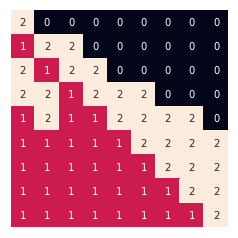

Episode 1727	  Score: -69.67
0.01


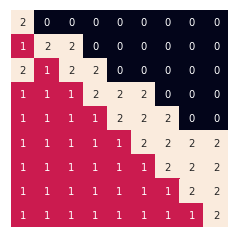

Episode 1728	  Score: -46.34
0.01


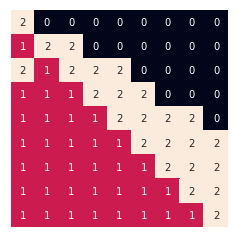

Episode 1729	  Score: -57.25
0.01


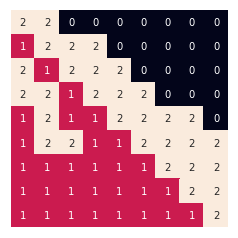

Episode 1730	  Score: -90.55
0.01


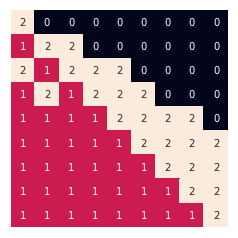

Episode 1731	  Score: -99.64
0.01


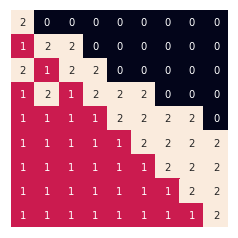

Episode 1732	  Score: -61.06
0.01


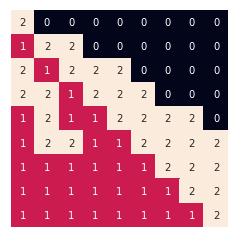

Episode 1733	  Score: -48.86
0.01


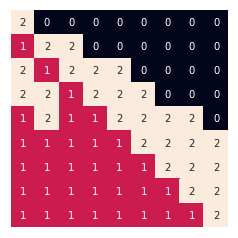

Episode 1734	  Score: -63.62
0.01


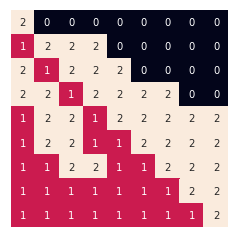

Episode 1735	  Score: -93.08
0.01


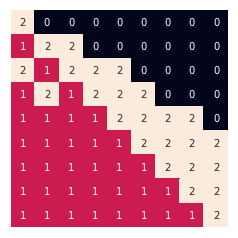

Episode 1736	  Score: -94.29
0.01


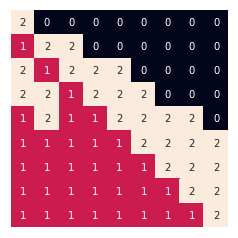

Episode 1737	  Score: -55.95
0.01


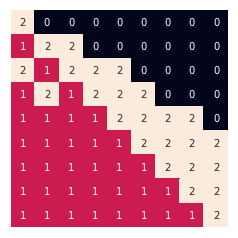

Episode 1738	  Score: -70.68
0.01


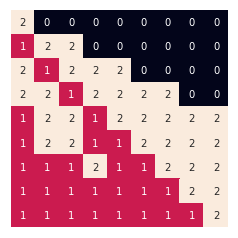

Episode 1739	  Score: -65.68
0.01


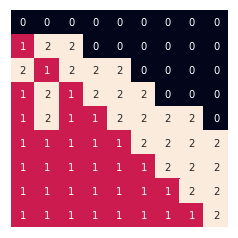

Episode 1740	  Score: -54.43
0.01


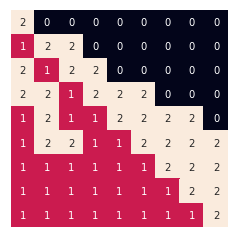

Episode 1741	  Score: -33.84
0.01


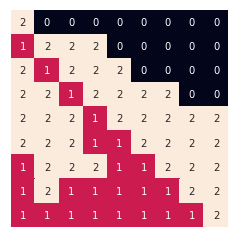

Episode 1742	  Score: -52.49
0.01


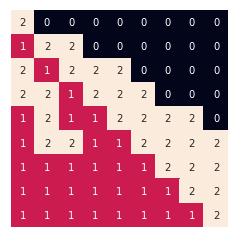

Episode 1743	  Score: -54.73
0.01


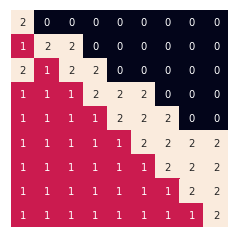

Episode 1744	  Score: -77.41
0.01


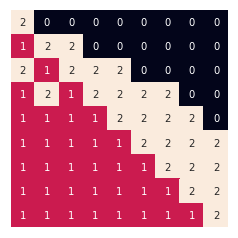

Episode 1745	  Score: -48.87
0.01


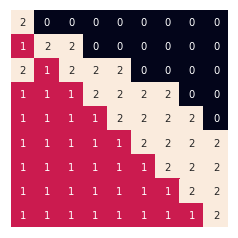

Episode 1746	  Score: -46.34
0.01


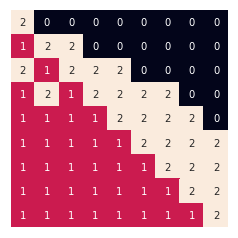

Episode 1747	  Score: -46.39
0.01


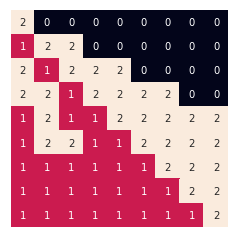

Episode 1748	  Score: -64.54
0.01


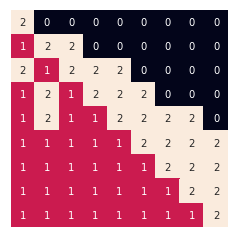

Episode 1749	  Score: -50.05
0.01


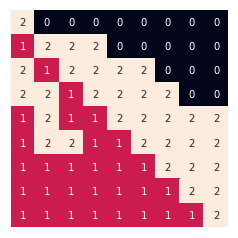

Episode 1750	  Score: -89.44
0.01


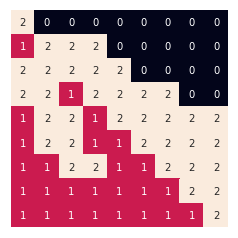

Episode 1751	  Score: -72.56
0.01


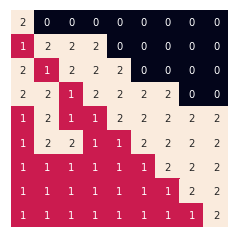

Episode 1752	  Score: -112.10
0.01


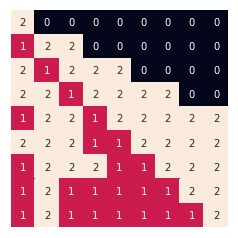

Episode 1753	  Score: -66.70
0.01


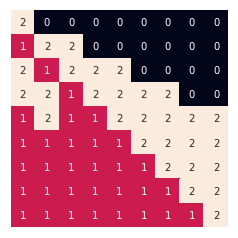

Episode 1754	  Score: -89.97
0.01


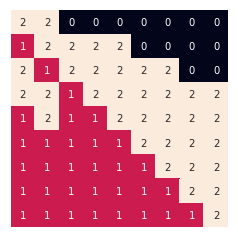

Episode 1755	  Score: -110.86
0.01


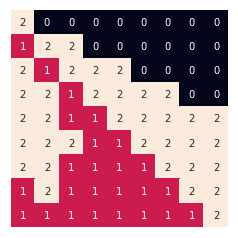

Episode 1756	  Score: -77.91
0.01


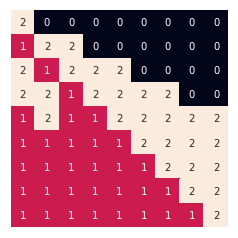

Episode 1757	  Score: -67.32
0.01


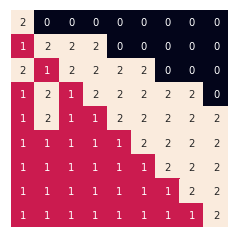

Episode 1758	  Score: -65.34
0.01


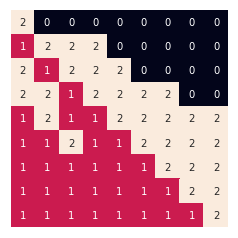

Episode 1759	  Score: -72.91
0.01


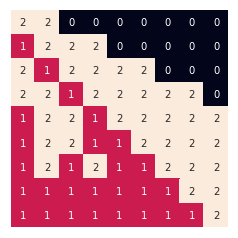

Episode 1760	  Score: -78.97
0.01


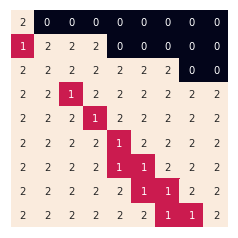

Episode 1761	  Score: -61.82
0.01


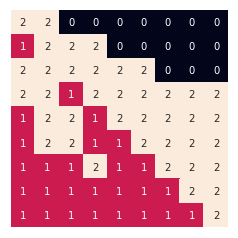

Episode 1762	  Score: -89.62
0.01


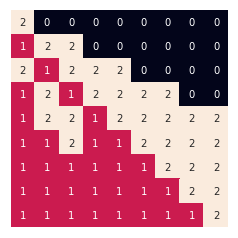

Episode 1763	  Score: -89.48
0.01


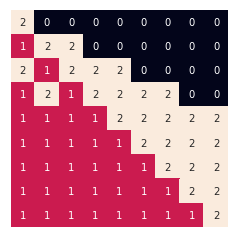

Episode 1764	  Score: -82.89
0.01


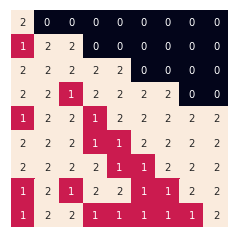

Episode 1765	  Score: -67.89
0.01


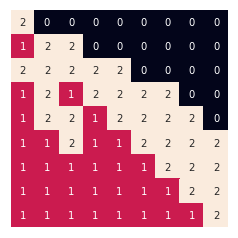

Episode 1766	  Score: -90.48
0.01


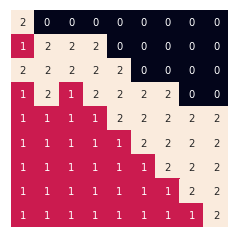

Episode 1767	  Score: -81.49
0.01


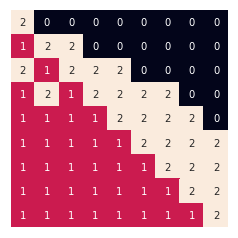

Episode 1768	  Score: -117.23
0.01


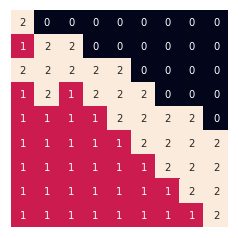

Episode 1769	  Score: -56.08
0.01


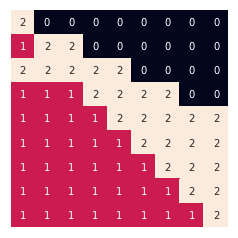

Episode 1770	  Score: -42.11
0.01


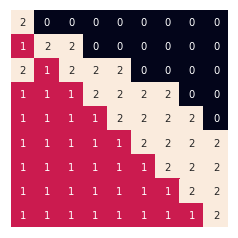

Episode 1771	  Score: -79.05
0.01


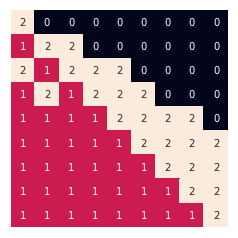

Episode 1772	  Score: -49.35
0.01


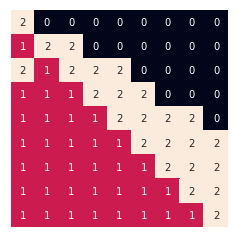

Episode 1773	  Score: -45.63
0.01


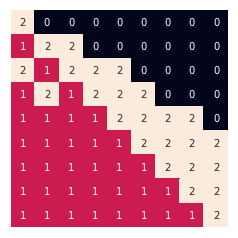

Episode 1774	  Score: -61.49
0.01


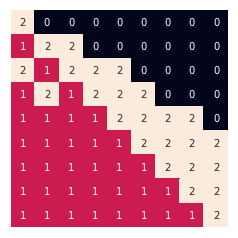

Episode 1775	  Score: -52.91
0.01


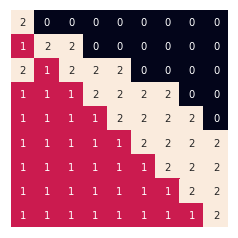

Episode 1776	  Score: -58.70
0.01


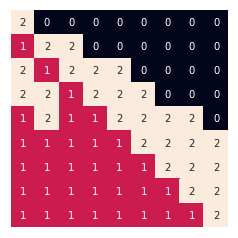

Episode 1777	  Score: -80.51
0.01


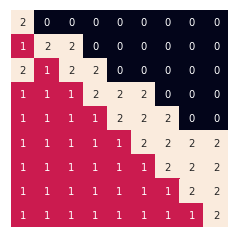

Episode 1778	  Score: -51.92
0.01


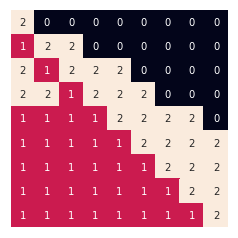

Episode 1779	  Score: -43.67
0.01


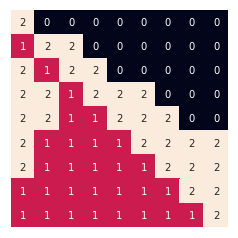

Episode 1780	  Score: -90.03
0.01


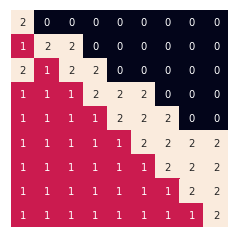

Episode 1781	  Score: -35.06
0.01


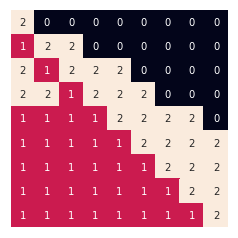

Episode 1782	  Score: -91.13
0.01


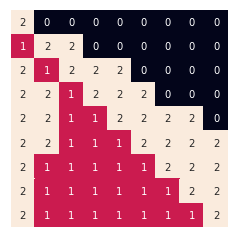

Episode 1783	  Score: -62.08
0.01


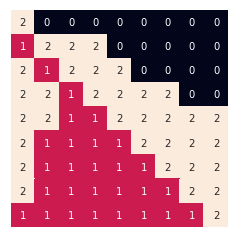

Episode 1784	  Score: -74.30
0.01


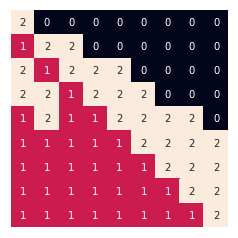

Episode 1785	  Score: -79.99
0.01


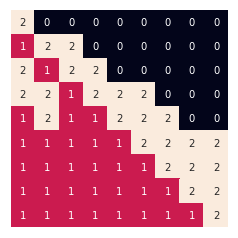

Episode 1786	  Score: -78.37
0.01


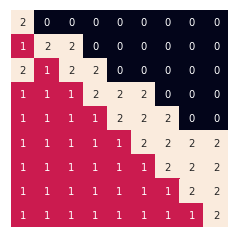

Episode 1787	  Score: -74.34
0.01


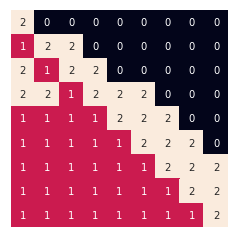

Episode 1788	  Score: -123.13
0.01


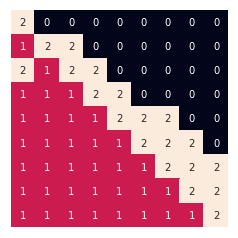

Episode 1789	  Score: -59.53
0.01


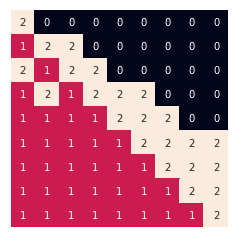

Episode 1790	  Score: -63.67
0.01


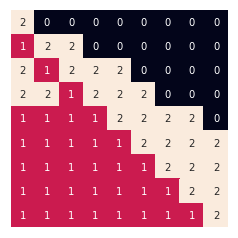

Episode 1791	  Score: -76.05
0.01


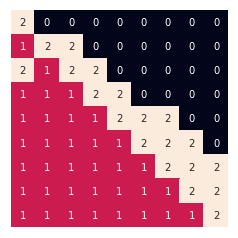

Episode 1792	  Score: -74.67
0.01


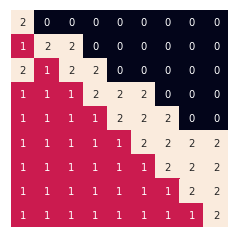

Episode 1793	  Score: -71.33
0.01


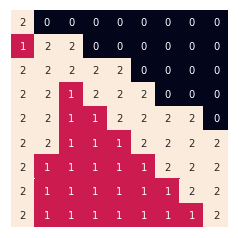

Episode 1794	  Score: -82.86
0.01


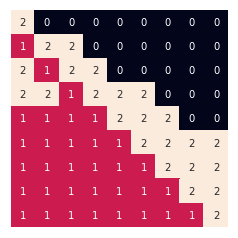

Episode 1795	  Score: -25.84
0.01


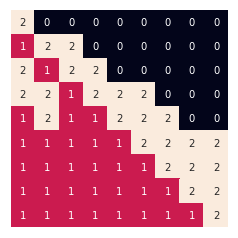

Episode 1796	  Score: -47.08
0.01


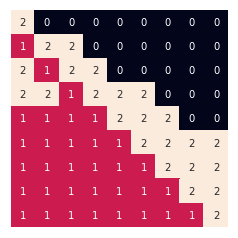

Episode 1797	  Score: -72.82
0.01


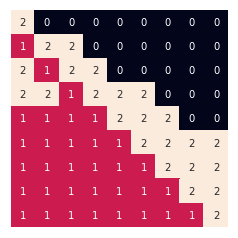

Episode 1798	  Score: -72.06
0.01


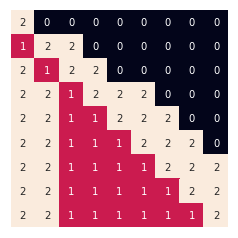

Episode 1799	  Score: -76.37
0.01


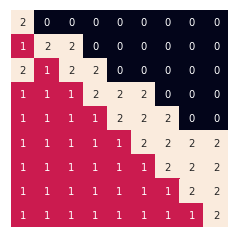

Episode 1800	  Score: -75.10
0.01


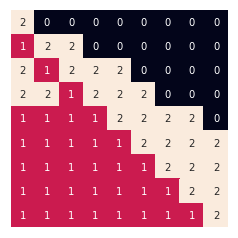

Episode 1801	  Score: -82.48
0.01


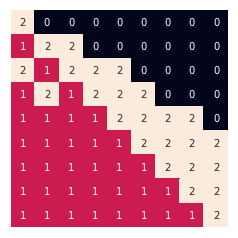

Episode 1802	  Score: -61.35
0.01


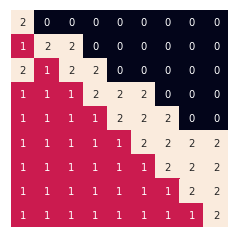

Episode 1803	  Score: -77.00
0.01


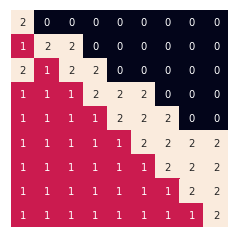

Episode 1804	  Score: -39.51
0.01


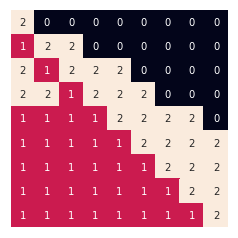

Episode 1805	  Score: -65.49
0.01


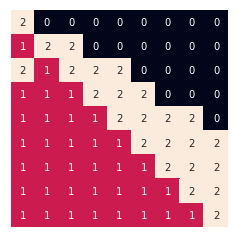

Episode 1806	  Score: -62.49
0.01


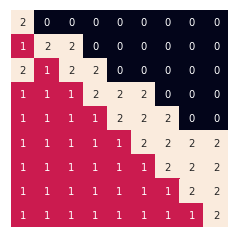

Episode 1807	  Score: -67.91
0.01


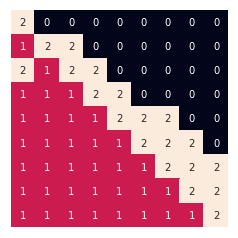

Episode 1808	  Score: -81.70
0.01


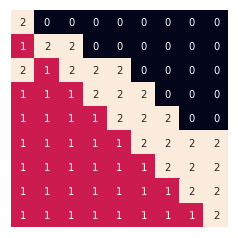

Episode 1809	  Score: -51.48
0.01


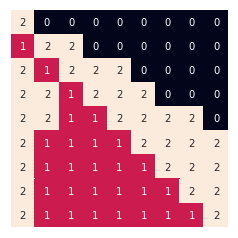

Episode 1810	  Score: -76.54
0.01


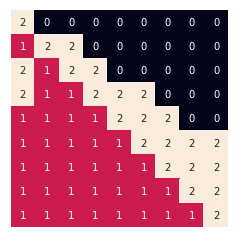

Episode 1811	  Score: -53.32
0.01


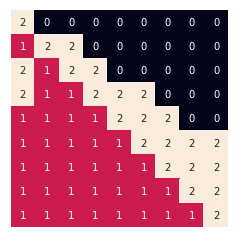

Episode 1812	  Score: -106.57
0.01


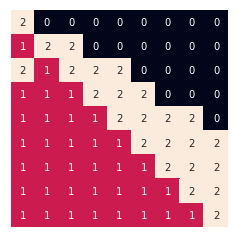

Episode 1813	  Score: -39.65
0.01


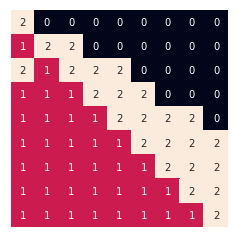

Episode 1814	  Score: -54.68
0.01


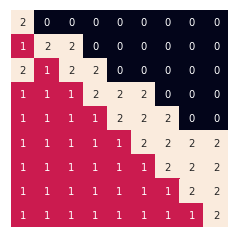

Episode 1815	  Score: -53.10
0.01


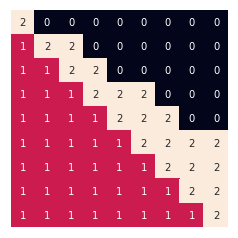

Episode 1816	  Score: -63.51
0.01


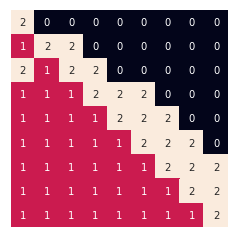

Episode 1817	  Score: -45.89
0.01


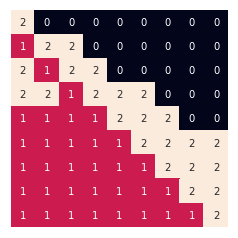

Episode 1818	  Score: -64.70
0.01


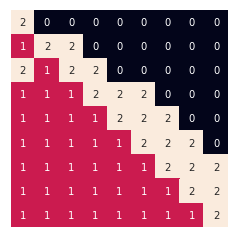

Episode 1819	  Score: -60.92
0.01


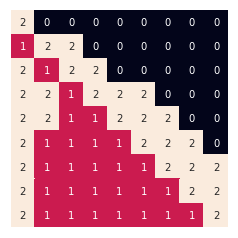

Episode 1820	  Score: -112.08
0.01


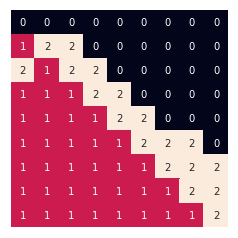

Episode 1821	  Score: -63.30
0.01


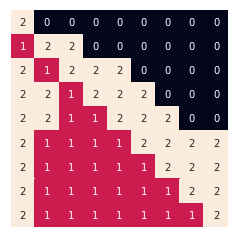

Episode 1822	  Score: -58.29
0.01


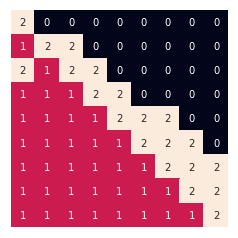

Episode 1823	  Score: -73.43
0.01


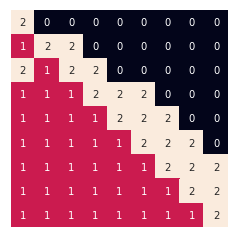

Episode 1824	  Score: -74.29
0.01


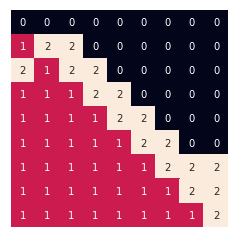

Episode 1825	  Score: -56.70
0.01


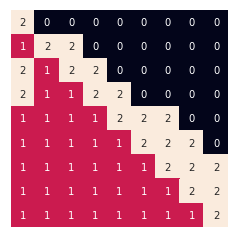

Episode 1826	  Score: -44.48
0.01


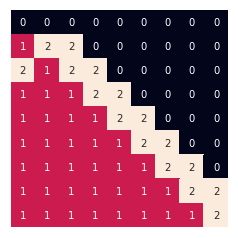

Episode 1827	  Score: -58.99
0.01


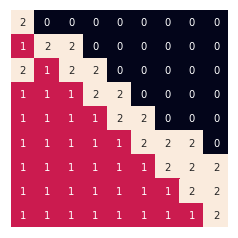

Episode 1828	  Score: -57.86
0.01


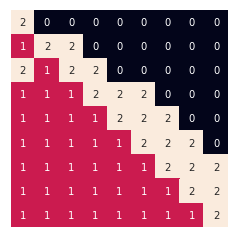

Episode 1829	  Score: -51.25
0.01


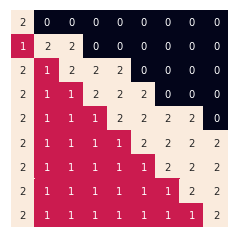

Episode 1830	  Score: -60.53
0.01


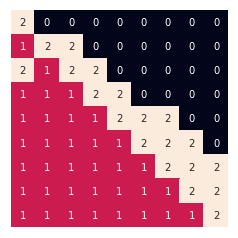

Episode 1831	  Score: -76.16
0.01


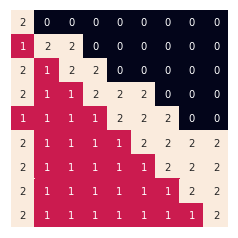

Episode 1832	  Score: -79.41
0.01


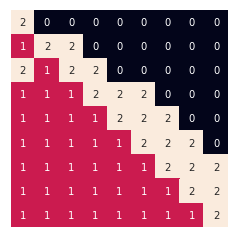

Episode 1833	  Score: -101.59
0.01


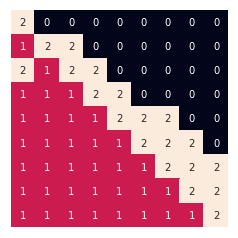

Episode 1834	  Score: -58.14
0.01


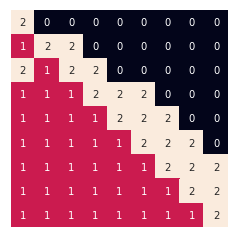

Episode 1835	  Score: -67.43
0.01


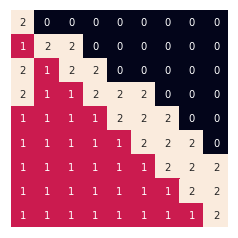

Episode 1836	  Score: -56.11
0.01


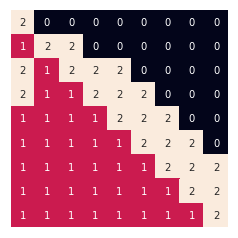

Episode 1837	  Score: -98.54
0.01


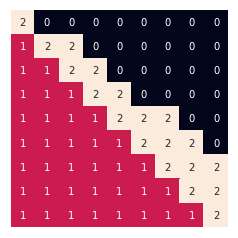

Episode 1838	  Score: -68.32
0.01


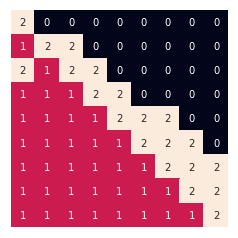

Episode 1839	  Score: -52.48
0.01


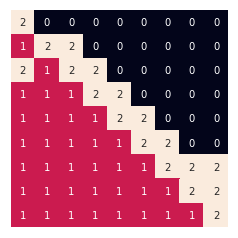

Episode 1840	  Score: -61.35
0.01


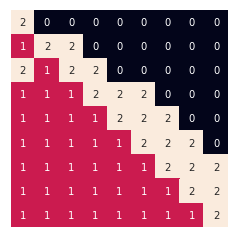

Episode 1841	  Score: -66.15
0.01


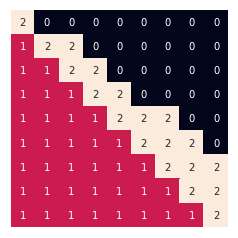

Episode 1842	  Score: -26.72
0.01


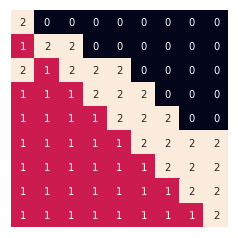

Episode 1843	  Score: -49.49
0.01


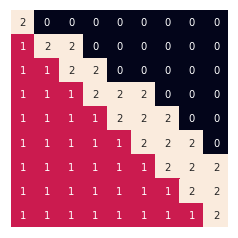

Episode 1844	  Score: -100.72
0.01


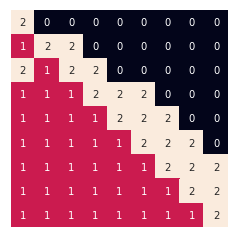

Episode 1845	  Score: -56.06
0.01


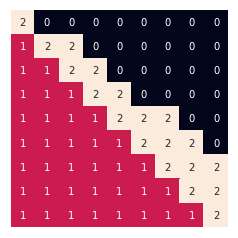

Episode 1846	  Score: -65.08
0.01


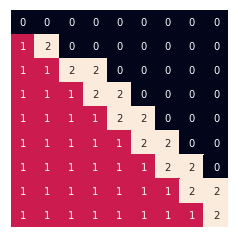

Episode 1847	  Score: -36.35
0.01


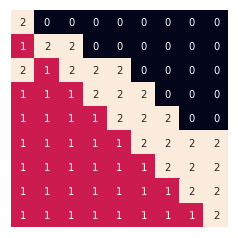

Episode 1848	  Score: -75.63
0.01


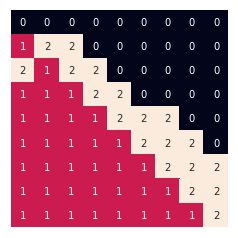

Episode 1849	  Score: -72.92
0.01


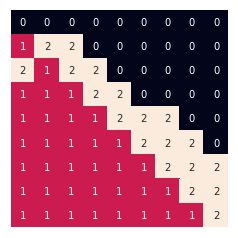

Episode 1850	  Score: -33.49
0.01


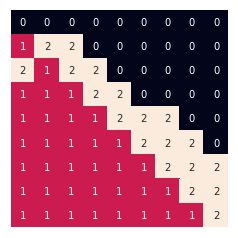

Episode 1851	  Score: -38.70
0.01


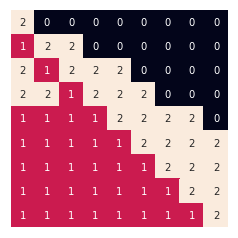

Episode 1852	  Score: -55.86
0.01


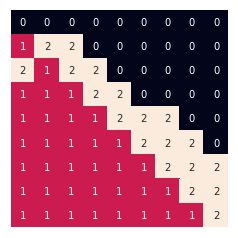

Episode 1853	  Score: -23.25
0.01


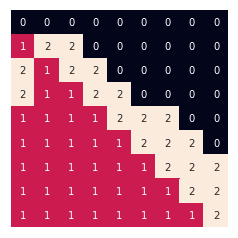

Episode 1854	  Score: -69.49
0.01


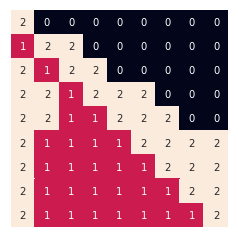

Episode 1855	  Score: -56.62
0.01


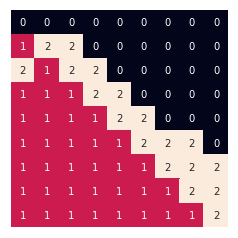

Episode 1856	  Score: -104.13
0.01


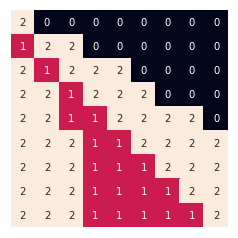

Episode 1857	  Score: -72.95
0.01


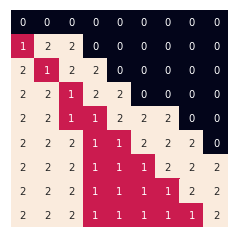

Episode 1858	  Score: -66.81
0.01


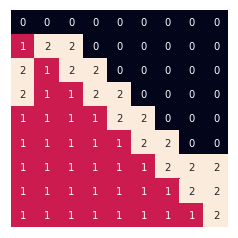

Episode 1859	  Score: -35.08
0.01


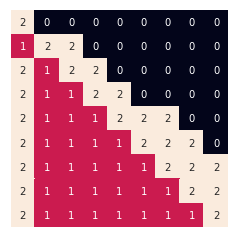

Episode 1860	  Score: -83.81
0.01


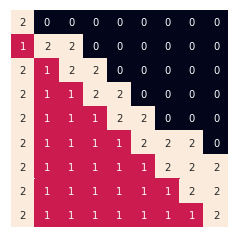

Episode 1861	  Score: -38.46
0.01


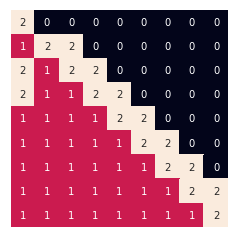

Episode 1862	  Score: -38.51
0.01


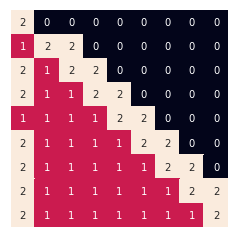

Episode 1863	  Score: -76.68
0.01


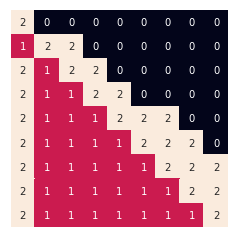

Episode 1864	  Score: -47.76
0.01


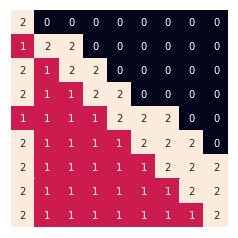

Episode 1865	  Score: -43.30
0.01


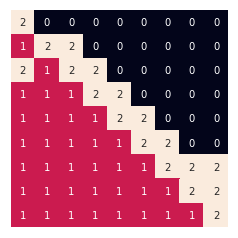

Episode 1866	  Score: -75.67
0.01


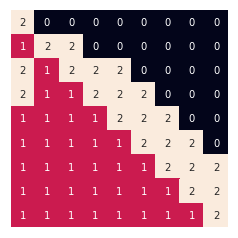

Episode 1867	  Score: -53.15
0.01


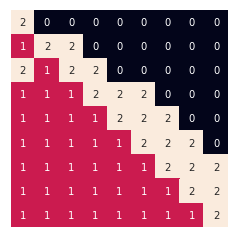

Episode 1868	  Score: -62.10
0.01


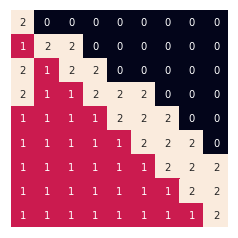

Episode 1869	  Score: -79.67
0.01


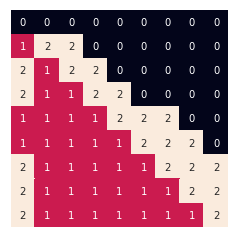

Episode 1870	  Score: -74.35
0.01


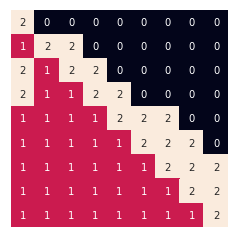

Episode 1871	  Score: -117.54
0.01


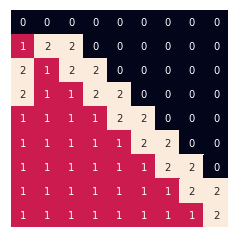

Episode 1872	  Score: -87.54
0.01


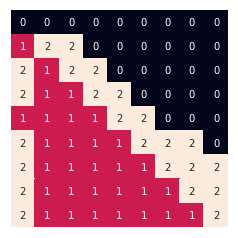

Episode 1873	  Score: -46.25
0.01


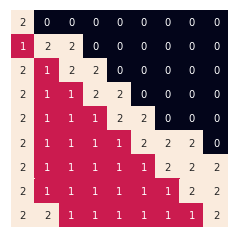

Episode 1874	  Score: -69.34
0.01


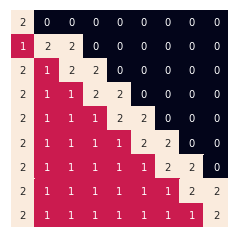

Episode 1875	  Score: -71.72
0.01


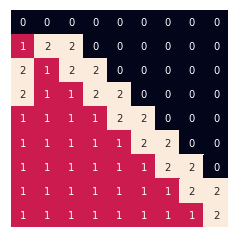

Episode 1876	  Score: -49.91
0.01


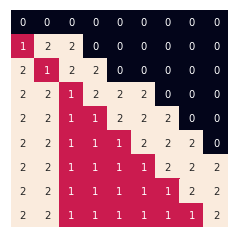

Episode 1877	  Score: -65.27
0.01


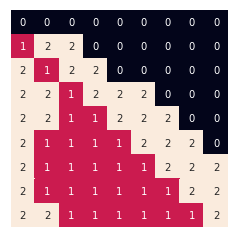

Episode 1878	  Score: -83.53
0.01


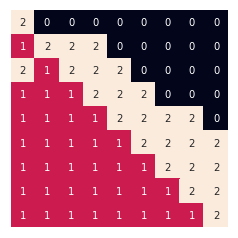

Episode 1879	  Score: -99.91
0.01


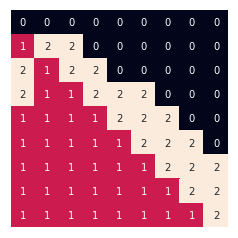

Episode 1880	  Score: -83.01
0.01


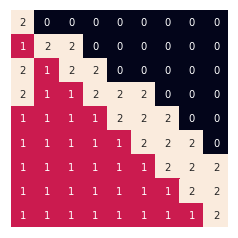

Episode 1881	  Score: -78.68
0.01


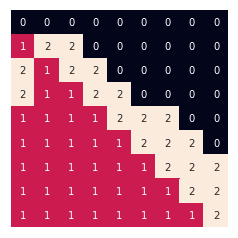

Episode 1882	  Score: -85.51
0.01


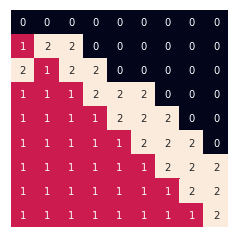

Episode 1883	  Score: -52.08
0.01


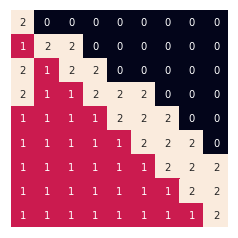

Episode 1884	  Score: -72.89
0.01


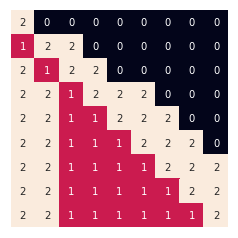

Episode 1885	  Score: -64.15
0.01


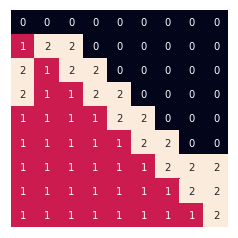

Episode 1886	  Score: -68.25
0.01


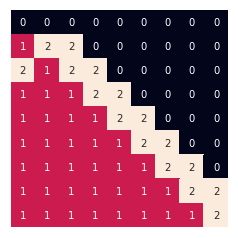

Episode 1887	  Score: -51.10
0.01


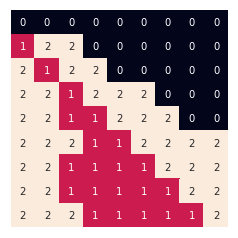

Episode 1888	  Score: -56.05
0.01


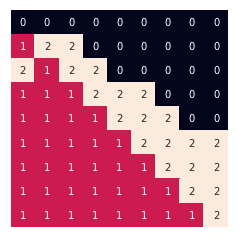

Episode 1889	  Score: -56.34
0.01


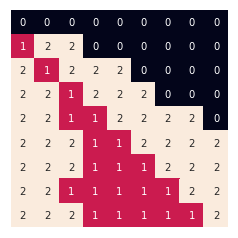

Episode 1890	  Score: -33.92
0.01


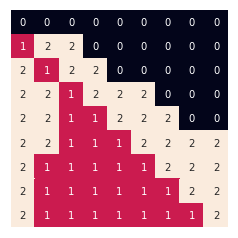

Episode 1891	  Score: -66.49
0.01


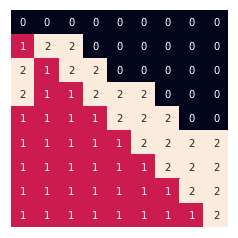

Episode 1892	  Score: -90.18
0.01


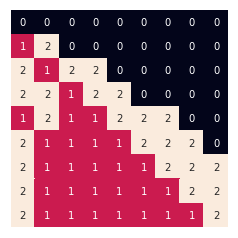

Episode 1893	  Score: -52.72
0.01


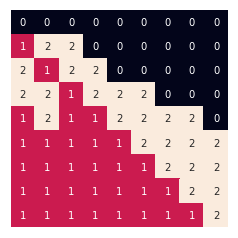

Episode 1894	  Score: -51.87
0.01


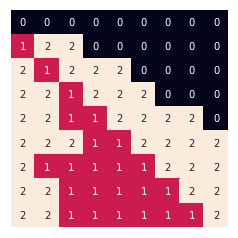

Episode 1895	  Score: -58.92
0.01


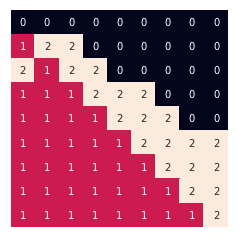

Episode 1896	  Score: -70.89
0.01


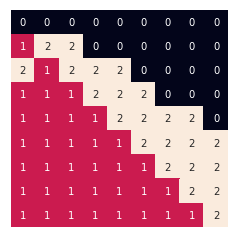

Episode 1897	  Score: -115.08
0.01


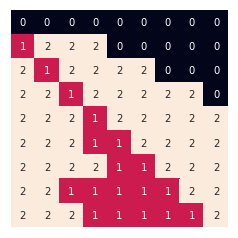

Episode 1898	  Score: -91.51
0.01


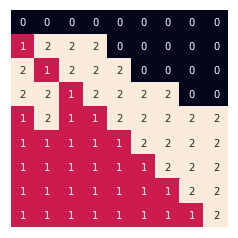

Episode 1899	  Score: -43.86
0.01


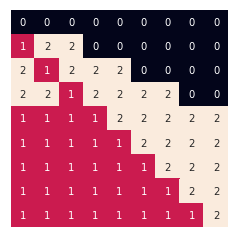

Episode 1900	  Score: -66.15
0.01


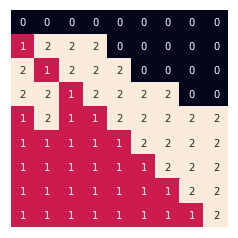

Episode 1901	  Score: -70.30
0.01


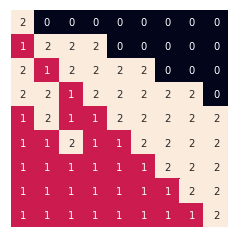

Episode 1902	  Score: -59.22
0.01


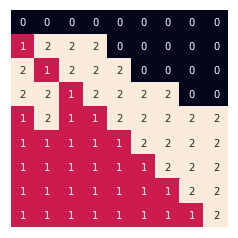

Episode 1903	  Score: -56.01
0.01


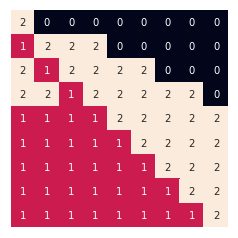

Episode 1904	  Score: -66.60
0.01


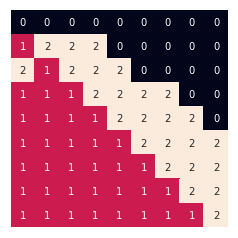

Episode 1905	  Score: -59.63
0.01


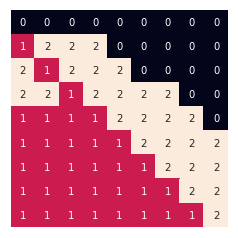

Episode 1906	  Score: -64.32
0.01


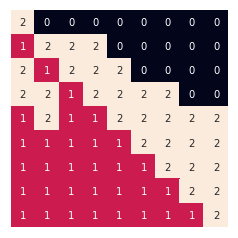

Episode 1907	  Score: -58.62
0.01


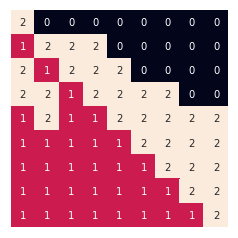

Episode 1908	  Score: -79.46
0.01


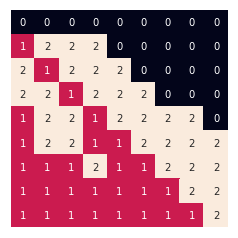

Episode 1909	  Score: -40.67
0.01


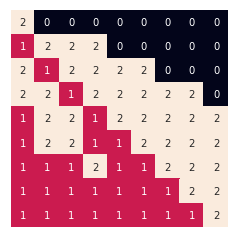

Episode 1910	  Score: -74.15
0.01


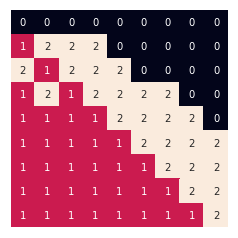

Episode 1911	  Score: -73.48
0.01


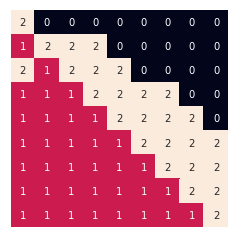

Episode 1912	  Score: -73.88
0.01


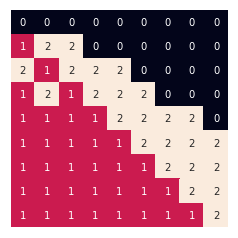

Episode 1913	  Score: -63.32
0.01


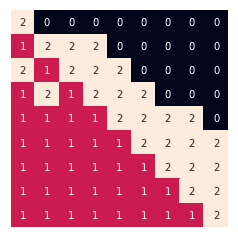

Episode 1914	  Score: -53.79
0.01


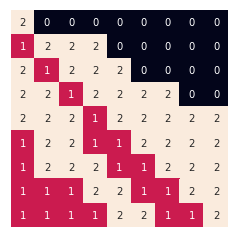

Episode 1915	  Score: -40.87
0.01


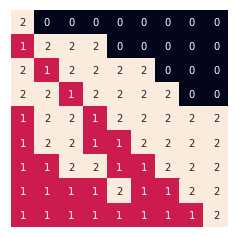

Episode 1916	  Score: -49.13
0.01


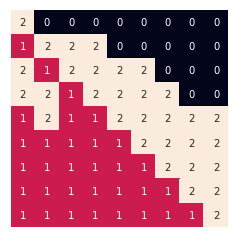

Episode 1917	  Score: -55.89
0.01


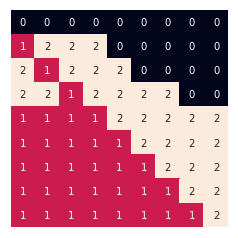

Episode 1918	  Score: -78.73
0.01


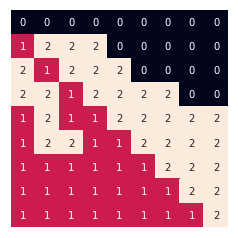

Episode 1919	  Score: -97.24
0.01


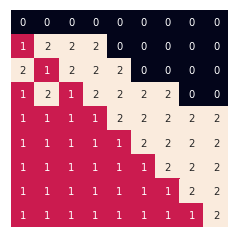

Episode 1920	  Score: -46.54
0.01


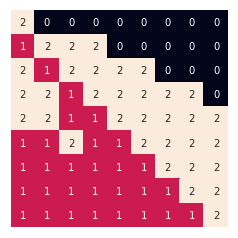

Episode 1921	  Score: -88.68
0.01


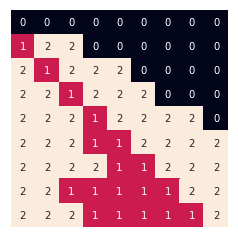

Episode 1922	  Score: -94.29
0.01


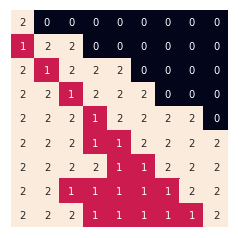

Episode 1923	  Score: -62.81
0.01


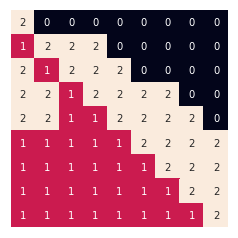

Episode 1924	  Score: -79.67
0.01


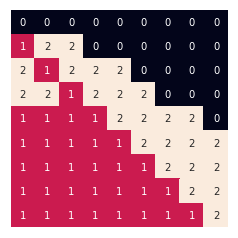

Episode 1925	  Score: -44.29
0.01


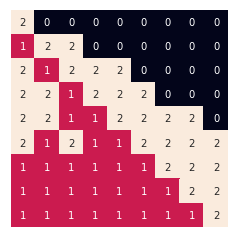

Episode 1926	  Score: -85.67
0.01


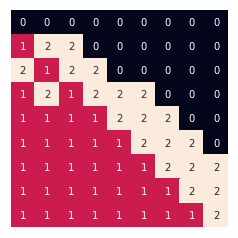

Episode 1927	  Score: -53.24
0.01


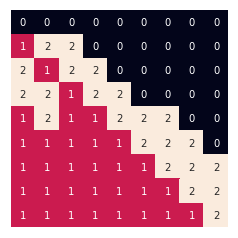

Episode 1928	  Score: -43.68
0.01


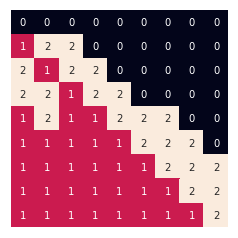

Episode 1929	  Score: -60.15
0.01


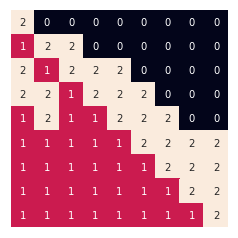

Episode 1930	  Score: -74.49
0.01


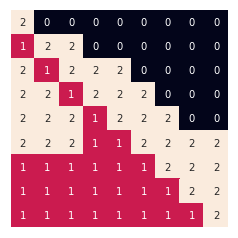

Episode 1931	  Score: -44.60
0.01


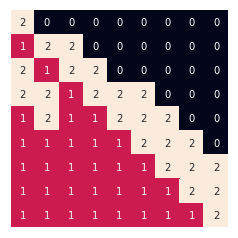

Episode 1932	  Score: -93.10
0.01


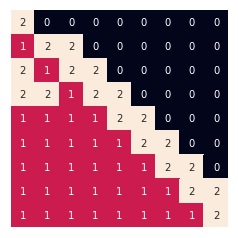

Episode 1933	  Score: -77.30
0.01


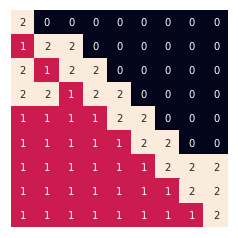

Episode 1934	  Score: -112.59
0.01


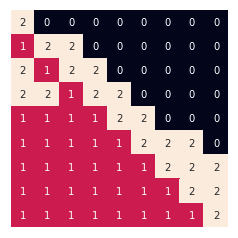

Episode 1935	  Score: -62.89
0.01


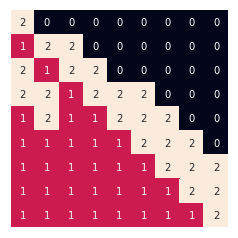

Episode 1936	  Score: -64.81
0.01


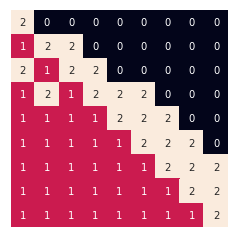

Episode 1937	  Score: -69.32
0.01


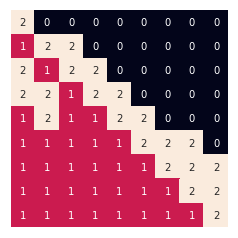

Episode 1938	  Score: -85.51
0.01


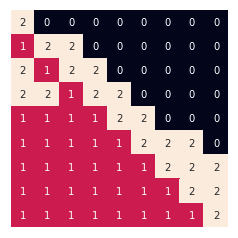

Episode 1939	  Score: -58.03
0.01


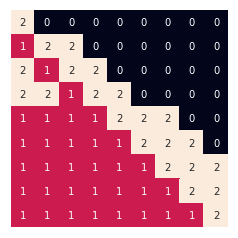

Episode 1940	  Score: -70.86
0.01


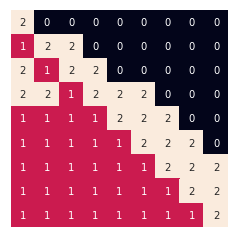

Episode 1941	  Score: -35.76
0.01


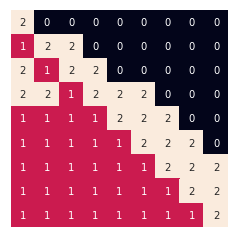

Episode 1942	  Score: -57.46
0.01


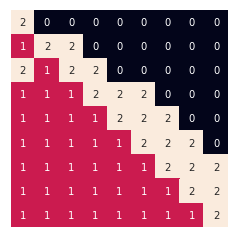

Episode 1943	  Score: -70.22
0.01


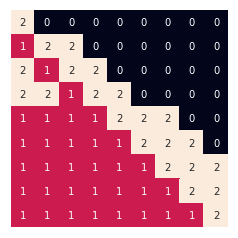

Episode 1944	  Score: -113.06
0.01


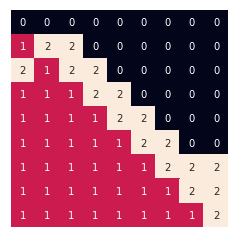

Episode 1945	  Score: -54.70
0.01


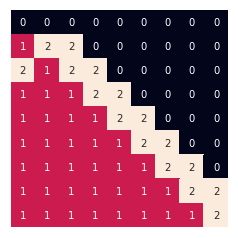

Episode 1946	  Score: -72.59
0.01


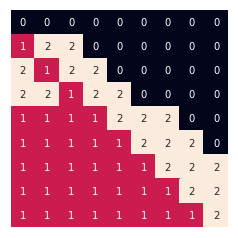

Episode 1947	  Score: -71.72
0.01


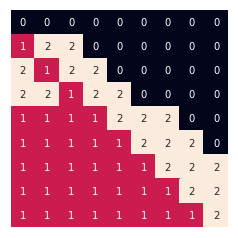

Episode 1948	  Score: -67.70
0.01


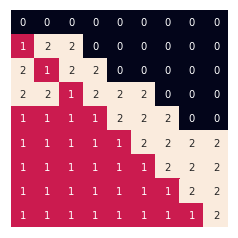

Episode 1949	  Score: -74.06
0.01


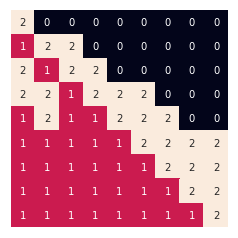

Episode 1950	  Score: -51.20
0.01


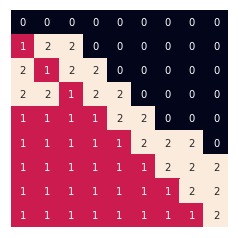

Episode 1951	  Score: -66.56
0.01


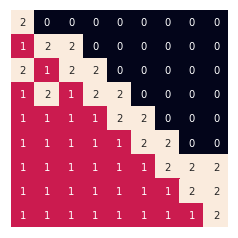

Episode 1952	  Score: -66.70
0.01


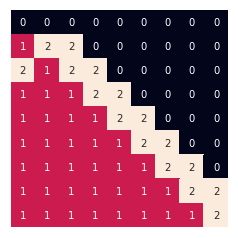

Episode 1953	  Score: -67.13
0.01


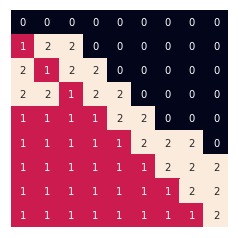

Episode 1954	  Score: -119.27
0.01


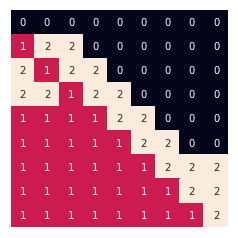

Episode 1955	  Score: -58.92
0.01


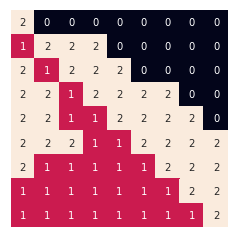

Episode 1956	  Score: -71.84
0.01


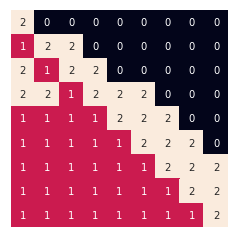

Episode 1957	  Score: -49.56
0.01


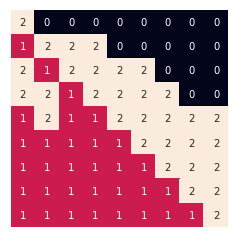

Episode 1958	  Score: -76.95
0.01


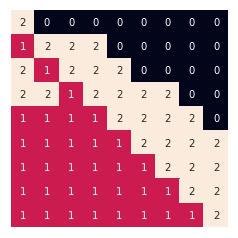

Episode 1959	  Score: -59.51
0.01


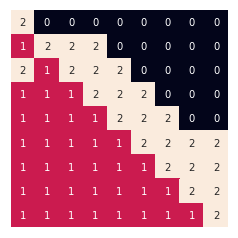

Episode 1960	  Score: -33.73
0.01


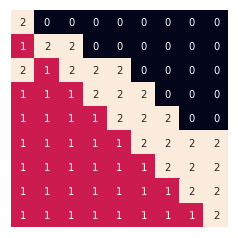

Episode 1961	  Score: -37.60
0.01


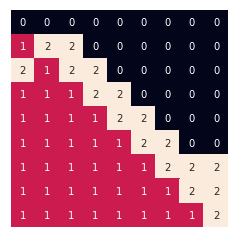

Episode 1962	  Score: -105.27
0.01


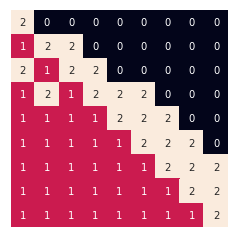

Episode 1963	  Score: -70.94
0.01


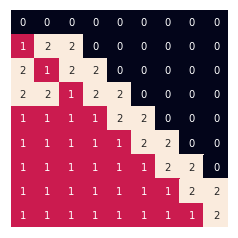

Episode 1964	  Score: -59.53
0.01


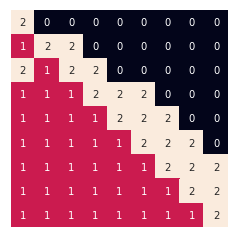

Episode 1965	  Score: -77.32
0.01


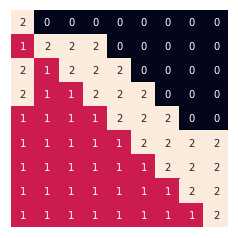

Episode 1966	  Score: -91.84
0.01


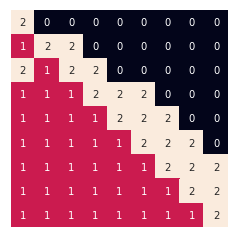

Episode 1967	  Score: -54.92
0.01


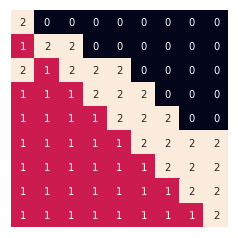

Episode 1968	  Score: -83.57
0.01


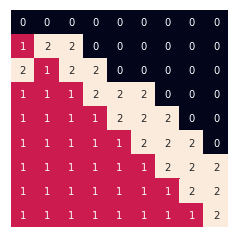

Episode 1969	  Score: -71.34
0.01


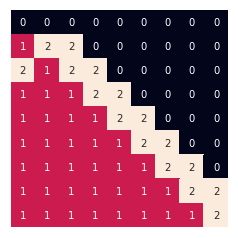

Episode 1970	  Score: -62.49
0.01


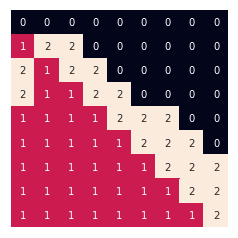

Episode 1971	  Score: -83.49
0.01


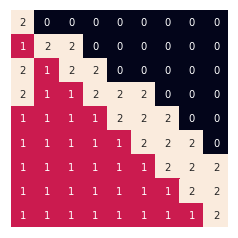

Episode 1972	  Score: -67.24
0.01


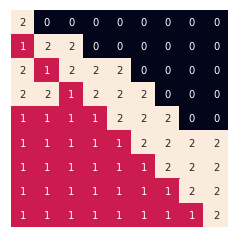

Episode 1973	  Score: -56.75
0.01


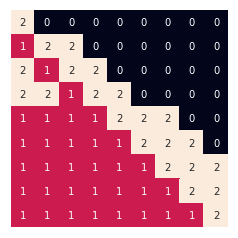

Episode 1974	  Score: -70.73
0.01


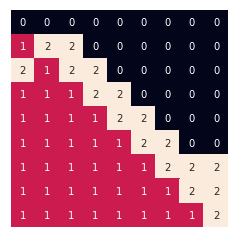

Episode 1975	  Score: -59.48
0.01


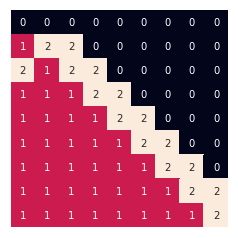

Episode 1976	  Score: -92.53
0.01


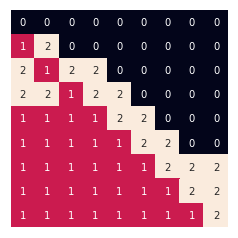

Episode 1977	  Score: -104.24
0.01


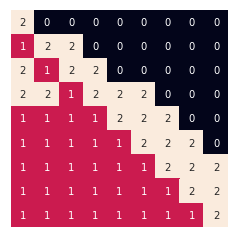

Episode 1978	  Score: -75.46
0.01


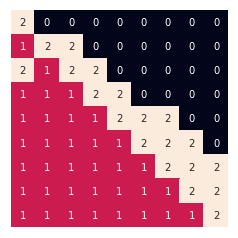

Episode 1979	  Score: -92.03
0.01


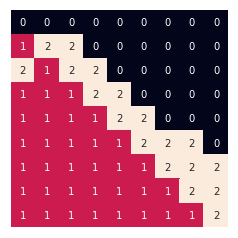

Episode 1980	  Score: -69.86
0.01


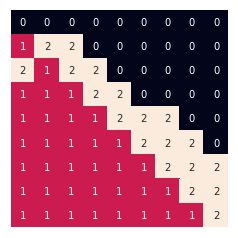

Episode 1981	  Score: -84.08
0.01


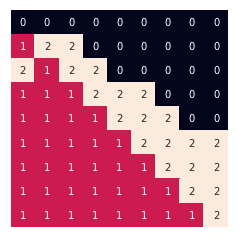

Episode 1982	  Score: -34.73
0.01


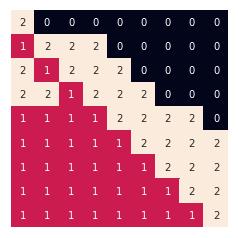

Episode 1983	  Score: -59.43
0.01


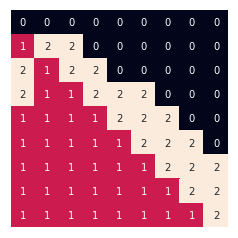

Episode 1984	  Score: -113.18
0.01


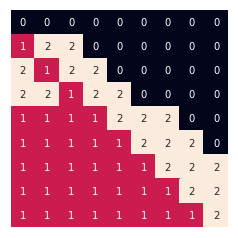

Episode 1985	  Score: -63.44
0.01


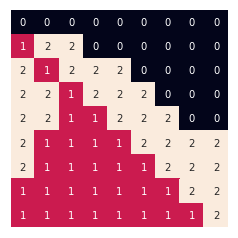

Episode 1986	  Score: -45.63
0.01


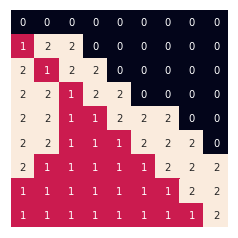

Episode 1987	  Score: -88.65
0.01


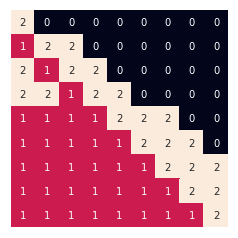

Episode 1988	  Score: -78.91
0.01


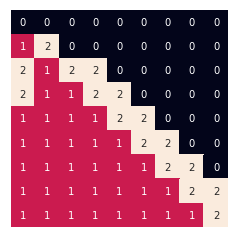

Episode 1989	  Score: -97.46
0.01


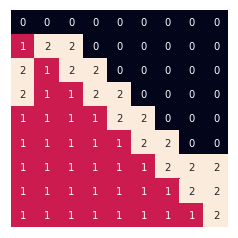

Episode 1990	  Score: -46.89
0.01


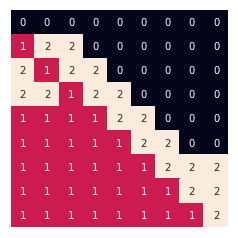

Episode 1991	  Score: -86.48
0.01


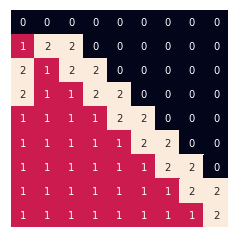

Episode 1992	  Score: -86.91
0.01


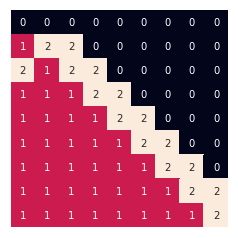

Episode 1993	  Score: -80.62
0.01


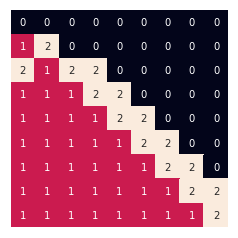

Episode 1994	  Score: -54.49
0.01


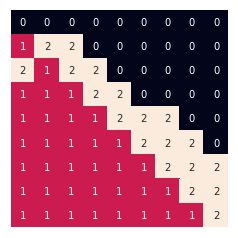

Episode 1995	  Score: -75.15
0.01


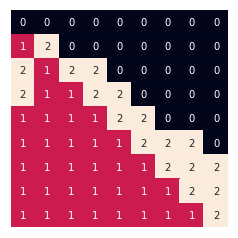

Episode 1996	  Score: -79.87
0.01


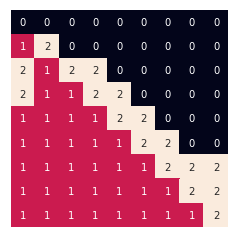

Episode 1997	  Score: -29.10
0.01


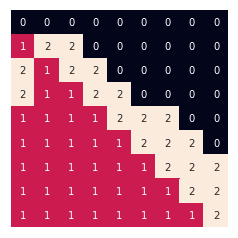

Episode 1998	  Score: -44.86
0.01


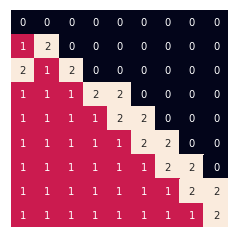

Episode 1999	  Score: -43.34
0.01


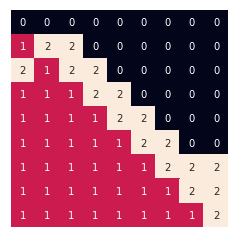

Episode 2000	  Score: -79.64
0.01


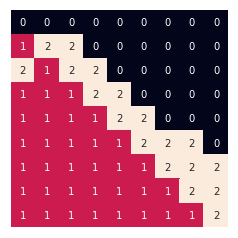

In [8]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward = env.takeAction(action)
            reward_val = evalReward(reward)
            agent.step(state, action, reward_val, next_state)
            state = next_state
            score += reward_val
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\t  Score: {:.2f}'.format(i_episode, np.mean(score)))
        print(eps)
        # plot 
        policy = agent.extractPolicy()
        plt.imshow(policy)
        ax = sns.heatmap(policy, annot=True)
        cb = ax.collections[-1].colorbar   
        cb.remove()
        plt.xticks([])
        plt.yticks([])
        plt.show()
    return scores

scores = dqn()

In [9]:
state = torch.from_numpy(np.asarray([1, 0])).float().unsqueeze(0).to("cpu")
agent.qnetwork_local.eval()
with torch.no_grad():
    action_values = agent.qnetwork_local(state)

In [10]:
action_values

tensor([[-5.2740, -4.6658, -4.9391]])

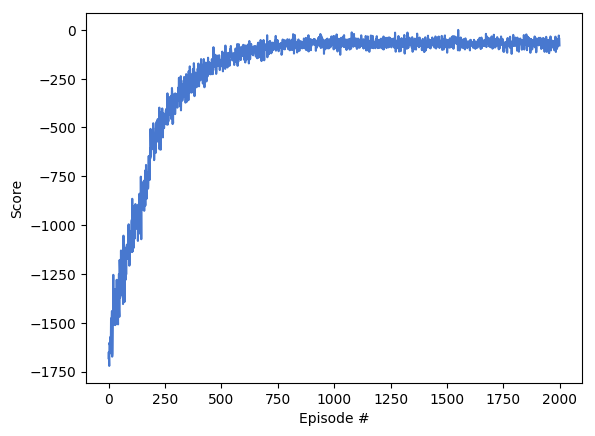

In [17]:
# plot the scores
plt.style.use('seaborn-muted')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()